# Logistic regression and measurements for sample of 3444 datapoints


Two-dimensional scatterplot taking into account both acoustic emissions and electrical current signal showed all three groups of data forming very distinct clusters.

Logistic regression then applied to separate normal grinding data from anomalous grinding data, and grinding data from dressing data. Precision decreased very slightly when number of features considered was increased from two to four, while recall remained constant. Variance in acoustic emissions signal by far the most important feature.


In [29]:
# No. of datapoints

29+29+140+789+1543+914

3444

In [10]:
# Data so far (29 OK, 29 NOK, 140 dressing, 789 + 1543 grinding (all bar one of Test_6), 914 grinding (all bar one of Test_5))
# 4-tuples: var_ae, var_cur, energy_ae, energy_cur
# Features to consider: var_ae, energy_cur

grinding_nok_full = [(0.0028296275479566097, 0.014225336147977692, 106988.68985835543, 111653.46909800009), (0.0025403901100845773, 0.014285415728576606, 95879.68301087848, 111926.43352952458), (0.003284743051442009, 0.014154141963688964, 124198.07952918058, 111155.3922567746), (0.0028388447349663483, 0.01425344097406266, 107218.09128244568, 111752.33458198223), (0.0032532512539841327, 0.0140630316986156, 123250.46909303303, 110680.50256962945), (0.002591894957103228, 0.01446113792443867, 98008.22548645678, 113512.12533417028), (0.002467042316464123, 0.013819253075488255, 93332.09586939595, 108547.89464232653), (0.002531819992356944, 0.014177072879180876, 97567.72428484396, 113418.61002168697), (0.0031463365056625366, 0.014481812957741664, 119139.66982481249, 113830.2611679694), (0.002594991911313546, 0.01446085990439814, 98102.51536577, 113482.47818292187), (0.002702943491755481, 0.014148402793480576, 101399.74768669717, 110149.30370230203), (0.0026884932809742015, 0.014015078889788243, 127048.44653545432, 137475.6288151946), (0.0024883611323317277, 0.013779445295037761, 94106.81229904969, 108163.02000348993), (0.0026521238211728265, 0.01435381357979877, 100814.14841392453, 113228.49207496826), (0.002567981328286485, 0.01409438662297307, 97271.01526157594, 110821.41425018189), (0.0028420519560204416, 0.01436555816753231, 109185.0558011948, 114561.9990818956), (0.003224112724682866, 0.013997449229112323, 126657.85637517986, 114219.01098134674), (0.003028279377849808, 0.014004681966214315, 114440.95571288868, 109936.08350002675), (0.0025529871261725, 0.013865142804941789, 96542.47538334405, 108821.92184914777), (0.0027370362591317803, 0.014381357498402173, 103625.51159088123, 113005.41717219132), (0.0026197543252467572, 0.013808782238134, 99023.14985143961, 108345.29148093163), (0.0027246569453064796, 0.014314598266030385, 102998.28763643542, 112321.32318960092), (0.0020108632555797938, 0.013717034564060237, 76184.26909709536, 107864.98580698116), (0.0029697552763109864, 0.01429320212759015, 112575.5591498153, 112477.63279124902), (0.0025685969609581835, 0.013618833636833083, 97098.7224995831, 106917.25186969788), (0.002661970532927792, 0.014214397312865739, 100665.52881420394, 111598.15618582418), (0.00278271885969162, 0.014256485591874427, 109620.75475530083, 116581.53049828412), (0.0028420521056244704, 0.01438503573852687, 107487.00711487985, 112958.80954767387), (0.0031785202880626686, 0.014141707207245143, 120036.66602569172, 110919.98271304888)]
grinding_nok = [(var_ae, energy_cur) for var_ae, energy_ae, var_cur, energy_cur in grinding_nok_full]

dressing_full = [(1.0368515911649459e-05, 0.01323591459581505, 437.58003590644296, 100435.41638937288), (1.0566855280813544e-05, 0.0142076843906936, 458.6196710620079, 107925.51245618769), (1.038523350641855e-05, 0.013959650333237612, 375.38117688649504, 97699.44122956379), (1.036891287089849e-05, 0.014094683263303931, 415.2173608682684, 106697.34019810986), (6.8538386896069215e-06, 0.0063753533613461035, 1.164088702333437, 170.7179798719903), (6.781745291957748e-06, 0.006045450256696504, 0.9720046437674865, 153.92638674516036), (1.0274054473059114e-05, 0.013553903937703674, 374.03144965033744, 93767.8519458704), (1.0524823930773083e-05, 0.014170840401485, 372.33779853180295, 97370.5240147915), (1.0324767773142717e-05, 0.0146488937303106, 384.7813976366557, 100985.70021643743), (9.929288711193232e-06, 0.014060236406257991, 388.3856044842724, 108680.90601465061), (9.760545496976042e-06, 0.015509445809478634, 348.5901044659511, 106157.66996862763), (1.0277357519650388e-05, 0.014091102335102896, 373.2767313175473, 97953.08247310849), (1.0332423786485315e-05, 0.014058866427312286, 485.0637272920948, 107802.3225801055), (1.0220551304005794e-05, 0.013516466984825688, 428.98702279376926, 100762.80844522815), (1.052047052131309e-05, 0.015425238026970088, 374.5348594928686, 107109.98464032766), (1.0343446742923354e-05, 0.014796415328471445, 419.1886424880419, 109722.6651666823), (1.0369780890982342e-05, 0.014786320056227067, 421.7745902693307, 112569.5066738732), (1.0250495489239362e-05, 0.013630239768233077, 421.50472018139885, 103798.07020068693), (1.0369361656710913e-05, 0.014162158465812409, 468.61329709643235, 106229.84272897939), (1.0092377497857612e-05, 0.01482022765136316, 417.19205909059076, 114343.20691775046), (1.0387821441859882e-05, 0.013747060612104577, 433.0947360771981, 91764.83000143191), (9.838397973924352e-06, 0.014000468453469628, 336.8354772877141, 95718.97791154), (1.023996104024312e-05, 0.014283581142513845, 423.68728967561407, 106456.71279843408), (1.033362822445967e-05, 0.01500905464280675, 441.4298865671268, 102808.72659179843), (1.0304133199329198e-05, 0.015415298444243011, 376.8840812319243, 109361.13520584485), (1.0258493045373037e-05, 0.013221484208732138, 405.31463931897906, 101037.17750406115), (1.0083760150567835e-05, 0.014829980940135257, 346.1854243112148, 101701.67444108275), (1.0590796965691746e-05, 0.015563479573314408, 454.9138737629531, 118680.83266449408), (1.0537158922069397e-05, 0.014678853994582639, 417.4383932316044, 102828.64999823304), (1.0421049457285119e-05, 0.014000467074586985, 484.41076892682617, 96414.28413262255), (1.0155139174798402e-05, 0.013772131096335674, 395.5674168358177, 104255.30564982504), (7.033489676737804e-06, 0.0074734187030947455, 1.7987879083806315, 288.3892175628671), (6.88525020985421e-06, 0.007036862561646537, 1.0001730543511966, 179.46894889721634), (1.0358692006700325e-05, 0.014146018533499623, 376.24772065871696, 96058.84322143176), (1.0586229531416577e-05, 0.014736350565546025, 481.40272659721757, 101978.03933472237), (1.0301797686499963e-05, 0.013938651768453183, 502.51009067434524, 105762.4084231499), (6.834996754214306e-06, 0.007758736535669521, 1.202614791663291, 253.7479400536052), (6.758041323779432e-06, 0.00802126712582629, 1.1471074198924354, 209.4644504508886), (1.0388577829817263e-05, 0.01419634898777533, 353.26329875882954, 98902.00364218459), (1.0225942480022041e-05, 0.015772775824837663, 354.8474971786821, 110305.84855347246), (1.0456363040723395e-05, 0.01306189532232812, 439.7331828564366, 98714.50616210878),(1.0076615671104137e-05, 0.01713974462953321, 333.1984577054465, 109080.23076065877), (1.0415018558588363e-05, 0.005575568966447952, 1.4950405071484574, 149.1122279206722), (1.0413579866024074e-05, 0.01652369080705181, 363.67649810505253, 111554.12795744294), (1.0752689394232039e-05, 0.01654401994108541, 334.0806961030978, 105824.75659479086), (1.0301544035464012e-05, 0.014511251663428393, 338.4305727822037, 98110.28734739312), (1.041925009936186e-05, 0.016672627349319534, 340.6779428337962, 110383.89678462528), (1.0371138724359576e-05, 0.017122704794994788, 336.25837146425727, 104570.2595647513), (1.0561984222261043e-05, 0.016208147484118737, 378.5798336728856, 112393.56397717955), (1.039236929740241e-05, 0.015982881029499865, 346.2234538161245, 108991.19812658707), (1.0217363276517889e-05, 0.01700017187340885, 318.40052606638073, 108404.51265404002), (1.0244139226969413e-05, 0.015140546254076353, 334.7464720577729, 101726.01429110323), (1.0037954830723008e-05, 0.01524333317027667, 352.3954712219829, 100985.543458579), (1.0526395858806754e-05, 0.016885594715414898, 335.3780052537842, 106896.86022009245), (1.01448130590734e-05, 0.015185526585218868, 313.6620262078403, 96476.67421312703), (1.0138615387706439e-05, 0.0163993929926099, 316.8902592228563, 104819.66933719542), (1.0320563287568663e-05, 0.016453962428178617, 334.0556883275789, 106746.43671810522), (1.028120438821641e-05, 0.01659869845297707, 324.3229610123217, 105873.5184799831), (1.0341334444239286e-05, 0.01685197677705465, 326.1816405562877, 108668.05818040193), (1.0014888295187667e-05, 0.014886232997843042, 333.48445939819874, 100266.75436611047), (1.0528769117528991e-05, 0.01617217361593655, 384.7964012791897, 105282.97853677989), (9.943348477284033e-06, 0.014916607759486007, 335.97495592442755, 100465.43348316659), (1.0147913409882137e-05, 0.01501252841797875, 318.72512588176437, 95901.65771087463), (1.025367580824359e-05, 0.01521974857852057, 319.99023215368106, 96958.54812970132), (1.0490520677013675e-05, 0.015835104909379824, 372.2823245231451, 108355.62353385781), (1.0691194740679992e-05, 0.017482785641977576, 349.50801146841883, 105660.39573501215), (9.916880669282255e-06, 0.015058481022169617, 337.2116627640156, 100963.65995265845), (1.0675798317093507e-05, 0.01615773571844837, 363.9538068229842, 106361.94507339304), (1.0549377724440276e-05, 0.016729463089293253, 355.80132245654505, 106690.00880489756), (1.0179450162084326e-05, 0.014758861413714955, 340.6359542964422, 101783.61161234412), (1.0259749196507853e-05, 0.015043180935811896, 357.19484557767953, 100272.88731412316), (1.0338873342341638e-05, 0.015064402733121075, 340.3286806573315, 95529.96412761044), (1.0187113121907003e-05, 0.0161531576063332, 337.9811964880967, 109441.63853597843), (1.0017003209010888e-05, 0.016568868773208435, 327.8388300469804, 111550.91202856055), (1.0015986662070266e-05, 0.016593694805437365, 307.5757230481027, 104910.86685794835), (1.022736795369733e-05, 0.016798193889772196, 340.3602804084999, 111356.81855643938), (9.996141730997461e-06, 0.015029194229175527, 314.60920383196026, 97424.70580558201), (1.0677138740285373e-05, 0.015910765337978208, 400.4584122476605, 108026.29050737715), (1.0022070047094034e-05, 0.016248603722125277, 350.2356949220819, 109512.3707410109), (1.0328044498317735e-05, 0.016365843075970256, 370.94500793277314, 108074.33418471213), (1.0239288852471094e-05, 0.016665253859173813, 354.1307914344879, 107064.6917659488), (1.006363742813155e-05, 0.016242429894025932, 333.6238122892483, 108659.19617228382), (1.0468278963954174e-05, 0.01616973882760993, 354.3065597865415, 110669.07206555826), (9.74911234786714e-06, 0.016785966005552072, 299.0206630309163, 105838.99996092876), (1.0144027643549108e-05, 0.0159483606227397, 334.1302856729756, 107643.6120522499), (1.0027420396469515e-05, 0.01540455153878401, 325.0639527888699, 102594.91318111264), (1.0042897933918443e-05, 0.014800582885945386, 366.6527978443195, 102861.58784916293), (1.0261965470650527e-05, 0.017317983082419136, 304.7585928327046, 105797.90501844666), (6.93723386674854e-06, 0.006550590987885972, 1.0253238220084264, 172.54153366444524), (1.0748489991250781e-05, 0.016754025847594917, 374.1214157746597, 102240.01908713141), (1.0133081215752018e-05, 0.014832241602478867, 348.50197534887906, 99431.08860850609), (1.0619078161342942e-05, 0.016829907159145313, 342.77260661295406, 106616.8785584478), (1.0634435391954244e-05, 0.016951530272420662, 343.24329907016573, 112328.9395394459), (1.0362867888574769e-05, 0.015090520275246825, 344.1494355927576, 101567.29076846427), (9.866129175698555e-06, 0.014865690046117217, 334.9994954067298, 99218.85235604073), (1.035225956734762e-05, 0.015141161521753497, 345.47059227947017, 99858.73491397101), (1.0181832962055948e-05, 0.015017459247345372, 339.7822868596313, 96290.49105893163), (1.0514876924151898e-05, 0.017346622985277168, 343.13458847205686, 110256.54376157674), (1.0185189416561595e-05, 0.015035293147875864, 356.0583831089367, 102083.11543049128), (1.0372135275705154e-05, 0.016215092742882926, 348.38868350893614, 104925.69031529421), (1.1242569161584721e-05, 0.01666884353306992, 392.68618396604916, 106973.46205338553), (1.0579498447954423e-05, 0.016629255445419086, 356.9920246401352, 110719.44455168303), (1.01464110112809e-05, 0.01669150020239479, 349.73381104543466, 111068.72427475192), (1.0276234137421229e-05, 0.0169488992239373, 323.81265175783244, 109650.54307169221), (9.991272086233223e-06, 0.016750957150064718, 324.5948070183137, 109384.88160646416), (1.0290007592710277e-05, 0.01833014302008042, 344.5816969309093, 125317.60071947973), (1.0021959442237927e-05, 0.015776486781474478, 353.89144778288363, 104904.25911375889), (1.0466319503782307e-05, 0.017597273173086403, 350.59842105467055, 114996.10208248676), (6.839027315122139e-06, 0.007148251585306777, 1.5709407238451591, 392.85068323601786), (1.012489163349273e-05, 0.015414339280744897, 322.44296772898184, 99893.86154089814), (1.0143705054817907e-05, 0.015527425378121549, 353.1063601357752, 103553.9060137342), (1.0098489688228605e-05, 0.015186461192610672, 326.39922991350625, 101115.17271602433), (1.0442203327999046e-05, 0.01643063586600191, 382.6272448105696, 111857.16124718085), (1.0385292400008367e-05, 0.016284238413656858, 372.0615555913998, 107774.09935520451), (1.041750908338276e-05, 0.01568376469022762, 362.1483462085294, 99302.0647113406), (1.080962367432258e-05, 0.016401502854353697, 363.29835429449724, 110399.04495009432), (6.7049790484656525e-06, 0.0059242163081184695, 0.912150174926111, 152.65558434172826), (1.0411014969717844e-05, 0.016239947225957223, 340.92003107858113, 108937.54788720747), (1.000174470411583e-05, 0.014921899555697171, 323.97482341908596, 99316.03053465666), (1.0643911533357358e-05, 0.01668114204212024, 334.42876757146854, 107203.12046392019), (1.0387413137546484e-05, 0.017076558407220225, 335.7906601998001, 109625.83133018557), (1.028849554683754e-05, 0.016456305275219796, 335.5931721839325, 109873.45117087146), (1.0384544215308593e-05, 0.016810764133425315, 368.99483922823583, 105733.76807429477), (1.0464628146812881e-05, 0.017894406799697685, 346.2277481835517, 102495.83592297291), (6.705059364297608e-06, 0.006643327444232742, 0.8893451144105291, 177.58377913238547), (1.0756143836929975e-05, 0.01683362655181947, 397.70559584251816, 104595.68991568517), (9.939296177671772e-06, 0.01652642229176398, 325.39473073589306, 110354.87391916744), (9.953914627254363e-06, 0.017214599627738945, 331.38681729861634, 115198.20449562924), (1.0082311651110735e-05, 0.014965039171852294, 331.7305644943786, 97510.19989714872), (1.0603970961403996e-05, 0.016523923912189525, 355.51216511648425, 107061.80992484995), (1.0241674310991204e-05, 0.01602551991240982, 375.0276752732015, 107944.61617592239), (1.0125389445529584e-05, 0.015139480155689198, 322.8360429490975, 98201.61066374579), (1.0200892902830247e-05, 0.017087180088923706, 376.535922865882, 103105.60866997336), (1.0610522504814003e-05, 0.01567956722714877, 388.91933959375757, 106487.55670561502), (9.985611777153237e-06, 0.015662251798622597, 320.6722402609186, 103391.63089557216), (1.0065119643022346e-05, 0.014991339108610556, 388.04477983386465, 104102.40927657946), (6.9097177047159994e-06, 0.005736270512111472, 0.9109464014400518, 153.23633622204193), (1.0159544790213474e-05, 0.014306566983740674, 341.13158348947474, 99133.3647867369), (1.018663271643118e-05, 0.015585804832969287, 381.5412109795816, 100254.75783527222), (1.0332213239955916e-05, 0.017838376696137765, 344.9474290010181, 116879.57951193908)]
dressing = [(var_ae, energy_cur) for var_ae, energy_ae, var_cur, energy_cur in dressing_full]
dressing_partial = [(var_ae, energy_cur) for var_ae, energy_ae, var_cur, energy_cur in dressing_full if energy_cur > 392.85068323601786]

# A few outliers for dressing
'''
(6.8538386896069215e-06, 170.7179798719903)
(6.781745291957748e-06, 153.92638674516036)
(1.0415018558588363e-05, 149.1122279206722)
(6.758041323779432e-06, 209.4644504508886)
(6.834996754214306e-06, 253.7479400536052)
(6.93723386674854e-06, 172.54153366444524)
(6.839027315122139e-06, 392.85068323601786)
(6.7049790484656525e-06, 152.65558434172826)
(6.705059364297608e-06, 177.58377913238547)
'''

grinding_ok_full = [(0.0010104664302868155, 0.012500908731426046, 46013.07595831735, 118031.9394466599), (0.0012407814448680103, 0.012771872476754369, 56430.87121451854, 120397.98859524561), (0.001206377559125491, 0.012497193295016477, 54703.501187989306, 117452.84884758742), (0.0011293925157516947, 0.012549793470592811, 51146.657875160825, 117713.18897854861), (0.0010497658235667795, 0.012592764323043735, 47897.71845869978, 118998.71302837251), (0.0010347444048813866, 0.012271675830456592, 47106.86753233572, 115704.65710313935), (0.0011779429916045593, 0.012573666539766675, 53672.274872681504, 118741.1071779696), (0.0012675897313195043, 0.012525029985283022, 56879.31168795165, 116512.74324278678), (0.0008981004747468897, 0.012439446742639132, 41321.65432505058, 118518.41621913343), (0.0010757772612004137, 0.01254844792703595, 49035.93638168341, 118412.56665869856), (0.0011709643074809047, 0.012362396316937562, 53204.48562401654, 116417.5367558773), (0.0011432215987259738, 0.01234387675665428, 52248.75199700186, 116767.9374605899), (0.0010086791813313498, 0.012573594067762879, 45627.22469646106, 117917.29947465933), (0.001125031350823096, 0.012544386857991929, 51252.338459058265, 118441.05944173338), (0.001102064492275446, 0.012287078025579897, 50245.647668650585, 116061.94192795549), (0.0011273009749569402, 0.012569978365785776, 51303.85299506145, 118531.07682550828), (0.0010956693819229508, 0.012368922813270596, 49852.13066354766, 116368.21328219063), (0.0011738892428018457, 0.012839579092809781, 52930.4839068046, 119893.10016742424), (0.0011245998093417117, 0.012364421279676227, 51031.92226326408, 116135.64990438097), (0.001306638599058836, 0.012481423665146853, 59546.2499818537, 117916.43229452286), (0.000995409182455713, 0.012511863553320585, 45687.927008655235, 119032.52629104786), (0.0010663940546236142, 0.0126611852722709, 48391.08515204463, 118994.94432663926), (0.0009797537986520437, 0.012226394931564254, 44793.55246743555, 115695.89199220443), (0.0013010084057364026, 0.01240702597977979, 58830.522814600314, 116161.38019601894), (0.0011624478277766986, 0.012777688378169028, 53109.815773296505, 120925.65461584568), (0.0009388594403718491, 0.012545870447261968, 42905.325474569174, 118756.17519390365), (0.001163521834908076, 0.012520508528447485, 52775.95152083139, 117626.71115679947), (0.0010366794648789725, 0.012564535417860831, 47278.95301767818, 118488.147462881), (0.0011345750145375073, 0.01250175138867712, 52049.45224760557, 118862.07822654494),(0.0010373206811488608, 0.01333028863272138, 47290.46492807058, 125567.6128982469), (0.0011845244979306908, 0.012824930685040998, 53467.01526089887, 120043.42439360094), (0.0013519608328824465, 0.013634226808603234, 61632.26649453164, 128607.78649994344), (0.0011115247614788767, 0.012683293281484435, 50562.8530569859, 119717.45210207111), (0.0012529178811360295, 0.013365804959516114, 56830.151249095725, 125512.12983799192), (0.0009060119385642546, 0.013017913642713395, 41064.79251256766, 122241.09991836527), (0.0012849527287915055, 0.013328719396428906, 59046.29848512863, 126876.25238042732), (0.0012398459976888066, 0.013375252125748223, 56292.97882040922, 125716.11241274256), (0.0012011001994116398, 0.013808984270645473, 54334.60060675569, 129269.72286886821), (0.0013311764243691317, 0.014118101213939442, 60174.343097262805, 131807.14399198472), (0.0013195269166582555, 0.013654647721763282, 60594.40902184258, 129845.47691630013), (0.0012416796480157588, 0.013475618505292272, 56172.39454437956, 126283.52949648851), (0.0012671178316342466, 0.013201057248783038, 56331.354167516714, 121647.42122445792), (0.0011460851505037473, 0.013517843114174711, 51827.27496271641, 126446.35983172571), (0.0012500231231447414, 0.013374180750340352, 55973.58278049538, 124024.38273867521), (0.001116933283759671, 0.011791408598807339, 50840.52198902531, 111258.05071196657), (0.0010784775046523633, 0.011820493044668116, 48048.984230414186, 109361.13558534502), (0.0010726119540363209, 0.011889469769219979, 48266.38359926292, 110808.71563489603), (0.0013738130739848484, 0.01366235159356174, 62495.02764993116, 128697.87924119139), (0.0010758125519933497, 0.0132138075772751, 49185.24797826526, 125139.5062467375), (0.0013431522128220462, 0.013291335207385825, 61065.054923909185, 125150.63478163426), (0.0011227887282901532, 0.013478875407154025, 50135.85756956791, 124614.47933337382), (0.0011295571314790791, 0.013561464423720988, 51128.537027914936, 127083.58931477767), (0.0011067152209479224, 0.013142273918711396, 50249.57715428721, 123698.49792753263), (0.0011781715310685654, 0.013291324259319193, 52568.77114426893, 122959.83552058386), (0.001303837514387071, 0.01313815905539239, 58681.478438214355, 122642.7030858135), (0.0011685811969324783, 0.013447893526486069, 53347.254491645, 127044.5228026355), (0.0010071121296193477, 0.013324479393145237, 45777.98633853494, 125341.95980774137), (0.0013524454152350853, 0.013249426263291297, 60996.84741983276, 123756.90051666343), (0.0011482426921141267, 0.013447962233664878, 51257.88091620935, 124209.37620926918), (0.001342616811614655, 0.013638734717602526, 60390.26554174017, 127012.48255403663), (0.0010166121625159374, 0.01321734878315202, 46109.50243602032, 124260.70514831929), (0.0010874283483781001, 0.01351102071103632, 49185.05933541238, 126562.21666667801), (0.0010142079044348584, 0.011811405023465575, 41772.21251319865, 100803.78441117256), (0.0010915499169752486, 0.013018714013967772, 49314.46396725683, 121887.16390311973), (0.00101741139520702, 0.013436955379619513, 46285.55632955279, 126563.67664275113), (0.001002354897211289, 0.012957468890252326, 45647.07252596632, 122387.01116545357), (0.001042497238173429, 0.0134818026740214, 47631.00041300885, 127577.85539646063), (0.0010954813248367221, 0.013852016711063224, 49931.26991536052, 130644.05140656114), (0.0013370136139283714, 0.01344216532161314, 61140.08637091426, 127517.81967746068), (0.0012799829730883049, 0.013842234941442676, 58735.17964697338, 131304.28354541233), (0.0012000274928884941, 0.013503790487437623, 53806.11728194117, 125289.37429069926), (0.0014262530529413793, 0.013593623192128756, 63637.053004668844, 125364.94289911796), (0.0013818406550543134, 0.013286682218218746, 62682.189915275405, 124845.45545219375), (0.001297037337072174, 0.013319928960236246, 58381.56661721244, 124166.73166523954), (0.0013210378714512017, 0.01367243532257301, 58949.376088698504, 126311.45859161587), (0.0013117329437364986, 0.013064311806011537, 59598.55121580641, 123038.58351571576), (0.0008587943995132004, 0.012996900539750566, 39317.24679492058, 123369.8700882284), (0.0011403440422365113, 0.013228683599719142, 51106.36493676629, 122725.01388707737), (0.0010398419417377764, 0.013451991244453702, 47307.33388018763, 126718.37257854207), (0.000995288299498043, 0.013407942414515102, 45011.47637398628, 125543.56089124594), (0.001185751487321763, 0.01353312920215328, 53614.02124524474, 126551.6409312324), (0.0012706190123037465, 0.013552359819667492, 57293.79322299721, 126493.84607050015), (0.0011635126058050292, 0.01326734852632797, 53263.37247010312, 125916.76037770663), (0.001376292309206722, 0.013086726486321329, 62387.607982966256, 122933.06244912195), (0.0011755069283128161, 0.013012669056932923, 53522.63817435251, 122867.60335561846), (0.0008996956951596171, 0.013288592858093157, 40373.00430747908, 123469.22641471382), (0.0011365021547594541, 0.013491400087892541, 51392.30445316485, 126157.21795495185), (0.0011856460713938115, 0.014053944428870922, 53749.735599556145, 131675.0010435355), (0.001208593688335957, 0.013543285623213082, 54610.94161525633, 126479.83139288511), (0.0012511516902187615, 0.013167000745501171, 56880.52386816686, 124127.44421722923), (0.0011837014654369619, 0.013368193145110079, 53184.95156570642, 124482.99944368914), (0.0012700197861822615, 0.012935410833378604, 57919.40966323575, 122399.01741343712), (0.0011889058422581468, 0.012939700201986433, 53797.04154042301, 121335.16703769274), (0.0012548450583077984, 0.013857354923105499, 57722.28143313445, 131702.5924479828), (0.0009378553972321312, 0.013922554857245537, 41895.23760922446, 128591.85195224291), (0.0011691406833775995, 0.013294715037096717, 52978.35114739975, 124818.57813187211), (0.0010083367564605854, 0.013170207189721856, 44737.09194583589, 120998.36421021527), (0.0012165196301343426, 0.013478580912171424, 55529.180002378926, 127261.18142129804), (0.0011827875709099363, 0.013616540018352798, 53931.416634759276, 128472.61364248091), (0.001170801557131183, 0.013129083993962625, 53291.355406591865, 123912.50831009635), (0.001188931991794676, 0.01305601214294793, 53767.89787480468, 122455.67573320345), (0.0007398189791820556, 0.011561361099621071, 33498.5826248555, 108552.36909642024), (0.0012456323335467477, 0.01328526969785275, 56941.82992319696, 125838.37551883307), (0.0011224427592572452, 0.014022461459159157, 50725.424608637295, 131064.07025327142), (0.001273758678702427, 0.013908268074011082, 57686.754836507724, 130224.1745616813), (0.001031105667560156, 0.014005190134753265, 46745.37370551822, 131142.4381046844), (0.0009483097387732119, 0.013327734667676342, 43447.24280173075, 126532.85305277912), (0.001281050310340196, 0.013560127571204134, 58141.652977088685, 127430.89189771429), (0.0007607033245742475, 0.012071524579304866, 34325.46955403615, 112906.71031273842), (0.0011218676701488608, 0.011826890132048209, 50924.05961961112, 111189.96782371054), (0.00108789423429749, 0.011878364030705182, 49120.166474980986, 111227.9629117159), (0.0012609936836036077, 0.01313966279601257, 56529.92287472051, 122166.66769568736), (0.0011995911776157765, 0.011808699486091536, 53961.5700375348, 110120.05086120366), (0.0011813286273558363, 0.013043979604660073, 53400.88283405959, 122274.39113135774), (0.0013645805711057528, 0.013189469409006198, 62314.74622469857, 124748.02816320102), (0.001209032668915779, 0.013139683745288644, 55015.00341411915, 123867.42168101187), (0.0012629780866802232, 0.013619076617089014, 56786.11658393036, 126786.57219133704), (0.0011380772376509694, 0.013516926278799813, 51624.845813131185, 126815.85817387921), (0.0013340215703377333, 0.013669777385707283, 59070.473912745496, 125154.58737059258), (0.0012805476146016104, 0.013390345615540353, 57486.18577957594, 124488.72974310204), (0.0013137950550426596, 0.013336245933178385, 59897.31583560522, 125785.31908893347), (0.0013237986074997933, 0.01337524612945554, 59669.3911051866, 124903.07352493721), (0.001223514890749509, 0.014080149700808021, 54977.263549330346, 130559.94586683839), (0.001285980104654706, 0.01296833129888143, 58961.65845668189, 123328.65145200134), (0.001433599115264833, 0.013170155850533062, 65245.79430356483, 124284.33557648747), (0.0012094064387698424, 0.013394049900373014, 54892.10470618531, 125913.60702452507), (0.0012428770868582481, 0.013293395724260701, 56164.543446868454, 124415.4043422698), (0.0010263133191889303, 0.013442965932833935, 46475.85419959708, 125945.26052598745), (0.0012423627299156374, 0.01371279028634461, 56345.19865327728, 128563.15280404674), (0.0010410259471404855, 0.011795822508798608, 47349.447072136514, 111221.77059856994), (0.0012135652206787468, 0.01189198911784454, 55724.749395568535, 113164.05914429553), (0.0013593074798169376, 0.013467866531214174, 60806.149691002174, 124792.28656653859), (0.0010354257516979166, 0.013581292722990093, 46876.30787706515, 127326.77552698777), (0.0009579808632290292, 0.0132134677961368, 43006.451375468634, 122941.04356839469), (0.001200442186222565, 0.01357292856853057, 54080.91314695908, 126634.70584614316), (0.0007804011230409213, 0.011644867726496349, 35191.73443108397, 108842.32019330005), (0.001241523164423558, 0.013259260812627089, 56362.764634877145, 124782.72256489153), (0.0009722521877129868, 0.013582142517267254, 44072.37049928639, 127439.64637397256), (0.0010311721232283222, 0.013623506525031026, 47044.13878627933, 128465.05520712787), (0.0011851888704926756, 0.013147460964799282, 53789.313936754086, 123664.0899800112), (0.0014044496225229881, 0.014122397398703654, 64484.734142355046, 134123.3938747751), (0.0010464151781460823, 0.013946763699885604, 47176.19515885874, 130039.88330176783), (0.0008883958843441809, 0.013839202912342802, 40662.10190597156, 130962.04911361857), (0.0013623330453796528, 0.013021036037200145, 62203.41500384201, 123259.50709909174), (0.0012960021346790879, 0.013361793751577002, 59422.349425325636, 126914.7969128714), (0.0010733926447437914, 0.013912652917837321, 47961.316590920076, 128495.15782888998), (0.0012244169428736584, 0.013523137359804292, 55392.1532000582, 126591.90134792318), (0.0012674129386606708, 0.013453706496629686, 52558.733377565295, 115419.59297116399), (0.0010912700001233172, 0.013042216589096434, 49784.44391627393, 123279.7231571403), (0.0011165948580175184, 0.013304197167384508, 50742.80374421433, 125314.88732034316), (0.0009265805684306681, 0.013341291827593766, 41751.89361030823, 124584.2200950673), (0.0011570707674091233, 0.013535256384101283, 52767.74431739105, 127730.47008488573), (0.001121909762499058, 0.01375478321456201, 50844.3237920221, 129011.40183801658), (0.0012756584405008823, 0.013349216049319186, 57716.30197240863, 125113.10308186022), (0.001041466724379866, 0.013201476425433945, 47135.97847965807, 123576.52653847043), (0.0012078144634579554, 0.013790438867019313, 54717.08827369897, 129132.07284371802), (0.0011776828168745986, 0.013308038721015922, 53517.79867987486, 125349.39494701933), (0.0012980154549708414, 0.01323531586291376, 59579.46645496126, 125833.61160491443), (0.0012845371821752164, 0.013308948387745356, 57686.8621494228, 123833.52963190067), (0.0012137184833110285, 0.013381217248245252, 53806.32468626796, 122832.25856324747), (0.0011223952796518015, 0.013568454089128542, 50542.22306958965, 126479.25957427388), (0.000949111513824289, 0.013037410152700782, 43355.823947013436, 123394.76147366669), (0.0011330987444545728, 0.013360871164459607, 51255.56110655362, 124970.7233519986), (0.0013248109830078882, 0.013246679236015628, 59646.02993975558, 123539.08247038108), (0.001365358653131677, 0.013563924443577305, 61534.79318380277, 126637.94117856468), (0.0012545651305966162, 0.013869515196467607, 57276.61966231189, 130933.91259691521), (0.001119540106941623, 0.013453004257359945, 50954.58975742185, 126789.11771767108), (0.0013078084801658807, 0.014014575724195533, 59939.322613318676, 132841.19026829983), (0.0010671510123940145, 0.013512879366623714, 48315.88414635549, 126567.25440085442), (0.0011527199328523537, 0.01348365193886615, 52359.75241131391, 126779.1424471456), (0.00127727671590596, 0.013526511739198607, 58472.84307603694, 128192.49741642221), (0.0011847030416769514, 0.013561533101389732, 53527.32824264583, 126857.30087532195), (0.0011870976229605133, 0.01203182900773909, 53815.54111703495, 113106.5488580574), (0.0012931797714774574, 0.013614981717960958, 57308.557915605306, 124969.64274327032), (0.001094516509788134, 0.013293868220229047, 49623.16484874849, 124839.56287467746), (0.0010571183646329234, 0.013015208058094986, 48249.994790022196, 123106.22530366777), (0.0013276936261241979, 0.013586131984733836, 60342.60787576904, 127836.48317767923), (0.0009225798857212937, 0.013186623445840977, 42046.246506644515, 124453.98367911165), (0.0011660774863693566, 0.013457987671060859, 53011.78623899949, 126650.27275479857), (0.001115940521189366, 0.011619425288612656, 50534.479395958326, 109124.76777777105), (0.0010287619391680246, 0.013518275154428402, 46708.55117804238, 127071.02957661368), (0.0008636666581048614, 0.011691560442722402, 39624.72239508922, 111313.39141241377), (0.001018178598055584, 0.012665840247468477, 45947.8815745446, 118560.33931582943), (0.0011844162278865044, 0.013689250618781871, 53842.87489027112, 128763.62601765923), (0.00099813369180447, 0.01335474768158486, 45274.851459769816, 125535.07398221458), (0.0011331523336627178, 0.013885542322389859, 51836.11112197439, 131355.78095692405), (0.0010311897309800088, 0.011602911591822265, 46610.17644232696, 108765.89626727124), (0.0013250007568577332, 0.013468068079645262, 60247.32366217905, 126722.00887194925), (0.0011943397091736133, 0.01341658402456107, 53995.53173723616, 125566.4462846672), (0.0010977723248440157, 0.013543912175695087, 49276.762037608845, 125786.8383745376), (0.0012641088632190768, 0.01307132818090831, 58055.07973526768, 124502.05206023226), (0.0011034959252274326, 0.013029752725693303, 50328.272009785396, 123129.94843660839), (0.00102306791558597, 0.013023917186750235, 46337.10763235273, 122326.33192508717), (0.001114931046504277, 0.012938768402519453, 50445.75375024052, 121292.43826135776), (0.0011423580690011648, 0.013465085185357875, 51778.13053797328, 126358.28474242121), (0.0012045161518970152, 0.013482466877392973, 54520.63591403419, 126239.82513273474), (0.0010820170759062219, 0.013385333752808284, 48794.15702645777, 125007.26177726018), (0.00107278062445437, 0.013593206723965506, 48794.14182477332, 128007.12184401164), (0.0011845987754960196, 0.013071345797066534, 52921.0162037992, 120935.59711633941), (0.001355268790002791, 0.013393834562034235, 60539.256309993245, 123771.4039881526), (0.001292974690739669, 0.013576983357191857, 58764.330874303385, 127608.4567319058), (0.0009766763218560417, 0.013424647307681285, 44290.57197231318, 126099.40747005523), (0.0008689920251310011, 0.013408821348672063, 39901.27209459721, 127492.47021651367), (0.0010714743823327414, 0.013421212401515203, 48525.00117936911, 125849.10510647172), (0.0010865359688993687, 0.013487692987597576, 49019.26049007276, 126007.39636451696), (0.0010509316399396349, 0.013511299826826488, 47408.47405324721, 126136.6532096756), (0.0010920644657823433, 0.013470955161733425, 49798.02925401363, 127171.8017218595), (0.0011475675635882591, 0.01342794977073644, 52269.61198570163, 126880.03380745425), (0.0013410279869303177, 0.013151534587307686, 60642.89923708691, 123432.71909574255), (0.0011524385665052355, 0.013662418595436885, 51755.461671430785, 127013.71529635858), (0.0011271749331737272, 0.01345200378383744, 50750.30547560901, 125420.37353119616), (0.0013795019104578003, 0.01317688288666878, 62991.053266531155, 124759.51030137092), (0.0012394283478632585, 0.013453594500157186, 56132.66602014408, 126025.4888076477), (0.0012420091526937171, 0.013707380568298894, 55910.76962188892, 127658.85810671288), (0.0011980118718491594, 0.01194887641326281, 53506.83850932985, 110593.19751226892), (0.0011635582308397645, 0.013238046085597857, 52688.27600705204, 124212.85533717118), (0.0009802668320700067, 0.013122049574041197, 44447.489257360845, 123188.21938599281), (0.0009472827423980841, 0.011792631398579985, 43131.93293746881, 111320.28457798072), (0.000717481372364099, 0.01165810370290987, 34720.72031684261, 116950.7296648808), (0.0012513355791424984, 0.013097996975548504, 55963.70525337221, 121373.70729399819), (0.001107309346507873, 0.01333495594112294, 50118.02924744308, 124932.98926358632), (0.0014096415969151945, 0.013116884440120814, 63422.32499869996, 122390.77038641198), (0.0014375620159938966, 0.013592194174420959, 64851.666577261516, 126980.70096121766), (0.0012138938444955756, 0.01398449384744426, 54258.90752288425, 129189.92916944405), (0.0011559606288530657, 0.01334469661738874, 52475.09679874826, 125338.45784250672), (0.001349220060478902, 0.013001951543252689, 61235.11199526738, 122418.97483349913), (0.0012637851149424537, 0.013551060827327927, 54711.67629312349, 121626.0789749843), (0.0012713571294171294, 0.0129626251161721, 57592.161981398145, 121785.29801984968), (0.0011829357875737282, 0.013532183692213788, 53614.99367272445, 126905.31951320796), (0.001320831643257492, 0.013042125702787339, 59453.85813618117, 121790.40583535512), (0.0011218093910185904, 0.01293047002237691, 50055.97735134857, 119682.64472210855), (0.0011679233566389824, 0.013865707771484416, 53358.93874743696, 130981.88058760307), (0.0010675993933454064, 0.013021600102462685, 49020.00398979552, 123988.85252473273), (0.0008989118515669186, 0.013465477489609917, 40906.81504165924, 126882.49147729875), (0.0011802037252793874, 0.013341156273833556, 53277.65750796032, 124678.52937740186), (0.0013075004315158182, 0.013035703691618682, 59703.71945205396, 123435.67720393532), (0.0012852218958296247, 0.013524311793446412, 57740.61871553328, 125834.3025125811), (0.0010498700759743525, 0.013225120226757368, 47757.94371835984, 124518.22380336831), (0.001380333718344585, 0.013599692276189273, 62001.39187111042, 126359.48085356671), (0.0012394554346120655, 0.0134259173286486, 56415.15477746589, 126510.11193053213), (0.0013476663142747022, 0.013328116282656692, 61831.99624214438, 126646.49900410735), (0.001245297280383493, 0.013720384028011408, 57043.68622152919, 130175.46690860015), (0.0012414210990828207, 0.013033983701046794, 54822.451456913834, 119309.87843159545), (0.0011057010529101202, 0.01299570206294894, 50029.2839372387, 121749.48714833907), (0.0011632122846228004, 0.013045586157138281, 52951.03084601016, 122972.80528042455), (0.0012986761869428964, 0.013485277484916855, 58306.61317658905, 125374.1749475358), (0.001015349597133304, 0.01327812359314352, 46055.75953170106, 124816.38254884387), (0.0011308678496157708, 0.013188365442926262, 51571.937301774735, 124582.82943799628), (0.0009755686081511158, 0.01305016917322817, 44156.51530765377, 122484.80036893194), (0.0010544216201829467, 0.012838035442051908, 47507.21206765246, 119986.44749987518), (0.0009776836919123376, 0.012896627156401714, 44096.56728380916, 120610.07298434566), (0.0009385068281352206, 0.012981653430915698, 42576.66895818412, 122009.60917250894), (0.0011320234555332528, 0.013847551870510084, 50970.46362592403, 128914.03493000433), (0.0011379683709282539, 0.01345949107942252, 50632.51554860298, 124098.20962453108), (0.0011781024468443275, 0.013769858276862834, 53520.2826776216, 129334.96262893005), (0.0012484790048426983, 0.013588220144341821, 56257.40029928499, 126735.91394107717), (0.0011390200587918038, 0.012797012502403471, 52294.28142209096, 121923.54009695718), (0.0013042015615320598, 0.013052139199521801, 58332.899975030596, 121095.82806145144), (0.0011588543077840608, 0.013223692029169497, 53331.386578571786, 125998.96733306818), (0.0013231820895520917, 0.013368727541414846, 60671.98794066268, 127062.35923541964), (0.0008606957108919576, 0.01337252820455311, 39323.09732082496, 126537.38312339563), (0.0009045465904390548, 0.013391553268316106, 40617.00959408075, 124100.61088843901), (0.0012654367502868745, 0.014041592130312149, 56117.577396216, 128860.99847539852), (0.0010135216461376916, 0.011625322232962657, 46311.12931805438, 110013.73145390592), (0.001454230765864672, 0.013635244259953242, 62062.6501768893, 120386.00803495094), (0.0012534163458839177, 0.013198768427229243, 56726.77698436712, 123824.17820170824), (0.0013152481036005337, 0.013142135265459126, 59484.14744191122, 123224.18870950403), (0.0013900369234707886, 0.013292840504810135, 62494.35938932271, 123816.27560854745), (0.0009153030055647972, 0.013359365636632167, 41666.49150798134, 125918.14786927104), (0.0011252075919194898, 0.01300935125763575, 50920.92533520227, 122029.4239793436), (0.0011410536447562039, 0.013307048689083391, 51959.83582417598, 125539.29609113601), (0.0010863655980694197, 0.013537873602818747, 48892.80842862431, 125871.40171148941), (0.0012942330925163942, 0.013609725575807034, 58498.91362627202, 127310.47074429506), (0.0013002555827001838, 0.01359458167968011, 59277.042230760024, 128156.27163673184), (0.0011066307486387184, 0.013527045302983832, 48853.50555774993, 123442.57641201193), (0.0012839850333029256, 0.013114741988192858, 57212.32856372826, 121172.41855208875), (0.0010064337508785411, 0.01305127706160436, 45700.29016721185, 123052.4918244215), (0.0010245780207262785, 0.013010020791622775, 46716.9460824221, 122856.44613694762), (0.0010688028905958989, 0.013050528756968334, 48523.14297093359, 122870.15380583085), (0.001078356734987845, 0.013478015512802484, 48605.92098067157, 125539.10815353884), (0.0010729752350766366, 0.013992288469049288, 48102.26671339086, 129628.12784765237), (0.0013628594912503756, 0.013327943818154308, 58895.821867827995, 119178.14289636424), (0.0011545065556919064, 0.013633813319124548, 52218.389926654614, 127602.2500849523), (0.0012127294224801928, 0.013667696987072353, 54900.964244319686, 127872.88303659267), (0.0012525821612354331, 0.01344708417780138, 56762.25071396234, 126256.40735618421), (0.0012216200552319712, 0.013182456868885363, 54752.87575886203, 122408.38345476819), (0.0009113724267024963, 0.013239322228559417, 40976.48955941544, 123326.09273116461), (0.0012427122122761936, 0.01353676075223586, 56746.7614065557, 128037.73473275008), (0.0011698858379473051, 0.013557243544882946, 52884.10368983685, 126870.77450145832), (0.0010711023146391628, 0.013247231944421303, 48779.333799158536, 124926.18341168386), (0.00137494696333542, 0.013614894415462618, 61965.842360209135, 127084.06891606674), (0.0010463400898032959, 0.012842795514435559, 47204.47993039469, 120102.15620980845), (0.0010993109909191018, 0.013228809134252848, 50026.98356061143, 124669.60055652453), (0.001250217301080078, 0.013387847090408486, 56548.17843425908, 125363.25095234202), (0.0010725574323837163, 0.013497710224058851, 49268.67556713474, 128269.32850285145), (0.0011196527126723782, 0.013126600420636977, 51016.38346900793, 123791.28146476172), (0.001291101353178908, 0.013342589438708046, 59398.96532233516, 127245.68032755273), (0.001382318947893574, 0.013158442854655531, 62060.63103504723, 122457.7130506919), (0.001246134093945587, 0.013177800023714598, 56306.872715516714, 123443.105687028), (0.0010457601559335748, 0.013404821528996996, 46834.32318542234, 124128.68118685656), (0.0012737359364261578, 0.013060800007609613, 57980.957676531456, 123289.16218178484), (0.0012460784400656014, 0.013718887828663906, 55305.60501241113, 126041.98346163258), (0.001088916363771499, 0.01370082191447799, 49676.250724383484, 129013.88283736128), (0.0010370206144910423, 0.011910012219356458, 45746.52349360494, 108926.80160358982), (0.001343447478256418, 0.013786674078198823, 60585.70061135153, 128602.93078907461), (0.0010810680629293804, 0.013429190918689472, 48840.7656673939, 125450.74710786535), (0.0012362488471345796, 0.013553726989438318, 56690.11354689563, 128621.08680680668), (0.001282920234364385, 0.013382639324955524, 58491.40060135301, 126317.18548404312), (0.0008733893059969944, 0.013311939324705677, 39666.78029630219, 125177.43846479835), (0.0011854183201502422, 0.013463052913413443, 53443.08950242188, 125669.69662561755), (0.0012762181494919184, 0.013446046940488399, 57230.78570048784, 124691.30609107738), (0.0011879456946478875, 0.013424913714108503, 54187.7047531605, 126885.0158701397), (0.0010875849882513381, 0.013424749629232352, 49551.66317485183, 126636.8108207946), (0.0011972798393789022, 0.01332464568745428, 53938.71130726604, 124361.87892864), (0.0009721865677939694, 0.01203060522349401, 43478.2242710717, 111368.21022240508), (0.0009081152305675233, 0.01161106290437029, 41364.422215325714, 109662.37349465131), (0.00097075919950147, 0.01315357622469597, 43122.39732696816, 121006.14100681113), (0.0012491301490940312, 0.013438467901721792, 56683.31074562883, 126375.83587896684), (0.001340765614501655, 0.012973604456002458, 59107.987322567795, 118656.6195976812), (0.0008382036535201522, 0.013479601038821672, 37846.45887342413, 125933.82658685248), (0.0009920705122557622, 0.013191145480923377, 45131.604073322, 124310.45043727446), (0.0011201636885670265, 0.013012976445230398, 51353.20804558615, 123704.12946680613), (0.0011912095169268778, 0.013396388240442193, 54008.51233318402, 125856.27504286107), (0.0010307527106145674, 0.013436955652286064, 46974.22544029311, 126895.33836536399), (0.0012204422383626779, 0.01298939275532083, 55715.82801790296, 122992.12483070516), (0.0012195456160423723, 0.013453135046571519, 54553.47066929095, 124723.17403543142), (0.0013035660638819337, 0.013439971986493873, 59371.147183315385, 126862.58540632087), (0.0011406269531333757, 0.013957181131461613, 51643.26091480166, 130253.04491402589), (0.0009333451187956858, 0.012885083294346308, 42571.62178129249, 121879.91981994257), (0.0012400934706221082, 0.013253544757204085, 56535.307586223775, 125159.4266116518), (0.0013341620098142719, 0.01357980348507439, 60205.48365595673, 126739.92922472316), (0.001096697715251256, 0.013509474368008915, 49814.268935102235, 126819.7439289503), (0.0011341571949085737, 0.01334176658808708, 49990.9128349097, 121826.20027298285), (0.0010292608162505773, 0.013325859580309546, 45823.337249758595, 122841.7169693095), (0.001437894453428457, 0.013483548267321526, 63439.264228811735, 123313.63258561982), (0.0012090815221850444, 0.013016696529694366, 55095.65529845382, 123014.71376302403), (0.0013345180937216026, 0.013047746603641707, 61182.98513990714, 124003.73413093551), (0.001025270719948687, 0.01346109140068941, 46778.03338133578, 127035.22659331365), (0.0011646643571981046, 0.013492025593930484, 52635.08375355354, 126264.86961941379), (0.0011136579404320054, 0.011654906110500136, 50816.79103353827, 110253.57347450929), (0.0011365347353290752, 0.011847331516054653, 50599.36662088354, 109375.85237395161), (0.0008540871708770857, 0.0119690147556938, 38842.340749933006, 112869.57358312218), (0.001071521405570207, 0.011665344043560368, 48403.80975546687, 109066.35059759858), (0.0009619624218448327, 0.013366945005669215, 43427.62769418506, 124439.48664760983), (0.0012625571123109941, 0.013703003097008249, 57519.38917220059, 129227.01845087393), (0.001207659914189952, 0.013254092128031695, 54789.250157520495, 124432.91252688378), (0.0012909551531399054, 0.01304705395009173, 59094.085422416356, 123866.38522467374), (0.001173281209898612, 0.013359896393142567, 52110.08646380945, 122890.93135468385), (0.0010546736386201755, 0.013062303541241618, 48142.38308645557, 123660.17322111542), (0.0012187790703395145, 0.01313643127358533, 55140.30609179139, 123116.31582839541), (0.0012184592438930764, 0.013465080496570025, 54083.53856502958, 123792.58434809506), (0.001122419883888953, 0.011846281822681092, 50248.00656109797, 109956.2790383002), (0.0009353841217619714, 0.012998141536768558, 42406.28949125633, 122147.69192486434), (0.001303689050799019, 0.013655630561099284, 59794.43972899312, 129685.05889872642), (0.0011026634244418925, 0.013005213767008451, 49988.84599336627, 122138.49473561315), (0.0010074932356464177, 0.014084884115796255, 44741.69297444101, 129027.93692882772), (0.0011158519088699215, 0.013609639155228614, 50425.011527642004, 127190.64406082995), (0.0010752582168329042, 0.012559197175075249, 48504.21130287801, 117614.40214224745), (0.0008832913257152106, 0.011949931585366351, 40500.712307107045, 113566.44248573126), (0.0009658222334663364, 0.012063927320886202, 43758.843472493914, 113285.07644936728), (0.0013291645201373623, 0.012999720223534622, 59606.635710665054, 120955.98873679472), (0.0013656561767528557, 0.013583649096813566, 59169.942544782374, 121895.90349062896), (0.0012053680100431567, 0.013538809153129777, 54012.95413083565, 125614.22733858891), (0.0010019448507165426, 0.013087200408624676, 44669.79297768723, 121073.99989354974), (0.000936396497987112, 0.013263202965594184, 42706.62958770301, 125275.55288678137), (0.001230064139564655, 0.013292017986424858, 55590.940499822034, 124342.36480433225), (0.0014052859702836924, 0.01360508817057036, 63802.69707970318, 127893.25362343965), (0.001120382266401579, 0.011980200478968826, 50632.00626513574, 112205.22336469403), (0.00087162141050501, 0.011711560967893869, 38313.98195495331, 106759.38639382397), (0.000917804254697105, 0.013388786240077152, 41815.19803205147, 126263.04945974577), (0.0010359560433403185, 0.013284298228390973, 47045.862320406064, 124973.12851212714), (0.001047434021680136, 0.013370035671225515, 47504.72191547483, 125669.53456214894), (0.0014369920003329045, 0.013530840139100187, 64343.861022032725, 125547.0353347302), (0.0011075028702547767, 0.01335034749237024, 50200.4894994752, 125358.61256114481), (0.0009471785792502475, 0.01340536613364294, 42551.67981540616, 124710.4234523284), (0.001044306472321686, 0.013362689145641487, 47879.31151545414, 126599.61273251857), (0.00132426973921573, 0.013381751112327351, 59865.02178196706, 125335.82997987194), (0.0011963461070271962, 0.013555378171195709, 54224.75887026301, 126937.84215128837), (0.0009109642301609305, 0.012046322000904448, 40226.48704532428, 110153.14070796814), (0.0011708010168013836, 0.013487374592264968, 52949.66678635297, 126209.11760401094), (0.0012226275090652654, 0.013555846162002817, 55545.05859604663, 127507.65790135377), (0.0010482583678390327, 0.013215123996199183, 47802.07695525804, 124908.25756724403), (0.0008676044233693608, 0.011574734699197377, 39776.301716338035, 110066.04989274616), (0.0010916805973337732, 0.01342087902221536, 49285.35225584051, 125646.46021791521), (0.0009944335733973744, 0.011644337363979735, 45148.92827243688, 109536.04821847743), (0.0009474688622052213, 0.012864367927544355, 43521.83775089456, 122427.07474881792), (0.0012048909513085462, 0.01311752754096322, 54376.45270776313, 122749.64775365505), (0.0012160299903386238, 0.013668821236806574, 54711.23792035931, 127285.95090970153), (0.0013226565888659987, 0.013464702730776606, 59653.85730321406, 125765.65867735582), (0.000865271765081972, 0.013822046869014767, 39462.667485610196, 130168.16549451687), (0.0010432754780820253, 0.012834729413740774, 47713.756368906, 121765.57993053892), (0.0010627674374633887, 0.012914108950351859, 47948.43151023872, 120856.71969509615), (0.0011502646817889064, 0.013853368830337076, 52211.77220140052, 129954.33489493695), (0.0011617123408055883, 0.013655960914374503, 52569.96804470779, 127884.44691981164), (0.0010991843274368357, 0.013385523887891954, 49880.89223523663, 125886.7851537297), (0.0012304004689943973, 0.01312805362975808, 55554.593997552256, 122840.23942324829), (0.0012118580902961671, 0.01276819052051771, 54808.63226497965, 119824.08639982247), (0.0009551296569347933, 0.013166084376672696, 43011.56932101023, 122750.7979518985), (0.0014082659149845915, 0.013324911786210787, 62006.91030354756, 121540.75125365153), (0.0010518814179793635, 0.011693716834881738, 47868.614221893215, 110344.1119642037), (0.000863129147943991, 0.012100090404097942, 38980.68098293346, 113234.97575266933), (0.0009511501182304701, 0.013076606752128865, 43429.36314728739, 123691.63633705827), (0.0012377085625178057, 0.013432143652804044, 55114.71004884155, 123901.2525596684), (0.0013205050764841348, 0.013465207080077058, 57477.63837353474, 121311.22452444081), (0.0011606278073056245, 0.013570143813163115, 52783.48141746637, 127698.844505436), (0.0010162724486660105, 0.013521744518710365, 45441.04849600157, 125002.76154585482), (0.0010870760304706358, 0.013903759666484302, 49393.10778737325, 130666.83248232461), (0.0010505661132964516, 0.013318809551084424, 47376.796100134765, 124428.61468951384), (0.0009985933016010843, 0.013229078189625624, 45331.96334304022, 124036.34116031074), (0.0011439733354858873, 0.013293876190693022, 51397.63496482361, 123764.0446300626), (0.0012159569976400275, 0.013512990343966209, 54577.8517332068, 125575.6986667339), (0.0013511571937276277, 0.013587885991058252, 60476.660093871964, 125905.78085327688), (0.0013177363758234428, 0.013814477830249748, 59342.884070710636, 128735.26743003387), (0.0010077599675837397, 0.013058172557328248, 45415.39454633804, 121914.98279312659), (0.00117335965593459, 0.01332018727859759, 52149.083640470235, 122709.18198136451), (0.0009374215046850593, 0.013539446795789363, 42233.19929787703, 126089.24458821272), (0.0010526567044262915, 0.013436424005414241, 47679.329122919204, 125977.14115808473), (0.0010934225504995127, 0.013418136903294678, 48793.67636206244, 123799.58176364502), (0.0011922562910980548, 0.01336903770764071, 54028.696046008045, 125556.55715820112), (0.0013130492630038736, 0.013706256704233677, 60069.54015569654, 129735.78534534297), (0.001371646778812658, 0.013275821636521056, 61268.674043097024, 122916.32294919468), (0.001305857249110358, 0.013300242270773185, 58954.4425674279, 124375.19558784105), (0.0012118703330397486, 0.01376373599504208, 54517.41576375264, 128148.62700262015), (0.0010593663328042338, 0.01329717881222046, 47803.61646414507, 124259.27289911585), (0.0011711259194839216, 0.013459893134029224, 52865.62012623492, 125782.00979031209), (0.0012789520359094185, 0.013446718675932046, 57944.643991535035, 126074.06987156492), (0.0013315426677038287, 0.01362981433455441, 60052.418141169124, 127337.60828143028), (0.0013377235232250348, 0.013395136126812932, 60759.71345330071, 126184.97385549083), (0.0010466901798737362, 0.013386042974431963, 47770.234255780946, 126539.5519156524), (0.0010230302994869876, 0.011794422019652409, 46217.04090525781, 110585.65443377085), (0.0011676541276014426, 0.011732795669205532, 52183.61414466142, 108759.85864053306), (0.0012179578896145372, 0.013258776304843184, 55228.34191220707, 124579.28835373736), (0.0010942872323863612, 0.013003239235462184, 49872.43093147315, 122883.96648427218), (0.0009311757074443133, 0.012846896667455284, 42733.69189799368, 122135.8602685374), (0.0008803162897306413, 0.012078696069702752, 39531.943061148326, 112454.18358582455), (0.0013721302048212655, 0.013188373462573833, 61967.86595666011, 123373.65985209888), (0.0011862091402958714, 0.013318678920605611, 53814.32378739595, 125004.49650055585), (0.0012918749097117776, 0.013641559787841045, 56522.19622789158, 123600.56673735425), (0.0012809476772477476, 0.01336109570051128, 57820.44832302715, 124930.29784917376), (0.0012862865817123848, 0.013687427072291513, 57833.17729290508, 127407.08625205625), (0.0012980563259635232, 0.013714107406291715, 58936.48832081862, 128903.28027281868), (0.0011951614182363647, 0.013602760672268056, 54425.32135146505, 128126.07552871571), (0.0011395894871057326, 0.013289247139494474, 51650.28490670073, 124744.83608474632), (0.0012263914058899972, 0.013387891725954263, 56082.12759286988, 126868.11258638557), (0.0009965379396729053, 0.013463822391353809, 45049.08579085588, 125847.74709893105), (0.0012983525119757023, 0.013371589467614978, 58808.91669830723, 125380.1478943779), (0.001358271990579489, 0.013716133115213365, 60471.7137550046, 126348.52502201706), (0.0011466603695460796, 0.013252301796578502, 51230.87026325526, 122664.55972845739), (0.0012956032454018644, 0.01323636635344996, 58943.306822162966, 124785.80153304979), (0.0012014082343126517, 0.013839728151878172, 53933.645809339105, 128347.08494672335), (0.001250507691553023, 0.0132404536457762, 57027.58613894814, 125135.94534188922), (0.0012201324788867762, 0.013317479054154573, 55014.49980361723, 124395.79486705836), (0.0011892291921519686, 0.013400156580771577, 53692.789980776324, 125282.69028002792), (0.0012535547786304785, 0.013376599102050519, 56765.17979605811, 125547.45131747925), (0.0010684434917283213, 0.013163506758230997, 48125.24752266743, 122782.33936805492), (0.000819209837694703, 0.013486699782391256, 37404.58303797851, 127282.41119438794), (0.0011551519929464495, 0.013402373029421833, 52579.68348452339, 126442.48013254878), (0.0009314888167182537, 0.013272597506750982, 42781.55705605594, 126292.43236051954), (0.0011791592732800099, 0.012672155310237064, 53538.207453030016, 119421.26669815893), (0.0013180579465994666, 0.013218320998909086, 60027.372640748654, 124821.64985416282), (0.001266756613257982, 0.013674707447179732, 57825.424802963294, 129207.45995326946), (0.0012159525581760442, 0.01319574982607195, 55179.33995333448, 124054.69589276501), (0.0009748890849643186, 0.01295296537452069, 44292.98451387053, 121968.4353337777), (0.001181510835540588, 0.013194288451850835, 53067.12653383512, 122728.39923174553), (0.0010692261013852007, 0.011749277408379926, 48739.189806943585, 111102.84134821282), (0.0012060701393581215, 0.013462208775621341, 54099.69145226031, 125072.86715551246), (0.0009968112111609906, 0.013465959513604835, 45159.70934614806, 125967.60158994961), (0.0009747593000448776, 0.011706978317698366, 44365.96347861654, 110506.85595228194), (0.000980878437543274, 0.013924452775852926, 44447.763129198735, 130263.1286569573), (0.001019118338956333, 0.013882969173058632, 46448.29048101977, 130789.3257856252), (0.0013302613232434137, 0.01416621095444221, 60178.84281443293, 132554.08062219052), (0.0012081045557790094, 0.013861552792289206, 55341.23355505953, 131395.09596780562), (0.0010763988511714275, 0.01329725510612537, 48591.11582316062, 124255.03404983148), (0.0012529564481139031, 0.01368473268069735, 57166.4339417856, 129214.47200805799), (0.0013359876297599689, 0.01347438393658932, 60048.95220111995, 125409.54586336184), (0.0012613393106249906, 0.013529277890981293, 57277.478038529116, 127109.7572562142), (0.0012040172530495068, 0.013287063497396757, 54908.579886818254, 125588.18314160926), (0.0012508771389872222, 0.013249592882638479, 56798.00868362826, 124716.87820580768), (0.0011998857752911726, 0.013273021460118595, 54699.30357523413, 125294.41842121081), (0.0008421038349969147, 0.013206414705926362, 38616.825983904164, 125507.26546557267), (0.0013957132083536488, 0.013247924608092557, 62598.600466435244, 123125.84648176069), (0.001148059967288557, 0.012680964728202345, 51812.335931610716, 118796.06749742149), (0.0012255772002417694, 0.013001411428613297, 55140.93417194922, 121334.33757994154), (0.0012497343783760488, 0.013259372874040979, 55650.393028674414, 122204.7295802616), (0.0011433587865461935, 0.012938355840943789, 52352.86953224067, 122870.89944727893), (0.0012476395890780652, 0.012987505679419467, 56774.28522031683, 122561.8592341716), (0.0014205564673228945, 0.013142020184964505, 64322.43668780398, 123397.45480505232), (0.0012699131338450615, 0.013133434829068324, 57604.222242337884, 123570.84551277194), (0.0011899319492236758, 0.012892878143804984, 54619.500461448355, 122754.7295526829), (0.0011286933876903343, 0.01334428562471472, 50295.98209646428, 123297.97843069897), (0.0010099323590377382, 0.013303663620562097, 45731.05223354584, 124609.58730101638), (0.0013364708050723722, 0.013324187808425448, 59718.82953360922, 123317.49097546366), (0.001117242460923113, 0.013145152177897076, 50772.92618381673, 123721.3034187824), (0.001098252361594007, 0.01332142687114702, 49754.57859806819, 124949.44825626728), (0.001344226255499072, 0.013685333940283307, 60429.93131142916, 127207.92827486618), (0.0012846122549392154, 0.013149342772383282, 59061.54609707209, 125208.94360221288), (0.001034245912854313, 0.013074673458055172, 47058.5195862447, 123219.37299619181), (0.0013173131861172968, 0.01329593017581778, 58811.63806482684, 122792.09816704394), (0.0011736572427469925, 0.0132292773970615, 53576.683625564125, 125007.08419402281), (0.001172537076154639, 0.013483813077447665, 53510.92742244876, 127426.79423295101), (0.0010424443920496122, 0.013383641940569624, 47554.25808741072, 126437.13989309948), (0.001226296035422239, 0.01348114085329857, 55406.918600488156, 126122.50471352003), (0.001071464678050952, 0.01335232557324798, 48779.68711833092, 125912.44587262024), (0.0011652501911231237, 0.01188480186554981, 51787.65750314002, 109586.20530465823), (0.0012709508180607058, 0.013181643530630515, 57943.78887372256, 124416.70238821037), (0.0013403919223326237, 0.013511151173618608, 60859.26592720543, 127029.8746164562), (0.001134029290098146, 0.012985665269368542, 51743.01535107486, 122795.73276562242), (0.001155637296381355, 0.01325984031021141, 52697.89129313987, 125236.30777739924), (0.0013305652400028656, 0.013462227424533993, 60661.63203829219, 127149.35669204242), (0.0011664537694020694, 0.013338780818396569, 53187.564902341466, 126082.31128274201), (0.0012847048910189756, 0.013288522504223363, 56515.81214733679, 121071.82014324173), (0.0012351746456103214, 0.01319884779438015, 55618.61565282394, 123073.87716392893), (0.0011641293705897677, 0.013251594270024097, 53052.131298252454, 125106.60727665773), (0.0012527999229346224, 0.013322482136278704, 56434.32079347566, 124353.15397702293), (0.001128036937972775, 0.013486826639309089, 50883.496418305935, 125960.97867956005), (0.0013054105167859664, 0.013763030358116646, 59256.03669832067, 129183.86702560437), (0.0012526978456212038, 0.013096729022199532, 57433.06239039391, 124396.32978947584), (0.0012968848917708584, 0.013929018544664136, 58345.41423723086, 129586.57816607373), (0.0011955238557708494, 0.013357158833398134, 54166.78551880741, 125278.4949780301), (0.0012822386316466937, 0.013398872581352568, 58438.71729460699, 126527.60809578458), (0.0009723303945107357, 0.013348308597924012, 44051.945947609485, 125235.70464724496), (0.001061314088756125, 0.013199523921097587, 47614.10038576542, 122653.34997726364), (0.0012320035728201864, 0.013253713916389404, 55551.97946872742, 123685.76619641985), (0.001057704554439359, 0.013311657403821509, 48069.03323186505, 125063.68323989361), (0.0013031490650157215, 0.01330626860444232, 58318.91043210737, 123348.84261557348), (0.0013474669052576638, 0.013368481497402628, 59258.840458964594, 121709.65308113908), (0.0012276753003994652, 0.013367997173373098, 55284.86960997571, 124656.25218841924), (0.0011321062855018966, 0.013037430152118971, 51286.63363013397, 122399.06191484648), (0.001125855814224512, 0.01262733791884589, 51217.43262874846, 119224.91578539669), (0.0009777621015544648, 0.013339555666049321, 44916.02003394898, 126762.11077933875), (0.001152190264616441, 0.013509890717685942, 51946.19643383573, 126105.43213960592), (0.0012597552187441374, 0.012900587671070832, 56832.04067401726, 120627.94308223164), (0.0011734725772485606, 0.013476635031623252, 52765.86958970682, 125538.44471185187), (0.0012690639826695531, 0.013489445229097553, 57383.17773908598, 126369.97365079346), (0.0008550036635113507, 0.013402765421606575, 38813.054639011374, 125669.2927082582), (0.00130739472674778, 0.014220674931459275, 59618.107416187115, 134116.0147127588), (0.0010049899378018349, 0.013800578336903086, 45474.87119417535, 129035.30823139708), (0.0012746264686687462, 0.01330111951486366, 57903.53593247668, 125174.26940885243), (0.001067422341171459, 0.0139355371569519, 48102.941150828665, 129832.47701250724), (0.0010396874574861274, 0.013358800922889453, 46843.95559281372, 124581.08470502715), (0.0011368719970616809, 0.013517590889978346, 51210.96534123868, 126020.88870968744), (0.0012918435856442087, 0.013309966604572922, 58460.09417779292, 124757.24050354309), (0.0010002741656102599, 0.011754852264968516, 44923.69393810695, 109463.98141956957), (0.0011381391875216267, 0.013973662648712247, 50992.41329411925, 129241.73958244185), (0.0009419017701235085, 0.013462263548298565, 42505.510626582705, 125809.94250600688), (0.001097937467769121, 0.013471098702084846, 50057.257671129715, 126965.1177687577), (0.000878661984322102, 0.012872772444053191, 39877.81643642796, 121175.88973265342), (0.001119335227646303, 0.013257236847080528, 50084.0481016582, 122951.91305343325), (0.0010048967105451014, 0.01354025105419303, 45964.48187445219, 128073.37373109125), (0.0014116561477506774, 0.013558554402944765, 64245.0724875227, 127746.34097591523), (0.00129622879297764, 0.013559903526853509, 58349.08369333043, 126361.47359074281), (0.0010137157588697718, 0.012995816911814593, 46173.84693544302, 122729.92253099428), (0.0009544677195238748, 0.013067436093392169, 43593.90943790381, 123664.51912306987), (0.0010841976118526864, 0.013383164578349302, 48722.6623801844, 124612.61606202369), (0.0011549624525450314, 0.013411980114956432, 51574.29911094078, 124004.79705756223), (0.0009953428088142855, 0.013622284628617578, 44798.59882581105, 126766.68651958674), (0.0011616100368861911, 0.01333888253144505, 51796.24860666943, 123229.34590496792), (0.0009487686644371528, 0.01325930744256907, 43148.05762051269, 124640.25520493624), (0.0014097317924982634, 0.013177993538060942, 63683.5400085484, 123458.70378875913), (0.0012911639929674074, 0.013498855966267468, 58652.713915374894, 126985.33697358772), (0.000923379787052375, 0.013232667008190237, 41746.15773525886, 123716.27878009304), (0.0012368759630089878, 0.012884198033304175, 56437.63492844206, 121998.9464075771), (0.0011499767916089666, 0.013462176623850386, 52036.3464224883, 126004.89961079441), (0.0013155582282694666, 0.013311218042246825, 59542.076266748176, 124786.5916573103), (0.0011674826151650336, 0.013521978786712477, 53531.733041945874, 128303.46609337955), (0.0010183948725233881, 0.013332373059404296, 46436.93305345673, 125959.32032817748), (0.001031593855060795, 0.013555863678700238, 47062.5408661791, 127942.5515772376), (0.001130737978371283, 0.013625200015845499, 51077.08072091838, 127385.50989998913), (0.0009588410567075447, 0.013534954178939598, 43284.12961097842, 126451.91368322303), (0.0010580232927638851, 0.012955047830889379, 47740.10780341317, 121200.87728004435), (0.0012298768505758534, 0.013039872393386928, 55905.14958459708, 122898.41156594822), (0.0011961169332825893, 0.0138480477297525, 54118.69645244767, 129681.64231566922), (0.0010341107286957012, 0.013269376136666894, 45917.2775818115, 121940.29096834883), (0.0011798474053756692, 0.013151741474851455, 53750.456710843115, 124118.71930483468), (0.001392517695615959, 0.012910753544838647, 63284.22404442252, 121703.57045755109), (0.001261279767536133, 0.013006721327180068, 57138.65790608676, 122243.42912934626), (0.0011454088146212137, 0.012680602066091286, 52206.559025824485, 120061.08993605567), (0.0012056730490098316, 0.012978376692923186, 54235.41749594698, 121079.4152827784), (0.0012360915201742049, 0.01310502581605674, 56201.2840884095, 123563.67480966955), (0.001352053718072639, 0.013628589905289168, 61461.026181301786, 128195.79231920451), (0.0013202958820694554, 0.01330475478005349, 60089.02347839139, 125537.70122142267), (0.0011382905556296635, 0.013499467508936823, 47912.65695401127, 117460.43809925743), (0.0012426020538575206, 0.013844405459134467, 56363.15385876395, 129901.30542128855), (0.0011457396165011641, 0.01294405039254576, 52244.575532109564, 122415.68130133908), (0.0011542199753612724, 0.01329319434494832, 52682.616791578315, 125710.66844566348), (0.0010315558341273603, 0.013293507229543537, 46372.75388350633, 123690.27805316223), (0.0009141550803132152, 0.011647666896015877, 41954.94695542197, 110846.26487464317), (0.0010881989352636795, 0.013442706253394778, 49121.176010724404, 125719.78258628548), (0.001348754234561544, 0.01307980514154031, 60332.09305210815, 121237.1915241109), (0.0012959873107836971, 0.01303378162136309, 59049.544614304614, 123146.50162821039), (0.0011076758984220135, 0.013512596993647537, 50678.52229119403, 127977.25284059194), (0.0010322324336918634, 0.013448909835127688, 46578.76944642177, 125614.92018345598), (0.001109592344492875, 0.013516003524811075, 50374.98053590651, 127005.38959630732), (0.0011295359388868093, 0.013482286291341329, 50987.411644924854, 125945.89626070768), (0.0011521349624431263, 0.01358715180898641, 51657.47150833972, 125980.0394201587), (0.0010086670813419197, 0.013483955815731507, 45121.565833838176, 124840.76131325756), (0.0012737676688364139, 0.014030577000814769, 57521.60262174716, 130835.48804529033), (0.0012881513580578195, 0.013564679769466464, 58047.8032732068, 126456.08916977055), (0.0012337290553773213, 0.013350838174997767, 54758.76606680238, 122915.63190709145), (0.0012509671207372585, 0.013607105801453778, 56306.650088618604, 126601.80968468789), (0.001210585088777623, 0.01314115217373573, 55240.88664939219, 124303.3593334702), (0.0012676205521744226, 0.013368487107273938, 56979.83651947005, 124460.79941733215), (0.0011243127266282339, 0.012982290575710808, 50618.27971749991, 121160.91000396766), (0.0013694872718097108, 0.013164606955847228, 61939.99842068345, 123357.70073709762), (0.0011091688959539933, 0.01197358062849225, 50207.695763375545, 112408.7765488354), (0.0012879229833566974, 0.013482932975617127, 57831.72225801145, 125370.593452319), (0.0009320230520791335, 0.013442016205843465, 42057.4404119711, 125628.09139841319), (0.0008209779941020227, 0.012006562333418128, 36796.09867534393, 111437.36878867225), (0.0011869561025249422, 0.013452082954412293, 53247.982634483364, 124963.48295327109), (0.0014145915456319424, 0.013056538936549667, 64048.40173000018, 122628.90701624202), (0.0009668216405597677, 0.012954322053324432, 43857.44287489384, 122037.60474745334), (0.0010958196839158986, 0.013886035470957306, 49365.90517810659, 129270.6759150406), (0.0008946778236241489, 0.011605606707876845, 40717.89169047992, 109541.60489125908), (0.0013560400109586253, 0.013558971861563593, 60938.064458220346, 126179.36671325198), (0.0012342563006162498, 0.013420312550409179, 56051.11615666321, 125949.47965020787), (0.0012692450017977271, 0.013248480847527897, 58235.76868745198, 125925.5117312389), (0.0012033550262049882, 0.013472089429392233, 53973.247580718096, 125019.83133120334), (0.0010321288083331838, 0.013356068828161144, 46404.5705389371, 123962.2349704427), (0.0010024367323576153, 0.013504131196207254, 45362.2431064729, 126426.84987741872), (0.0007972287590032762, 0.011656574376570961, 36406.04411589887, 110369.19563581646), (0.0013006730941905599, 0.013247907906353995, 59467.36519650422, 125467.36083451328), (0.0013306834938926523, 0.013261054780469064, 60174.45406026486, 124129.91914548591), (0.0010541523112487681, 0.013088921873170819, 47682.459001578995, 122722.82486494984), (0.000762280314190619, 0.01195910078329094, 34534.76550713711, 112346.70704747274), (0.0013519323171933115, 0.0133480599799552, 61477.879999107194, 125634.21273207545), (0.0012485027463295807, 0.013087624106144726, 56399.50680160087, 122586.8905194046), (0.001243884595586779, 0.013202651336089687, 56262.79098635545, 123769.60174582775), (0.0011155506036597746, 0.01310100772575164, 50442.94964738796, 122824.52608794555), (0.0013579533131522037, 0.013294480013904625, 61791.482369982026, 125430.33154905264), (0.0014763142717749997, 0.013252754011659556, 65523.69714767051, 121842.65453247237), (0.0009334740687046618, 0.01322900390980997, 41931.682857941094, 122779.55567765831), (0.0012289254124961567, 0.013609017506125242, 55598.92687826788, 127479.11172212633), (0.0014137483862819132, 0.01372841018257679, 63227.5621505994, 127100.83801995803), (0.0012932840376936288, 0.01295977946740322, 58140.63059846854, 120846.73048679608), (0.0012083017661023133, 0.013152463482714736, 54840.5540409859, 123795.02794823037), (0.0009558507547763838, 0.012960934032623782, 43311.69809052457, 121775.43539330603), (0.0013449539676591152, 0.013117018204050496, 61117.20104250154, 123577.23552855979), (0.00123664800591515, 0.012986581603936488, 56458.86993487713, 122982.898308298), (0.0012721832239421134, 0.013312487058672618, 57403.65032223424, 124456.99053905353), (0.0010242238766096006, 0.01343079900003195, 46082.99969594194, 125199.25558137981), (0.0010263525593006253, 0.013888816343015203, 46900.55294637162, 131084.4133590813), (0.0011837414226135955, 0.013007731574135949, 53755.79641961808, 122530.74980524647), (0.001288921702260109, 0.013528870628697497, 57997.41345580252, 126144.92191231214), (0.0010569799950038514, 0.013299380217575912, 46680.698742418725, 121741.30472290074), (0.0008755951770046322, 0.013057750258445558, 39743.34113889161, 122740.80081851216), (0.0010246954233788703, 0.013032916824962963, 44890.74435702227, 118438.37944857942), (0.0013812075878393765, 0.012967064770546707, 62362.54147273255, 121410.50227780813), (0.0013568333857481166, 0.013664145753435032, 61417.5329562876, 128001.28268664678), (0.001031722376166376, 0.012629759037680129, 46948.11892369446, 119234.10782403256), (0.0009272038255702567, 0.013099271346470863, 42060.430614826095, 123201.55489221141), (0.0008944245232662094, 0.012958149199294, 40782.34763168948, 122519.74577285194), (0.0011314312511820327, 0.012975799093547458, 51174.84699753416, 121678.12526677146), (0.0011395433580957603, 0.013741487705731078, 51368.80156753372, 128092.2995603379), (0.001147342850419181, 0.01377230106515355, 51823.31207888251, 128757.48203457618), (0.0013490143527929964, 0.013199531585973463, 61465.06870661727, 124600.87951509567), (0.0012577437050666947, 0.013182133824716934, 57382.21028765908, 124573.26371933163), (0.00118767937232215, 0.012024740638131545, 52770.40850143044, 110714.4285396017), (0.000981598684659113, 0.01289609575315452, 44626.91181321352, 121470.19288983275), (0.0009947429481468486, 0.013218405628162767, 45046.203644895504, 124057.46336979784), (0.0012035299568119576, 0.01342764477782623, 55059.60436213939, 127221.86980441233), (0.0010079291542976114, 0.011900210036863236, 45594.793272498486, 111472.20414239264), (0.0012798986390526695, 0.013721778576708966, 57020.672428254955, 126527.17840774884), (0.0012623305439388422, 0.013536762922175854, 57606.15167278628, 127695.51307809706), (0.0012783411675123546, 0.013459731567552457, 57819.773852398095, 125770.23845375709), (0.001169910181646643, 0.013360601467457319, 53077.39063820856, 125494.06261836468), (0.0011877954589508345, 0.013492322301752112, 53805.92415700787, 126507.64308598831), (0.0011542750305617716, 0.014079901078663847, 52222.748312608004, 131576.6566613891), (0.0010515752267993208, 0.01344612805871311, 47960.43896497999, 127027.96662410005), (0.001173830477943384, 0.013441796332935706, 53305.28347531227, 126149.2431093942), (0.0009100344829620742, 0.013466947666322983, 41715.05611382075, 127702.58825769887), (0.0010566304491535022, 0.012792819193744842, 48110.726038005305, 120824.91519621885), (0.0011542528392358363, 0.013122068844685468, 52433.24609398815, 123606.34861029926), (0.0011512999680382242, 0.013158496497377005, 52472.132937124756, 124339.61245513918), (0.0008168265588189965, 0.011749355455812549, 37319.65728742787, 111263.2814706346), (0.0009908855834298335, 0.01361801646434631, 44849.412448103954, 127533.84246553213), (0.0013204493715381616, 0.013374753304004516, 58781.563489802626, 123234.39169162863), (0.0013229038957268944, 0.013921853496783317, 60036.184886149975, 130750.32576211433), (0.0009393666838230829, 0.013221283975848966, 41947.770166195056, 122227.1733841983), (0.0009898299153652415, 0.01171734361258722, 45117.647378047164, 110540.89616515252), (0.0010421044373686143, 0.013075859121297146, 47513.282507668344, 123658.00060782308), (0.0011951541735413893, 0.01319651092692422, 53675.334887617144, 122866.14846620815), (0.0013085354610712042, 0.013265523613174816, 59342.50928091043, 124500.1824843816), (0.0011740980521972063, 0.013988384269944604, 52407.62350383247, 128849.73056700318), (0.001036523468959807, 0.013318148601896004, 46871.63959702165, 124721.85738042099), (0.0011602570428999137, 0.013560766085795633, 51984.811037793006, 125722.85389455597), (0.0011699197517988605, 0.013364780130645168, 53353.412831814145, 126345.8898709512), (0.0012632267810737713, 0.013011848004909184, 56502.474605723175, 120573.1274007352), (0.0010656759037875544, 0.013239003431380502, 48484.91330972162, 124792.2329144883), (0.0013578727608653252, 0.013137794194496158, 61735.66729117402, 123866.02467867134), (0.0012107860976943575, 0.013026615838155028, 55069.929873994726, 122841.76062641322), (0.0012678732045852915, 0.013664147453939271, 57772.11356421835, 128846.28025599064), (0.0013580159038668407, 0.013162004238534995, 61908.382968767444, 124301.54375783364), (0.0008215552727162003, 0.01337807695888799, 37062.69621991404, 124926.41190800266), (0.0011003656343579595, 0.013569952807217563, 49685.04248282415, 126987.39417307466), (0.0010819015879912832, 0.013142314739419556, 49489.89777184576, 124479.47712630287), (0.0013750021230896118, 0.013132786184244646, 62199.304114789855, 123149.46692004718), (0.0012946999848485877, 0.013223587976555725, 58466.65342183995, 123701.14445021922), (0.0009816100404643464, 0.011740682367547297, 43724.00782827489, 108453.20086106262), (0.0011936096601087081, 0.013701007628364494, 53827.65445905288, 127805.09824229473), (0.0011626849168139648, 0.013515690555074159, 52866.52580433486, 127114.37695512164), (0.0012080057694909508, 0.013437685230784969, 54263.22802746072, 125003.39961101401), (0.0010994834797082313, 0.0135451903432734, 49636.14537695101, 126559.7582092511), (0.0012651931560158528, 0.013202225381545389, 57398.81777542127, 124174.61108372912), (0.0013367831931124334, 0.013234126732184298, 60878.695128171996, 124962.86125284481), (0.0011969786682420643, 0.013414485321540664, 54201.76834779347, 125877.95543291938), (0.0010681501636853024, 0.013101202405995143, 48218.71785535776, 122550.20606499031), (0.0012325093411088594, 0.013305394444063359, 56059.5117688783, 125358.66073728257), (0.0011097116459881588, 0.01331867061882431, 50407.51348399393, 125133.21645371133), (0.0011601993786637718, 0.013915950877939606, 52844.22122240325, 130985.92718771247), (0.0013032245421963676, 0.013363731144677843, 58649.50338137198, 124545.22016009012), (0.001491369089730752, 0.013863421403437985, 67599.01274745674, 130029.05770469876), (0.0012823127899448505, 0.013607128357525193, 58804.549464190815, 129117.24126554509), (0.0012436705060102893, 0.013360468066812632, 56583.785766759036, 126107.86197487809), (0.001204920197072756, 0.013416130037509482, 54380.96904716645, 125308.73223436964), (0.0013081201053534303, 0.013096958783140758, 59402.25116766833, 123111.93776740776), (0.0010789285869111382, 0.012997914201585945, 48851.677203269785, 121970.73117676355), (0.0007610812774640887, 0.012024434442921986, 33889.553491080915, 111000.75651174631), (0.0010665231677608683, 0.013448664723312222, 48383.363342245386, 126461.5368498119), (0.0010215426880340387, 0.013496105841293215, 45850.83917601396, 125312.27667439346), (0.0011452189844546063, 0.013311863126613427, 52230.47041905964, 125626.34204278642), (0.00117929932987748, 0.012979378924467037, 53369.875028831266, 121694.84115803185), (0.0009710971509415816, 0.014125594455981088, 43316.9401968764, 130172.94468013656), (0.0011871735903942991, 0.013823932757734227, 53003.348951497646, 127762.20854044992), (0.0011439115950801575, 0.013348891201537, 51930.80997590182, 125504.82215826493), (0.001161103570321668, 0.01335061481890459, 52632.72561630766, 125335.03387037301), (0.0011841996483209847, 0.013212677811727901, 54525.87537580649, 125961.84651430167), (0.0010864494995787431, 0.012983486590453685, 48192.21200874735, 119437.06046965493), (0.0013197385356424785, 0.013229757549927893, 60207.86353726638, 125090.09491964769), (0.0013252524715270475, 0.013801088598352588, 60466.81546014713, 130238.51804857056), (0.001228883285239199, 0.013263262871147432, 55989.44722691259, 125379.35134486116), (0.001063415578788544, 0.013204069199832462, 46268.0335390011, 118897.54605784998), (0.0012206550394596586, 0.013445400151707353, 54456.820633378775, 124083.2855383137), (0.0012641112489855417, 0.013444141342277272, 57273.74644737452, 126172.39553063123), (0.0014006985436354935, 0.013579078014762934, 63868.77522989964, 128103.66747108795), (0.0008640488182331473, 0.013250024128618436, 39671.4831505221, 125767.42953397335), (0.0013055932849064078, 0.013546931979037717, 58802.432072694945, 126472.65803514709), (0.0012304867219060526, 0.013601293837210609, 55519.32370695881, 127071.85679311979), (0.0012264926565724809, 0.013475755741443354, 55438.705912133635, 125979.39405928395), (0.000947293770010779, 0.013202558258386952, 42907.40238311666, 123754.07705475815), (0.0012972780716886654, 0.013278252022484881, 58820.14036442675, 124840.90321270113), (0.001130926702093155, 0.01330462292822463, 51413.12534210656, 125378.81334367956), (0.0011392935299220299, 0.013420693808534744, 51842.22374665811, 126276.0041937108), (0.001135558929013894, 0.013129054689207486, 51317.68510496417, 122813.86283645732), (0.0010248080933712867, 0.013224693288529911, 46262.576286698226, 123676.71659217472), (0.0009127155040967558, 0.013291282880640564, 41225.838714360594, 124413.23329344287), (0.0012242547309273015, 0.013566241992996003, 55765.82587894417, 127850.45445503463), (0.0013162866035281646, 0.013576336649474864, 60144.18259736506, 128459.76535781864), (0.0012720581757297142, 0.013026743004467626, 58424.81795565979, 124074.1684058545), (0.0012458744883908088, 0.014090824980614048, 55759.677383499526, 130437.5051183828), (0.001280019654720591, 0.013610321246935418, 57548.48693582648, 126722.30013065228), (0.001171033987644907, 0.013098939738390538, 53582.67705656735, 124233.87484975315), (0.0011065932783581413, 0.013473781452992058, 50508.78295854331, 127240.9869671988), (0.0012538734443895863, 0.01343817240996884, 56966.73968559151, 126464.1498554962), (0.0012732860672947039, 0.013193289874530783, 57552.13464333478, 123762.64357799695), (0.0011967447764174035, 0.013613908727018887, 54579.67361196666, 128542.99794593499), (0.0011697061912399618, 0.013125947020350292, 50542.66273727253, 117673.33232348996), (0.0011108509415328, 0.012790169105380425, 50864.05513640081, 121471.82098884911), (0.0010360386128989711, 0.013628095518020258, 46941.02129286021, 127678.02070308338), (0.001244306306516862, 0.012980269434989585, 56674.434040634376, 122631.13100427063), (0.0013050511504358012, 0.013420819776616367, 58034.1333170654, 123648.43216970099), (0.0013640321295011542, 0.013649320159289864, 61815.725075893686, 128122.98105249587), (0.001280814760226077, 0.013346041790433081, 57571.18538775331, 124301.45187845587), (0.0011067186900405518, 0.013298049406918706, 50315.805948010246, 125334.73106902564), (0.001091980005882811, 0.013354051304841094, 49813.25500988292, 126120.21441697763), (0.0010986772588587525, 0.013142410815116879, 49384.29550051193, 122465.9808916334), (0.0012908369456609235, 0.01341124581182383, 57671.37271796807, 124054.7821105324), (0.0011325856930385829, 0.013475006052610736, 51302.36097531308, 126154.97346776284), (0.0013000797656404117, 0.013193397462434739, 58345.643625596946, 122772.73710255523), (0.001171392186535615, 0.013531021418018553, 53023.51145022289, 126847.15612886215), (0.0009990639072136058, 0.013388918593758096, 45764.13980756488, 126881.3057356435), (0.000684316436184852, 0.011936431664975967, 31444.239619025837, 113654.05905802539), (0.0010379815332105082, 0.013298053517943316, 47043.764388484764, 124817.15923895709), (0.001190692948469704, 0.01339138634419886, 54114.98517037516, 125970.80435178589), (0.0011789233860003833, 0.013364199715846481, 53696.01327730761, 125994.79452354155), (0.0010562345267989763, 0.012693230440063916, 48173.48322387942, 120076.4195327231), (0.0011041446295947913, 0.01337705377667786, 50225.841805735836, 125948.0910379286), (0.0013972871772833702, 0.013518290480401719, 62918.282682602374, 126057.78772098706), (0.0009130087357024064, 0.012875789032988121, 41644.48109264302, 121826.17559002276), (0.0010782068229500646, 0.01307529684551583, 49068.538103651495, 123345.81153957472), (0.0012345731811209408, 0.013355746328645238, 55644.36859256291, 124763.96179913302), (0.0011815569640329022, 0.013863265825208028, 53556.114114306656, 129860.59956932766), (0.0011665053092416665, 0.013457472132369207, 52355.176842677574, 124759.16403256361), (0.001188428657597275, 0.013476925809873851, 53599.850588304274, 125767.34021077663), (0.0011466963224485366, 0.01366735398476607, 51986.05491973941, 128075.83095109332), (0.0011362319587010724, 0.013170350152326236, 51405.70910801634, 123307.31777856825), (0.0013053680020077378, 0.013004838235478959, 59395.31938930183, 122733.524751818), (0.0011875172475256971, 0.013421218267383624, 53389.66542365105, 125010.14542377988), (0.0006708747548687506, 0.011542090780191635, 30620.82202945596, 109184.53740722897), (0.0011452255015760638, 0.013147892677880949, 51637.309458101976, 122827.90071998676), (0.001026125735527713, 0.01293357650747886, 45868.50399163719, 119916.09357032062), (0.0010904425004540142, 0.013443327675894061, 49891.307288275195, 127195.5311515589), (0.0012377578972134868, 0.013760159121737319, 56173.91051051906, 129222.75605351428), (0.0011253872762444135, 0.013288216960101655, 51229.03284869733, 125329.89791077707), (0.0013368863894522266, 0.01316537797191555, 60616.60549965572, 123648.32250410206), (0.0013139709903348116, 0.013596118641445783, 59273.994311975955, 127008.34807394599), (0.0011626893175834612, 0.013847102278855463, 52578.256059445775, 129539.80357467911), (0.0009047618194649218, 0.012881808097858187, 41283.70650206956, 121926.24383229994), (0.0013661025519364827, 0.01358823661793268, 61232.66179929475, 126038.94873639056), (0.0010974489531886341, 0.013315319824762943, 49799.03532738897, 125211.747250544), (0.0009713927432541204, 0.013480195711429733, 43591.671270447594, 125244.42554875549), (0.0011895135714690185, 0.013339807507559481, 53355.466462328615, 123940.4229724446), (0.0013255841419971216, 0.013323624928520164, 59230.41163222577, 123298.92593169022), (0.0010744902263821773, 0.013255022895839281, 48937.88149506958, 124995.85893077383), (0.001272386773411122, 0.0130588823945084, 58001.64625146487, 123423.24720527565), (0.0013214321470277303, 0.013836668916134477, 59764.78508357232, 129333.67950663313), (0.0010990844415532555, 0.013319736356890877, 49842.77673711382, 125234.55333629738), (0.0013152455501153175, 0.013140567917240501, 59622.395606362836, 123538.06917256057), (0.0013077037091237874, 0.014076934057801839, 59356.85165554096, 132163.4130987898), (0.00123282831123792, 0.014023839915533258, 55604.873134791895, 130723.90690211355), (0.0013457016070522849, 0.013386731269780024, 60334.45055641417, 124359.5764458928), (0.0012550670169378208, 0.013851193142472169, 56744.06909821704, 129557.46963855762), (0.0010803405402901541, 0.01309235670299316, 48459.58940539811, 121736.38603907863), (0.001234786455703776, 0.013665226297908152, 56149.25084684416, 128657.22170177118), (0.0013604377412752644, 0.013411432251147024, 61718.08921221866, 126015.75251056996), (0.0009471388250867399, 0.013506844658096226, 42839.78569083059, 126326.1571578599), (0.0013369418703796975, 0.013248088930248633, 59808.97779146933, 122784.31695621194), (0.0010469878739558947, 0.013233597588973396, 47696.388223962495, 124839.42716745648), (0.0012301826715819767, 0.011946608292526431, 55510.37092256254, 111722.36763856596), (0.001085326806301732, 0.013605168406050609, 49150.864713926065, 127380.41783323372), (0.0013397481725143578, 0.013328443095718545, 60342.082254676214, 124379.65090037293), (0.000723525017939444, 0.013297210723164187, 32706.642965419378, 124194.69530919557), (0.0011073093943900591, 0.013658254810523447, 50020.97112359359, 127544.36344949383), (0.0011940879175477937, 0.013480914041423382, 52538.709157990605, 122826.82276441873), (0.0012198894089717285, 0.01387576622634185, 55071.7728730905, 129650.89676540472), (0.0012716436159921855, 0.013517858688491325, 57676.12662926536, 126825.58365643551), (0.0006996190901238296, 0.013280804705151021, 32057.865692018662, 125887.32783689535), (0.0011344645274839083, 0.013812356023819167, 51015.3315269671, 128252.76416093722), (0.001144587473617243, 0.01359660838357289, 52402.17272679677, 128797.0883562211), (0.0010516427205391392, 0.013500887628243396, 47900.92497241121, 127234.14610708914), (0.0007811687749747473, 0.012953392936164779, 35141.44246097226, 120708.2316884463), (0.0008595529328825315, 0.01357515171273241, 38515.03599958595, 125810.12749541775), (0.0010597216875992143, 0.01341473504892481, 47752.515711941276, 125157.92665997868), (0.0009191997579831943, 0.013281842552555791, 40625.73471023104, 121034.99892012702), (0.0008253121949474019, 0.013658067285076035, 37225.236183866735, 127415.11626631391), (0.0012189331377197596, 0.013288166147134513, 55377.55718945952, 124995.86872211586), (0.001192683847699151, 0.013401802832413776, 54064.473192006604, 125800.43450873582), (0.0011865200860827708, 0.013428315182368677, 53874.27592538883, 125844.10648452103), (0.0009510565181723949, 0.013049854744006814, 42951.305887502036, 122037.34235093388), (0.0012732339620373507, 0.013653320310786287, 56957.44444233909, 126467.42559762944), (0.0011267574569779166, 0.013316453569750725, 50911.5760516338, 124547.10495042616), (0.0011842575060624788, 0.014521330078444425, 53830.25236942725, 136425.74940362564), (0.0010299425617312293, 0.013560301583131045, 46755.17513089525, 127383.421347884), (0.0012367128017318552, 0.013538941519743258, 56540.53306269246, 128156.31608242789), (0.0008029720044878824, 0.013043881791124413, 36336.393315120375, 122263.1161200449), (0.0012199890528583348, 0.013916901119486307, 54872.13918943898, 129397.77460405893), (0.001035358310688512, 0.013506643993706546, 46968.9629146468, 126821.91954453306), (0.0011044919408261676, 0.013865790970533764, 49859.034772278304, 129675.45311579319), (0.0010661273220768583, 0.013558216581932299, 48413.00646025569, 127430.24501746612), (0.0011785249144603493, 0.013435850075673704, 52918.27300315697, 124949.89094881856), (0.001096617713736225, 0.01359455501871721, 49908.00224898808, 127628.99582310059), (0.0011382881171730793, 0.013462735758594076, 51297.42492472899, 125665.33240163806), (0.0007460820906267077, 0.013472634342280467, 33780.279085471855, 126162.9303199647), (0.001139643149370991, 0.013695693431847221, 51936.33953874, 128924.95307111675), (0.0009830267328373708, 0.014109401809919172, 44556.74758211104, 132261.37244135854), (0.0012200312425180763, 0.013658408171792676, 54623.31992186876, 126497.24512977044), (0.0012174499355155873, 0.013566414438931073, 53885.13953495016, 124310.5124039768), (0.0009573593096434717, 0.013279361999759712, 43627.719782226406, 125239.42084587105), (0.001284944345017365, 0.01367561817373164, 58030.78645384247, 127781.29488731676), (0.0011175779458661849, 0.01364649279567712, 50242.25298811416, 127016.36919107985), (0.0008647596250469868, 0.013677312194825072, 38544.65755802942, 125946.8346798452), (0.001007613213990974, 0.013484909304833748, 44179.73710188489, 122438.09633634673), (0.0010612335258122555, 0.013834821812325128, 46979.11043894686, 126711.29233594712), (0.0012277766639041436, 0.013315555432549529, 55213.43199040833, 124133.79561361585), (0.0013871941819801842, 0.013761260443219257, 63133.659394603084, 129662.06281849465), (0.0010776641569488728, 0.013342432512332334, 47756.7348762505, 122429.09130194022), (0.001374572645030643, 0.013531276436924339, 62315.26623592544, 127023.67792856449), (0.00119455714893523, 0.013796165402401535, 54035.34683704961, 129197.3368261476), (0.0010218699271088286, 0.01380540436872729, 46597.74836307184, 130148.04260371439), (0.0010933704842919847, 0.013326107743566122, 49007.40504345616, 123641.00049361386), (0.0012258541717294705, 0.013193568244371524, 55073.79720883708, 122790.73548563212), (0.001122002072202504, 0.013251735805813682, 48390.2424053401, 118369.72819616941), (0.0012718315279280784, 0.013268777374163957, 58014.42220411457, 125333.10315574179), (0.0011316007497883468, 0.013559110036455133, 51795.67398886632, 128249.87100576928), (0.0009835729770541208, 0.013715955294688617, 44613.53950265467, 128760.24144475402), (0.0010167984785231562, 0.01338975207882843, 46390.11401554671, 126483.18830372268), (0.0006807497851449749, 0.013270468431031968, 31349.768414109418, 126510.9617613173), (0.0011163310525474912, 0.013557667390919872, 49266.26596520866, 123780.31244402283), (0.0012220176525389265, 0.013188709193694201, 55121.898839524394, 123137.34480259244), (0.0009199632242114862, 0.013351794976806296, 40250.70542241409, 120786.28632939734), (0.0009230914766828949, 0.013580532920996704, 41930.98961143335, 127749.0888856331), (0.0011645028759542536, 0.013564471053736073, 52730.72563744159, 127083.85656810566), (0.0011274982740235985, 0.013658414574128256, 49266.63899247261, 123139.11007968476), (0.0009542454982212744, 0.013304702539424812, 43280.562027615335, 124609.54672662566), (0.001096026934453037, 0.013284357394075238, 49948.01420030235, 125309.74373474086), (0.0009867047068828484, 0.013470896529329729, 44601.55152862294, 125892.63910434167), (0.0009726316118530895, 0.014039071503714803, 44261.08811958546, 132237.69933686504), (0.00124894773045873, 0.013828640874483733, 56168.66078479764, 128570.79718563467), (0.001071157446290159, 0.013808835195539455, 48700.08410178834, 130030.3292847806), (0.0009343156117445818, 0.013400292217109169, 42214.59943063209, 125145.96832736215), (0.001142412980025027, 0.013584968655279214, 51993.961185332664, 127912.96247534556), (0.0010806760029969857, 0.013774620139626945, 48678.24346884325, 128504.21925341827), (0.000910191008804959, 0.0130328188292347, 40042.45668791168, 118784.08624938567), (0.0012139638672609622, 0.013730308734388663, 55284.13053183227, 129258.98694093253), (0.0011707454158850763, 0.013737948873550085, 52397.55177768105, 127225.00758823188), (0.0010373782445088982, 0.013435593345810104, 47490.667084865294, 127254.30736466357), (0.0011913057539141932, 0.013500658770290412, 54090.023291751364, 126817.79172299641), (0.0009283994242211995, 0.012878887212886962, 42064.39136295524, 120526.9591278791), (0.001247970682534434, 0.013574205583987602, 56474.30216835656, 127108.47483233389), (0.0010603209169867981, 0.013573483106839285, 48464.001415911815, 128345.85838509361), (0.001185599020281327, 0.013508746701862607, 53896.405206953335, 127140.08959698674), (0.0008863152631065299, 0.013195804931992927, 39670.62052897853, 122110.27690560566), (0.0009943694586128217, 0.013693470157816084, 45242.80476901059, 129007.81357792886), (0.001280310567693432, 0.01341695890463741, 57221.05781503785, 124287.33937162826), (0.0010860464018054908, 0.013770864774470766, 49501.52584351633, 129955.77602680643), (0.0011858476627632105, 0.0133954560983289, 52596.74168730947, 123028.60298242164), (0.0010999036978236625, 0.013558892676016973, 50080.015454416556, 127581.79985493472), (0.0009793080156212616, 0.013579093473026065, 44191.48911029914, 126659.16861681647), (0.0012862932113681795, 0.013560200845927947, 57551.50884401114, 125392.0210807043), (0.0008772909517064494, 0.013409929485259379, 37155.95798490613, 117182.13079227661), (0.001065831207633522, 0.013443910057991547, 48080.40406852963, 125569.22884681833), (0.0012275415650278437, 0.013595917127566222, 55066.02714124146, 126182.46854421176), (0.000987564510746575, 0.013430475650182952, 44894.44075507723, 126355.95967078378), (0.0011656189889843167, 0.013102325338107684, 52706.76059785952, 122742.01815898764), (0.0011708741679911385, 0.01394989066088932, 52736.074095634394, 129898.39029598952), (0.0011825573110547955, 0.013765945906105567, 53730.945732246466, 129353.66565974773), (0.0012054239712659216, 0.013733415785944171, 55221.53413990779, 130137.43890037159), (0.0010291256268712562, 0.013694420228633215, 46909.69887913129, 129041.39409774689), (0.0011276325033478915, 0.013770323634533076, 51308.011220484004, 129722.91573801311), (0.0010214149243755503, 0.013886496054649741, 46470.36433468132, 130756.42324370197), (0.001261256555114698, 0.013764586393172002, 57361.44638565375, 129448.44921442932), (0.0009301391289502155, 0.013705084313059553, 42272.50785445852, 128846.56450739416), (0.000990416806425598, 0.013748691223479501, 44525.28249858814, 127883.7820993538), (0.0011476380792245333, 0.013338914327900818, 52425.71995814311, 126127.48906744743), (0.0011644688595143368, 0.013472529556830235, 53099.150482576064, 127130.30100787562), (0.0007912112995930837, 0.01336938500006509, 35979.321104910196, 125703.50222864273), (0.0009983428705301798, 0.01380148170027436, 45158.85435203843, 128839.6560470668), (0.0011897473125999818, 0.013568398333909173, 53778.40497997561, 126838.31355853111), (0.0009601285058041159, 0.01361488584293448, 43335.15531339422, 127455.10085225957), (0.0010230419110916441, 0.01362435954571644, 46141.30312600532, 127280.95518976594), (0.0012927224565554684, 0.013668624380922067, 57902.870622284376, 126709.82765527132), (0.0010410396347011312, 0.013794319473937501, 46957.444271346954, 128699.27696466583), (0.0013660703633355915, 0.013469234791973917, 61440.68634269348, 125471.43627240395), (0.0012042326465516021, 0.013713198077697945, 54483.702931412845, 128328.55278377875), (0.0008327284754220235, 0.013774036055201227, 37935.34021764516, 130011.26975007991), (0.001134228015985742, 0.014039152278027883, 50528.36206881935, 129495.14000110583), (0.0007546641883354254, 0.013656681563730946, 33925.30782412722, 127156.89318836892), (0.0013159700730861667, 0.013703841522469649, 56184.23440072998, 120899.61965168174), (0.001163373153727401, 0.013534839552345823, 53042.648874453655, 127744.74173124011), (0.0007397165115614775, 0.01371477894893671, 33870.21516294489, 129905.18687849463), (0.0007554732136041658, 0.013166827765908929, 34331.450616952825, 123758.6638711104), (0.0012540046764622662, 0.013837103658559887, 56187.94412823258, 128051.51380043614), (0.0011238757866761718, 0.013321421915779072, 50555.53862429349, 124102.0960357177), (0.0011112806013668893, 0.01350153392017978, 50414.43491481327, 126475.1842584152), (0.0007625401570996061, 0.013286486150313796, 34701.2261538004, 125035.1877676313), (0.0008316424939370812, 0.013670471167598019, 36344.66483190898, 123467.48732909794), (0.0011231932675057632, 0.01358928801514403, 51029.39591606816, 127752.51943820521), (0.0012008102996036059, 0.013686869076928966, 54067.1809242309, 127334.40675088018), (0.0010857581059218965, 0.013893236799534211, 49369.27533269776, 130782.23388814223), (0.0012217211340544369, 0.013930443924438565, 55369.25780058591, 130854.16946399667), (0.00110983847618773, 0.013405791944236264, 50327.99397337411, 125932.87212018065), (0.001344450224604245, 0.014857581925197982, 60280.63345511059, 137533.75689014076), (0.001171546994645401, 0.013378222309263995, 53583.8402033681, 126687.90514857559), (0.0008088556796161655, 0.013667119160634185, 35502.50366723031, 124016.69702022885), (0.0009357020985573431, 0.015604911239863928, 40131.18257112814, 138168.75033201484), (0.0013571685077603747, 0.013733398893088132, 61077.31819079502, 127778.05733154328), (0.0010914327563688513, 0.013497962149717763, 49362.263557179685, 126362.08248568089), (0.001291482358871497, 0.013569231909047356, 56673.26965869956, 123154.10757055778), (0.0011814389919254829, 0.013165503808019507, 53824.65842050352, 124292.24450817914), (0.0013309397564994494, 0.01358905695662168, 59777.477643119186, 126219.87404066625), (0.0007729687418017137, 0.013043177598004585, 35633.32311489383, 124128.14633673694), (0.0010442279143593738, 0.014141491787695415, 45008.32051189301, 126179.05819443255), (0.000713302522907556, 0.012870259487783465, 32658.02857541488, 122015.20889566233), (0.001131458087360339, 0.013618291402444794, 51055.487116433855, 126993.82014948138), (0.0011758444362316134, 0.01401331026484817, 53481.64738957511, 131771.01677810802), (0.0011626371069262992, 0.012114422042254467, 52960.05282219986, 114217.60654833623), (0.0011053645446659325, 0.011920632126080013, 49962.28105118229, 111697.7505531858), (0.0009072197546462448, 0.013274465399227975, 41171.5042332978, 124336.54431196292), (0.001260723160838352, 0.013672779404788912, 57285.175923097784, 128540.0507146356), (0.0008753442166671677, 0.012357617667458992, 39145.90497643938, 114536.0030234863), (0.0010167801123140215, 0.012716451692108893, 46270.50944518176, 119869.66905699312), (0.0010833975831770505, 0.013228192876438501, 48678.8917045957, 123142.5274582719), (0.0010139150801163031, 0.013621824566064112, 45728.95883211497, 127028.41709293578), (0.001074292769337446, 0.01321878206644636, 49310.72983071185, 125529.13420474011), (0.0009689750137854171, 0.013394509837711956, 44318.78334662816, 126799.01660292197), (0.0010766528502826808, 0.01345227176037651, 48795.683553673705, 126121.98194633171), (0.0011299521984206476, 0.013444291119605854, 51908.622768485184, 127553.25307223623), (0.0009118427922167943, 0.013561076323957935, 40469.43327687704, 124687.94494060625), (0.0011470896311138355, 0.013291981860161799, 51646.255611768895, 123710.86417543411), (0.0011247729523614666, 0.013612156795616843, 50601.74652651001, 126611.37883398295), (0.0012976650448419625, 0.013449787804835559, 56251.32482479118, 120754.27640997346), (0.0009681451302170081, 0.013659242510888356, 43696.56046067443, 127751.4469535835), (0.001057139753694786, 0.01333695557054782, 46908.3428508291, 122548.441495073), (0.001339340242731442, 0.013971835637789372, 59927.28397781669, 129276.45972994802), (0.0009632225580579395, 0.014835733249331384, 43498.09461498333, 138190.34951293044), (0.0010506098565572315, 0.014519005206933576, 47053.87542995348, 134289.16612159187), (0.0010405848880156233, 0.014000161061405126, 46528.83413137432, 129448.25236137738), (0.0011878539209206995, 0.013650813561959215, 53820.81256548881, 127992.30305034293), (0.0011955665524614177, 0.013773284052618616, 54178.55591871066, 129109.61734771648), (0.0011308825703870585, 0.014609829410195624, 50337.05527461993, 134265.2570818474), (0.001132266366727251, 0.013474586866274074, 48792.5396292788, 119894.80040813074), (0.001166261187762316, 0.01324455013418614, 52577.43094329629, 123180.72126529965), (0.0010328622684381858, 0.012472940458877656, 46869.67212387043, 117267.5441092025), (0.0013233822053669692, 0.013216356164644595, 59479.55268125309, 122838.26171361127), (0.0012369836059342775, 0.01220335238648856, 56381.10689045543, 115265.49955369605), (0.0010198622029027843, 0.014144518404374567, 46506.45066254552, 133295.66000808068), (0.001108761278870328, 0.013427439440621277, 47875.6782380994, 119760.17774204949), (0.0011129091154044527, 0.01351558552744088, 48613.872892042484, 122179.1605441117), (0.0011889648796539537, 0.013872525164938563, 54091.549201054135, 130798.269075881), (0.0013440851895358751, 0.013629477399705575, 60718.10988601945, 127291.17712167487), (0.0012315983866511629, 0.013843224377740028, 54927.23685919225, 127991.66126911645), (0.00104878692774436, 0.013582488725947006, 46530.43625250406, 124665.77106730413), (0.0011958083131878069, 0.01359680691602155, 53414.009817968246, 125635.5849441855), (0.0013004287349004757, 0.013464796661642625, 58921.120846135156, 126206.72023931157), (0.001232158838386636, 0.013610551888412842, 55554.94955157917, 126848.16918962928), (0.0011754190861667042, 0.013645640758946028, 53433.02415417154, 128251.22735252573), (0.001105166632278557, 0.013593244066296613, 50106.48783282164, 127414.69006410732), (0.0012275791325927468, 0.013644659296378554, 55432.15220915272, 127589.40144098646), (0.001235286302821675, 0.01319423621774462, 56120.628373718646, 124057.6440283936), (0.0010488656345548316, 0.015013561689774942, 47208.50612744571, 139500.8473887684), (0.0011774807570309573, 0.013505244975299412, 52893.51972319154, 125578.47820442368), (0.0009088872688811703, 0.013670015939463282, 41186.33073404931, 128107.95777555382), (0.0011382776318138107, 0.013409479372697163, 50320.82052289301, 122751.27319985267), (0.0014411284346082765, 0.01369506375798905, 64571.37002621646, 126883.02656380794), (0.0010682585528158826, 0.013563597961191427, 48385.48298043513, 127294.37178845832), (0.001018572816664034, 0.014412144541107844, 45982.60658550192, 134457.9205399605), (0.0009806459685154012, 0.013065075010054902, 44104.399050632586, 121718.8950101896), (0.0009128906149355164, 0.013478567756489567, 41055.468252026556, 125308.89873236929), (0.0011576154655727972, 0.013284309153190645, 52712.25688326569, 125098.37656280454), (0.0010571888153941642, 0.013687492002247796, 46543.86288650063, 124728.43880177801), (0.001344506124038919, 0.013645522144259544, 61229.228080559886, 128564.91650051661), (0.0007826054871100089, 0.013521242158725896, 35476.080552303145, 126968.80534755641), (0.0008803559541092295, 0.013485840578336206, 40444.34845595877, 128215.72459650144), (0.0013418373563562679, 0.013529476369840298, 60369.49191170187, 126001.03250426469), (0.0009513734898071751, 0.013565619190732231, 42589.28307585993, 125451.77384294223), (0.0007695084936252616, 0.013437656084795711, 34979.33343944617, 126445.2813577085), (0.0012333265739312713, 0.013727368546608835, 54197.52186479513, 124745.98510125006), (0.0009865357720084899, 0.013486156423426238, 44763.91327393724, 126658.27496658328), (0.0012394424911627265, 0.013899515017257296, 56047.27041133603, 130105.0341199201), (0.001142379928920769, 0.013597592103133478, 50391.97832860943, 124047.34127884064), (0.0009076788437047494, 0.013040918216584893, 41219.88114272422, 122601.0721611553), (0.001011070137367374, 0.013588344299473608, 44864.65675890087, 124813.93500028351), (0.0013209992830208695, 0.013918366954891665, 60123.72987645279, 130924.18055619598), (0.0010025753141202592, 0.013587238723604006, 45462.319938732115, 127530.71486112555), (0.001304858691500296, 0.013173224193302543, 58877.309195960646, 123146.87903666827), (0.0007930599035667527, 0.013254214860963655, 35584.980739328996, 123161.48496715022), (0.001274338888568367, 0.01375146619312659, 57881.22174824221, 129255.95575982762), (0.001161172632712956, 0.013803091509627623, 52428.173700023915, 128928.95172919665), (0.0010554012159494479, 0.013182801602841703, 47239.6384448064, 122084.53851776115), (0.0010751901606971207, 0.013417598126723562, 48584.73097554855, 125525.59544387381), (0.0006689419687305099, 0.013141972576220006, 30548.29143412372, 124137.24779757771), (0.0009898232578873596, 0.013533441746555247, 44515.42821219375, 125731.45088632569), (0.0010919867852347558, 0.013403417925789324, 49750.43142139057, 126458.75285924395), (0.0010464838827918108, 0.013989905089032407, 47566.82474076871, 131545.7545601319), (0.0011661587273656955, 0.013686442016924287, 52209.62357387872, 126747.30455125473), (0.0010269864096331815, 0.013656268397861415, 46418.918754236074, 127850.38612429574), (0.0011518131044234625, 0.01347696617072344, 51942.96448001004, 125642.62745382251), (0.000798589513283684, 0.01350605830350843, 36171.51055665047, 126409.94215827258), (0.0008330651826328491, 0.013521868968365892, 37748.59422196513, 126729.78631414077), (0.001273622884149956, 0.013648495000133128, 58145.12867678387, 128997.8355596034), (0.001038529009941895, 0.013520711157193686, 45633.53617625037, 122998.86043514156), (0.0013297252825248984, 0.013901175788426699, 58335.22663012668, 126224.91070075537), (0.0012101344023867865, 0.0134309961309447, 52298.59611106957, 120201.09439848796), (0.0008002558869001478, 0.013000793150917404, 36188.305657749945, 121755.75191365824), (0.0009194836169116764, 0.013491077003419746, 41469.29497364664, 125964.11123603412), (0.0012135496322722575, 0.013662675033027986, 55028.10751193818, 128086.4777076431), (0.0009283835509359321, 0.013298019174994449, 40771.380301801175, 120925.09139125314), (0.001300802640162792, 0.013486479265446737, 58929.366860226626, 126681.19313827432), (0.0007739658639289557, 0.013595069452895804, 34903.1422272779, 126999.50824382911), (0.0009625170720443004, 0.013217459418404513, 43596.972400005645, 123830.45550713477), (0.0010162109430757182, 0.013699178379779962, 46574.7835558243, 129827.95399996189), (0.0008833112536532619, 0.013481246663360605, 39844.51107351048, 125878.53525913638), (0.0008496578720345748, 0.013683119501409009, 38800.977121487595, 129390.80619533172), (0.0013071362402906827, 0.013544021653413023, 58822.571399997076, 126114.95284730862), (0.0009585881228797542, 0.013076336373522002, 43680.800915924934, 123242.9181258971), (0.0008907232981071589, 0.013170724301178736, 40162.78432308173, 122908.16724693937), (0.0007543889254675427, 0.013494246169136978, 34440.4925169594, 127289.16179353111), (0.001199701920047238, 0.013933553089283044, 54339.38860787886, 130527.68216649855), (0.0012737382752791282, 0.013655600311623111, 53684.37584159665, 119196.42213701269), (0.0009491687890296948, 0.013427354883125991, 42834.51036841662, 125352.80995756386), (0.0011562013308647238, 0.013718241960562084, 52338.00198376205, 128465.23937140733), (0.001116085037072857, 0.013428937168889162, 50462.94331233671, 125741.49504431411), (0.001228440849233327, 0.01337365183309627, 55154.02498656595, 124312.7744466138), (0.0012146587809691827, 0.01459130540299981, 54130.007159549554, 134245.25306131042), (0.0012201948765653162, 0.013556038181904045, 55213.28258254895, 126802.70512552351), (0.0011455060647308866, 0.013491899039082596, 51030.66467827906, 124135.69436462744), (0.0012514926730771445, 0.013840226059655623, 50773.38765184308, 116199.95556082357), (0.0014446160741732846, 0.013951777038946915, 60243.929152781006, 120235.2588551275), (0.000866830483063587, 0.014297852506210504, 39659.05303317525, 135102.70653368384), (0.0012181356062463886, 0.013803100716016635, 55237.57457313837, 129428.35917269034), (0.001058073368352793, 0.013194708552365606, 47922.26330477324, 123680.87967249214), (0.0014357355328230468, 0.013692841376693028, 61338.75652523251, 120981.21899342313), (0.0010928851523453566, 0.013217356223090032, 48921.756874995845, 122558.80134172675), (0.0009648536159988078, 0.013639661090082307, 43635.33844569626, 127508.12295333474), (0.0009999582404043768, 0.013705785039337205, 44868.20349330845, 127276.47097373978), (0.0011419611702748905, 0.013856704803637166, 51539.05141031489, 129271.69841708372), (0.0011333541734738506, 0.013852094684293747, 51065.14042215721, 129199.91548819409), (0.0012594190829749148, 0.013281510171014956, 56686.96912964078, 123798.89824701514), (0.0010154832635249147, 0.013764481208258992, 46210.10349242942, 129628.73390065756), (0.00117699886656652, 0.01378728913778649, 53636.84285002983, 129875.80830904662), (0.0011374700329906768, 0.013841867700096707, 51607.21539442564, 129825.35148962346), (0.0012961574152408623, 0.013446468589557208, 58595.65534436935, 125749.75159860305), (0.0012698116600762621, 0.013676279746351352, 56519.12779807825, 125720.77476150685), (0.0011508565085484768, 0.013354529977850556, 52379.17824849279, 125736.72349067975), (0.0010332734513682064, 0.01341258158098789, 46396.1074772577, 124746.11302008781), (0.0006676601098067181, 0.013349627730367969, 30433.49619379162, 126016.01347546316), (0.0011871129911715053, 0.01392793820716849, 53547.76603634199, 130066.19586023514), (0.00109601899780837, 0.013689283725942816, 49528.36880452252, 128125.56797054305), (0.001243943450911307, 0.013232971260296322, 56579.944603059856, 124696.89540433927), (0.0011988763276088027, 0.013689502615509556, 54706.47388089024, 129219.01928570488), (0.0009157374644703964, 0.013469015509947908, 41492.10436563449, 126115.3224262535), (0.0011114547368060205, 0.013573838530592231, 49499.01342765867, 125082.9260639201), (0.0011240463156035698, 0.013660675619912199, 48349.61567512074, 121451.0703415391), (0.0008248230244229987, 0.013418345560902326, 37574.82883345496, 126378.51179115954), (0.0009225844479978725, 0.013473846669803089, 42050.45198867189, 127170.95940389708), (0.0011074401363232369, 0.013570071967320062, 50177.393967965756, 127133.61455668318), (0.001102171936441009, 0.013296260225188006, 48873.834205310966, 122194.2531047996), (0.0012123830832020171, 0.013529693242265453, 55001.55467592791, 126888.2226236795), (0.001124262135718455, 0.013690857742432363, 49020.814584639214, 123264.90520513811), (0.0011347261212339452, 0.013544135486693868, 46313.92977557184, 114292.70000790808), (0.001150419165781767, 0.013254583969370487, 52356.069420068176, 124963.23010541046), (0.0013886007363819615, 0.013823341816519428, 58473.3053309839, 120186.52037413114), (0.0010771469411724238, 0.013735955850386417, 48613.80177800111, 128622.80158010701), (0.0009285221187650154, 0.013173022043089525, 41931.76009781973, 123093.627720046), (0.0008992708378114843, 0.01308332755914118, 40892.19356859409, 123253.21107677813), (0.0010899179124974738, 0.013621382179154496, 49451.64239591456, 127550.90597456973), (0.0007695702492675098, 0.013034035920131443, 34531.883678825456, 120949.1491656186), (0.0013034271098810038, 0.013491494908217251, 58749.32371560427, 125938.02293111535), (0.0012342786569950975, 0.013487076450607035, 55586.26427295849, 125382.01809394723), (0.0013303979007671166, 0.013130201465261206, 60099.37962543392, 122907.6436651897), (0.0012050443891602426, 0.012105591710684918, 54327.12766944201, 113150.99033119665), (0.0011273350406812948, 0.013537561546827859, 49970.036413179085, 124078.40346186978), (0.0013163208714195205, 0.01398733977368844, 59049.17135175592, 129793.60818056745), (0.0010355358911291119, 0.013446901663265376, 46452.41651830714, 124791.702393204), (0.0011413417746598295, 0.013574877023436831, 51591.01920295735, 127008.49437976906), (0.0011555138407538072, 0.013679894655272517, 52210.70760978217, 128000.67081439965), (0.0011238235845170562, 0.013495253380332056, 50574.53913019608, 125381.8050741), (0.0008731606555555308, 0.012926394981147702, 39596.741903257054, 121239.36341668232), (0.0011649286149247745, 0.013678430851066407, 52845.60294688718, 128302.52252979243), (0.0010243806582788814, 0.01362398021442749, 44775.83529839761, 123078.55748945798), (0.0008827611087124561, 0.013452034698997884, 40211.705917452826, 126703.83063270169), (0.0012110737225041485, 0.01346002225015096, 55052.48843575054, 126614.85948324644), (0.0012458610068475015, 0.01364859619582497, 56066.61352556484, 127121.50262688307), (0.0008398679439915649, 0.013555855412098689, 38287.9182963321, 127688.537101453), (0.0009570858103975447, 0.013574222839151202, 42968.702019524346, 126182.43503636541), (0.0006611448862092948, 0.015079805402674265, 29883.66558137923, 140597.5623971744), (0.0011934902768035458, 0.013474772084265016, 51812.54209251272, 120919.4729459835), (0.0010866225920821055, 0.013824754740716655, 48920.856024604174, 128731.0365710782), (0.0011984379667666868, 0.013799566740093293, 54291.22922476685, 129415.42293487146), (0.00128278331896712, 0.013582358926978769, 58113.89077432512, 127313.87445275766), (0.0011468651307061256, 0.013316508412765634, 51232.57175155386, 123259.24174374675), (0.0012493148313657933, 0.013318739228212202, 56807.827254319665, 125439.43875068301), (0.0011429241864117448, 0.013598939585514903, 51827.252590171505, 127602.35141730889), (0.0012355520911531527, 0.013814547845476054, 56390.87496541028, 130484.01155761635), (0.001162711162363869, 0.012021466450938769, 52701.58432733332, 112981.79755122725), (0.0013441192500910804, 0.013215654449359215, 60647.4595107508, 123286.89991174292), (0.0010897634497958972, 0.011898455854592413, 49874.64041380959, 112882.66251808144), (0.00136684269342656, 0.013625667558737582, 61280.23690464475, 126310.90014403277), (0.0007874575430359008, 0.012960943404717831, 36098.30733067334, 123069.4689085876), (0.0013358683498669445, 0.013611679740817785, 60287.13875405022, 127184.39535734261), (0.0011449764137423637, 0.01378038687841131, 51691.07638774715, 128909.54210826589), (0.0012454483015098474, 0.013784068986484928, 55309.39359137284, 126684.78321176305), (0.0011672594371064425, 0.013688293738310991, 52778.96481177409, 128125.02651843397), (0.0009616149919823901, 0.013454924156893268, 43000.68356275708, 124483.25375797642), (0.0008648457969209148, 0.013309205354496709, 38745.80974231852, 123201.15555211966), (0.0013531502246423837, 0.01377669161658429, 60699.69003087902, 127715.25958002718), (0.0011730726556371037, 0.013682492496375938, 53280.71109080286, 128529.83620492963), (0.0011902768054333477, 0.013565124485366568, 54175.76209619268, 127791.41998667191), (0.0011138499410962115, 0.013966189240682185, 50566.30368137483, 131130.50008832366), (0.0009715201913729483, 0.013239523160459536, 43670.71787770215, 123284.74926943703), (0.0012865890190695201, 0.013680941875726434, 57886.09841562901, 127363.37210885575), (0.0009440171137986517, 0.013542586027391548, 42921.01450515958, 127432.9556148601), (0.0009463341435472058, 0.013479303328969001, 40653.10182504658, 119756.34166673518), (0.001367327382173853, 0.01369424971690235, 62149.345826894154, 128837.54896711581), (0.0012629821072763496, 0.013696947898367094, 57741.30941132303, 129569.6302273594), (0.001097850869457358, 0.013649980520002644, 49303.51819835388, 126705.15831547628), (0.0009239358968107059, 0.013469575427542136, 40930.460085185594, 123169.00435930362), (0.0011080735466798284, 0.013555649442382292, 48862.85713067147, 123646.59401587224), (0.0011186483382350874, 0.01355312097251163, 50495.75780037079, 126509.5512785115), (0.001023024941755833, 0.013597323469283303, 46713.02802085481, 128400.30601563017), (0.0008982011355863352, 0.011917843893276967, 40689.72457300359, 111936.05056333495), (0.001358227378085359, 0.013466539111379629, 60746.456570265924, 124607.34696593085), (0.0010342441289565116, 0.013674606015199802, 46561.397755909245, 127564.2812779722), (0.0010296823491708165, 0.012948686102573655, 46390.67547747469, 120845.83802079725), (0.0010306235945627732, 0.013642027649482401, 46794.29707780593, 128093.14949531562), (0.0009191609672390016, 0.014672869104488673, 41359.20417809038, 136242.83348269123), (0.001277537473338411, 0.014943592888489789, 56470.50927098966, 136230.3695660297), (0.0012904213583937623, 0.013490619377725043, 57980.949499981194, 125399.89396027637), (0.0009539521744625618, 0.013529225556494762, 43169.754750409586, 126651.26100769475), (0.0009358604147870326, 0.013235880527794272, 42194.12005306469, 123590.03734375765), (0.001096940823827764, 0.013389490768302122, 49950.08634775919, 126156.33371322566), (0.0011589467853778278, 0.013457594482023627, 52700.26307455676, 126668.71567005277), (0.0013175374988269337, 0.013822344113333166, 59864.366293707186, 129987.22594518741), (0.0011117805579614064, 0.013507548158089213, 50231.707022011, 126332.83757960163), (0.001411687877180937, 0.013582133793403898, 61561.943546418384, 122351.03774285382), (0.0008633953758611679, 0.013625694358545506, 38625.2047924265, 125886.35339250663), (0.0010283848506470292, 0.013350001929665248, 46368.192219259596, 124667.74389267243), (0.0011990891875653209, 0.01352980609608159, 53670.79510736857, 125286.57762222465), (0.0008243119524255692, 0.013277826769946599, 37103.39024770504, 123644.06572662311), (0.0011711574149593667, 0.013630058465961659, 53470.161053258555, 128703.41477348309), (0.0011298679324536817, 0.013431606800280412, 51519.69652538002, 126790.01769018944), (0.0012062390758244162, 0.013551473842236312, 54795.42139449187, 127132.79039344203), (0.0009806331836142862, 0.013576091247267245, 44290.423209798115, 127002.48478529094), (0.0012142026211876484, 0.013059827612489092, 55300.128875190756, 123157.94310303705), (0.0010270255517182978, 0.013682208410548156, 46303.67443216925, 127592.1105087701), (0.0011611710844472024, 0.013618454961072153, 51904.13501674282, 125998.13681381478), (0.001111290818818412, 0.013665112404992593, 50167.29901153275, 127408.27272150153), (0.0013268843669361657, 0.013569081282832554, 60531.57260705709, 127962.37414205691), (0.0009696114918851818, 0.013495994990905803, 44304.285051310864, 127575.96195030322), (0.0009960417751747486, 0.01355337221930271, 45614.43350778403, 128391.02422708098), (0.0012409458727596372, 0.013685685972347521, 56701.71116018428, 129425.86193817707), (0.0007132369117760466, 0.013560783857572813, 31675.91676851624, 124513.56872135827), (0.0011638359588561722, 0.013647404297686445, 49280.02671092901, 119551.130331845), (0.001105251109568467, 0.013402011375095625, 49855.22804712669, 125165.36217409876), (0.0010596589656893633, 0.01527713611063569, 48684.35358328436, 144739.73292313382), (0.0011541624603794254, 0.013520981709358183, 52431.06616277158, 127112.80393214985), (0.0011983143171644427, 0.013622306020946984, 54638.614956994716, 128586.55856997402), (0.0012637707430943573, 0.013729217270967462, 56730.68632389709, 127233.63240216851), (0.0012175150417091348, 0.013746751281310978, 53657.22270409879, 125297.89244445706), (0.000967166167343123, 0.011946906482024741, 43474.63808705619, 111296.16484364706), (0.001309117976414216, 0.013279669245639874, 59138.949617971666, 123961.39941338677), (0.0011937601296614932, 0.013561890283081838, 53281.15339542244, 125185.30484732657), (0.0009269567294099413, 0.01366314856785278, 42031.62232847661, 128314.66873498974), (0.0011478113177486673, 0.012265334197459392, 51901.65892183166, 114908.005699745), (0.0011653564188820764, 0.013365604427071368, 51994.58429684776, 123376.90725272587), (0.0011830303382474228, 0.013492004129617576, 53790.27519460196, 126874.17771040298), (0.0011952579710143487, 0.013608887983825434, 52635.66274493094, 123908.26400149861), (0.0008510030970199314, 0.013725023818234896, 38867.493799553835, 129573.22661116913), (0.0007353109624851922, 0.013278870998340698, 33516.92694246092, 125127.79448020631), (0.0010404600667207789, 0.013551389756483293, 47772.81564299602, 128691.08217081282), (0.0009532163067148766, 0.014397475677560112, 42718.3960396813, 133290.295186995), (0.0012603060705308085, 0.013322276008183243, 57526.168262469466, 125940.41346717646), (0.0009014840646451219, 0.013363542815495674, 40770.72193588535, 125030.61364892934), (0.001252913210090549, 0.01390271774583542, 56512.674650589914, 129754.87840165188), (0.0012352107697012876, 0.013458680982069085, 56494.74317533186, 127360.39659149633), (0.0008761614225818729, 0.013182552880551078, 38820.28713700042, 120648.99573323558), (0.0012314013836503706, 0.013361319719649042, 55830.019071371535, 125382.19069655637), (0.0012273888581635826, 0.013766154595948007, 55871.64795205129, 129621.70182998374), (0.0008604551325433841, 0.013431238946130597, 38822.58530628517, 125258.05367112829), (0.001025688102847949, 0.013499419199407822, 45187.350233253455, 123035.14382075677), (0.0011395038002245846, 0.013590121167448888, 51466.250592919125, 126992.37449560704), (0.0011137293455297965, 0.013588235920869, 49845.79375478744, 125562.07424356995), (0.001069244230450253, 0.013863184571599343, 48532.687619011755, 130320.95568309582), (0.0011654948488799034, 0.012175243491898658, 52248.85720758174, 113103.18042029995), (0.0011137328483885357, 0.013919892854613272, 50283.16276832008, 130030.18506168252), (0.00122740821339749, 0.013391398512467722, 55057.81434871759, 124190.27493125712), (0.0011845331825924726, 0.013535475159817617, 53998.4931423322, 127716.45077267392), (0.001204972138735554, 0.014756456981747261, 54497.59923040251, 137874.79434637795), (0.00088208319480585, 0.013556347927753778, 39873.003820686245, 126886.67938054336), (0.0012894240233879025, 0.013545746425238307, 58037.22666886778, 126280.99454992033), (0.0011065352735263993, 0.012143074053407529, 50777.86798524081, 115484.29233546986), (0.0012833414716636067, 0.013488011222519051, 58966.05251153066, 128327.20849393494), (0.001120939426424727, 0.013598659277172898, 51354.34242191113, 128588.00415769152), (0.0008621531262103661, 0.013220932403872995, 39268.30384082916, 124770.05823003402), (0.0008208803443650739, 0.013688191057482767, 36959.49238785673, 127636.74517790564), (0.0010468781453993924, 0.013648089730154, 47194.125506040305, 127255.44775548214), (0.0012020595980711043, 0.013757539339264858, 53201.52858540204, 125935.18390396022), (0.001181835013726319, 0.013541862512996907, 52663.85808951041, 124828.92710113295), (0.00113657915523812, 0.013823864675641475, 51156.173884861004, 128692.04989418275), (0.0012150686365373616, 0.013477886335743754, 55162.98694105233, 126531.37895634938), (0.0010121359234950497, 0.012489481739339444, 45489.69257698678, 116290.18354827912), (0.0013431819480652647, 0.013573884371108158, 61087.44963863537, 127737.09074973168), (0.0010909248561164688, 0.013539576840105944, 49614.916998214765, 127479.91735706397), (0.0010231064447884795, 0.013113087876005262, 46943.10695342293, 124547.24236420509), (0.0010557453161139537, 0.01344553421390617, 48115.134296141885, 126817.8303598266), (0.00119550766306853, 0.013733385402050345, 53683.32810140276, 127754.10099027689), (0.000938915867027475, 0.013042377925413325, 42481.811031173136, 122129.84136193721), (0.0010415117027904527, 0.013128042982748474, 47153.37746161823, 123049.17297888266), (0.000894244006580115, 0.013462470887841783, 40570.12301065784, 126350.95580312132), (0.001178454205249537, 0.013753114764149595, 52714.21319702112, 127292.55941367192), (0.0009913031602002465, 0.01377669638094872, 44941.68764716996, 129074.09443695976), (0.0011582781329084802, 0.013554426227008113, 52095.734263409926, 126212.68474001407), (0.0012087689742004732, 0.013524484239785165, 55091.05113340272, 127533.84563266268), (0.0010227885505806643, 0.013477879331039732, 46339.304169153394, 126340.78249614022), (0.0007957048667074332, 0.013410412215396846, 36321.2554411731, 126708.92119651013), (0.0009949962991159535, 0.013591968905356563, 45171.71355126127, 127680.42150265134), (0.0011040317006895243, 0.01396223410758442, 48633.410312564876, 127357.44383898262), (0.0013343691919614695, 0.013631329669764613, 58444.43257700444, 123408.9360605076), (0.0011977793108408398, 0.013411717754963175, 54826.62725713353, 127026.50136790043), (0.0009066837814399015, 0.013222148609735054, 40692.48828097016, 122827.70305809594), (0.0007546615227485903, 0.013577244097195025, 33823.652151862494, 126029.99123991122), (0.0013576062321239862, 0.01354491446304431, 59770.86299959675, 123298.17187207763), (0.0013566477069054531, 0.013514925510287646, 61723.5695038472, 127036.31157644921), (0.0011395722894555528, 0.013398962134234407, 51655.39605474509, 125610.45138848672), (0.0009780381950705496, 0.013642958658782251, 44614.48502464983, 128702.53492835333), (0.0009399090804230573, 0.013095485701111695, 42340.35138263977, 122187.64772574967), (0.0009924434419832096, 0.012077143003742049, 44752.80216826934, 112885.28730625153), (0.0007440685974593881, 0.01276652193309204, 34102.01315311831, 121103.26685273918), (0.0010163757989069988, 0.01316298627880972, 46269.61713186526, 124166.11112290007), (0.001174495064862614, 0.013774097634895777, 52409.39767972801, 127195.59668282754), (0.001307139710667611, 0.013939857921403544, 59173.13209780497, 130370.54971184724), (0.0009724539473613741, 0.01357290370125877, 43106.56273295875, 124529.92751994594), (0.0008975758723541853, 0.013689130063309522, 39354.10524537756, 124255.68062222561), (0.0009966741637296363, 0.01353590683342267, 45291.330334198974, 127068.41843046638), (0.0013064885421430479, 0.013587541125502473, 60070.02570488985, 129204.3053394446), (0.0010881529102463887, 0.013823619706858182, 49347.42905660061, 129649.35590827545), (0.0009236643165396295, 0.013556959729208642, 41536.04717343248, 126044.51278748094), (0.0011965944398399113, 0.013293875177671347, 52172.78592787831, 120079.12104124826), (0.0009289494713747917, 0.013453677156486744, 42114.37394069118, 126113.83120963055), (0.0013250184011279437, 0.013646568096513838, 58640.80907820828, 124885.96873151754), (0.0013613859579934377, 0.013690879424013543, 62066.97917247253, 129164.24023739691), (0.0012666200399421928, 0.013888203098075265, 56980.78290969171, 129209.46132142415), (0.0011837620480359445, 0.013746449503919777, 53052.1192678281, 127461.08768087828), (0.0013477602130662453, 0.01395340947109949, 59695.501813888186, 127748.70103902354), (0.0011153008486517553, 0.013406547455715496, 50589.83741654781, 125833.60738048531), (0.0013752929959911144, 0.013408036059957561, 62679.48957660883, 126447.3598123382), (0.0011898215607511328, 0.013651642692149628, 53358.417420641614, 126445.875482895), (0.0013061443319748122, 0.013286085963067898, 58073.263346024985, 122181.90386234861), (0.0011969896319822507, 0.013852493781949665, 54628.684058229104, 130554.4440921941), (0.0012107458678593211, 0.013529079906896672, 53947.838358619156, 124689.02270748973), (0.0007133328997163097, 0.013431889157783646, 32390.063070824814, 126182.96187782117), (0.0011632462151988853, 0.013369511743701958, 52919.07390699021, 125986.49716286229), (0.0010001444916133027, 0.013368450952231348, 45636.98887699844, 126176.78214078252), (0.0009240494662804258, 0.01384036982379809, 41572.080721622406, 128773.13960754978), (0.0012273807774713936, 0.01447943220696421, 55367.25640119883, 134772.50283168507), (0.000934086336332174, 0.013506702228258343, 42311.952330207416, 126705.90858268023), (0.0011395460623190388, 0.013715554189663427, 51745.436615175066, 128826.63227643492), (0.0008744698847670089, 0.013103795209668055, 39482.788956618, 122457.35195701897), (0.0011230524252065078, 0.014739222123700522, 50089.668399782895, 135621.65673652888), (0.000906407826032354, 0.013623965988846883, 41216.352209987286, 128360.32710097916), (0.0011106352239513984, 0.01363717312505488, 50721.964490438244, 129014.24032208216), (0.0011208657350354407, 0.013968425889106734, 50520.16064617941, 130238.7372631724), (0.0009821514699029914, 0.013238185892411665, 43888.48830757222, 122331.06698540812), (0.0011036552681454692, 0.013243584490131527, 50578.10135383286, 125711.85172321949), (0.0007464911236813208, 0.013151736114013478, 34150.49072558228, 124312.57052624038), (0.00127222715102893, 0.013712517525454134, 57591.30644337064, 128431.37652021882), (0.0011960964106659114, 0.013577961016642907, 53654.36749730466, 126067.27592982496), (0.0010514057445307182, 0.013353574853620398, 47431.34491139712, 124720.23327501534), (0.0011610596229381107, 0.013570190639628835, 51756.01228104913, 125104.97345033554), (0.001116727558750448, 0.013529348547460606, 47978.50850585145, 120334.01708566192), (0.0011324058259685667, 0.013207356244618855, 52123.56381611766, 126067.09884872053), (0.0010473324032619087, 0.013458053189203522, 47175.31701504235, 125536.37097444964), (0.0010311962743560796, 0.01391278800791038, 47008.3690751037, 131076.24546530753), (0.0010575797242807702, 0.013199880137662936, 48059.04855899022, 124138.06639877024), (0.0007835376385268961, 0.013352800246758757, 36017.964453728964, 127068.96844019518), (0.0007908402878348005, 0.011925002763038144, 35569.498059145815, 111188.07709377975), (0.0013562766315019944, 0.013740771575661165, 61356.37193546705, 128636.2163699414), (0.0008626638211640387, 0.013505412167701783, 39538.321843547645, 128203.51567112318), (0.001221656162797017, 0.013538668553228756, 55448.053001569395, 127122.06832329418), (0.0012245201499638649, 0.013337030450224456, 55439.347190107546, 124861.89943444554), (0.0010553677371107897, 0.013458454430915756, 47502.55447466999, 125218.48532549992), (0.001173804444408681, 0.014577982149975204, 53827.52506330658, 138077.1533881865), (0.00121378703143505, 0.013277477589937156, 53590.01261636181, 121348.6141270509), (0.000978979602571832, 0.011982132034276404, 44075.68684716614, 111847.47690007098), (0.0011892531772636843, 0.013712802889300392, 53687.965284670965, 128083.127832888), (0.0011570241426818427, 0.013432543950690535, 51678.52106104285, 124119.64472417755), (0.0012990562309761725, 0.01369354055656787, 58580.90602440333, 127824.28002039921), (0.0009550225049257997, 0.01325235561154791, 43477.6164468465, 124890.05348380131), (0.0011582327080308203, 0.01375426610254088, 52639.82598426543, 129229.64599768088), (0.0011668962725524842, 0.013399969067118695, 52746.92989096423, 125458.40531908144), (0.0010309139323212719, 0.013180340278739301, 46407.07765484074, 122896.66338456834), (0.0008181068890486298, 0.013354058038052079, 37009.52814455882, 124904.69614888258), (0.0007281235707577399, 0.013140302756343005, 33291.177848752755, 124247.12585498474), (0.0012142228127559839, 0.013280478582668025, 54257.14845160398, 122811.22496083536), (0.0012489868261700149, 0.01317052135457233, 56957.4780559668, 124288.77006094725), (0.0012341023346480137, 0.013963630221558646, 55215.89905886792, 129103.70531007675), (0.0012609272812703545, 0.013167407012255038, 57118.27197162526, 123317.45981608533), (0.0011696891910484436, 0.013138372295834533, 53623.52562436307, 124540.55146704045), (0.0007794692409380845, 0.013226250669914405, 35430.583731360515, 124439.80682354364), (0.001144489839480172, 0.013131430380459913, 52286.194204682775, 124119.98238312628), (0.0010627132628566291, 0.013200545760169336, 48222.32462595762, 123980.56934535889), (0.0008418948862750269, 0.013270645503267888, 38180.7621531328, 124399.41975983337), (0.0013527155295599393, 0.013409273834630121, 60875.98865662782, 124896.52593177691), (0.0010932928677135335, 0.013697399232621135, 49663.80079437254, 128824.21441520039), (0.0010018570643307745, 0.013289623086347745, 45304.06000231361, 124266.796070756), (0.0012390922995493693, 0.013520122376790317, 55563.289022256766, 125503.08286393373), (0.0012271710728166336, 0.013055621402714964, 55299.122727075395, 121767.0136725567), (0.0008023436276195044, 0.013152009320401519, 36217.1243926645, 122951.86716613307), (0.000930396883958216, 0.0136145462454493, 42697.65044374085, 129225.95771538647), (0.0012687538340311142, 0.013741896069454133, 56892.070518422486, 127643.58962834129), (0.0011073411693664323, 0.015168413109109073, 49797.77664525404, 140841.22477636585), (0.0008453626798955162, 0.013788946438078972, 38387.962886818335, 129677.67580361769), (0.0012901331111215845, 0.013795970350752352, 59099.579845519525, 130659.20641372286), (0.0013617318102149075, 0.013748658041730217, 61487.962039273356, 128363.67267672779), (0.0010814312346193655, 0.013605976466433207, 49041.971425798474, 127806.47394305824), (0.0011487685562200957, 0.013823892010295682, 51814.02991755703, 129031.42905280118), (0.001279728857357682, 0.014824212613307288, 57339.240835858356, 136894.53531848322), (0.0011963882702964283, 0.01376668955746103, 54067.52469894023, 128686.80170177616), (0.0010290458212087342, 0.01194229749328225, 47182.37333596032, 113498.76179043719), (0.0011615953623532996, 0.013766179132065706, 51810.15606262114, 127115.33648771697), (0.0009388888734786103, 0.013395935815132798, 42793.484407454154, 126159.0258244532), (0.0013844247123059158, 0.013653531764850263, 62612.05066567784, 127709.85061655914), (0.0010588307416062204, 0.01338376731264235, 46454.47516888547, 121601.543476667), (0.001026401393996682, 0.013292136445894685, 46899.18437432613, 125718.65159687553), (0.0010947915986842093, 0.013651355669609441, 49162.111044564655, 127001.32410303282), (0.0008182820642260715, 0.01357053895775191, 37057.90489487992, 127134.33260079507), (0.0011641600337051873, 0.013599679945652208, 52854.51547593583, 127835.23350156985), (0.0012728390352772195, 0.01288316076019766, 56878.40542811294, 119202.03357196634), (0.0010572641556729364, 0.013533336224586722, 48440.56194721131, 128173.27042961941), (0.00121808349619852, 0.013702559956631537, 55377.758494197486, 128843.00925993563), (0.001174924491832421, 0.013561687425335847, 53851.23476486038, 128677.6095574421), (0.0012585575800688731, 0.013616730867381433, 55916.65951139956, 125107.36858840616), (0.0009345992868989534, 0.013149019620607156, 42019.823133575264, 122467.23416125194), (0.0009426317998861791, 0.013184692743910842, 42566.77359272831, 123261.19941260804), (0.0008539537310245932, 0.013395681617337042, 38320.524010405956, 124434.9261518452), (0.0010917038174945751, 0.01317087952587186, 49699.587205292475, 124215.64164758232), (0.0009454979207404901, 0.013284298123014597, 42514.31675079731, 123610.95933653662), (0.0011179831456226965, 0.013768252642761158, 50285.08970214547, 128121.21099703271), (0.0011125453503414834, 0.013841344876081301, 50248.010811715074, 129524.50958926127), (0.0010886018131567956, 0.014431629777884073, 47513.68523287177, 130143.94174309963), (0.0010300766703941905, 0.013643199620809007, 46487.8418331389, 127345.07139096614), (0.0012310655643833599, 0.013326223257358237, 55710.65286639334, 124921.4425782691), (0.0008813576877276552, 0.013932236634570465, 38805.20309223888, 127107.62339033897), (0.0008427291894371065, 0.013556795448809495, 38328.31466312491, 127548.69123479721), (0.0012105368739066097, 0.014635364411120039, 54965.38723668532, 137292.64423429008), (0.0009290946274365302, 0.013588058370970059, 41849.48721637888, 126671.43883990328), (0.0011246685634100893, 0.013912694897680381, 51250.91872839694, 131353.05691745778), (0.0010074190573633888, 0.013226401665327339, 45588.589580398, 123932.9757133692), (0.0008995141637430737, 0.01305627849051909, 40953.27588016427, 123005.33270969313), (0.0008432452567908233, 0.013497540602210744, 37610.82159551459, 124365.9707376428), (0.001177256270659485, 0.013752516157921916, 50390.33648234451, 121599.76731595116), (0.0009220186944593182, 0.013439282073346067, 41765.1871100837, 125855.18013396315), (0.0011347288576560957, 0.013273734004010334, 51535.75317548847, 124905.86717041464), (0.0011824119604508675, 0.013586719915146777, 54001.98501786237, 128343.75596229943), (0.001065456622218069, 0.013423772040537298, 48693.137641446134, 126863.75874345384), (0.001099254843913358, 0.01365422480693792, 49802.1019534726, 128150.07754709924), (0.0011832522667997178, 0.013713540685087136, 53424.298226929895, 128004.64891846936), (0.0012295480698192934, 0.013743948243393065, 56354.36755353725, 130356.92778446298), (0.0008579382487465911, 0.014518650919463917, 38931.39174615322, 135842.48889636624), (0.0012002024769635577, 0.013785928666031974, 54289.62629486976, 129048.31971866432), (0.001137866082365835, 0.0135750018940803, 51744.91982007978, 127599.95778248271), (0.0013113784346029558, 0.013749771242207333, 58381.81728562087, 126737.93354883006), (0.0009963579980718695, 0.013582494747978815, 45043.790828617675, 127105.01394754472), (0.00125365002944714, 0.013675813305568696, 55646.15768586365, 125390.35196365863), (0.0013106196050194805, 0.013595454451736317, 57117.54124054546, 122545.96420413589), (0.0011195115074932873, 0.013516181773039137, 51040.51830337365, 127537.03168821396), (0.000911883794742154, 0.013100249145993994, 41365.27496327065, 122964.51149080232), (0.000801143960629885, 0.012994076298382106, 36410.517498386514, 122198.39715695001), (0.0010145866143186156, 0.013274444764477006, 45628.88381028973, 123614.98332399003), (0.0011289382071299637, 0.014008541604160856, 49312.69367736824, 126661.81529858762), (0.0009014477171801552, 0.01360304906550047, 41371.98801606715, 129151.67765352533), (0.0008047754320529795, 0.01364798979384551, 36826.88084158023, 129261.93230690798), (0.0011410020438827955, 0.013740237328039894, 51872.993127042624, 129451.21325197704), (0.001176921758295515, 0.013406966533721162, 53119.84734172239, 125140.0889253719), (0.0009507758041318879, 0.015523405811647005, 41567.98988881164, 139984.20502209463), (0.0009282138940840277, 0.01360161888319586, 39685.8193858203, 120303.0484476271), (0.0012931074940689122, 0.013509961023734644, 57372.93609167076, 123797.05522432891), (0.0011511398718990757, 0.013726679859173042, 52104.91223279765, 128751.1740432), (0.0013692276541838152, 0.013393313061587414, 62118.65183804921, 125841.5824965264), (0.0011264040318484324, 0.013627294539250365, 51267.358666582804, 128548.3768371704), (0.0009518386173897727, 0.013566475209612261, 42681.39064806961, 125758.76705519449), (0.0011631375392483325, 0.011952177162047035, 52748.84971583517, 112169.67392816333), (0.0009054896515624636, 0.013641048432574491, 40680.29777465988, 126625.82387050873), (0.0012059582037480807, 0.01312532981885391, 54304.96479389397, 122297.21848230451), (0.0013121719357896179, 0.013794381835474554, 58304.13307848584, 126606.72642453203), (0.0012375165458994224, 0.013449271517171001, 54537.58876510768, 122457.95776450651), (0.0010638612271617017, 0.01312128670400917, 48191.31823006237, 122903.11727811059), (0.0012866774888426514, 0.013189316650551073, 57962.51139997486, 122944.76507064501), (0.0012853069217673245, 0.013388832346975557, 57954.39019683512, 124535.51681724197), (0.0011675150101886933, 0.013605257318771389, 53322.77703045054, 128554.07399213055), (0.001340267196782724, 0.013408842418116124, 60776.124509577574, 125784.37955035051), (0.0010471567551820129, 0.013302641349010385, 46811.92261686542, 123102.00469592097), (0.001241879669513911, 0.013804896466567624, 56398.73334178096, 129724.6098530233), (0.0012782326121965747, 0.013878790898050478, 56273.50494030716, 126336.56740202675), (0.0011586634881853, 0.013747070056829893, 52620.7554128705, 129246.31313237154), (0.0007079120881723115, 0.013507766833485741, 32307.031898917263, 127659.76600798007), (0.0013274549446629098, 0.013485681983273625, 59952.60989937335, 125899.31887582703), (0.0008513692890446502, 0.012266989848723129, 38614.311585427524, 115283.5110466322), (0.0010077202391378793, 0.013423471252798752, 45566.94359385611, 125662.32228838786), (0.0010237052162740223, 0.01350802310548829, 45078.44375470202, 123207.37991134533), (0.0010432220742256433, 0.013469073309465169, 47486.72924627042, 126828.40090036497), (0.0012367208366215563, 0.013849366845925038, 56570.33374913231, 131160.44209973695), (0.0012867479924658844, 0.013268882134891151, 58965.09122360375, 125901.26407959424), (0.0011362390667030806, 0.013772846604359096, 51396.30335602914, 128853.92279952981), (0.001021530694141662, 0.013640918967365962, 45787.10980396439, 126286.72084518867), (0.0011772238597456991, 0.013622534952658047, 53793.08859221064, 128672.71694923258), (0.0012883736477937373, 0.012470450248596986, 58347.03260237699, 116951.4914467099), (0.0013417782093946011, 0.013394113844182232, 60516.7335506818, 124931.01120402355), (0.0012376456920740553, 0.01375191809014362, 55641.87447095987, 127957.65752251464), (0.0013991699278563547, 0.013754231810918536, 62914.93024065586, 128014.41544623477), (0.0013184573774316362, 0.013470515843021107, 59285.911589641175, 125452.22585451206), (0.0008808266638453404, 0.013817651907145859, 39622.777256193716, 128552.58820884337), (0.0007557176188700564, 0.013247842154921856, 34785.31363103973, 126009.35347803736), (0.001487621103301282, 0.013765602953534087, 66237.84134166948, 126843.8983586657), (0.001181661360571917, 0.0138509598128833, 53589.73466070023, 129939.54436784345), (0.0013244197788319315, 0.013280007603682769, 59517.43194483151, 123614.47698185375), (0.0012299830201457592, 0.013275943966951129, 54892.76444080936, 122525.32982645369), (0.0011884455001549762, 0.013542389136538144, 53535.005833523544, 126362.97759581736), (0.001210844328658865, 0.013201682052955853, 54157.4420349272, 122314.33921683436), (0.0010401607376528974, 0.013482655077897598, 47517.49181765577, 127534.81617021159), (0.0011822004899160305, 0.013576143773866088, 53084.940986909896, 126204.71776974626), (0.001053906913734382, 0.014148000310702558, 47464.97292781253, 131748.07335704647), (0.0008146259193814068, 0.013323761240750706, 36412.88197396912, 123281.15935444782), (0.0008566289143790534, 0.013529027894060665, 39067.695982397454, 127783.46780765304), (0.0009855801188322316, 0.013552172985741788, 44311.264335644235, 126103.49530220256), (0.0008172998645754988, 0.013467984040361832, 36802.35075204632, 125700.88996905938), (0.001121029660396839, 0.013925525580382405, 50632.12888148914, 130067.49573008604), (0.0007107999377618526, 0.01365607561728507, 32074.197819247376, 127452.05285073895), (0.0007961639468359615, 0.013058755085499021, 36569.554511655435, 124177.77151752438), (0.0011879500063912709, 0.013910157409906853, 53695.08435720646, 130332.85279727388), (0.0007761679760933923, 0.013367868632912845, 33686.92847380142, 119977.06239788941), (0.001046295222447031, 0.013680274898719631, 45578.38535433719, 123337.0824062414), (0.0010504450998477081, 0.013522230626800804, 47935.66054764672, 127746.22108847593), (0.0013377335494533333, 0.013500417286055447, 60523.72839323366, 126417.09218870176), (0.0011439889635315593, 0.013284330296206575, 51944.3646058962, 124851.32306308945), (0.001161505853412926, 0.013239959386177065, 51983.80078922591, 122673.88937042223), (0.001175752300173922, 0.013492657822717611, 53597.011461742906, 127302.7719934371), (0.0009014728842853038, 0.013326936523981767, 41041.68494992771, 125584.74635727), (0.0011492619182175525, 0.01337890798238611, 52022.589364552485, 125338.7525604138), (0.0011360900178659448, 0.012329684476686937, 50514.054234643336, 113445.54311031266), (0.0007702540055358268, 0.013897192021952085, 35365.0173587773, 132059.83698741999), (0.000909239128855202, 0.013579097802698784, 40586.37209513379, 125303.01898518064), (0.0010219931811823637, 0.01351067632846412, 45593.684183600075, 124689.91674702796), (0.0012341101373671533, 0.014329755902537078, 56206.66052642034, 134890.87658314125), (0.0009113698314596517, 0.013630957827553124, 41287.598716321176, 127949.62778379924), (0.0012567046499292554, 0.014275813833267625, 56798.537592549954, 133544.7330897094), (0.0013570585260064324, 0.013363616250300447, 58590.66649570331, 119419.08094465968), (0.0010176123513247256, 0.013402888706699645, 45260.15707028091, 123230.33715346565), (0.0013441790400690727, 0.013852734668224224, 59139.00947788, 126128.75794177747), (0.0011612052217379416, 0.013686922838293543, 52661.29196710235, 128453.08295198005), (0.0012232321811657273, 0.01365855013973023, 55158.284381527585, 127169.98071725479), (0.001156632472376733, 0.013507677085461741, 51877.89556325303, 125269.0582991648), (0.0010517347223680416, 0.013764802163369469, 47254.19575047887, 128027.76315594088), (0.0011377810640764664, 0.01221265816253762, 50964.099308927565, 113386.18571606801), (0.0008887494615541957, 0.013513801389720524, 40622.7151388179, 127742.4886185817), (0.0011693240542433934, 0.013275723955297374, 52444.995635428495, 123158.5408577288), (0.0011177964009997053, 0.013364729256351035, 51166.51365979113, 126513.23803419006), (0.0012115395284428266, 0.013849977676905824, 54310.00354081124, 128658.8374788671), (0.0011025731161082607, 0.013743381044652302, 49096.99935407631, 126675.05181852732), (0.0012062640559555118, 0.013889269903486984, 54031.77176165517, 128726.96210090371), (0.001339856367847188, 0.014290257211198655, 60126.026120478724, 132371.7138325725), (0.0011782219169323622, 0.014876044548216862, 53296.87705976683, 138907.50246655737), (0.0009721387761943465, 0.013533286247125, 44014.06813829906, 126982.1528767086), (0.0011958316585107894, 0.014792864353719182, 54111.17205258074, 138249.17472524443), (0.0008951809008020435, 0.013088444593745228, 40313.05118785927, 122074.3320722697), (0.0007594485828875181, 0.013787704084763508, 34358.26953761286, 129027.46250071016), (0.0012394485254864464, 0.013838281383123588, 56123.51029027405, 129757.72036821581), (0.0011987245226303715, 0.013903691978360786, 54202.975043693645, 130165.73734511352), (0.0010667947807703785, 0.01360992194813934, 47958.87043063622, 126471.45348399905), (0.001017510829404155, 0.013475749219559383, 43219.39963031889, 118372.18039291106), (0.0011943279893967412, 0.014065499853156596, 54009.280951122375, 131555.31359086544), (0.001199389798106181, 0.013517500630666174, 54628.344073140535, 127431.11293082798), (0.0008640092831250936, 0.01345520498339852, 38710.168694174645, 124645.94787797322), (0.0012894423719390928, 0.01381638429375095, 58104.859136623585, 128637.7674819216), (0.0009035011737011924, 0.013324461644237083, 40478.698889545456, 123622.96469199617), (0.0012411006268900732, 0.013396222543110979, 56523.57603622682, 126214.25225559126), (0.001289428831371844, 0.013579411282354428, 57587.139494427145, 125396.27040644777), (0.0008426092174294753, 0.013502118928125171, 38278.92449013447, 126944.20943052735), (0.001095428950397477, 0.01445630451669303, 49942.07135290507, 135931.48290149908), (0.0012516432425530644, 0.013056209551630117, 57290.865811431984, 123665.54574447169), (0.00099188724088393, 0.013038808475037217, 45217.089677197866, 123045.72749238963), (0.0008163271192666111, 0.013368867072942029, 36941.62005421549, 124969.07138283641), (0.0012364137259087624, 0.013353992092393529, 56322.66624487525, 125973.80910673148), (0.0011757669010963251, 0.013489398733778427, 52776.73976658853, 125408.15960103137), (0.0010561026896891423, 0.013586454471452148, 47961.0785657437, 127826.32089788721), (0.0013197896752556067, 0.013855684848517971, 60182.19966057055, 130689.29724678602), (0.0012724655569803034, 0.013431839566683992, 56850.60875814095, 124052.30213699209), (0.0009279954496588381, 0.011876870430846898, 42337.462783949486, 112266.5026344513), (0.0012300521330209902, 0.013702438530144962, 55303.348696854824, 127467.52757150577), (0.0011872547487830158, 0.013758061357769802, 53728.38595315801, 128869.19197097732), (0.0008878997070597768, 0.013524379916604124, 40048.89044467463, 126256.32006831837), (0.0012750893330011714, 0.013441715621855808, 57437.52063097972, 125206.04634954037), (0.0011675111376436664, 0.013481291944744993, 53536.34057585094, 127897.57602334364), (0.0013313386858091656, 0.013032637654836593, 59628.3794641562, 120824.71056541007), (0.0011151296410326823, 0.013528956769988242, 49735.16260586511, 124934.40951369003), (0.0011066176974518843, 0.015256601619193658, 49384.2283921116, 140680.0726769882), (0.0013263743344613227, 0.013706105909665771, 60087.16060236066, 128576.37997679065), (0.0010329376707523224, 0.013071900578995096, 46731.96916702327, 122414.13591874657), (0.0007679371527550894, 0.013015514013766757, 34221.04165965579, 120178.4758361977), (0.001172354867551104, 0.015576489058884075, 53164.87714880053, 145822.26938588847), (0.0011851657603501884, 0.013251404858106244, 53548.13029921893, 124047.74398672026), (0.0009592118022468262, 0.013425559846337398, 42448.23330647712, 122812.36532226691), (0.001206956483340633, 0.013440524691973398, 54605.23296728567, 125929.04761729322), (0.0011913698483421004, 0.013654763435571036, 53998.73518174715, 128092.1344554559), (0.0013252805157081997, 0.013676466330459025, 59901.122703244684, 127812.16240297386), (0.0008851160282723404, 0.013259397934687481, 40223.655611450704, 124816.23218524676), (0.0009551987363707795, 0.013490042593787, 43200.46686007623, 126328.21139523173), (0.0009626566922376864, 0.013322126028536148, 43943.854061483355, 125946.3675893443), (0.0010066282111324942, 0.013415111591067848, 45726.95718849968, 126091.9205271066), (0.0010897327117492073, 0.013354458409474612, 49295.27317413625, 125044.7413957153), (0.001280777991775306, 0.013442735806862807, 56134.8811526255, 121992.80143424802), (0.0013374604624920836, 0.013743229875081813, 60334.29369090583, 128035.23538223602), (0.0011510241744300096, 0.013679208268266284, 52216.960886224486, 128420.00546155596), (0.0012764689799547126, 0.01481860482416635, 57713.11262484445, 138138.40903101533), (0.0012330386220418593, 0.013341056205394332, 54769.24964605208, 122704.18951359548), (0.0013249819998719886, 0.013540299424851635, 58650.02485275512, 124155.10947986817), (0.0012566613619595388, 0.013887111726401218, 57337.244993195694, 131073.1754128736), (0.0010219828894601705, 0.01377566631427392, 46340.151297657954, 129266.32154051552), (0.001093576745203685, 0.013449050519781632, 48854.27835013866, 124254.92092611436), (0.0011315761305007047, 0.01383323068032958, 51402.714989949636, 129974.40488251824), (0.0012797654794854453, 0.013694896065136498, 57056.828496762115, 126385.53284308492), (0.0013599828578420283, 0.013741627000803698, 61700.4463015841, 129017.28552031302), (0.0008913431580832021, 0.013920662124512694, 40622.87849299781, 131175.6222516722), (0.0009272003260806187, 0.013274255865604961, 41697.70563354915, 123294.40733515151), (0.0010862306603753313, 0.013636188475139836, 49732.284626153116, 129323.66536344463), (0.0010433037009590798, 0.013487934453799396, 45974.096158865905, 122812.24833336698), (0.0009020678236450308, 0.013281067555655219, 40640.34002562961, 123930.94612248543), (0.0011192211242156628, 0.013432729727072839, 50879.797341934434, 126407.99100893587), (0.0010803924660275936, 0.013822591840384648, 49556.521039428306, 131281.85109603152), (0.0012834030401643666, 0.01378876320469012, 58075.01367948513, 129127.52882212348), (0.0012653720786110101, 0.01353901680998563, 56055.241464964405, 124027.97441743716), (0.0008612725534851794, 0.013957476027629992, 38366.50914338911, 128591.18959873126), (0.0012314925540226277, 0.013622673475538642, 55712.716604037756, 127572.21040284501), (0.001208090837822683, 0.01364400312113948, 54768.78449726431, 128039.10737017995), (0.0011243445186651872, 0.013804113225528917, 47413.572700201126, 120341.62367602807), (0.001105621752400399, 0.0138149762343946, 50051.30102559409, 129317.78129595298), (0.0008766311863785746, 0.013388747057056873, 39363.71383161266, 124395.93037711665), (0.0012342263555182793, 0.01345322263223784, 54729.5896132808, 123487.83912546614), (0.0010697792261754764, 0.013449434613397282, 48704.917452190275, 126685.95961906464), (0.0010481249112936591, 0.013640144679453384, 47113.944963728136, 126809.87269654982), (0.0008768799966514815, 0.0134522846444556, 39739.346522513624, 126232.83416519203), (0.0012591989426928118, 0.013819778653822012, 57063.64971108584, 129604.41148777997), (0.001216139392348897, 0.013907177994692481, 52549.278004227235, 124292.11954507713), (0.0007970149978897429, 0.013409389329984523, 36416.560642366305, 126618.06981738984), (0.001049607281426262, 0.013361542245175308, 47704.68497336924, 125789.70386964991), (0.0010092535977081697, 0.01350484878772044, 45459.271832345075, 125765.08876107418), (0.0007620117409481322, 0.013417649562167643, 35026.08134290215, 127630.40445627425), (0.0007452906227787475, 0.014580291634297807, 33946.48249722717, 137362.81323765175), (0.0009524972891529018, 0.013368972968153802, 43194.9861534218, 125344.36580524569), (0.001304731902722519, 0.013811529138753723, 58901.58824857107, 128762.47301023656), (0.0012498189822950233, 0.013693361561998168, 55679.63672755913, 126306.57016789507), (0.001131062125522825, 0.013734351125117039, 50922.63538666738, 127908.71668801727), (0.0012299626810367526, 0.01371469769016745, 55678.0000283469, 128292.91913238745), (0.0011897011512738765, 0.013750363585472375, 53328.512780920224, 127498.08444639994), (0.001193996221673898, 0.013482671210194754, 53838.542268893485, 125936.5059841507), (0.0011077522538215161, 0.013818178917837836, 49364.44007464775, 127315.63096350017), (0.001048887867918925, 0.013575466010454335, 47278.86758928205, 126760.50855849347), (0.001288364191436176, 0.0132912012647631, 58346.45599178766, 124583.24678424375), (0.0013021751594502367, 0.013371405376906615, 58030.777251752974, 123340.82250472544), (0.0011185980961645543, 0.013443902973989941, 51228.47329460831, 127493.34482232344), (0.0012858293117612779, 0.013538231696756416, 58289.35286694663, 126993.72657661472), (0.0012081040358959579, 0.012023044434434112, 54497.36746062694, 112410.61428127656), (0.0008512561884241649, 0.01372457784670462, 38446.80932478363, 128143.83641184878), (0.0009995465093079687, 0.013653927931367483, 44458.98519394567, 125530.3799554165), (0.001069116461661298, 0.01367472301163521, 48310.85347828775, 127845.34365956628), (0.001288303003242527, 0.013765972901886355, 57976.15188757402, 128200.37706433477), (0.0011283662651419668, 0.013617121334334358, 49039.18740426249, 122534.59323520899), (0.0011274133807548695, 0.013738947338475582, 49912.85150106896, 125916.16085948353), (0.001268608805414708, 0.013136554393346978, 57098.38429229375, 122254.30857877986), (0.000879895633766889, 0.015576927745264615, 39354.87471075408, 143645.59320392538), (0.001002051343064368, 0.014072833881280677, 44449.78575209996, 129186.02656153213), (0.0012603986324338928, 0.013662998573174144, 56508.082985996334, 126491.87673545876), (0.0010805967119479304, 0.013707251414853282, 49438.553773856846, 129735.75102205212), (0.0010231742824632344, 0.013738759981390966, 46083.106087341366, 128075.95231217098), (0.0009691765318053178, 0.01325406085121924, 43909.13352946619, 124325.54220909128), (0.0010847877806303137, 0.013150978990905043, 48868.947228471014, 122709.41301687456), (0.0010709042382060596, 0.013457168298226603, 48756.95284958639, 126730.01468538935), (0.0010524572327617946, 0.013242193027775647, 47212.05879345606, 123019.58737516092), (0.0009365581885408913, 0.01351956012951793, 42471.23290998374, 126663.33603191587), (0.0011763316417904342, 0.01314747077192429, 52060.17818563309, 120442.03825775837), (0.0012279963139084091, 0.013426182456325125, 55667.1827537983, 126056.15430473057), (0.0012342507635549386, 0.013595015959306985, 56648.83768502458, 129390.2837544684), (0.001281794854291354, 0.013897993421420953, 58647.31859537185, 131553.95546390914), (0.000969534327640702, 0.013572439883287374, 44135.38474005641, 127751.95174696254), (0.0011372395186441061, 0.013408771657257339, 50990.60280872652, 124450.3542002902), (0.00123529928341682, 0.013684725271786696, 55921.82273198374, 128169.12395276847), (0.00105796113117125, 0.013311919671987445, 47052.68287297442, 122623.29654681394), (0.000892905215320669, 0.013350713660257184, 38578.676464588076, 119024.55670305179), (0.0011796295515193347, 0.01306383597477733, 53811.804319406765, 123335.83246920288), (0.001015195782965051, 0.01372798345812579, 44787.08412419698, 125341.8726817675), (0.0009726167277225276, 0.013569240505832678, 44394.41639576071, 128256.09630465349), (0.0008439728305014081, 0.013508584131756544, 37061.247644904724, 122812.59599238077), (0.001285820137771505, 0.013375353634702948, 56173.07413828312, 121047.95970356409), (0.0013246357736122212, 0.013454555239905156, 58532.65860860259, 123129.51321406288), (0.0013777816407594082, 0.013621316381780876, 61753.279884439646, 126473.14136998997), (0.0012241078634211164, 0.013729506216900743, 55732.68280197175, 129382.24461269387), (0.0010763526326841965, 0.013231235187976049, 48628.59074413406, 123781.0739534204), (0.0009796740177475138, 0.013640595194914408, 44030.25760282666, 126923.50812123898), (0.0010755681878449408, 0.01388176754204078, 48105.31178648151, 128617.4001019673), (0.0011401372431068028, 0.01345578133092739, 51939.50244401604, 126957.94943533126), (0.0008466242370285343, 0.013545517994617052, 38499.712091670044, 127333.23596769024), (0.0010256438859269149, 0.01365373964976824, 46237.0325951727, 127377.0894115546), (0.0012374068479569177, 0.013615686071142325, 56128.191734364795, 127720.88347520687), (0.00109679616777392, 0.013700914193912913, 49967.468613328834, 128858.50102048328), (0.0009271954633434999, 0.01342096097857656, 42197.58801286085, 126331.82908844935), (0.0012839883541444987, 0.013829439796028216, 58252.606175911365, 129810.32398594575), (0.0013243431814662183, 0.013935826570417925, 59478.292732774295, 129478.42205598828), (0.001212400449748222, 0.013802628309614949, 54939.18818706543, 129438.68938093456), (0.0011795078504191051, 0.013340884546952324, 52713.765275958714, 123355.01774366194), (0.0008902015009549078, 0.013163729145821533, 40355.96682512704, 123423.57967182714), (0.0011402770473827688, 0.013622895488638155, 49474.525250523184, 122321.9283908891), (0.001030401989819133, 0.013728962191998624, 45882.76910629963, 126298.49078640799), (0.0010805681041285017, 0.013763578843802245, 49290.108451612236, 130058.90983456283), (0.0011976258367883397, 0.013736016373111103, 54232.8418809705, 128674.69645497498), (0.0007571475126225471, 0.012820967995013671, 34399.91657076765, 120556.47612893512), (0.001114226895353086, 0.011935774433245616, 51186.12440900036, 113606.52198500003), (0.001146621635852755, 0.013657623521780847, 52223.65168330281, 128643.28236201227), (0.0008494962086181154, 0.013650875548195425, 37992.95944851679, 126314.96432097572), (0.0014418518254743862, 0.013588644319126085, 64755.69529904044, 126181.13173038), (0.001074186965841428, 0.013483322164242166, 48240.331671810025, 125327.1151493309), (0.0010810793197474733, 0.013768363658902737, 48923.64752589174, 128740.77807294928), (0.0013584530139426083, 0.013331909715598483, 60970.45423866515, 123797.84353691601), (0.0011946607573610209, 0.013352656858573533, 53729.99624918023, 124389.3487457339), (0.001003670020815438, 0.013494216949738963, 45691.151159444904, 127166.91267806252), (0.001261638856535231, 0.01368257915824718, 56664.52898936926, 127270.19486191371), (0.0008644130021821302, 0.01312181303690549, 39278.43590452993, 123174.4853670677), (0.0009132797128163685, 0.013655762035491865, 41088.22077572591, 127237.99153720237), (0.0008653453008107985, 0.01455873696257413, 38461.2899495335, 133421.79874745017), (0.0010758288816642037, 0.0134147332300785, 48809.21128651461, 125893.97778077768), (0.0009741807145585333, 0.013416805447584506, 42656.96925804312, 121634.7331329258), (0.0009388458174823826, 0.013508172945779072, 42319.394028446244, 125849.51429292072), (0.0011382051215850346, 0.013403909423636812, 50019.67026801383, 122013.79070078675), (0.0008258094591867442, 0.013260438256920111, 36214.644283012974, 120366.18633052868), (0.0011948130353906948, 0.013660850178823084, 54281.797033617106, 128383.38070987765), (0.0010498774451484902, 0.013721375664103514, 47624.098798400875, 128930.5192408366), (0.0011287719660383615, 0.013794397963555537, 51072.666998343884, 128934.86065299892), (0.0009472950624776678, 0.013969901450846197, 42384.70689566189, 129371.20883035795), (0.0012641515438481272, 0.014922870047719439, 57198.835348086366, 139145.13437973862), (0.0009763619437595729, 0.013450875927787808, 44550.39232110358, 127082.11163163123), (0.0012528054725409832, 0.013627066773699369, 56971.30531034803, 128177.3036789852), (0.0008703126041855333, 0.013201041935475775, 38740.327932784254, 121751.16293920433), (0.001303299330635032, 0.013723481953561184, 56940.76041547475, 124082.33154466223), (0.000943878523778539, 0.013469229386807226, 42920.543772782745, 126649.0726009163), (0.001090251172333127, 0.013504911766322125, 47609.30691518325, 121681.82223987287), (0.0012400308824403671, 0.013700684159008058, 53462.30947173149, 122135.76068129124), (0.001148563498408934, 0.013490026086231663, 50104.84524245617, 121504.57066922644), (0.0010293259143748122, 0.011970382578442842, 46068.58591798718, 110951.50046290374), (0.0012100871529605684, 0.013899126076119026, 54757.57076024115, 130235.7044178338), (0.0009823181067081784, 0.013452861786651579, 44563.5941303882, 126176.46583608468), (0.0012561771152597226, 0.013852390694594052, 55256.63548529656, 126035.91458079673), (0.001082858532320355, 0.013248597269028375, 48926.451081760715, 124021.29893208326), (0.001109352365681205, 0.01358945301781025, 49982.04706445694, 126575.55693173184), (0.0010182970974873758, 0.01359636325510136, 46402.76527450464, 128385.53420579931), (0.0010003787518419334, 0.01311430750625767, 44935.37517507121, 121778.25655225995), (0.0010535062296165754, 0.012132687255954839, 47484.97634708421, 113378.06850672864), (0.0011390902814699727, 0.013837665354726646, 51784.70296651132, 130222.71721886571), (0.0008530689648724451, 0.013435644778201097, 38710.90302141902, 125969.45481379217), (0.0007466852453000411, 0.013151759245629058, 34319.61023173681, 125050.42343461739), (0.0011889810447915827, 0.013445883188920978, 53630.48780002871, 125464.00157793147), (0.00109035795096416, 0.013350086203224771, 49154.824639825325, 124613.44335290905), (0.0013164829390007796, 0.013956365510600394, 59357.90127325294, 130167.8184789754), (0.0011606041998648334, 0.013371323824094564, 49370.84258665207, 117678.16817285187), (0.0010203586928225798, 0.013754631972362536, 46212.58256187148, 128738.65981926983), (0.0013178057022987574, 0.013925842373448011, 59349.67022563586, 129772.44708029408), (0.0010616365359164797, 0.013512221665049852, 48002.96684010801, 126391.76778134411), (0.00121708462015058, 0.01405915146978713, 55181.02836551836, 132023.9416048243), (0.00122620319991747, 0.01326727490946623, 55066.59515161854, 123173.40405671856), (0.0008448619723925923, 0.012372887397086588, 38819.76678257049, 117728.60787482935), (0.0011887605087862014, 0.01343919326505353, 53869.14836150912, 125817.10486906081), (0.0008210236051040659, 0.013700144600372836, 37080.13078951779, 128125.129081767), (0.0011883109560417485, 0.012318724200704064, 53915.40222431852, 115706.13366849719), (0.0012266031935279761, 0.013634722726483068, 55204.569054323416, 126822.55041863174), (0.0011155315060768823, 0.013614513179880319, 50607.60940663036, 127983.24400385682), (0.0013381766065837344, 0.0132741218202952, 59873.86869512978, 122620.98090004083), (0.0011080836588802142, 0.011862294393910042, 50494.11953262251, 112017.02659689118), (0.0010178028812258245, 0.013199315444872019, 45700.82197567088, 122576.55914981735), (0.001136025775976553, 0.01196486115052518, 51466.499948526085, 112331.5390321026), (0.001001041696107006, 0.013511238796451046, 45550.55608875343, 127278.80656023617), (0.0009839351411574477, 0.013097471454439758, 44690.92760447497, 123137.8883928435), (0.0008302521232998303, 0.012372669817941936, 37794.9213177048, 116721.13460808306), (0.0010616652928101761, 0.012914080885974124, 48122.65924465246, 121276.51460958763), (0.0010835792398294114, 0.013245574964587326, 48954.00543614736, 123941.75540873985), (0.0013324506054027644, 0.013967546969546836, 60804.84214915984, 131655.75568775437), (0.001266441649413885, 0.01367866913430032, 57401.72122502756, 128338.95774043625), (0.0010083164058643885, 0.01353764254386433, 45684.34307735947, 126872.61103847338), (0.0014205114919772545, 0.013660817090171161, 62363.755373928434, 124176.13424796268), (0.0013434397991288717, 0.013580945302992637, 61183.74206621216, 127804.41657972359), (0.0008443604214032599, 0.013832405012850801, 36993.50725227448, 125473.03065558623), (0.0010371758807952022, 0.013637827542436734, 45586.22838776531, 123937.98631239965), (0.000882186379694852, 0.013593387783552005, 39709.07237005222, 126515.6925027074), (0.0013961945280175434, 0.013475696527557849, 63039.248353719755, 126020.04810780619), (0.0012989199170531146, 0.013748288344123153, 57610.942271478496, 126001.43512202057), (0.001002401957947254, 0.01347710698505202, 45271.14792918142, 125753.2079844516), (0.0012106806488862132, 0.014600577306115217, 54709.701610069125, 136318.71903408747), (0.0011089579263842868, 0.013470189957235729, 50145.72602317019, 126061.55806890027), (0.001070519681932798, 0.013275335169526397, 48725.287223714855, 124974.25419303853), (0.0011338220321155691, 0.013644998953916108, 51642.86300656336, 128587.29462295536), (0.001139610539272914, 0.013513596128907044, 51743.114266276025, 126838.23841631497), (0.0010364076433141624, 0.013459424390003409, 46902.222925044734, 126152.61487630528), (0.0012413488010312216, 0.01410518672928515, 56325.46191348301, 132582.2685206588), (0.0009897795151227276, 0.013630778858847808, 44746.49937150875, 127368.75962606106), (0.0012559237938090954, 0.013679441175772805, 56899.44000025514, 128214.61334819657), (0.000841296316139132, 0.01370846433674333, 37823.22670326029, 127514.78042091132), (0.00111158312841316, 0.013806919167814945, 50233.17098007002, 129232.31151293611), (0.0007501518214172544, 0.013901695899242639, 33778.11738275382, 129589.21598248821), (0.001120456180875714, 0.013620392246200048, 50030.76070519849, 125908.55651104922), (0.0012941024765428801, 0.01332028235701408, 58652.50795837081, 124922.15364279531), (0.0007732039898186697, 0.013047782046345675, 34732.35688558759, 121362.76633883771), (0.0007055755954442707, 0.013679292625268551, 32404.091049601415, 129947.43176619704), (0.0010460178476235308, 0.013527067393853356, 47428.88002021403, 126902.22025627595), (0.0013658973230716337, 0.014087209156014378, 59314.27015274351, 126250.87898588923), (0.0011909565448284041, 0.013478704647499137, 54686.55402906818, 128128.13855702065), (0.0013002507479559792, 0.01342638478844063, 59751.7785610637, 127817.77843126176), (0.0009746102552795117, 0.013504112459247437, 44171.50082662682, 126461.36934376208), (0.0009724927849398364, 0.013242339944211728, 44473.39827913462, 125305.38906625332), (0.0012116119588658886, 0.013748744671202686, 55312.95061255657, 129777.37919810833), (0.0011358826359935494, 0.013773193091286785, 51100.66488757946, 128368.05922447181), (0.0008848464396355702, 0.013697650784579686, 39986.9181874396, 128378.76389578193), (0.0010964899699347564, 0.013259800772429966, 50227.03529268627, 125758.5573652174), (0.0012441693924344984, 0.013358591549876737, 56760.44199164781, 126116.05739279914), (0.0013312154418562666, 0.013496187639721206, 59677.240057548435, 125167.34701703103), (0.0012481912546725056, 0.013744601329464473, 56278.34250261996, 128238.23263464803), (0.0012672997196145458, 0.013556269574886915, 56844.24212678277, 125875.08757085825), (0.0012338221233807113, 0.013286116682496745, 54975.913981647755, 122553.01077680546), (0.0014018637387366144, 0.013499990328112117, 63433.38112513034, 126491.56078156589), (0.0012945976035940625, 0.01583074343654203, 56160.573405894924, 141756.97312495724), (0.001069061541819597, 0.013294797601553884, 48383.214206912126, 124602.43041429468), (0.0007612649880686774, 0.01339216761354198, 34098.14897105496, 124124.34956749501), (0.000922019396237468, 0.013491874277531835, 41557.55099698864, 125828.18122199693), (0.0012127194154893163, 0.013544091112417386, 55353.141394796876, 127882.68420238825), (0.00120466837578068, 0.01368847424780808, 55159.97750525026, 129545.38818446777), (0.0011544121730299578, 0.013692417276794133, 52691.51757302552, 129339.06051149813), (0.0011264635439774179, 0.013654820949279839, 51277.24378909754, 128445.89141833619), (0.001317450804750583, 0.01371291697484031, 59567.02220652865, 128326.63977508488), (0.0010664717587160338, 0.013737933956092296, 48650.7284273677, 129799.4270371822), (0.0011626633991905992, 0.013805756777911687, 52352.40445872399, 128801.63358074342), (0.001097856693502317, 0.013841062743473749, 50081.72371948103, 130587.92277600362), (0.0008592563322493571, 0.013762375240822054, 39055.89845663385, 129324.41448888421), (0.0009287321782804753, 0.013191957777730938, 42373.9481448881, 124595.25829556827), (0.0011861478251553542, 0.013647568896278389, 53209.785056465225, 126647.05022068771), (0.0013787716713964727, 0.013451657536039226, 61419.201621537424, 124073.17907606899), (0.001149850672696718, 0.01380824493021173, 51904.44530324052, 129094.60117161433), (0.0009716270090822891, 0.013511658826014551, 44036.509089668725, 126802.41447525586), (0.0011931848250946173, 0.01363945579171003, 54094.65486395836, 128044.17410085666), (0.0012796143891918822, 0.013837122974857624, 57950.58725350874, 129837.86443741394), (0.0012508864842723504, 0.013797228821730085, 56552.55001446943, 129091.45799826305), (0.0007847908629881491, 0.013413717562264862, 35716.37851894721, 126426.3449245404), (0.0008089794152008942, 0.013478710415065672, 37186.369898403624, 128304.73600147566), (0.0009381526232508565, 0.013616548089065669, 42415.1586856332, 127288.64360647948), (0.0010053966484873291, 0.01365066308499388, 43346.67846742734, 121710.88781079998), (0.0009040491410352373, 0.0134020829307996, 40689.340803018305, 124601.7541822531), (0.0010177545712052255, 0.013690088306929303, 46077.92606993907, 128171.02663316725), (0.0012227219733227793, 0.01336712271420387, 55856.13124048843, 126438.78853537893), (0.0012113512128669808, 0.013813508559615405, 55321.92465644848, 130412.331436305), (0.0010209089215377552, 0.013613721985400411, 46153.64462248982, 127199.06824757636), (0.0012113638316887069, 0.013412120530267599, 55491.58471842071, 127098.88639950647), (0.0009485055505387496, 0.01504351738023253, 42782.8659494995, 139933.40427003254), (0.0010301110862078959, 0.013441309602366542, 46303.21377121429, 124987.01392151797), (0.001410067150760927, 0.01369799360007286, 59859.378045762525, 120334.26062020344), (0.0011101529916792917, 0.013459209971031725, 50296.183969623984, 126256.18640928136), (0.0009400324586420993, 0.01407682625228314, 42817.319029590224, 132321.6593194037), (0.0007502728831652966, 0.013578554085921787, 33535.20157621965, 125602.24732214803), (0.0010362541336481155, 0.013004654040828297, 47093.407241413326, 122346.75686868957), (0.0011794681345513307, 0.01513060304223687, 53493.57704691149, 141841.09800993488), (0.001000186814174748, 0.013074097101817927, 44512.02810748505, 120508.66401410016), (0.0010679630281916408, 0.013425703457934974, 48591.57406963893, 126287.43653731023), (0.001253679965735015, 0.01344642007241658, 57501.871481701426, 127696.59360736115), (0.0013486099573818409, 0.013481836586232896, 60549.54552051775, 125370.16145775787), (0.0010722255063347467, 0.013817173019465431, 48669.8804371114, 129653.26357112075), (0.0013779167460634424, 0.01361313017208044, 62628.67090221041, 128133.96507580538), (0.0012219625177119055, 0.01388241618956363, 55074.77522188658, 129258.13357262046), (0.001207582261049482, 0.013732408268062964, 54936.335231549354, 129240.7226846963), (0.0009897992468307396, 0.013831383025803941, 44942.32359413167, 130004.51344200158), (0.0010924932515886082, 0.013666163426320219, 49364.104281090935, 127965.69231975666), (0.0012030877003571707, 0.01337645777306514, 54352.69534565753, 125020.03932446927), (0.001324673639150925, 0.013793917141159885, 60872.38510547651, 130979.87877703257), (0.001131837736814359, 0.013729486280942019, 51265.387250392705, 128543.44310738884), (0.0009310710472573342, 0.013491717471556284, 42300.9530622636, 126894.93338164432), (0.0011259201718406124, 0.013562315284088227, 51583.48219459772, 128434.66378486437), (0.0007351770768681743, 0.013245793196882065, 33305.0815208736, 124224.14874036668), (0.0007873649605636353, 0.013536488516571462, 35415.63676923306, 126008.94431364724), (0.0011153896515244748, 0.013559551364594075, 50861.48120634757, 127988.26293441825), (0.001211340608157395, 0.015207346800911388, 54135.4116549377, 140142.60393769067), (0.0010988663422315066, 0.013484638405621967, 49732.11992575096, 126378.4909932105), (0.0011843142271143403, 0.013465589476802665, 53375.3622908664, 125542.61400396512), (0.0012385748514666503, 0.01355091472913254, 56147.95561402148, 127206.72163502005), (0.0008379814780615115, 0.013498003199440362, 37836.471155733954, 126205.38761384242), (0.001285347264441174, 0.013807580303549139, 58174.7676890504, 129286.005433608), (0.0011507019203828163, 0.01383340976566736, 51559.87354611152, 128381.651854394), (0.0008404675042244728, 0.013327203642611469, 38059.36837586877, 124889.352261457), (0.0011270931339210618, 0.014059414547382588, 51002.95363937781, 131688.44217383716), (0.0009550755232909646, 0.013675272615220408, 43247.326636879974, 127774.95216318023), (0.0010643215299509284, 0.013725688676288485, 48970.075694363244, 130380.89459762785), (0.0010181096127652842, 0.014515696033792007, 46203.5682537904, 135998.28938817178), (0.0008239590402796608, 0.01311014391309722, 37264.31841378553, 122664.14843456361), (0.0009139933783863925, 0.013491594143471715, 41254.687554510274, 125962.92704855152), (0.000765479025244768, 0.013165588891497697, 34004.99764618438, 121103.24954917665), (0.001123861943542029, 0.013690871858387669, 50636.46047425107, 127655.18902639112), (0.0011796274862413765, 0.01357370355311292, 54169.52319524101, 129052.43991448547), (0.0006976198229964446, 0.013166904755164481, 31810.619329117653, 124352.26759380203), (0.0007196185052626246, 0.01353753941882545, 32664.699160274253, 127009.69583263979), (0.0010054143145201474, 0.013105543299795101, 45586.711054469844, 123088.94435808485), (0.0012382576261669917, 0.013501409114694088, 54489.187121266375, 123022.10675839828), (0.000979814579775063, 0.013538742518907496, 44700.6546635279, 127810.68261153015), (0.0013481168167165708, 0.01367183657508529, 58877.55325487302, 123280.19753476976), (0.0010218184671896998, 0.013149559231392646, 45882.275915622435, 122226.47212462981), (0.0012930384726551156, 0.013925738291863318, 56138.238202400826, 125171.71581720599), (0.0008336182830543235, 0.013365351553915184, 38029.59929737016, 125905.34706967116), (0.0008743765072324341, 0.013494963732805572, 38965.50777493351, 124333.85657693625), (0.0007198705427819085, 0.013519674974623329, 32480.75245037557, 126273.99594507585), (0.0009820840332146138, 0.013661465003860486, 43939.0761954764, 126390.18913849427), (0.0012037007123225144, 0.013956221561491811, 54373.59046603637, 130392.09544382103), (0.0008837986562498598, 0.013893980706562387, 39194.00056273503, 127633.48244192541), (0.0013029323548145024, 0.01312043092765401, 59147.864988744666, 123286.54715814929), (0.0009960659841902137, 0.013309261056907462, 45408.58035819866, 125554.64562257496), (0.0009626251234973315, 0.013365672544396776, 42913.63384881078, 123339.90883479122), (0.0013340358417301352, 0.013276615980491627, 60111.83248549273, 123921.200769366), (0.0009012733881365792, 0.013454682537219088, 40527.394204348246, 125102.97507379077), (0.0010410626686604724, 0.013263518194248425, 46676.725736741086, 123164.66734062662), (0.0012572763762904366, 0.013609953339740386, 56980.93349781607, 127664.443005759), (0.0012268942216143374, 0.013897205280332484, 55565.461443739696, 130202.15681189056), (0.000975606131676505, 0.013389194484558374, 43280.29564431907, 123026.27652987873), (0.0010647147617311881, 0.01367535113114707, 48577.807050752206, 129048.15972926565), (0.001257058969314446, 0.01364746205163594, 56797.30584529685, 127538.76119718634), (0.001183247813793012, 0.01343056154046273, 53853.82441292622, 126588.45166814547), (0.0012692901286625489, 0.01382310021680456, 56667.880795182675, 127610.64107436697), (0.0010086267668798603, 0.013444017784195482, 45759.16880741955, 126236.24148695655), (0.0007454139642046189, 0.013443554559144472, 34014.075580462566, 126923.61902342802), (0.001196146869257419, 0.013674377557003963, 53356.24828703338, 126288.66698737131), (0.0011684535275315944, 0.01357767825224561, 53271.86611142313, 128150.39478998355), (0.00110473218539314, 0.013382554657296746, 49226.5949785886, 123469.75179325254), (0.0012199219662839408, 0.013604701345820317, 55092.36650171832, 127119.80437937392), (0.0008896455837042444, 0.013689209347847583, 39445.02841813846, 125639.45360586824), (0.0011602557894172226, 0.013466066682552283, 52724.07229553029, 126559.88016431702), (0.001064619085965031, 0.013833275011491475, 47991.87011653771, 128970.26896846174), (0.0012107614759531166, 0.01339627940711988, 54729.28906482793, 125159.24718076481), (0.0009720737371103172, 0.014551195957831272, 44282.9915415685, 136597.87658234008), (0.0011179460747904276, 0.01444099759855472, 50493.076717288655, 134755.24116724072), (0.0008350863672036323, 0.013360622558258076, 37042.04592608224, 122331.78285150093), (0.001273663070212234, 0.01380284441899955, 57064.94311316647, 127673.76458999838), (0.0009096090262593011, 0.011939493049921998, 41290.838436685764, 112349.586819545), (0.0007771215929720843, 0.013573999613478268, 34974.30580825527, 126523.13781838618), (0.0013901221147948897, 0.013703588497277475, 61602.051924758074, 125684.33576008963), (0.001072690272873094, 0.013507256593024349, 49011.09230454348, 127785.56339454246), (0.0011419428285920244, 0.013508154021871435, 50136.74710809399, 122649.09754466466), (0.0011228148084681101, 0.013484308472762715, 50560.39363184004, 125557.51289602493), (0.0012229992481484198, 0.013534620657860553, 55532.236636964815, 127052.07903062737), (0.0010796061612579576, 0.013101043708324942, 48883.276666412996, 122868.09773363685), (0.001348758999905332, 0.013574211104684581, 60384.11228039387, 125824.62063323255), (0.0012991241483797755, 0.01371799906649223, 59300.07963681123, 129503.85844493449), (0.0009994501328175216, 0.01364274063956647, 44829.00403679273, 126555.8219120508), (0.0011760419463342164, 0.013577443694378043, 51817.09116312414, 123851.48205337723), (0.0012081310706240332, 0.013674815722306622, 54407.08241009608, 127443.71179672952), (0.0008750423781370253, 0.01327564808256992, 39811.194512831404, 125009.81204634394), (0.0010902779238360792, 0.013603548187063243, 48872.04475568738, 126062.47871839438), (0.0011994227319005498, 0.01353017221467052, 54469.329509840456, 127166.8455994488), (0.0009351477758266822, 0.014142014154863408, 42190.566862253414, 131845.96425208732), (0.0010497008743796839, 0.014231279734552155, 46774.06700325205, 131026.80163220459), (0.0009399419212101346, 0.01398777987022581, 42757.48131569198, 131481.9587546111), (0.0008982061686920248, 0.013554542329098748, 40017.46459496648, 124969.87364445103), (0.0009052838807606377, 0.01319053785942251, 40808.49355417188, 123201.84869164626), (0.0011936118474597795, 0.013535317304540233, 54302.00290871625, 127449.56870570133), (0.0011258009938905629, 0.013581440502826685, 51269.384752504135, 127959.56839534707), (0.0012723188173409832, 0.013657469200294363, 57860.45590010314, 128570.78379550792), (0.0012396359602261417, 0.01378275099288512, 56016.62417863821, 128839.65933683423), (0.0012585629830807045, 0.014822995834246703, 56643.578549580656, 137695.60248278955), (0.0010077230115143798, 0.013647889402921151, 45528.58593279774, 127585.77068412711), (0.0009212150515968846, 0.013607496627831735, 41952.36017496228, 128193.09636005883), (0.0008976082052288849, 0.01185129323775855, 40728.76796793525, 111464.75866614506), (0.0010459658844828895, 0.013624737470362459, 47260.69553129323, 127385.15680083683), (0.0011474435708872693, 0.01371932565366617, 52322.17585751862, 129335.13321256614), (0.001254506826507905, 0.013648688563188, 56400.312126979974, 126997.00277225995), (0.0012335170541240743, 0.01368133933933545, 56051.13930659947, 128591.23225666232), (0.0011192573576593633, 0.013755882979144794, 51184.87305714485, 130102.0047606805), (0.0009783612205479387, 0.01370416219167956, 44348.93762600293, 128286.85161353988), (0.0008057087631942331, 0.013459076910925525, 36636.484199068575, 126533.85227679937), (0.0011879517401210773, 0.01349468817985204, 54118.43176981224, 127213.95472689769), (0.000787899268027215, 0.014524392362613962, 35452.69542009343, 134728.0713021056), (0.0011608502076040097, 0.013670052811015933, 52460.777620339555, 127831.21495395029), (0.0009213019182739091, 0.013680992309569259, 38492.10803326794, 118160.57610379145), (0.0012421125916519087, 0.013801985880222922, 56225.63726718943, 129332.53638727167), (0.001300681755423401, 0.013565713561912022, 58806.83218160589, 127008.34369296623), (0.0006921063334545219, 0.013374466741628573, 31298.534007078888, 124859.72053803966), (0.0012677567443827233, 0.013770635898137078, 57182.74676860217, 128555.06060036251), (0.0008904848416313726, 0.013600116837150938, 40392.92329870592, 127820.19590724738), (0.0010342962571601394, 0.013620095866993486, 47162.17844094013, 128473.25461348688), (0.0009057855394060332, 0.013226743420849401, 41094.79808722099, 124183.47054729977), (0.0008337470195142825, 0.013419540968644124, 37686.262584616, 125544.95358622646), (0.0009400558665213288, 0.013342297172674725, 42400.29691079826, 124357.65824703194), (0.0011967506796876045, 0.013970039732019386, 54130.880503504275, 130774.8669438807), (0.0009256092719195997, 0.013706853207718856, 41583.127733776644, 127434.91372335047), (0.001039320249060202, 0.01350945979451698, 45816.12851574097, 123015.07972458431), (0.001346106906001975, 0.013604701220885687, 59401.87605720747, 124315.70657253476), (0.0007382504187015011, 0.011982004245324767, 33481.32524708507, 112600.69172812467), (0.0010822724461025295, 0.013663783441173733, 49639.51944983445, 129866.48515801501), (0.0010718967754460736, 0.013479315383150987, 48552.29014316542, 126210.99549182397), (0.0010937381017724593, 0.013133045323484588, 49581.36111275597, 123298.70078442252), (0.000950109446382384, 0.013667832315331271, 40623.362545894866, 120738.887560385), (0.0011680589698859077, 0.013353025571565423, 52527.17766183342, 124365.09770168224), (0.0011937138008881456, 0.01343267314473339, 53872.686380917075, 125248.30616495457), (0.0012004928308086812, 0.01345971462220139, 54151.56338346715, 125519.73346467996), (0.001112442330333038, 0.013408538628832942, 50260.4299946796, 125492.63109776836), (0.000910606052032782, 0.013613943766195348, 40938.23399789065, 126601.45216880174), (0.0011011631424037065, 0.013236302686760272, 50065.44463958222, 124600.77498874732), (0.0013316752603473939, 0.013680049343768345, 60203.30074448592, 128132.12068941264), (0.0012290434826778811, 0.013266033516543662, 54489.785212317765, 121866.67973522213), (0.0012307347761115355, 0.013760898308692582, 55370.997655844, 128151.20035636154), (0.001145161595066391, 0.013634570195796534, 48787.267640195525, 120234.24147659351), (0.001027419607920708, 0.013583316764388977, 44941.83901979585, 122957.34057308384), (0.0011339887825189087, 0.011879919133899748, 51606.218365072964, 112106.3488044477), (0.0010446677514802658, 0.013265082752800968, 47657.70079054702, 125144.21109738959), (0.001356896958738732, 0.013150782571229418, 60690.99871716547, 121643.63060752657), (0.0011330899347964855, 0.011951303633338019, 51647.38794492386, 112905.63999190375), (0.001098308148343017, 0.013209991271290923, 49722.53851493766, 123938.88674829321), (0.0013132588340924538, 0.013912658870012314, 58034.118036115986, 127106.18596916767), (0.0011454241790300954, 0.013630675706121658, 52049.98245555053, 128359.53039114083), (0.0012017541621993698, 0.013350877433267334, 53759.41629849291, 123631.82649426938), (0.001288479128629333, 0.013819640106858842, 59079.835457776506, 131201.02228719436), (0.0007862218238637995, 0.013372641502689272, 35419.17246769558, 124547.67855238148), (0.00097289375543671, 0.013612334623302372, 43586.063664449895, 126028.47978673522), (0.000892690321947387, 0.01353228444265522, 40346.297049708475, 126371.08728887708), (0.0013260587839586692, 0.013818220446934166, 60371.103620257694, 130159.67772627219), (0.000980793550696513, 0.013458244784895391, 44634.064360024386, 126700.50047216738), (0.001241584733028723, 0.013517510908706714, 56086.98167236881, 126421.9727881896), (0.0009853596731087461, 0.013240378864436114, 43774.881535811015, 121698.04779762145), (0.0013239455476289647, 0.013191297681186319, 59838.670475927946, 123365.06319132971), (0.0011653276275299855, 0.013278819281393035, 52277.67412027082, 123234.94878568011), (0.001195633540376305, 0.012165455731374872, 54213.90995165121, 114300.53877633072), (0.0010742273960289734, 0.013211168834849053, 48652.90002526689, 123762.95476993041), (0.0012710146848045312, 0.013771775614050116, 57519.73950056228, 128971.68816911498), (0.0012087276280922873, 0.01373691587620639, 54196.73391140853, 127468.02199390183), (0.0012172264894681297, 0.013810072900251583, 54130.421824805155, 126859.56927257185), (0.0012024740566445727, 0.013747674934048363, 54659.76397532454, 129301.79323501144), (0.000839071232536227, 0.013450445702280498, 37979.05672130174, 125895.03651001742), (0.0010910621836517115, 0.013336982349948226, 49876.4645609453, 126197.334152351), (0.001214825975219293, 0.013199654457412462, 54973.22377292215, 123783.70593781592), (0.0010461137951627711, 0.013490503277217248, 45556.904164923246, 121502.91804084732), (0.001072730909679459, 0.013733109789848137, 46981.677497880926, 124437.55590301106), (0.0008832719627311426, 0.013664235740696553, 37845.84856679005, 121006.20276162338), (0.001166740548291457, 0.013549716987438737, 49691.73067695633, 119315.98219773894), (0.0010435127576428852, 0.013288191054993376, 47582.4228443854, 125510.24061613926), (0.001006344655030552, 0.013311714578243965, 45682.96867693851, 124582.14261986174), (0.0009760935570755387, 0.013138878009421477, 43812.032215954, 122111.30872830034), (0.0013430630522506925, 0.013975715707603125, 60853.27417112333, 130951.62042212998), (0.0012217520938736421, 0.013738741421475466, 55586.58829697812, 129446.58221707304), (0.0009582011358173306, 0.014403263074972006, 42947.92778232098, 133359.90398850458), (0.0011607954197221041, 0.013817799052109406, 52385.26624575303, 128973.6096201604), (0.0012996101078779155, 0.013702426249656096, 54092.81839245983, 117986.65811154088), (0.0007180574956694754, 0.013354629733758122, 32793.84531303618, 125910.87287891703), (0.0008512616600360074, 0.013240204583337642, 38496.66665343335, 123646.06478996831), (0.0009585043608406048, 0.013395036019925973, 43527.40507965, 125672.11764089373), (0.001249967030813569, 0.013604885527022777, 56370.404753740484, 126877.89266720254), (0.0011167502980696474, 0.01335917921148634, 50782.78912182309, 125734.30963615963), (0.0010136771647308936, 0.01335881413678929, 45830.248288158524, 125075.59434997702), (0.001112818503444782, 0.013362148657283262, 50537.67503344983, 125690.50884918692), (0.0011843801649926164, 0.013772799015213909, 53026.447482829266, 127413.02616490303), (0.0012506520077149282, 0.013609436465722453, 56511.529255892645, 127124.41452009328), (0.0012734837553672522, 0.013943411663884926, 58033.61645734731, 131448.63371019516), (0.0012665540343924735, 0.013693304253219745, 57344.49615969241, 128165.81225193814), (0.00112442840897382, 0.013713765107282448, 50566.49145343391, 127652.99150948676), (0.0007716518541680727, 0.013506417949577142, 35515.77278710455, 128451.13081293585), (0.0012128721678309308, 0.013261170795981624, 54460.25148593392, 123123.87008286642), (0.0011189367980384362, 0.013428916455514686, 50516.68646911943, 125204.75079344024), (0.0013075971492788358, 0.013533732659742875, 59258.318486565804, 126993.79065741599), (0.0012666020150150236, 0.01362791474209538, 57520.00520546119, 128080.26315165378), (0.0013058904617793896, 0.013310121247420259, 59615.592679639936, 125792.45326213175), (0.0011745101882645794, 0.01327013226016404, 53545.71962116069, 125264.2109508092), (0.0008600690767584695, 0.01363077029140449, 37762.39809392529, 123865.08366655414), (0.000844256290259413, 0.013509724863656262, 38320.2612376462, 126889.65106133174), (0.0009691214822648831, 0.013641674570061999, 43497.38533470759, 126632.60710244949), (0.0013016726299653234, 0.013868708150616069, 58550.53263619096, 129009.46940727235), (0.001017454143900323, 0.013318688116517981, 46333.0850016631, 125417.83350195331), (0.0011913645310150241, 0.013345304666032056, 53643.63784478435, 124278.80789054668), (0.0007494565261686624, 0.013503986589247155, 34301.96962998905, 127839.92226341412), (0.001148903759074989, 0.013549524274792312, 52497.99679021355, 128036.16156036576), (0.0011461625950077378, 0.013145514015593098, 52034.435949149105, 123687.04166301196), (0.0012102730101757153, 0.01349441150115444, 53564.713302432516, 123436.76270700798), (0.001384524950042254, 0.013601006919429755, 60691.35003204462, 123425.40893409369), (0.0012301432447229027, 0.013703416224478609, 55665.724789269334, 128333.4903104284), (0.0011737255957175695, 0.012377002914857209, 53669.09810471272, 117299.18689467481), (0.0010032425758726181, 0.012395092470254632, 45573.67548040492, 116693.4388635003), (0.001222414964862341, 0.013785948452978133, 51823.44222882928, 120944.68324871988), (0.0012349810337518444, 0.013678331327665355, 54493.07830167901, 124805.60718568262), (0.0007544091718724732, 0.01278286717443243, 34588.99276439264, 120942.47352511843), (0.0009841200639816318, 0.013007888868200838, 43785.75482193044, 119525.63283814087), (0.00105458751250473, 0.013528543118411378, 47594.89533328323, 126377.37865301096), (0.0012698951514764111, 0.01370849691000943, 57720.15253514914, 128853.5095931412), (0.00108797817376536, 0.013655399197965244, 49691.40970116662, 128955.71551966571), (0.0011524136151656863, 0.013281453552379271, 52076.4531830224, 124127.3582695407), (0.0010149360087735398, 0.013348941527163753, 45740.14295342297, 124585.5350445566), (0.0011430783847991286, 0.013706164727974523, 52366.99735550851, 129633.28789795624), (0.0008585783181746268, 0.013495730671086071, 38807.01375494516, 126285.00742328733), (0.0007362882927770515, 0.012450353279651214, 33608.58231349484, 117764.2882126208), (0.0013570738692154371, 0.013938289928939439, 60796.898315566796, 129287.49414105492), (0.0008313953633793636, 0.013685304108656409, 37218.5150046242, 126854.75049120176), (0.0012906824520963441, 0.013565073307884994, 57992.193244291, 126219.80159765268), (0.0012073531947481848, 0.013523044859683185, 55428.427631310056, 128506.98736366407), (0.0012816591986179033, 0.013666284799749111, 56955.94661867208, 125569.877455376), (0.0010810411056099746, 0.012104642553342343, 48602.652777974894, 112720.50468216893), (0.0011720578635115164, 0.013711283202267345, 51356.65458208543, 124185.55839218931), (0.0007844059258110764, 0.013417194304235358, 34766.40396479517, 123141.11408071894), (0.0011748244935971723, 0.013806392869490031, 53292.63431906543, 129601.98339792492), (0.0008679866326614437, 0.012880372990856035, 39492.408465837325, 121298.87180626502), (0.0014063897172713208, 0.013860813256711454, 63790.43225334662, 130062.9399184241), (0.0010191514767365097, 0.013616601791701561, 46527.65718128177, 128716.1380502734), (0.0012485424803642274, 0.0136555713567175, 56268.558939069335, 127301.66252596889), (0.000984832151546548, 0.013724741375422123, 44239.729817813255, 127389.27515775309), (0.0013465072402925678, 0.013729565963760291, 59526.08404092809, 125612.75689406619), (0.0011812430076212092, 0.013684120483546362, 53340.45150060471, 128074.83620746249), (0.0011062014834828853, 0.013612183468531956, 49608.35624561714, 126310.06663134407), (0.0012274147704093201, 0.01393809547359697, 55951.88391438005, 131685.24948311242), (0.0012040398310351837, 0.01340692949799097, 54039.83423786247, 124477.24179832952), (0.001066896826618838, 0.013509317569438453, 47875.608336136465, 125430.07650036796), (0.001163621028997659, 0.013499175287288152, 51747.020074484826, 124039.63643263698), (0.0010068169729551693, 0.013408121354072433, 46013.86160022528, 126698.84528530939), (0.0009755679299564433, 0.013323521086202834, 42756.65200982924, 120627.68243397307), (0.000782756442307111, 0.013650750934721626, 35376.9420334026, 127774.5289010442), (0.0009815369505099712, 0.013327897197799449, 44013.79538858212, 123665.94570705871), (0.001043529876584302, 0.013652228569235219, 47477.11733385786, 128382.24155182866), (0.0008081822508404812, 0.014204189555967365, 36810.73030615169, 133593.3083015611), (0.0009903795114719076, 0.013599958279559787, 44779.02468568907, 127090.49546231203), (0.0011864615415810983, 0.014200280317885691, 53735.8422221815, 132809.09622177473), (0.0013837063541378824, 0.013667061357786819, 58872.500343636566, 119881.03041549172), (0.0010104033767906477, 0.013667768769140621, 46169.529583113406, 129214.26648598038), (0.0013844032861930814, 0.013650576039174016, 59239.76905891673, 120656.11639182185), (0.0011268328681051547, 0.013586319301241571, 50376.63369112707, 125707.50742066046), (0.0013048689580067558, 0.013548479362148478, 58272.603430947165, 125252.24781857336), (0.0012619974674492934, 0.013750828588124835, 56432.1232317931, 127244.29865403139), (0.0010045175952582612, 0.011986684273155496, 45363.04247365831, 112186.94726723651), (0.000819767905275197, 0.012887061881463806, 37009.02974195228, 120465.35461297518), (0.0007275040438866222, 0.013039387306919817, 33080.35397406261, 122714.63510795395), (0.0011190042953454946, 0.013478979399465458, 50113.94654511529, 125006.18859872657), (0.0010652184876382594, 0.01325287745069816, 48195.76490326922, 124218.56705650727), (0.0010925334943394048, 0.013725049042580015, 47736.762945927614, 123809.7817389046), (0.001070319980012197, 0.013509241417996889, 48352.47441426552, 126425.54035803679), (0.0010893404490144338, 0.013906941267529527, 49370.33572704877, 130364.06906963784), (0.0010398981649074334, 0.013711653771073567, 47853.115367642255, 130619.33800337072), (0.0009540965065952939, 0.01351168952254851, 43214.01632558299, 126632.159934014), (0.001001236512710504, 0.013678654145668597, 45159.290489400526, 127685.47378328914), (0.0012027551919418995, 0.01343337862234942, 54528.24022373268, 126143.2842397287), (0.0009139042050593269, 0.013489591116006021, 41295.919872223625, 126181.87657757022), (0.0010471262054108437, 0.013483461646350597, 47460.88540011175, 126543.06682247865), (0.0011887444273361732, 0.013787154901959756, 54082.744541754415, 129812.49881730243), (0.0010829232700809, 0.013675400727036324, 48601.41072458855, 126951.37993871805), (0.001084738828449316, 0.013223202715806912, 49740.65830445083, 125485.37141955334), (0.0010345308568012704, 0.013686056652446413, 46085.345900632004, 126126.31635161194), (0.0008852327868248514, 0.013809109118763723, 39448.84977229779, 127248.59963595943), (0.0011565274625615957, 0.01363788952902108, 52520.70743246203, 128046.58733864545), (0.0009950409826852621, 0.013477468816340404, 44593.56888895848, 125052.01500286536), (0.001160745949465022, 0.01377220889932382, 52232.37055003279, 128207.6513763415), (0.0012208133997180597, 0.013725419278803878, 54984.922871295814, 127836.96541600024), (0.001120183492736823, 0.013741899159331014, 50410.78761303528, 128140.31846281333), (0.0012599156271164522, 0.01360453102822783, 56595.30241718349, 126499.019972925), (0.0010684737322097224, 0.013605875507736365, 47798.104004241286, 126010.45404648723), (0.001062286941107455, 0.013610995938786029, 48175.073529176894, 127638.22884913303), (0.0012034834006025414, 0.013765967891861462, 54880.55917371722, 129994.87149551473), (0.0013599891612439711, 0.01359614117324227, 61314.04278784923, 126721.8519567518), (0.0009865551087631793, 0.013820155901490423, 44504.18452750289, 128865.00881989153), (0.001179527190959774, 0.013793676037197878, 53729.3002749389, 129838.8718956328), (0.0008591505316486659, 0.013806011680319741, 39014.07906856785, 129620.93868335622), (0.0009287413009218432, 0.013638281376732021, 42695.30073600267, 129761.15447936667), (0.0008549643800709857, 0.01366889106704203, 38725.03305610516, 128159.29325115807), (0.0013794053300557505, 0.013800922173086408, 62810.244366635474, 129975.57939184616), (0.0012291648524025958, 0.013380499533657629, 55951.61203055911, 126159.98608845816), (0.001050857070277961, 0.013437032210607783, 46820.818621784994, 123920.8180643313), (0.001325869279001162, 0.013182555469717427, 59743.28902685193, 122890.01503207735), (0.0011673541444047312, 0.01410681337767681, 52247.142045016044, 130548.28869776323), (0.0011670182758672385, 0.01339586653929608, 53051.51959909992, 126110.96658085396), (0.0009255308550992915, 0.013323883404451316, 42509.467014636044, 126703.91856110297), (0.000882074413347394, 0.013759843439523044, 39981.91979029631, 128794.96680904215), (0.0013338237582337146, 0.013254525205456764, 59668.58352901719, 122741.44745225784), (0.0011795536478211319, 0.013174654579312692, 53612.32581451253, 123938.1888434563), (0.001028064521149205, 0.013103257747364745, 46891.572546736934, 123533.26340981173), (0.0010392226899105397, 0.013104910711663987, 47748.92796757131, 124398.11040513506), (0.0013401144029029446, 0.013285400617742877, 61172.805860688786, 125530.5645202424), (0.0008443913513832216, 0.013618574939777596, 38168.45592977554, 127495.88168343026), (0.0008677531689388249, 0.012910604247365556, 39227.39985917265, 120737.7118725972), (0.0012028426022250565, 0.01367138055577999, 54329.4742408426, 127634.65909952026), (0.001105785422059613, 0.013354722362060485, 50164.055879540094, 125261.80013175648), (0.0013568149753079581, 0.013506625889804556, 60478.10809065168, 124625.33652760803), (0.0007930992315893127, 0.01363583968649114, 35967.90206120454, 127780.87801015968), (0.0007039973835991772, 0.014449818760995941, 31502.39829873944, 133490.78404445734), (0.000926533138157105, 0.013587193114664622, 42141.7268509445, 128020.81691146086), (0.001083196620450754, 0.013282879906458489, 49352.17781969544, 125247.88035003905), (0.0011087328514638008, 0.01354153270306657, 49975.4786819625, 126379.00983182376), (0.0009145032918576783, 0.013752803160664642, 41441.33823892326, 128964.08637542788), (0.001324866589203318, 0.013733338575548358, 60184.98854761025, 128973.81537981097), (0.0012225333377385743, 0.01392347159907994, 55148.39879539244, 129965.22828828459), (0.0012205711912716, 0.013413569143052808, 54282.49279745647, 123551.5493801186), (0.0011555469720556327, 0.013655611522174413, 51699.37135161515, 126599.67205899379), (0.0011163943583110776, 0.013291544617097641, 51272.01776028969, 126445.38905610846), (0.0012015174947962667, 0.012855547810875842, 54305.51795410912, 120255.91143041397), (0.0013132223020303905, 0.013579963246932992, 60320.67093118218, 129059.73711542778), (0.0010919971525280763, 0.013716801302276472, 48604.85359554191, 126364.56323715976), (0.0007554485584414861, 0.013337154324264286, 34720.281583416545, 126727.08722247905), (0.0012168777827348052, 0.013460014481892432, 54518.51415676352, 124816.01521663148), (0.001160651904885334, 0.013505671286899815, 51961.7623398069, 125177.554540845), (0.001054938920796624, 0.013055120724340783, 47551.16922946679, 121989.80625980618), (0.0009911905261848855, 0.01343389740485053, 45155.05179742099, 126665.76989932173), (0.0006877463731511171, 0.013298211900402939, 31623.81491037277, 126411.0865617981), (0.001155891317999456, 0.01382019416493717, 52026.94769393881, 128760.3394765643), (0.0012374312059098467, 0.01374668244334388, 55883.12139156774, 128405.34807998518), (0.0007996061128296055, 0.013505042266359093, 35897.80496549188, 125467.14661279441), (0.0011069124391551608, 0.013747312058202432, 49937.15355689202, 128249.47168896307), (0.001177629729581606, 0.013294380531943987, 53197.61240153083, 124370.97087248239), (0.0012274001814951683, 0.013583539568682123, 54938.62813178412, 125736.73033884412), (0.0009940591364445872, 0.013518342204049072, 44769.46870130374, 125955.97594841552), (0.0010285618119982305, 0.013860735865789285, 47253.91594863796, 131859.19805260224), (0.0011757540823110508, 0.013517324411188263, 53280.95053335018, 126826.75104977556), (0.0012958759127722705, 0.013489375574217704, 58846.67028005783, 126731.63996191195), (0.001043023511102291, 0.013732698970158507, 46858.92939578804, 127695.33507373322), (0.0011618119711161287, 0.013696975899669088, 52120.811440399484, 127299.4339808489), (0.0012697901067950858, 0.013405936040937342, 55704.41570187996, 121777.52989331781), (0.0012935271350794856, 0.013679770580167885, 58574.24203495524, 128276.87217428524), (0.0008011349515053528, 0.01351884469821133, 36267.49466009956, 126550.62880009554), (0.001334457290107447, 0.013806012856831444, 60889.31130079498, 130247.98910548989), (0.0011652419432362563, 0.014112314660220338, 52201.33597593264, 130574.97831744522), (0.0009733236767945635, 0.013276508223225012, 44341.879401726495, 125152.52513702157), (0.0009919334523121113, 0.013359690502728849, 43920.38584925792, 122323.0183523179), (0.001036224586899489, 0.013818082187730348, 46797.13076231379, 129017.46059974126), (0.0009666724977149247, 0.01362130070170158, 44415.904711414754, 129565.98500541985), (0.0012814609791474332, 0.013665293626574043, 57312.16860185778, 126306.40008536637), (0.0013833482451439398, 0.013418235108048824, 62360.8445864849, 125147.85523897041), (0.001359700800542669, 0.013654525722358325, 59440.69015210595, 123240.86344396728), (0.0013776268919655024, 0.013740400621354155, 61911.775969593255, 127882.34150246087), (0.0013108988450562943, 0.013752018639280704, 58974.481872888275, 128043.20361685878), (0.0010505449056171666, 0.013468939567998047, 47138.82200874697, 125104.90506232713), (0.0009465249833956142, 0.01373424984727738, 43142.796328673474, 129634.84207106798), (0.0012779864119522666, 0.014803272611093385, 57362.613881005054, 137093.8328758872), (0.0009586847384166138, 0.01319197893463055, 43361.42361980187, 123448.61325105139), (0.0011342203349322376, 0.013854663863726255, 51123.91133292679, 129331.15830533099), (0.0007428113903335401, 0.013414905660562713, 33970.795359109, 127201.39924333403), (0.0010294745250290628, 0.01358592380257702, 46758.24442680108, 127713.40222224467), (0.0008852576805348786, 0.013476533320220134, 39733.342738347244, 125164.06559319716), (0.0010430996355488631, 0.013696662967925124, 47612.10255299654, 129288.07094268134), (0.0010777287665712423, 0.01332535465389049, 48779.92716361715, 124660.8061774429), (0.0012075917351388658, 0.013718717342357545, 54028.70713229426, 126922.44431230988), (0.0010625570645678788, 0.013542801093162901, 48392.125194073255, 127710.23944094025), (0.0012125680755815996, 0.013456914100727203, 55269.752198314214, 126798.59403286874), (0.0013070724146760355, 0.013898138183766784, 58150.57016677682, 127498.73150129864), (0.0010474100558178071, 0.013869779333505895, 47390.64838254272, 129961.60441324589), (0.0010354057602650671, 0.013524668341256483, 46969.228255978654, 126997.4307411881), (0.001293885110398306, 0.01380919732760305, 57481.36431052789, 126851.61362167659), (0.0009148802777326158, 0.013362998249973309, 40656.20342269083, 122985.76102779608), (0.0011663494213040402, 0.013343260460796948, 52637.47289297575, 124695.69230062707), (0.0007349720839728699, 0.013281278846534008, 33736.27339026278, 126406.44842833573), (0.0009370755954172036, 0.013632479748541601, 42287.793650330736, 127380.06696362309), (0.0010298818805126195, 0.013685253494901633, 46361.68970503791, 127470.90936084391), (0.0009292947221880329, 0.013631598190687655, 42046.45189314201, 127719.36265651422), (0.001192154054842196, 0.013911767319231785, 52560.80682741821, 126982.66311063853), (0.0007846135992172333, 0.013055410496332725, 35187.38985254501, 121192.37862920084), (0.0013416117798953843, 0.013225842390862401, 60319.14093247895, 123074.58730284186), (0.0012556104525581174, 0.013616399779339929, 56762.95978816157, 127322.44526298025), (0.001098050345416732, 0.013498929730969967, 48657.25114145865, 123857.24815148565), (0.0013084892253386457, 0.01381364829814817, 58081.82843930676, 126678.92198765808), (0.0009399414253616329, 0.013426407230968489, 42347.05503108325, 125116.46314936785), (0.0008855526426990829, 0.013300325250423623, 39876.51717565225, 123949.09635110428), (0.0012840583402466026, 0.013428958150542906, 57709.28401158641, 124770.62603876641), (0.0012649695396768953, 0.013592416004631798, 57597.37820112976, 127933.26862205061), (0.00122650108634575, 0.013525604155026395, 55426.039817040284, 126204.86719854885), (0.001070013879735595, 0.01317598614190107, 48471.10104311408, 123556.91922800988), (0.0009712121598711191, 0.013445217904228238, 42029.96833574434, 119853.12231995292), (0.0011488040808708593, 0.013599519691320798, 51484.47169079424, 125899.30378386761), (0.0012437673289781945, 0.013548533781089743, 56446.71804121965, 127003.13434200578), (0.0012412242924163509, 0.013566934274486133, 55983.28980818466, 126370.58751366181), (0.0011231973883147595, 0.012128595281497186, 51152.4620255942, 114510.06157498738), (0.0010054218871629085, 0.013644207466369015, 45657.60931202562, 128105.73864603863), (0.0012710141071996248, 0.013308944694754382, 57607.901725699805, 124972.40948400891), (0.001136096870497692, 0.013522034485404536, 51403.60472633099, 126602.46963510294), (0.000838183694739352, 0.013399994902861137, 37929.53344757904, 125283.36042668505), (0.001261219976709266, 0.01430638446794155, 57552.83827645012, 135017.19039309453), (0.0010580976586148047, 0.01358338222053617, 48158.750268299904, 127957.2003961299), (0.0011710687960265597, 0.013401907500535893, 53833.93805054761, 127452.34519754192), (0.0010433610611849191, 0.01356489258254771, 47090.534680958604, 126604.87929028727), (0.0010270670538910273, 0.013447446423039527, 46505.93669080211, 126108.95765112952), (0.0012985116796549547, 0.013569524525187919, 55562.023675820186, 119883.71116011152), (0.0011863918629481322, 0.013673904611877119, 53568.36845152258, 127606.43438948567), (0.0013150183803128717, 0.013725765343766289, 58293.52277523542, 125719.60917471732), (0.0011983551530247542, 0.013811286914339554, 53972.011403565004, 128774.20106122064), (0.001185332915088855, 0.013711459010174017, 53852.3232401487, 129056.94855720506), (0.0010351419838178215, 0.013537817691992015, 46645.5532783655, 126246.94197023068), (0.0010089842827242246, 0.012680128289867934, 45636.39077698518, 118840.24809969275), (0.001274755783457987, 0.01237947536425754, 57729.477699666815, 116070.25048621604), (0.0008166071024596917, 0.012982178920569082, 37240.148449387314, 122540.81361291622), (0.0009638928401888025, 0.012533942368492677, 43332.77757408504, 116620.88734632838), (0.0008047591222826565, 0.013535414527149861, 36656.59492437655, 127253.6476951007), (0.0012322998790628465, 0.013644412288264489, 56183.8234004267, 128689.20102217681), (0.0013114533542598306, 0.013755989297195206, 59212.2834590936, 128390.4060429757), (0.0011263715054482158, 0.013844829272086915, 51474.79831214709, 131038.1822032756), (0.0013079587179120893, 0.013409737372775118, 59914.127443054145, 127178.01181790278), (0.0010543523327518555, 0.013594828725348767, 47881.254918709834, 127931.42806493946), (0.0011009761971788202, 0.013557425331466156, 49531.82851009161, 126229.86264732092), (0.0013431043469421908, 0.013132580006805023, 61571.36219155334, 124596.49048702169), (0.0006914103813116696, 0.013588268889285833, 31763.52057533231, 129298.53781539125), (0.0010977188301328337, 0.013153549103822706, 49098.445901566294, 121733.62229242492), (0.001458820189082332, 0.013673563797007855, 65914.1139282044, 127703.77924812619), (0.0011094208375932487, 0.01310248878625331, 50265.13158501751, 122580.95604884831), (0.001119920108079164, 0.01350906409228764, 50181.04747910757, 124966.16297763908), (0.0013509881213429554, 0.013132307112903958, 61341.545098484465, 123435.89028962897), (0.0012776786682500648, 0.013610715440081793, 56691.78428720112, 125033.80695953601), (0.0011596201558661701, 0.013089703238422342, 52823.033563484285, 123345.01213367957), (0.0007355010951971577, 0.013131790537961586, 33088.12167509375, 122253.90006988317), (0.0009548072943967406, 0.013342373849668217, 43609.80529620569, 126099.48054484942), (0.0011133362003108904, 0.013505570134489418, 50527.75447239768, 126879.19163148504), (0.001122371378612178, 0.013748471827395775, 49079.21821052807, 124242.55536755931), (0.0010260692427677808, 0.013600497976416616, 45889.79028349366, 125644.55716335886), (0.0011567347675321303, 0.013378862659005388, 50454.24352829828, 120591.61899867641), (0.0013151740578374253, 0.013452672480612327, 59941.87951322725, 126941.01200570095), (0.00103286904477903, 0.01405920481083651, 44792.71119287285, 126177.15443605068), (0.0012736243980415035, 0.01373503854525714, 57222.0314534452, 127481.05728651227), (0.001213232974279155, 0.013337048702586387, 54726.16464193886, 124591.34596537308), (0.0009613250053011257, 0.013437487511245032, 43372.26909781357, 125263.21142656059), (0.001275534415159646, 0.013930856162609492, 57729.54760356555, 130426.21702503967), (0.0011802233377900802, 0.013886826767436288, 53358.18017710841, 129984.54690813222), (0.001111154793111661, 0.013409474204241018, 50573.308724089184, 126397.4318768757), (0.001230733009837348, 0.013610991272694141, 55739.57968662155, 127435.20187698021), (0.0011903349558123955, 0.013661121909851713, 53619.32285674799, 127474.52816624852), (0.0008643528177044677, 0.012987103043309068, 38384.15077272892, 119424.21200360144), (0.001359327146635077, 0.013564274843058523, 60672.96491126242, 125242.76741924712), (0.001125957516794128, 0.01371880147888337, 50943.02215680674, 128418.01528887599), (0.0012448992847694693, 0.013737516448991216, 56002.8242327941, 127795.78071304847), (0.0010766466549435596, 0.013791194431110545, 46044.03998143339, 121726.77068953965), (0.0011078836208700852, 0.01343644416316154, 50205.158688158524, 126087.02411175043), (0.0009415401448728861, 0.013664363215025704, 42884.107067803474, 128394.08030166829), (0.001167907588366382, 0.013786428479815007, 52666.50370613229, 128602.03617488749), (0.0009753438221712861, 0.013864692356277648, 43976.84785947918, 129236.1465781707), (0.001221282570908793, 0.013830321385038659, 55029.627670094116, 128875.5612006357), (0.001141757411414375, 0.01198412665234766, 51467.58607256426, 111861.21112489719), (0.0009173159156152522, 0.01389275816156728, 41383.73972983173, 129517.83774815654), (0.0011686241712880864, 0.01354526697714643, 52681.89076268129, 126447.64977266782), (0.0013163625138264948, 0.013861750841265346, 58828.45269414256, 129383.68137329302), (0.0011245434400988159, 0.013339579654409095, 51257.87857785048, 123442.51326343138), (0.0013700263334172188, 0.013412927652156795, 59176.49320714913, 126502.81465077614), (0.0012776298487281175, 0.013698284183212684, 58073.015808479875, 122480.82661286942), (0.00121623552872238, 0.013622296595484596, 55193.23264048497, 128178.89312240918), (0.0011676378114310892, 0.013608784432675256, 50002.269535499974, 127828.7312424409), (0.0009677604257953282, 0.013435772639686549, 44112.791309174856, 118984.57569578713), (0.0012581112840510313, 0.013238848232764715, 56881.18227984888, 124597.12942615965), (0.0011415536325896116, 0.013413898862388543, 52281.161052837866, 125527.08810297638), (0.00092879858942991, 0.013526804095486551, 42409.75426799565, 128122.53379973456), (0.0012951883117912554, 0.01346282066652031, 58184.24076042435, 127317.26448950861), (0.0007596167126436278, 0.013668042768825897, 34490.2028601654, 127010.73312569955), (0.0010905624984884012, 0.01342889545019722, 49240.43420545862, 125917.81681506244), (0.0008867774858699023, 0.013695284841708311, 40273.410648049365, 127779.22462153871), (0.0010293092703649435, 0.01361130742001843, 46889.442024811346, 127994.83940281594), (0.001309115574082462, 0.013472325014176209, 59108.55003221227, 126994.19289693025), (0.0012138426901584522, 0.01375537796680842, 54219.7455345478, 128690.57213953414), (0.0011515745093381112, 0.013646667446599448, 52206.3115986845, 126161.41481649072), (0.001129894234348822, 0.013905911897667085, 51349.653161510716, 129936.8228623935), (0.0011005970407719121, 0.014870101561241779, 50104.30405584996, 139419.41784463916), (0.001026406170908788, 0.014539479472309642, 47159.08606833303, 136918.73981191774), (0.001364038586775675, 0.013337697612454322, 61739.28192634123, 126843.13864372186), (0.0012667529400116073, 0.013314426307407612, 56689.579992716484, 124866.7547047717), (0.0008094259229035406, 0.013830283461694112, 36715.30806637235, 127959.04199268363), (0.001085272961843494, 0.013783680329699906, 49314.39689510857, 129485.62820388952), (0.0013533490384362967, 0.013369532897818821, 59169.753673710315, 125643.56651969181), (0.0007810657596859264, 0.013894863058799091, 34881.75871429196, 125497.82343418938), (0.0012346129588269165, 0.013618787880729948, 55587.36918292253, 125959.69509490627), (0.0013353582694865666, 0.013654497258169777, 59699.43339932681, 127247.82108016493), (0.0013305206614436056, 0.013697913120764028, 56487.68464075873, 126693.82966802629), (0.0009690892677059593, 0.01364930087870216, 43908.000638189966, 120001.87277447163), (0.0012111132820499713, 0.013715301816664244, 55200.147176384475, 128595.68595289631), (0.001204885107339862, 0.013906775114815213, 53938.79175209918, 131056.96789035322), (0.0009131027348035244, 0.013551113104435266, 41089.298308031175, 125425.15432511075), (0.0008417004185619223, 0.013362619682543283, 37814.41470611636, 124140.12641553872), (0.0012249296919178165, 0.013636085786315874, 55323.48937142339, 126182.94257243311), (0.0009378326629239903, 0.013285770824240137, 42405.13327380447, 124333.1855348184), (0.001342243600569778, 0.01361406060754281, 61226.89657423793, 127388.99033563318), (0.0011224642424575197, 0.013834685501207804, 50955.372115919505, 130593.09875032946), (0.0011842483381268598, 0.013145824964304898, 54038.02204917058, 123455.87332693381), (0.0010514496281177857, 0.014509063332502906, 47816.35916512829, 136747.78861971977), (0.001154031170775606, 0.013583978077637983, 52540.46798236592, 127799.64990784269), (0.0007645467610789345, 0.01353246862903212, 34525.40122507169, 127569.6555031128), (0.0009771653169569983, 0.01335952824709853, 44440.330858258705, 124921.91765477607), (0.0009909618923567888, 0.013264779199848495, 44701.71897601183, 124986.53233908858), (0.0010611297189378533, 0.013299159100509642, 48012.35747884137, 124257.70437795977), (0.0013166496233718026, 0.013255617463666654, 58633.58926758131, 124263.21307601417), (0.0010300621725501747, 0.013646825096534783, 46386.30268086945, 125756.19568566016), (0.0013002434838816012, 0.013809550073974428, 59081.18698296386, 128653.91748496999), (0.001142249535547324, 0.013500670988674014, 51391.095587090196, 127004.78494685824), (0.0013485133463148958, 0.013524584998496939, 61275.892269770666, 125804.3793279178), (0.0012017973692182394, 0.013685067303741482, 52480.581320343816, 128529.66552091428), (0.0010453421839522194, 0.013482533783861968, 46068.2568854491, 121833.0495544532), (0.0012011809830404026, 0.013570883042813429, 54502.14584515085, 123780.89572175022), (0.001315226717561869, 0.013646532357129346, 59864.53767764027, 128000.65668437709), (0.0010177409061903758, 0.013162550094138189, 45597.69663343297, 124007.06133244609), (0.0008590646848106586, 0.015155605637088485, 38903.788123697566, 140204.08588772622), (0.0011826330759085188, 0.012691808235376781, 52879.995054904895, 118883.57889834726), (0.0010820124892125572, 0.013544721991251299, 48450.43872542708, 125317.46769667623), (0.001219404376540441, 0.013537311813494959, 54420.32172991973, 125589.93974659179), (0.0008666771057961755, 0.01366931684266308, 39404.217329301304, 126105.8776214306), (0.0009959989885233189, 0.013509735735933889, 45440.095333459285, 126826.29639154182), (0.0010614124198469563, 0.01364564621683397, 47877.238755047045, 128804.70690765869), (0.0010315906210046925, 0.01512914393228746, 45662.05560785442, 140866.14353854235), (0.0011873870133599293, 0.013758532528604518, 53420.84341278079, 126224.93019659138), (0.001154835608104957, 0.013615327828522312, 52571.14636868579, 126732.26247636364), (0.0009234728893322985, 0.013685835780751377, 41983.20497840044, 129033.39792151094), (0.0010655476354005826, 0.013543574053383595, 47741.25297869475, 127426.38506118146), (0.0008627245927860951, 0.01359430210925231, 38846.0075675956, 126039.96275294971), (0.001140025807456428, 0.013083824265939068, 51625.390307876936, 122005.66837123885), (0.0007742086602142204, 0.013802912908093776, 35097.89238191792, 129391.9668529836), (0.0006837349117251606, 0.012809337138855495, 31130.49904632756, 120177.19409613726), (0.0008851137822232373, 0.013111329923932888, 39721.97165725229, 123607.60099130422), (0.0010335050215509933, 0.013651342131779015, 47050.57916939814, 126710.77963522966), (0.0010467883148704503, 0.01373446836966209, 44025.343115386575, 129464.54942048853), (0.0013177835042970654, 0.013331557533392931, 59888.22014997918, 115778.12149999155), (0.0008942610532321094, 0.013789391085011997, 40806.93238119506, 129519.23697612953), (0.0010764334143986247, 0.013008489452935082, 48054.333173710154, 122971.05782475702), (0.0011294061543950821, 0.013336471880873148, 51493.47724898276, 123423.39071199035), (0.0011836944348939259, 0.01318950584711705, 53650.25370416634, 124505.97017572886), (0.0013127628611034146, 0.013414549049715199, 58989.48585387368, 125732.34360406139), (0.0011928642534325485, 0.013478051877003228, 53710.12667918553, 125431.51162739078),(0.0014310799014843189, 0.012187123488751549, 72686.24347706485, 128181.63114321494), (0.0010918071417543548, 0.01278699497183322, 49586.06797263635, 120198.1351159941), (0.0009016743866267548, 0.01209469426007603, 45716.6070922357, 126877.6609647119), (0.0014356707959325722, 0.013035225094218426, 65318.119844256646, 122738.92613045954), (0.0010403272258742268, 0.013145615633913782, 52864.93952308439, 137980.54763079074), (0.0011891138077550197, 0.012665300140254444, 53991.23860099667, 118965.27464881516), (0.0010699192958917348, 0.01240520605800182, 48369.66161701888, 116159.16360124826), (0.0013978795315620735, 0.01304880105802827, 63151.3873061777, 121873.32143698969), (0.0012810230967164743, 0.012802385545675924, 64571.29032031724, 133521.36751778531), (0.0010045266448277402, 0.014342776360822462, 50966.19768769014, 150368.9667932876), (0.0010199262684893859, 0.014098014295170035, 46480.7308761003, 132827.91462431193), (0.0010269996583112996, 0.01477913897063852, 52227.49010345026, 155254.7881619851), (0.0011141304286338524, 0.012938511316365598, 50930.35539010894, 122513.08235331876), (0.001284668369586443, 0.013520355885471793, 65295.84032949273, 142033.8342065389), (0.0013178944614619876, 0.012734687220286716, 66692.01299623468, 133159.5128426578), (0.0010295057961948193, 0.011946565879871035, 47374.723759136294, 113869.93228825417), (0.0008880901381421987, 0.011942557432909347, 40471.576672367984, 112584.33530888832), (0.001352737275147763, 0.012091898399944389, 68362.69602529595, 126545.66021389831), (0.0013355976806136921, 0.014845244424259524, 61264.49319113193, 140728.60662532342), (0.0010627787109429227, 0.012901171236968653, 52774.97221092678, 132471.5147497001), (0.000957682277776523, 0.01290480551607967, 43644.82765098292, 121873.84601857251), (0.0008449939722421933, 0.012688680196252192, 38783.53415815479, 120700.68277956382), (0.0011247463540452315, 0.013227422026997303, 51696.09065410148, 125944.5149532067), (0.0011080307624008437, 0.013315219461562174, 50561.5853699179, 125803.34244175679), (0.0007847228373150712, 0.01344667818281779, 39659.09120309283, 140136.95282722608), (0.001225652721047629, 0.012507238742121325, 61618.45664436101, 129989.60884132006), (0.0012094626691923909, 0.012321134073575287, 61018.592222512, 128534.58266035563), (0.0008846311144628156, 0.012716707897051614, 44767.10332671643, 132756.287734473), (0.001087617860816468, 0.012645568218933248, 55256.15955705106, 132882.07387817054), (0.0008752200284857018, 0.012326517297777121, 39840.66545952827, 116258.2363438477), (0.0012538833408335581, 0.01326492561169308, 63578.44213427544, 138759.64377896787), (0.001263575484832939, 0.012998257105575398, 57141.31867826308, 121670.1409090752), (0.0012553767850174325, 0.01310344075495996, 63425.75322389305, 136537.88224150531), (0.001356899659537842, 0.012938871001344214, 62234.92843646752, 122953.78534170143), (0.0010259174857510862, 0.012524481383284781, 47080.30006186664, 118811.53971744081), (0.0013864845069149533, 0.013304574108622739, 70447.47860036034, 139714.81159360346), (0.0011213795038945906, 0.013801421946509993, 50585.18490710547, 128957.79027324519), (0.0012211985020503574, 0.012742240543201486, 55513.576934244236, 120185.40303238604), (0.001281230898150318, 0.013273606006587457, 58421.30444528374, 125271.4202872829), (0.0009219895700858419, 0.013602416343568334, 41936.720015547646, 127485.01607172166), (0.0011282837022221783, 0.012943008773360605, 51543.39030823176, 122498.8176879262), (0.0011092716368653027, 0.012595125897452793, 50669.27259290374, 119300.4721545388), (0.0011066334325137632, 0.013202038611575399, 50646.39869335271, 124818.63029487195), (0.001115966713520865, 0.012034380097140194, 56794.05091637936, 126808.56891065295), (0.0012419082700317904, 0.012743092335956349, 56626.11336478237, 120110.16291736727), (0.0011876183179950804, 0.012649567573059595, 60579.89321314528, 133483.58464643924), (0.0012039528520177546, 0.012351160951439694, 55217.15766926935, 116996.06924580947), (0.0012775012420776209, 0.014183687694193267, 65120.89898697004, 149309.4646748963), (0.0012878025249883499, 0.013603764736733782, 58648.11519333373, 127954.64138287242), (0.001196561244368253, 0.01353526582489318, 54818.82116711235, 128209.26710644597), (0.0011320421377121542, 0.012683573062903417, 57429.19013707302, 132995.709722535), (0.001207267038280315, 0.012798265667691749, 55121.12166287893, 120952.83224318756), (0.0009426924718187368, 0.012825255929352488, 42445.19843778418, 119587.01601504856), (0.0009924959510906946, 0.012814746526889683, 45038.66732470923, 120269.09556298175), (0.0007942693004146898, 0.013684010052431434, 36359.14445659443, 129589.20867559001), (0.001236685283603713, 0.011995301361312768, 62644.38681179803, 125727.79655852464), (0.0011431248836481231, 0.01273032198364358, 57983.02350683592, 133468.26684053207), (0.001115480776713698, 0.01242852274278258, 56864.31776146402, 131079.20541678398), (0.0013743873596158604, 0.013126243774187297, 61741.09464009681, 122297.78230524836), (0.001041514784812631, 0.013525624542758916, 47700.47815950711, 128046.00204225809), (0.001258141758618122, 0.012497535364595318, 57381.96318767142, 118114.38667195018), (0.001223802531125326, 0.012952890581240252, 61014.524253466145, 133408.89253274744), (0.0011983426134478104, 0.013277955546860154, 55076.174096160576, 126095.63673566599), (0.0009755162567853579, 0.01222424095515064, 44473.75392730387, 115406.86147520342), (0.0012651391188626946, 0.012322114673538423, 64028.25493416464, 129119.53383356151), (0.001229881551408956, 0.012686076197143568, 62056.86553841543, 132303.64997222944), (0.0011429526220528077, 0.0147855577132541, 52078.92841499955, 139125.29498003292), (0.0010633790105991675, 0.01353814527853641, 48632.93313313185, 127994.08615053364), (0.0010004379732755874, 0.012668832069724585, 50800.26194624628, 132894.01430552945), (0.0011841788845833093, 0.012742432780506248, 54185.39962255335, 120326.48578776438), (0.0012898086482970416, 0.012711288212605858, 59338.43909421625, 120753.15212267959), (0.0012513232037222512, 0.012840825162169623, 62949.029007424244, 133563.27816438096), (0.0012170001843281454, 0.012896234347780927, 61895.31548078162, 135312.56511052971), (0.001301662522923382, 0.01251573143697462, 65767.29361536806, 130660.42694991594), (0.0011515507100786214, 0.013038494045239404, 52500.19151444293, 123199.51166753146), (0.0009572451277971765, 0.012966968483288408, 43954.33299367397, 123252.05628180361), (0.0013192816994403926, 0.01328693385067637, 66331.16208974246, 138006.7020813216), (0.0011640822571329084, 0.012341234660527228, 53130.90518745966, 116699.37408426573), (0.0012900988656239082, 0.012253001504791647, 65516.81693239064, 128816.87591403502), (0.0011691868888010115, 0.012937989229292783, 58875.14696848672, 134446.67483950194), (0.0013781148813627707, 0.012436182348413679, 62130.71821200608, 116010.35401863616), (0.0013880014990698426, 0.014479235778390115, 63080.09478400561, 135709.56245760925), (0.001324056904261548, 0.012791009083746583, 67009.14278973441, 133874.30878558342), (0.0012963793980681976, 0.01310035566879416, 65374.613960313305, 136478.92169152433), (0.0012166867644808922, 0.013753699074121033, 61654.85389022218, 144060.45898982175), (0.001232707809574506, 0.012819060989589072, 56708.52488281598, 121976.48690337237), (0.001025586805879358, 0.012834233629729555, 47137.964249089084, 122016.43397238225), (0.0010809070011578521, 0.012648163470405809, 55207.31623987692, 133618.35752169404), (0.0010434538963240703, 0.01197449039591904, 47679.98280286379, 113493.0137716081), (0.0011921277033658548, 0.012367873062548244, 54261.44181152984, 116568.42326385733), (0.0011979177860195198, 0.013741312826624386, 60811.10421348672, 144071.86196601202), (0.0011802293818317991, 0.014736061481107602, 53271.24798592146, 137499.38317172448), (0.0009141020714065603, 0.012109141340692778, 46296.724936166815, 126864.80807130464), (0.0011774389173808777, 0.013623695598883366, 59221.21319581665, 141528.60149062076), (0.0012008867735591913, 0.013684558950533615, 60717.696065335374, 142724.95997051778), (0.0009761147914392808, 0.012052698023707623, 48551.05116330831, 124156.24389788191), (0.001140137784692993, 0.012873745228845278, 57507.12990069607, 134036.10939902943), (0.001198871418801513, 0.012954859729944545, 60637.87667737242, 135266.72923148045), (0.0011878973004159287, 0.013062268305180591, 60457.38575780578, 137230.10755024245), (0.0013040540931476769, 0.012202805131593848, 65639.6384346156, 127151.73726819694), (0.0009165099615514493, 0.0133620151372621, 46486.89859389079, 140026.86265167882), (0.001224079326165885, 0.012133022482812455, 55486.32811489107, 113905.48911033043), (0.0010823351118832783, 0.01243212968742805, 49749.51304640376, 118335.58729436499), (0.0014107874306962798, 0.013051850160429595, 64887.34162736507, 124206.44656328845), (0.0011613760731044216, 0.012635183831570827, 58586.57941423555, 131715.94582277336), (0.0010388267755436047, 0.013013048389539206, 47378.025830068305, 122916.554459423), (0.0011134051146650134, 0.013394062657726495, 50859.72432245951, 126579.51231483679), (0.001255957853643989, 0.013266527958810564, 56501.59139955134, 123465.45551349699), (0.0011214636221284267, 0.013532345558533155, 50909.59915703645, 127014.77546490647), (0.0010425326388986014, 0.012269418850664566, 52249.53689244938, 127244.72411816353), (0.0009242131169331363, 0.011979873002684239, 46380.4516174934, 124348.46919551192), (0.0011182832285726956, 0.013026151935995814, 51371.14331793423, 123603.52093666125), (0.0012311929349902327, 0.011880320228465451, 62044.759052650974, 124040.508936275), (0.0011942804960874047, 0.013813546478101665, 53732.478026107216, 128768.12311727302), (0.0008322363304573275, 0.01203694176074293, 42323.20548324977, 126566.01301711891), (0.0013072723036301156, 0.012668875642545445, 66258.13131467567, 132748.50507042592), (0.0009467357116980551, 0.013846375871930782, 43281.14270005563, 130802.84685860963), (0.001185230439164975, 0.012961190986451552, 53407.846295242365, 120874.86812706047), (0.0010761943993132048, 0.012273167334337564, 54155.03965058162, 127870.37357972252), (0.0008814145389322909, 0.013614601961693448, 40209.503213424185, 128268.52954261306), (0.0011864651967985562, 0.012806132343053707, 59909.43950244551, 133452.28708764844), (0.0008438747647250104, 0.01436204124832717, 38273.82107909793, 134641.79654882493), (0.0013432153339977449, 0.012626305588421836, 61317.83292102707, 119194.756289571), (0.0010622705951440076, 0.013909816398387441, 47870.0009545388, 129780.8467155288), (0.0010602733536771926, 0.012105791804161554, 53930.678872988035, 127465.10026654963), (0.0013188168012384241, 0.012638431329572148, 65912.28443552306, 130661.78154731083), (0.0009141678184721355, 0.012601100407392088, 46101.6504047489, 131363.7289349746), (0.0011769699942681888, 0.012190308228099574, 53753.61854624884, 115179.25976234647), (0.0012365962025326761, 0.01420978456830423, 62063.589119195916, 147546.03429063974), (0.0009017199764485148, 0.013743086907160073, 41210.44928996559, 129719.24167401358), (0.0013076464676759353, 0.012871156036780327, 66554.14024471905, 135125.515907107), (0.001322998357228507, 0.013287764606636754, 60320.69675420293, 125427.65960388465), (0.0011956592894499705, 0.013232325888310841, 54696.70095792998, 125258.88676108743), (0.001342040124798568, 0.0132949823646325, 67521.18934082563, 138149.35489302492), (0.0008206817367462292, 0.013092554196223474, 37437.21803506636, 123210.45439043266), (0.0011281301391349845, 0.01337867674362157, 51471.81081504943, 126352.97984900873), (0.0012036377863627477, 0.01402803337372043, 61191.96966696948, 147335.43918109406), (0.0011913827596612323, 0.0138090548848338, 54289.16112509419, 130041.4260562438), (0.0011108389076596907, 0.013442056751521088, 50572.19470534708, 126423.82279254761), (0.0008718596276136556, 0.01358259870333045, 40167.15425558407, 129232.13105916689), (0.001117645873400129, 0.012135890263491232, 56877.20540654477, 127888.1719296712), (0.0012180663561013824, 0.01217018894236892, 55138.952312195084, 114018.94881049388), (0.0009615892476521933, 0.012683483944298583, 43472.05524261025, 118638.25207847037), (0.0010938037331246736, 0.013595059315302091, 49730.08725951616, 128042.6107749764), (0.0014130948630683752, 0.013095606244988036, 64302.34575143729, 123470.77836277512), (0.0011354547936193381, 0.012176202969796891, 57681.28277088965, 127998.79008036635), (0.0009109999615171861, 0.012711746455660044, 41504.541175119775, 120156.26202732559), (0.0012108883051393168, 0.012549536383952448, 54722.29525330071, 117491.2902918444), (0.0012686953242949251, 0.01441376522374026, 58033.06416453105, 136218.62678599253), (0.0013853521311821746, 0.01393971980405213, 63662.262676104525, 132305.32952103062), (0.0010528942142591887, 0.012363407918154526, 53373.72491146708, 129718.80425630022), (0.0010407221724113053, 0.013051799122598578, 47134.00590189669, 122427.59505590968), (0.0012121686342930777, 0.012984453286017664, 55328.53132205647, 122698.31579829368), (0.001061567749313836, 0.012370527653099364, 48785.216578168045, 117533.03315615279), (0.0009472296431682914, 0.012419392395124596, 48233.87008386497, 130759.26652020705), (0.0011607718368923472, 0.013898932609790622, 52915.57929143072, 131124.7250507272), (0.0008649753205498791, 0.011894407596586134, 39755.48274572247, 113234.2242788578), (0.0013978807988481766, 0.013053763762886412, 63321.00368379452, 122452.66245607911), (0.0012388469766587916, 0.011969207372443245, 62689.06090783749, 125486.52130805717), (0.0012757589636440635, 0.012644488045915876, 65203.7463481376, 133517.4951652997), (0.001029871310435595, 0.011950438116809816, 47447.720380274055, 113859.22747402273), (0.001032309470069796, 0.012516121384993051, 52282.57483177948, 131100.28396739552), (0.0013215266831305991, 0.01292771898585762, 66569.90883135435, 134496.0575455901), (0.0012252318098051609, 0.012109631264329434, 62365.08243508783, 127555.2007360131), (0.0011032665755847239, 0.012748358910762895, 55549.16133924583, 132787.12147938935), (0.0010750648282225384, 0.012954555005515076, 53657.29172047522, 133606.2811945481), (0.001149655610209483, 0.012984351572851336, 52395.77293748736, 122702.17696803466), (0.0008833852844708893, 0.012896137153671895, 40318.26794058671, 121868.99642466867), (0.0010541404061064563, 0.012744815883789824, 53159.91557329657, 132673.2715513373), (0.001406631213629639, 0.011710281203196357, 70794.41468889364, 122217.3035898403), (0.0012796197676593088, 0.014512418036001406, 64868.858002453046, 151980.05408109378), (0.000931318975183244, 0.012384469890386673, 47092.50580965564, 129495.5723123423), (0.0014326161220696693, 0.012379734567832805, 71733.45588380768, 128174.43270841926), (0.0012784685931018086, 0.012437986792353781, 64465.18423169383, 129695.08089671172), (0.0010778572019603154, 0.014457781520816318, 54549.54271640957, 151297.68153360556), (0.0012924874832869757, 0.01253759266463676, 65601.39111900394, 131655.71812780504), (0.0009875447334062536, 0.012878313716452759, 49876.48489396918, 133905.03135453627), (0.001271119408498589, 0.012211607732036252, 58252.97003715811, 115901.38997005389), (0.0009937107155266558, 0.012537839898344194, 45582.48936898767, 119065.44396208767), (0.000856654240335857, 0.012254185997065068, 44352.65941061071, 131079.93682202094), (0.0010786682490594938, 0.0135025620268103, 49660.505144654395, 128484.61213326197), (0.0013233929341667909, 0.013152198885436079, 60295.10248974739, 123935.94236168145), (0.0010717755002947018, 0.012999707397602265, 54519.70306727219, 136872.56438060896), (0.0011551191532119128, 0.012849518899401932, 58441.52158376414, 134182.79137311137), (0.0011728500093179642, 0.012543496437598183, 57882.35472654489, 128192.02698958745), (0.000900519352208273, 0.012498074334452504, 41081.14910281003, 118067.00161921099), (0.0011791703234001326, 0.012933460213343123, 54201.36187495501, 123250.72412936603), (0.001077116776551421, 0.012347909447870285, 53825.05606770457, 127674.24621826668), (0.0008669900507242394, 0.013095805544159065, 43741.76228585191, 136354.5331935784), (0.0011530733554361548, 0.012944003294820015, 52923.775729082525, 123177.7361172299), (0.0010482462481565013, 0.01250784231467787, 52741.212645164895, 130104.916582968), (0.0008990325262719505, 0.013761290902228619, 40814.65730305387, 128967.11015933304), (0.001297366595121321, 0.012299490899907959, 59706.18487652054, 117168.57581989023), (0.0010877186798252084, 0.012915049222710712, 54910.452852396265, 134583.28249407612), (0.0013987827911106524, 0.012990845585447561, 63789.30751880232, 122866.01129310699), (0.0010955916412852258, 0.012877486974956172, 50330.602958215175, 122446.8287592749), (0.0011141151412729373, 0.013098092541360348, 51163.76856825629, 124529.18116013633), (0.0013444594015175743, 0.013061287970565437, 61622.48826701235, 124468.40654367815), (0.0013550436616320068, 0.012737954876579666, 62309.51421440945, 134273.89157896084), (0.001242027655883745, 0.012443642948051371, 63376.74329875521, 117586.65632823885), (0.001001827676337863, 0.014407238287419532, 45837.66610492034, 150500.08403223776), (0.000958494607068537, 0.013971331279788621, 48426.13792010738, 145265.75539762565), (0.0010914658825342833, 0.012501837377335547, 55070.44116471775, 118887.96026614685), (0.0011987612022222567, 0.013602001098552505, 55013.4252974987, 128189.56422399092), (0.0010580817393945094, 0.01293370454645188, 48242.217790172435, 135475.24050277064), (0.0010172754097463206, 0.012638671908902274, 51601.70389834262, 117662.4325053631), (0.0009765170547147057, 0.01215064684469857, 43954.45123073558, 126286.31634659793), (0.0009637335580805707, 0.013609792286551337, 48435.975182131784, 128784.28949120377), (0.0011008750871926085, 0.012490758019392837, 50514.80120132571, 131761.7625338179), (0.0013039485153766364, 0.013916105193396016, 66483.1773929178, 130765.54974975305), (0.0012428722146341352, 0.012869298205922114, 56567.75707385446, 121988.96955615672), (0.0013078380089138054, 0.013627406442598933, 59892.934871039855, 141633.33082490682), (0.0013014698336335914, 0.012074363653763232, 65540.55037508188, 127309.7438277538), (0.0012995555656304752, 0.012345651177569123, 66146.94462174759, 129282.85113130002), (0.0011113539604218183, 0.012758592270120368, 56278.16129535179, 133033.82142503952), (0.0011108896643753073, 0.012298704549580338, 56148.95536576119, 129322.82957750706), (0.0011679511597040755, 0.013267967545117297, 59370.2432793155, 125694.82832646683), (0.0010551372740497612, 0.013033820229640827, 48230.13014797009, 122913.01432120048), (0.0012012668767930406, 0.013381748729508343, 54688.02921797823, 124750.96652522439), (0.001326976043788921, 0.013942692321778987, 59771.59741995922, 131316.46958444163), (0.0010238844038479961, 0.014582495927603585, 46650.04170326056, 136861.65387448302), (0.0010564898189249037, 0.013195424778658763, 47968.14832086496, 124576.19452485575), (0.0011658848037639602, 0.01302609025489619, 53240.8908760068, 123505.25699014393), (0.001318869054691008, 0.013796321040314445, 60376.7683585975, 145699.74229584984), (0.0009457690914324936, 0.012114185259435004, 48325.7024186605, 126422.78691624147), (0.000853836339428942, 0.013307351730544745, 43066.94708398981, 140445.4236993544), (0.0012326051399226784, 0.013711000219706497, 63094.310179055305, 129906.34143554408), (0.0009559553217296921, 0.013020599090450292, 43856.54663341709, 123898.1719424281), (0.0010661774403021435, 0.01268024364588016, 49009.86281012194, 132928.90472099753), (0.001206053394250669, 0.01286476754374153, 61110.49151693967, 122446.84304945993), (0.0012353381939965052, 0.01447607898150287, 56920.89723728918, 151591.21274199718), (0.0010610295110947648, 0.012318125866269403, 53725.857425792965, 116447.04960681342), (0.0009377463129044808, 0.012466937476093686, 42911.83301912512, 130703.3633083637), (0.0013143757872038121, 0.012653562423349708, 66596.96315032503, 132114.71279888006), (0.0013461780247069244, 0.012927825907832055, 68032.78345794213, 121136.3914159604), (0.0009201916198429421, 0.014705022350015593, 41593.64979689932, 154454.35947563895), (0.0009527171231125401, 0.013853933207900255, 48454.323347927, 144875.57050108153), (0.001259055229116603, 0.014679870652233626, 63722.84260116028, 138620.60830970388), (0.0013515319624935922, 0.01334141123627945, 61715.57176152479, 139640.03701998093), (0.0011747578653016877, 0.014539347984564374, 59481.82739899911, 136641.2648357077), (0.0010030921672263284, 0.013952633963108115, 45623.52243215315, 132526.8034356327), (0.0009331000652002393, 0.014365817974734204, 42839.05650321114, 134714.72287586652), (0.0008991628809027172, 0.01289810667827295, 40800.22165334287, 136230.38165301396), (0.0013159127013976848, 0.012575552284196408, 67216.93348791533, 132700.68705520566), (0.0012355747180002828, 0.012923161357313091, 63044.399992691055, 123097.48427734993), (0.001294695598619417, 0.012274734584092666, 59459.52462633836, 116852.67916789824), (0.0011711378527774756, 0.012473164031914128, 53822.42012504458, 116541.56454718896), (0.00130617412178552, 0.01252646158972894, 58976.68054317458, 130877.73026641422), (0.0012775623738514254, 0.012263668341974244, 64540.67295357617, 115461.32677624775), (0.0012563008311570684, 0.012321212409250205, 57010.55092325131, 116537.26619557026), (0.0011122373600489335, 0.01350843571109862, 50778.8700240961, 124053.9913904449), (0.0011726711913589915, 0.012265565440504866, 52148.96923143335, 127253.11840111758), (0.0012385354041446989, 0.012531146696658536, 62079.73131198239, 130346.83021647573), (0.0010631731479482421, 0.01359613165560494, 53537.89983585121, 128307.25507917347), (0.0010953355981333684, 0.013275280529158886, 50007.86168071497, 139410.3822022703), (0.0012211662753611246, 0.013670661323162806, 62148.406895810906, 127100.7820644238), (0.0011562713937264377, 0.012911143982436557, 51904.8038365601, 122544.27313369929), (0.001230262475883615, 0.013357842666833592, 56348.619222956724, 126859.04847931214), (0.0009235109112483956, 0.012324704435363263, 42500.54998908964, 117132.89103431368), (0.0009762710019223158, 0.01245013249006819, 44918.67668246107, 131207.3589927726), (0.0011550736604713815, 0.012841934564819942, 58783.61295423938, 134916.48959630964), (0.001437618164712091, 0.012738692265513394, 73058.20194531587, 132788.46328796115), (0.0009376286778005745, 0.012801158121082144, 47273.06115399064, 133970.1497021383), (0.0011362423530031, 0.012924736881282267, 57500.060601877485, 134820.40889066726), (0.0012729654993974984, 0.014863335248427556, 64290.95979076248, 140742.49989971286), (0.0012719685872123285, 0.012526368138881536, 58365.35056904261, 117220.32338401007), (0.0011415255378785204, 0.011858185847682102, 51624.54950423178, 111940.07426479197), (0.001288918503515422, 0.013715404111459334, 58736.202776830716, 125623.49033867942), (0.0010202568358054131, 0.012726241055040067, 45166.121158381386, 134093.65292986148), (0.0011060226377950309, 0.012467708775130315, 56359.3716964328, 130514.3722923407), (0.0011762380041387007, 0.013418532327765945, 59519.4496875592, 140759.04097141034), (0.0010954130112678345, 0.012198123799174669, 55573.72043940842, 127748.71683562758), (0.001109671322359985, 0.01309754946540988, 56128.652753020324, 137428.7446895319), (0.0007906925737201488, 0.012894467285259305, 40179.90355572391, 135534.01666471723), (0.0011290756159027839, 0.012164798667316023, 57405.760130901406, 128042.53743754253), (0.000954192716447467, 0.014341744112507231, 48553.82646949537, 150089.4876980527), (0.0014257880490825623, 0.012779680231089944, 72188.95993681137, 134091.94415752383), (0.0012415902028510698, 0.012534868095043944, 63169.24546557187, 131664.12487488298), (0.001007349228921971, 0.012524097147319049, 51265.718825606724, 132345.32181876927), (0.0013712213997933323, 0.012006806689086559, 70026.04898381875, 126729.82474850875), (0.001133495363509818, 0.012406676095605133, 57808.822717370516, 117092.43531030175), (0.0010711074899920443, 0.013649252921884356, 48846.99284537689, 128681.9327726458), (0.0009707180457470868, 0.012471935539018429, 44303.58257244489, 130190.81163899049), (0.0010340558919601844, 0.013253028149917589, 52209.15346945693, 124292.16376066799), (0.001010378901568527, 0.012856603576747323, 45740.91660318394, 121094.29152687432), (0.001054709740090314, 0.012440821290046391, 47937.707005926524, 130069.44259142126), (0.000838390456878605, 0.01256004081581631, 42502.78021052822, 131442.2538743552), (0.0010487289982454924, 0.012618950209947794, 53084.666826030436, 133266.5124998906), (0.001219280055435139, 0.014015204543478398, 62314.01057677646, 131207.69375366517), (0.0012335393995878752, 0.012166246111240297, 55836.68054547838, 127290.55310493671), (0.0011225509122916935, 0.012067461482698147, 56717.43781001865, 114256.22637804237), (0.0010214475702551465, 0.013332968264399595, 46722.641069097735, 139712.36371568078), (0.001290616504270242, 0.012832889410466937, 65464.86158810369, 121194.55976379625), (0.0011647710793137574, 0.014095713154847582, 53202.451824678144, 133729.44402010913), (0.0013145291306966712, 0.012607870038180207, 60329.10298012074, 132493.93192716903), (0.0008687251874056525, 0.012549324394610767, 44287.46414144579, 130753.17698006536), (0.0011322061191905968, 0.012377251526180893, 57020.28020374801, 129675.4837131145), (0.0012307233214611196, 0.013185291614707871, 62332.12064121389, 124457.33736449749), (0.0012513730548732714, 0.014138757965837835, 57018.15104994179, 146759.60438011255), (0.0010432726384529188, 0.012835464247531193, 52395.87256583349, 134995.29720774025), (0.0008975523134234145, 0.013601683963051905, 45763.91933137887, 126249.97765964831), (0.0010409067660728808, 0.013877428637752383, 46739.08268542949, 130051.96457627218), (0.0011376667707268273, 0.012678852979335919, 51618.85135561248, 132737.596622087), (0.0012089038706812516, 0.012431451835178475, 61295.826555467276, 129151.22122779902), (0.0008500263879918636, 0.012665478520715206, 42716.77295221701, 133145.26178415352), (0.001132072965492574, 0.01277872391210582, 57594.34731465778, 120026.98296938425), (0.001037571991704053, 0.013672506948561581, 47108.70655841584, 128985.93162847921), (0.0009248123828746696, 0.012634631466815167, 42240.15529489779, 131689.51712713554), (0.0012281498822518675, 0.01282757009681025, 61929.21256330594, 120943.41128532475), (0.0012203267894365104, 0.014405510606754504, 55618.28876208653, 151992.28169549096), (0.0012055508975531517, 0.013185030598834151, 61517.77985681557, 124783.90439071412), (0.0010573278878722846, 0.012526867769354052, 48302.80380631098, 130760.18110047372), (0.0012535789757350646, 0.012328119856437916, 63272.90731441651, 129246.08881889915), (0.0012331715364643826, 0.012982376337108182, 62456.63809138211, 136140.45166563534), (0.0009144822760386695, 0.01241369238915324, 46444.29548774224, 130915.01045028896), (0.0013656651299183945, 0.012763897439252587, 69568.10996018667, 132548.05214285717), (0.0011404200371469598, 0.01342525689993353, 57399.87347940975, 140612.60643322667), (0.0013019462363463873, 0.01330820385585602, 65953.78535106483, 125677.91348835551), (0.0012778855812483646, 0.012961300267768814, 58369.45190089755, 123112.75429057312), (0.0011526045480115678, 0.013686302325996606, 52854.67185996522, 128167.90679322362), (0.0008337732806788404, 0.012766178256521515, 37856.47659802639, 133732.4600021216), (0.0011095357410198527, 0.013452242504752531, 56192.72486405726, 140679.89524364338), (0.001040932649417655, 0.01285315789424862, 52705.6031983168, 120161.9122685447), (0.0014781560078285967, 0.013879320745040677, 66653.86198616309, 145714.09434590553), (0.0010620391855335793, 0.013722194425350446, 53795.000820158326, 128189.66722487051), (0.0008825383809763128, 0.014014996013540615, 39843.52034558717, 132097.95140224998), (0.0009333634882569908, 0.013009019706752984, 42527.8149100802, 122570.13490161848), (0.001143176012498699, 0.012251871995669466, 52071.520685350624, 115425.55536447212), (0.001278452026904795, 0.013621374562873732, 58147.49739630768, 127209.64060534278), (0.0012245022629998029, 0.011944135751470027, 55270.9703547669, 125249.44970278721), (0.0012310223510773595, 0.012909174202089587, 62304.095093863565, 122077.91666537987), (0.0010754857235906862, 0.013646502866284488, 49156.5430871181, 128995.82661017583), (0.0009476936704652764, 0.012596993913754923, 43287.532753113206, 131547.21008680545), (0.0009497467799725157, 0.01482016065250496, 47943.888565359346, 139908.12002544483), (0.001347528126838918, 0.011897901490092372, 61608.692872899606, 126086.27149421097), (0.0012069929185367838, 0.014021033025882092, 61825.32273715843, 131704.5176743807), (0.0012699159791137865, 0.013589769490653903, 57818.196588890576, 127893.19979386008), (0.001078342908905554, 0.013492896445008683, 49045.14534953269, 127233.34099623236), (0.0011190808294088857, 0.014043314804913165, 51037.47005605134, 131063.98865916362), (0.0009052210264466279, 0.014170896438698252, 40877.47958009055, 133348.4108517736), (0.000947151930379841, 0.012438843603431012, 43090.1000029149, 128950.19996572523), (0.001078106106249265, 0.013037666083207018, 53993.50395577117, 122539.10752153935), (0.0013580765332139259, 0.013147543945551827, 61576.46106541818, 124676.3894742252), (0.0011576134708861862, 0.012998672452427088, 52997.15511281274, 123388.17054897218), (0.0011457928320004883, 0.012945922120281343, 52540.1564630699, 135733.862884104), (0.0010523570539374503, 0.01305796901698944, 53508.80179190509, 124190.95811351163), (0.0009843724359933652, 0.01310577055344072, 45225.030755053325, 124115.97048438234), (0.0010532429235604694, 0.013159668956114595, 48199.69275832433, 124170.79907048476), (0.0012851998913294444, 0.01310733944154948, 58646.170295776625, 137312.55200889707), (0.0009620497287523743, 0.012681626272020786, 48904.64757803496, 131119.87898786558), (0.0010559116312097519, 0.01249749370416648, 52804.22816998387, 117317.39540308174), (0.0013107138533555406, 0.013891976113241538, 59466.753004228005, 145346.31984960256), (0.0009927256814777085, 0.014848362253707437, 50299.75415118661, 138869.13596511856), (0.001304967911032229, 0.012226178763637765, 59096.301679997596, 127353.61488447312), (0.001227378063742694, 0.013138640617291537, 61771.77539630101, 123972.28834463745), (0.0012653438506213803, 0.014086960681280828, 57589.04616837465, 147357.47211787337), (0.0008479116045096667, 0.012837843613597718, 42929.83542248614, 133367.3462162432), (0.0013356381095278342, 0.013807350367404679, 67141.30168110713, 130204.71268629734), (0.001130154620153217, 0.012035949588598273, 51454.32370436271, 125156.37715426998), (0.0013557495568276403, 0.01270966206951448, 68103.27032116734, 132944.06330632707), (0.0010801169105980365, 0.012911967023473511, 54659.53644735619, 123060.61432363384), (0.0011790790099247162, 0.013663909399756839, 54263.45729129959, 142729.49614829515), (0.0013119980539689428, 0.012459071075583547, 66394.15110347878, 129558.99279228669), (0.0012058357581275806, 0.013652989906484206, 60660.84771661983, 129468.05891348825), (0.0013213976337702919, 0.012816959538144415, 60735.35409108373, 133821.48084571614), (0.0009165575615159181, 0.01280393083747922, 46402.42070573545, 120065.07672094794), (0.0012060067072552584, 0.012681928177595784, 54861.3518393516, 131798.19356111807), (0.0011846501431527518, 0.01350748860312664, 59606.298974882164, 127836.59137587124), (0.0010569011203333414, 0.012968761050414156, 48431.32640302601, 135567.67710976416), (0.0009661769894272318, 0.012233673571413117, 48855.16949485954, 115644.7454771905), (0.0012751119672092125, 0.013637303818998322, 58170.668158847104, 139195.9295316648), (0.00101069653664969, 0.012492388215699557, 49974.1796930446, 130675.96910002426), (0.0008577525340695392, 0.012246677928763876, 43404.38579285383, 127917.55202932084), (0.001039905879847988, 0.012250283432775896, 52498.292308169075, 127585.2847867812), (0.0010330122642354547, 0.013524283960352951, 51974.358946301676, 127583.96821650131), (0.0011777929661113727, 0.013195223432008012, 53666.10023860984, 124980.3443458728), (0.0011801603217443995, 0.012699601142233553, 53972.08734321689, 132386.0029758323), (0.001185562262680034, 0.012945204057361685, 59811.59255349623, 122219.99872927512), (0.0012606529045052475, 0.012822194965910243, 57411.18624507039, 133354.40664408286), (0.001066489370199868, 0.014154805804694047, 53707.407037134166, 134131.85703065907), (0.0009875032720503686, 0.012972555979720376, 45265.38457479171, 134552.0352683236), (0.0010406623991218542, 0.012747619193199323, 52518.052289294705, 120479.93585064259), (0.0012415128497068276, 0.014554459188960436, 56678.07953746926, 138273.33165844998), (0.0008508136299318093, 0.012543517984965922, 39098.34696043808, 132543.53070148645), (0.0012817822704116852, 0.013651748322978496, 65502.74804231845, 141782.184648226), (0.0011994502548825037, 0.012438520243010136, 60232.82538691243, 130412.65758562203), (0.0011911484064102658, 0.012753293408428514, 60355.30569386808, 133053.48146461337), (0.0010977916226013354, 0.012347391121314553, 55500.91747901273, 116296.77743162628), (0.0010623589811062835, 0.0121862929982798, 48335.99220088409, 115940.96143967638), (0.0010850212687309188, 0.013103211537126689, 49905.2597456939, 123353.38613579662), (0.0011972397895299574, 0.014004283190989529, 54403.71334583978, 132919.06200522115), (0.0010612991514529994, 0.013369102010820685, 48823.012113606725, 139172.9027012841), (0.001406738639021831, 0.01221659765914223, 70878.61028604764, 115351.32666233537), (0.0012355018436656523, 0.01407569396153946, 56349.85502178908, 145695.83800315406), (0.0010532736106105686, 0.013964637782945512, 52717.02835057863, 130827.72603506398), (0.0012508524446347095, 0.012666413019094595, 56690.74461741991, 118921.78877418357), (0.0012747572918727378, 0.013370715381049593, 57821.8228025762, 124890.8015516888), (0.00121680425639711, 0.012386522616595376, 54997.826493330314, 127448.25058469285), (0.0008987621839825095, 0.013932627556672293, 44849.342410202284, 132385.0030286934), (0.001180188095722364, 0.012472608743019786, 54221.959631102785, 129809.18912276073), (0.0010997004198168598, 0.013057786240234702, 55308.64853230298, 136849.33415068372), (0.001271362858669235, 0.012780770987516375, 64496.364323732334, 133634.45732241584), (0.001106431111142729, 0.013498075241731286, 55983.0071479412, 126530.47709849998), (0.0012846068653706792, 0.014001926988747295, 58249.38294463061, 145664.85738635776), (0.0013231718806900094, 0.013815856586890812, 66675.46084762877, 131271.527023514), (0.0007114933849210885, 0.013816110589437797, 32713.13331504127, 130429.37715485004), (0.001182196500033083, 0.012452236151019083, 53867.01638913937, 130556.39646917713), (0.0009268595130234513, 0.013076760062684824, 47044.490600792546, 135031.20171718887), (0.0011622988235096873, 0.011842627805088142, 58170.3585298265, 124329.13527378647), (0.0012867376696474525, 0.012025282763295864, 65176.49136038145, 126325.25451450083), (0.0013034346012363064, 0.013023211550860678, 66073.42653606267, 123841.95362180543), (0.0011459410571286006, 0.012505006694581367, 52571.59620584105, 131458.0309511816), (0.0011999989966211982, 0.01305858838945934, 61035.23374572746, 137616.46396511619), (0.0009995914131066474, 0.012459799847236983, 51030.5512476619, 130236.0745398866), (0.0013086368768404188, 0.012679977027549619, 66146.63882342019, 119135.41615121087), (0.0012944281373890932, 0.012316816518804867, 58732.2808457527, 128784.20270995963), (0.0013178984675606556, 0.013530672108115782, 66581.24650345895, 141468.6800280052), (0.0010423432092912766, 0.013482167116440989, 52782.11969579699, 127680.16759297733), (0.001135746177575919, 0.012349595136208199, 52068.28738378984, 129171.46752867229), (0.001326510393018495, 0.011958725761134282, 67043.01169054267, 123804.49941659508), (0.0009916980205037901, 0.012484621551064215, 49626.82070614578, 131081.56393344654), (0.0011853051810732079, 0.01328119839198865, 60154.5571105896, 124081.85097494502), (0.0009556186150041701, 0.014910721832649024, 43115.459347131764, 140444.32477551978), (0.0011917560682932519, 0.014556144618432345, 54334.108591770404, 137209.34329921223), (0.0011550443866251605, 0.012535382552157819, 52664.22374607031, 130698.41038564612), (0.0013675930738797316, 0.013386172088287332, 68933.58400015437, 126498.24298223693), (0.0012719138899702721, 0.012948517785043811, 58189.125453592285, 134752.82854554476), (0.0012878210375651502, 0.012987648382390218, 64835.74842711464, 121974.75664726553), (0.0012792444743566535, 0.01289561066733991, 57953.476019061476, 135084.36530054294), (0.0012115202807234228, 0.013067826003997387, 61418.04082346194, 123324.88276802223), (0.0012115354455018539, 0.012947201430877511, 55170.613052573455, 120712.44483056915), (0.00112007948742347, 0.014215387531917303, 50420.29375533974, 149459.79586405176), (0.001145047408221076, 0.012919594940624255, 58184.0653458546, 135027.11630053385), (0.001148857745313349, 0.011801257812086567, 58243.78061438234, 110750.3238103158), (0.0011230894181960816, 0.013035385477677575, 50841.30647522616, 122515.03080724995), (0.0012957778602225524, 0.012449704736274896, 58762.1307596239, 116991.09412126639), (0.0013615800297270603, 0.012658884335265212, 61738.51304515408, 119996.27081858323), (0.0010111697121194727, 0.012967511298755771, 46212.13023868037, 134981.8566404449), (0.0011811510858758456, 0.014287892885040381, 59595.26531376456, 133668.42063931358), (0.0013063981947692262, 0.013769283164146738, 59130.06989146502, 143208.74992567068), (0.0012999522846505159, 0.01234563510056926, 65526.35108200833, 129161.55498736956), (0.0012428570760255658, 0.01312703360364724, 62850.993113241086, 124627.21735373353), (0.0011530382556652079, 0.01386888357521841, 52828.00992794349, 145734.25469500237), (0.0012659811189022691, 0.012914135596716276, 64391.83266330125, 122715.82808262494), (0.0011525424865363126, 0.012079221547888586, 53053.01986557711, 115146.99166792941), (0.0011975707120280888, 0.012880694366517025, 55052.534781927476, 120965.95897286745), (0.0010183628001252014, 0.013713051048045833, 46139.078896274375, 129593.58445413895), (0.001319857306048476, 0.01292986205949756, 60390.327612724475, 122090.51600298763), (0.001349090726644631, 0.014428440736342935, 61537.32029869459, 149964.8223473702), (0.0010897249945545347, 0.014491504040361652, 54847.0920839512, 151732.75684623414), (0.0010482685194469796, 0.014297564249834194, 53112.31434949233, 149544.57883082313), (0.0011640620216563375, 0.012908798330260415, 58852.88099858547, 122729.26126448145), (0.0009014615273989639, 0.013428401893824108, 41380.72996638639, 127139.5389141326), (0.001131208448648661, 0.014770773426026526, 51807.73242585957, 140111.3753118909), (0.0009622587453789927, 0.015048527682680482, 44209.542965997265, 141886.65627174193), (0.0013882483662505955, 0.012451939407050992, 63345.87736337017, 129958.03713797986), (0.0011368734547570992, 0.013673384864145462, 57332.351615755826, 141787.5885296584), (0.0011981891383058242, 0.012805216508522173, 60134.955290755366, 119624.86214175596), (0.0012576999816797036, 0.01410064011667401, 56762.51855935398, 132492.1880945891), (0.0009875280701095515, 0.012645877470205796, 44846.29330839523, 120213.00418553778), (0.001263596196670614, 0.012873445991720451, 58063.959748303554, 135388.6975954093), (0.001114775096448368, 0.012367366142788744, 56782.72112203122, 128869.79512618722), (0.0009224872532046307, 0.013326292968376459, 46496.63490437571, 126666.44634069628), (0.0013457456726594624, 0.013228006026737996, 61943.904578929905, 125054.79840337289), (0.0013503925904261864, 0.012576682858020808, 61651.6211742303, 131705.17349757635), (0.001223853156272168, 0.011990167648574855, 61990.887320010705, 127142.73552993045), (0.0010302473106610886, 0.013169865606182527, 52772.73493010324, 138346.18574030246), (0.0012476755840435958, 0.012500593800646744, 63374.5736671037, 130291.47382489723), (0.001038594021475584, 0.01210487164375531, 52336.953593569604, 114440.69117210577), (0.0010897403782546824, 0.014488111897278907, 49805.89190975386, 150999.37233436646), (0.0010849023590325014, 0.012972154904407004, 54694.96542784145, 122705.70398896432), (0.001283748247639713, 0.012764292158962472, 58638.38433088089, 121615.84185211288), (0.0011376724964580955, 0.012879859448330803, 52242.64425359245, 120496.49152136888), (0.001014083088575641, 0.012611536677911865, 45783.10213174352, 132220.6537275253), (0.0011110663782808448, 0.012949830440962422, 56332.975797392464, 122633.26827974625), (0.001214764062820023, 0.014074636553669816, 55481.68220837298, 132687.25667889134), (0.0012713687652272686, 0.013916211103078245, 58068.22735132937, 130144.20223941181), (0.0011986389436161855, 0.012542056988535805, 54161.40363221837, 118368.72945395888), (0.0009205944409281978, 0.01406365483577497, 42104.55269472069, 132352.34444897226), (0.000914750303666593, 0.012537864446859047, 41649.031628094366, 130704.66017413886), (0.0009828532235176977, 0.012530143500592526, 49614.7653770424, 131837.98878903157), (0.001168436815421385, 0.013686168528387693, 59458.104427964, 143232.6816655269), (0.0011830820760803103, 0.01242204522689535, 59963.99948655612, 129594.84843985942), (0.0009353274498201354, 0.013049854141399947, 47226.44811285611, 123527.80756597845), (0.0010748845925012246, 0.013761290419692013, 49173.636340979836, 129932.26477234859), (0.0009975771028866156, 0.012472817711094866, 45563.176057182725, 130157.68377765706), (0.0010683269298633479, 0.012117271826047708, 53947.47052279943, 125379.21648184728), (0.0013250429438812457, 0.012219487631910088, 66240.35550916895, 127693.54129706221), (0.001021935082574858, 0.01272064764133634, 51623.87673228812, 120186.23202828968), (0.0009691052035646405, 0.014341873403191627, 44132.42908636347, 148117.2672944975), (0.0014228278660944988, 0.01316193118689792, 71065.5974678444, 124412.13732455035), (0.001030308051971435, 0.012557811987797422, 47044.97243556081, 131504.06130357776), (0.001192383618003825, 0.01202285680692854, 60371.839518130066, 124204.33070641257), (0.0012907546883217588, 0.013445205306018055, 64375.32452299429, 141392.84553121205), (0.001057984828297232, 0.014017642884994956, 53850.321950603124, 131648.16692960417), (0.0012166798846475195, 0.012839467766169307, 55287.66105893674, 134173.46110018084), (0.001276791355641354, 0.012980711267705487, 64533.77852439479, 121876.84769699234), (0.001257741770445111, 0.013438771925108266, 57021.06456238776, 139649.75854252148), (0.001247210852482245, 0.012467334187607657, 62709.30756666621, 118913.4068046018), (0.00128064987580041, 0.013929076121252786, 58953.873119529, 146800.30365338427), (0.0012159555857462548, 0.012455545840779963, 62010.77556527533, 130924.82756838511), (0.001034158266706837, 0.01261664532595267, 52543.83750892298, 132829.95115676703), (0.0013644048031313594, 0.012009680910901434, 69448.830627251, 124756.93820180828), (0.0010403458806262768, 0.013063335551081407, 52173.8650991881, 123765.39145722112), (0.0011837994276626233, 0.01263364815186276, 54118.838020671355, 118582.92722707303), (0.001165661112251079, 0.012168843729459401, 52948.82647973668, 113790.0259908927), (0.0009894699070714628, 0.012521840385741827, 44712.924473454055, 131934.18170657087), (0.0012038690272528731, 0.012767868291738333, 61312.93302950972, 132746.0154337714), (0.001292828413361996, 0.013970324084001486, 65024.40863960332, 146865.75080696392), (0.0013383339082410344, 0.012827930739903761, 68119.91639451671, 135788.08315358864), (0.0012170818976478147, 0.01261944974272161, 62295.05557190926, 118429.44458268677), (0.001357625787341817, 0.012168207286706445, 61581.703049053256, 128357.04497505982), (0.0011616476181522447, 0.012089343866114106, 59271.925894006454, 125007.60168704712), (0.0012097059202478154, 0.012581624060845831, 60419.01300165743, 132142.48122968877), (0.0011472661014234986, 0.012127109635973746, 58281.81394161031, 125771.2009826401), (0.0009478309831474297, 0.012928905011066314, 47476.93521648283, 135415.19900168251), (0.0010674698447780836, 0.013285399022147927, 54204.50255301355, 125776.15343347235), (0.0012225850714074446, 0.013571100758372605, 55919.00185764951, 127248.94103062042), (0.0011158134121603289, 0.014125078530574273, 50601.74131885136, 133142.33187923155), (0.0011325861738442898, 0.01275218428114567, 51556.92003914729, 134461.9637790743), (0.001110682916698728, 0.013026118311401234, 56693.03799007028, 122970.44273779838), (0.0008494768718307103, 0.01319990243452517, 38748.978461911756, 123756.30604281779), (0.0010670063740654276, 0.014445110847052784, 48292.39713700242, 150386.94426133475), (0.0009942669704221588, 0.01237432299194893, 50219.58631400984, 129821.05604498049), (0.0012232422786183717, 0.012501487485133543, 62039.135448011504, 128801.71922545986), (0.001283812900628108, 0.01309734401215473, 63968.64242292982, 123456.32916652253), (0.0011970996455058214, 0.01450633473032019, 54527.56626560564, 151768.65608927532), (0.0013871750373649367, 0.01286071312583605, 70188.7880727471, 134389.35528975425), (0.0011742792459946442, 0.013402353761566047, 59364.69851495527, 127013.53829715253), (0.001064743991981449, 0.012352885109639208, 48825.60559427191, 129220.77222117537), (0.0009664650665372099, 0.013346813665784241, 48980.264590896564, 140328.01164917205), (0.0012686718470919507, 0.012366998997696974, 64648.81248072129, 129539.03088207048), (0.0011647930719453417, 0.012856825538855999, 58983.071990507626, 120117.51645629472), (0.0013320060255354903, 0.013171311218512545, 60140.0453606008, 137293.89251900103), (0.0011036106465982882, 0.012158547098236883, 55675.89620765095, 114553.85898122344), (0.0010006068579310353, 0.01261888423060351, 45511.17907040704, 118601.57639280925), (0.0012576661085213483, 0.012498067370935907, 57137.38165827897, 118634.57528529236), (0.001256568985758833, 0.012441419490502348, 57639.162813546776, 130406.13129364136), (0.0013513141949784348, 0.012937308941171953, 68469.78162850384, 135223.82247228106), (0.0013147966799346529, 0.012456309487011529, 66474.03187567506, 131434.53992175477), (0.0012056294876009472, 0.012992479256202153, 61490.762016274406, 136313.08937578133), (0.0012726447622269852, 0.012966813248192849, 64644.79634506011, 122268.60485836401), (0.0012798779233421864, 0.012871542905290008, 58265.473097884314, 134385.50720080404), (0.0011004279811187884, 0.012412456800891902, 55613.34575960308, 129423.36044531461), (0.0010203835100512368, 0.0121413332888992, 51441.71740639666, 126699.06258739046), (0.0009245715002119918, 0.013316252398117156, 46601.29750736144, 139411.28963686226), (0.0010561452720238497, 0.012470453506763233, 53563.60817435559, 116590.94152532205), (0.0013561426929557738, 0.012357191956803747, 61268.920942288845, 129367.64351543422), (0.000976194568274078, 0.013509780543267718, 49500.48598121654, 141472.52417836938), (0.0008928622913673558, 0.01238984278625662, 45367.79610080275, 129203.2624535168), (0.0012229469261156218, 0.012771735107113921, 61621.70466055782, 133342.8389430139), (0.0013016574061492164, 0.012370894340836375, 65702.17661934369, 129237.9071761301), (0.0009344439895207093, 0.013269508411807377, 47285.21089481905, 138930.21468379907), (0.001268878540468027, 0.012399886293164257, 64351.65547260833, 117845.14761198124), (0.0012766551470780642, 0.01298482413211431, 58613.966409571105, 123650.92331252754), (0.0010802409143368021, 0.012828225669053844, 49658.31797532692, 122265.44504875214), (0.0009739100912279604, 0.013661366738607975, 44817.54781514942, 128919.26754722466), (0.0009778997594747942, 0.014525087568281686, 44628.24296364114, 136456.2081940933), (0.0010794080248939853, 0.014637203564818131, 49086.02500532339, 138745.9026119075), (0.0009803716208847825, 0.013493682522285382, 44975.621983039935, 126446.18825063747), (0.0011072773820434052, 0.012867150152768235, 50169.768061748226, 121190.00984889269), (0.0012551974173191326, 0.012887536648125388, 57171.424761974995, 121992.96823548937), (0.0013298750422546521, 0.012762481291890322, 60917.326320169064, 131881.14113225974), (0.001137023620946073, 0.013158605308241342, 56848.226095868165, 124285.27000146147), (0.0010952290940539366, 0.012968724187366876, 49937.93837669329, 123171.78240851339), (0.0009904197152332981, 0.013064229373623172, 45400.72292056542, 123024.24365999557), (0.0010989201428548046, 0.013357816620411146, 49928.8517289253, 125318.3486586416), (0.0009852768179664908, 0.012511857184513078, 44739.136273440876, 131101.04085963833), (0.0010469085340605573, 0.014883880603126067, 53086.93131879829, 141370.5941545261), (0.001372095020855518, 0.012116307865698405, 63043.50040321042, 126118.43288432945), (0.0011981322767985504, 0.012304463312899468, 60289.13944294529, 130019.02873881963), (0.0013279430074482075, 0.0124280746768429, 67779.54034465656, 117583.54337497553), (0.0013175123446184877, 0.012652240985434006, 60188.43500870745, 128713.8506189966), (0.0012008731650111919, 0.014408155907520391, 59080.77282966235, 135590.20406199625), (0.0010910030282491165, 0.014948211129630837, 49681.24098659562, 139605.1209742805), (0.0009656029290249274, 0.012861999072809788, 43694.123641497084, 133847.87135213506), (0.0009835606775635854, 0.012465708143068315, 49596.67627915857, 130133.15984813072), (0.0013434922529422088, 0.012219025822345924, 67826.2269958683, 127881.1809475917), (0.0010656996310025185, 0.012760886665125377, 53915.73411525828, 119833.45511920935), (0.0013399000336547237, 0.013254648786915114, 60840.16083717144, 124114.34350174345), (0.001299523780825919, 0.01174489178615149, 58707.99713361135, 111285.9943907846), (0.0010866709593466575, 0.01263310452183975, 49834.77816705116, 132075.98175407844), (0.0012559728448454269, 0.012096220841040861, 63480.77752234731, 126603.35857699256), (0.0012144524564812683, 0.01248677107122515, 61485.942860204144, 131318.21267641775), (0.00101602579093465, 0.014381934236541272, 51720.610607553186, 135910.24953093633), (0.001338953955924003, 0.012497707885652505, 61203.25567669707, 117316.4371712272), (0.0010959769727463863, 0.013364512995279085, 49783.17971128937, 125046.23231158742), (0.0012642690700484808, 0.013672360689664093, 57209.531211931964, 129058.5997637313), (0.0013444911839670208, 0.012430988388936354, 61418.63357738236, 129717.73607642873), (0.001150566493572835, 0.012914150183816732, 58045.05035364052, 121755.2669912567), (0.0011376076807832977, 0.013808123603030718, 51768.88998947572, 130931.50361219171), (0.0013034682041722643, 0.012964150001664971, 59854.28974175722, 123441.73731780691), (0.0011489805974715809, 0.014143611696076789, 52848.1821268352, 133675.10816490639), (0.0012513899529869952, 0.013235133370379005, 57256.20049385287, 125695.92440692513), (0.0013534821633068952, 0.012685754438559498, 62150.98493174854, 131981.0423733907), (0.0013677585984192974, 0.014131687371564536, 68843.03162960663, 148574.85362228582), (0.0013073710671130823, 0.013308880588384602, 66556.4439436003, 124959.07054794104), (0.0013081972061814457, 0.012837406854301616, 59293.85230207298, 119838.8019971245), (0.0013489431855614699, 0.013432366737989025, 60775.799834591766, 126471.40148530556), (0.0010828872645656537, 0.01340564254856045, 49268.42794031076, 125840.57076343727), (0.0011624086941322118, 0.012442763335022613, 52742.34417680126, 129408.62392559373), (0.0011028739928923815, 0.013442570046550197, 55428.08143594613, 140763.19908243293), (0.0010156869823206881, 0.011954488904463698, 51551.5558837716, 125552.4971891599), (0.0011870803642094426, 0.012470597945841636, 60197.0873188065, 117903.84896133826), (0.0010081466477316556, 0.014071338693627701, 46061.36952131792, 146455.93285392987), (0.0011423251555779514, 0.013988470949561986, 57535.288997446325, 145866.68859154746), (0.0008648180670846192, 0.013848110938187134, 43652.99149872578, 130838.63379659622), (0.0009668018358860447, 0.01292622640227138, 44268.868684999245, 122027.16989942626), (0.001339848145282725, 0.013134428953458243, 61043.255781357366, 123354.79558782268), (0.0011827372855828374, 0.013014185202444935, 53692.5221211365, 122761.84493558733), (0.000902504639444729, 0.013807657491065654, 41065.300169777904, 143963.76158900833), (0.0009530685640757178, 0.012716932164054185, 48151.76512261534, 133201.74438403972), (0.001329912841647008, 0.013508997655948601, 67384.919796998, 128423.91758627543), (0.00089825467435418, 0.012077300505773079, 41246.891613583044, 125812.4418927877), (0.0010419973499210214, 0.014399820688706466, 52456.26933545179, 151397.80485928638), (0.0009130826615836696, 0.01359620360462964, 46433.122080282206, 128899.79613213017), (0.0009688416172055429, 0.012565541818167198, 44437.65565161124, 118709.39360918432), (0.0009367418645817205, 0.013777179783453001, 42831.52678262719, 130030.61727018995), (0.0010255160020334504, 0.012877725793120947, 46752.82832142213, 121230.2413440795), (0.001306633880549405, 0.013538884546357216, 59505.20859959697, 127513.19425543124), (0.0014694948953413603, 0.013925837442004678, 67083.12034242628, 130729.70633340604), (0.00115537385585449, 0.012825002864378118, 52364.23565102322, 134971.58347000927), (0.0011828986685263596, 0.013662497277618712, 60285.74448540053, 128646.85022991317), (0.0012460103251707019, 0.012169527338581482, 56766.19252651477, 127406.30997806402), (0.0013016523800760092, 0.013185117999011033, 65872.38066157658, 122138.2659481568), (0.0011353413627141029, 0.013000262243143232, 50828.296007716846, 136604.52581366725), (0.0009381900791662388, 0.012814702076204184, 47790.21072472643, 134558.30462406934), (0.000993025414505059, 0.013219026732092062, 50470.17778263909, 124684.97991642098), (0.0011039750090023827, 0.01295362995010755, 50285.86516096062, 120855.04413266601), (0.0011747104690751858, 0.013077496156620868, 52908.835132398344, 138583.47018397524), (0.0010791589908422231, 0.01263338268876564, 55338.33170226865, 132110.50654848973), (0.0013728650877732416, 0.01255041773704475, 69438.13278107734, 131687.57273950157), (0.0012988878959464259, 0.014704985610965374, 65852.46596242627, 138359.52404533667), (0.0010204328092188845, 0.013225461282363151, 46453.397153937854, 138571.34970142585), (0.0013292582786796632, 0.013378473103547247, 67419.86515582274, 139236.89384660553), (0.001186903585810984, 0.012902911121170755, 59750.76720606865, 121532.10827364239), (0.0011766297174956972, 0.013230199763852885, 53492.49986756857, 124356.13751540384), (0.0013544327599546632, 0.012631136698347051, 61475.73279319153, 118499.09461643272), (0.0010759868917740514, 0.012915330195844716, 48772.672990298335, 135585.1522023732), (0.0009414782155913561, 0.012627148381272468, 47838.48218990848, 118803.72615475632), (0.0009196050219537757, 0.012828705497312892, 41829.26288600704, 134982.5071720591), (0.0013690329391076463, 0.013778500264090906, 69694.64675696225, 129489.57318000522), (0.001247516075355025, 0.012921666134259581, 56722.53188315034, 134666.6586913212), (0.0010389187840180235, 0.01231917361374923, 52444.42316309103, 129180.73779529537), (0.0011949712241267085, 0.013308318619893789, 60642.61063300978, 139429.8787496346), (0.0012965637184358123, 0.013698709562488916, 65778.17751535581, 130251.74929586197), (0.0007808199943628142, 0.013587163053880583, 35905.90476974849, 142624.14614659167), (0.001249151851897456, 0.012117387849472378, 63412.452436851476, 115349.71331185929), (0.001140369374584365, 0.012324467637818469, 52358.2697831157, 129651.9428294316), (0.0010815810842809033, 0.013248339974700808, 55018.16124692622, 123894.21444788942), (0.0010734490979395818, 0.012327621723646246, 48518.38368406801, 129643.76372880659), (0.00122412070925448, 0.012987616844768414, 62217.21816681024, 136770.8417449372), (0.001159659307715765, 0.012335934391225555, 59095.6964203123, 117344.8248821232), (0.0009887643701066947, 0.012176222308470859, 45520.39031947256, 127079.82260566522), (0.0013234060695635492, 0.012458105777748491, 66705.89435434429, 129024.0142941208), (0.0010587397562389625, 0.012970326203689011, 53029.793865673906, 123478.58705006212), (0.001161637398493988, 0.013237164635536395, 53340.654732120514, 125605.74520540575), (0.0012849262622923712, 0.012854061764741083, 58846.84517411338, 122039.43708553485), (0.001271564719824144, 0.01322065045730249, 58251.45513493526, 137209.45187255598), (0.0012560488289972108, 0.012703285363698668, 63118.4390289641, 131307.993732874), (0.001364370681475984, 0.012528755520144182, 68210.10292390292, 131212.06437514842), (0.0011636830867386603, 0.013844532506679792, 58962.69748026541, 131064.66686368712), (0.0011769007834228468, 0.012120119911572524, 53835.4046768814, 126190.5694728433), (0.0013349218661796861, 0.01337719957516488, 67142.90622510028, 140568.07634941593), (0.001002606184591052, 0.01291842692486727, 50998.984236760145, 121856.75678533102), (0.0010890169389929567, 0.01287783402857963, 49649.02906746647, 121242.78153324063), (0.001119968605831593, 0.01295553451953452, 50892.71902489197, 122214.81492633026), (0.0011675196849163902, 0.013513837346670802, 53146.477891239985, 127291.0083477901), (0.0010353587497474257, 0.012225440844564036, 47146.31009585748, 127589.98841303869), (0.0012790695607085031, 0.013382571494635336, 64562.44637001271, 140729.5493663553), (0.001212170955049599, 0.012373045779052325, 61776.888665692124, 116854.3709442658), (0.0010597327694559693, 0.012380657922958851, 48385.67769271197, 129103.20471225091), (0.0010677552758098134, 0.01223775672638559, 53796.90418267357, 128545.44926936195), (0.0009152189451071694, 0.012052505209368231, 46489.74624547828, 125666.55642738496), (0.0013287475354118775, 0.01267730484559166, 66902.88668491751, 130424.99503788182), (0.00112719043333692, 0.0124255326616693, 56058.81272499177, 130548.04859345144), (0.0010658453266373107, 0.012764586726191567, 54202.57532885553, 131372.98590381868), (0.0011645011170695087, 0.013620049287377695, 58077.44465027306, 128138.73121394282), (0.0011674326898653093, 0.012299810101152693, 53110.987842686875, 127931.96449850206), (0.0011765105764753832, 0.013797384968003784, 59104.754393294264, 129601.97397496991), (0.0013035720162388302, 0.012183539795646845, 59270.5626286689, 128166.98393863977), (0.0010790445689260679, 0.012120675225627405, 54848.145799940714, 115341.66632517673), (0.0012552444072514457, 0.01212407288721125, 57663.76674725744, 127098.03834255299), (0.001172874827814874, 0.012693362244446005, 59410.602824896494, 133144.80405562866), (0.001138202148270955, 0.013219662576432464, 57710.23107352146, 138742.17934437722), (0.0009478550209468142, 0.013886544312156211, 48249.10588716661, 130313.66481902408), (0.001189395677854113, 0.014782487395574754, 53908.75436873025, 139002.24103183718), (0.0012232368710178958, 0.01463745630958493, 55661.41730755113, 137736.3542508971), (0.001263321608182686, 0.012229392946639911, 57507.368473469265, 115256.7615600978), (0.001199315986238154, 0.013976713568797048, 54550.75818677527, 132012.0143032404), (0.0011645035640322184, 0.013720519497564474, 53322.980661672314, 129751.86037745101), (0.0011762182093016742, 0.01385017650937991, 53803.176113795016, 131049.60533005673), (0.0010208989416556154, 0.01230981826777617, 46709.22562305015, 115848.90252578599), (0.0009531038330929917, 0.012433698871388444, 43347.69762999955, 117885.01286178024), (0.001192666818211825, 0.012619115577358897, 54557.025941434025, 131607.12230083186), (0.0013012802333693856, 0.013263980497430551, 65600.61734883928, 124604.8740641687), (0.0008361755995820361, 0.012212351462807365, 38083.53136648237, 115246.20472324317), (0.0011609445920560788, 0.01207063447001692, 52869.385269279155, 114400.8776615724), (0.001150666294575388, 0.013965245730349993, 52691.58723668813, 146309.71368354498), (0.0010566298136130247, 0.013523472007018119, 53558.01781275787, 126589.24081570929), (0.0011114551981463272, 0.012350524539192675, 50364.037142409004, 115293.16546592563), (0.0012673843382877445, 0.012328708748394897, 57110.01920815598, 128746.69845394112), (0.0010865807791299402, 0.012748585393533438, 54831.965775972, 133556.91788753713), (0.0012036219351501528, 0.014200481272667672, 61084.50261525851, 133893.66866818446), (0.0010411077975692247, 0.013037461805805079, 47491.2283718851, 122990.10874888912), (0.000905921424726964, 0.011937399538267621, 41378.643886980266, 112588.12202901235), (0.0008593222802917411, 0.014227217995616763, 39212.37875106918, 149883.8048875007), (0.0010700559872861366, 0.012313310511839556, 54603.57505405478, 116817.58177096622), (0.0012563022193925815, 0.01292678438845373, 57580.25242509799, 121951.4007269973), (0.0012112719465368232, 0.01313799989228911, 55158.08644457348, 125032.37851458616), (0.0012280302750054023, 0.012924153466231401, 56464.831010064394, 122153.23783817336), (0.0011232697992223488, 0.012930147983617697, 51248.095910550655, 122708.90005629465), (0.0012540351577803488, 0.01238316417725504, 57623.80260710583, 116800.68116155443), (0.0008639791499886786, 0.014020690351271011, 39587.346899526456, 146081.2511598922), (0.0012375002753672957, 0.01216847331484041, 62479.473862460676, 127797.22651493977), (0.0010443618924451063, 0.012508927165431588, 53027.48049934431, 131274.2015508051), (0.0010932645869585146, 0.012947680186854396, 55466.37947219046, 121032.3623068049), (0.0011373031811013413, 0.01284324446918328, 51356.97746751168, 120814.7895981566), (0.0010265532206544835, 0.012422265795014863, 46627.54167268164, 128546.72677589138), (0.0010471714509554713, 0.01491926711353546, 52415.34184507728, 140613.9624795185), (0.0013755837495366466, 0.014524272830440563, 62750.189665489925, 136098.6893940986), (0.0009517198668980018, 0.012394123817950681, 43157.08387078111, 113806.52940289697), (0.0009403004502005866, 0.013784482378830804, 41697.70872467932, 130053.28396343932), (0.0011777585852715256, 0.012943897050959984, 53713.97707458638, 135160.45520136823), (0.0010148644381035576, 0.01442649708170598, 51354.85056076959, 151889.54246787124), (0.0013919007984946048, 0.012927994023333026, 70940.73982574446, 134525.46507450935), (0.001134816131187183, 0.012541775184784512, 57087.00176137139, 130073.84446771561), (0.0010446126469468371, 0.012571905608651996, 52362.3538512532, 117571.09462006857), (0.0009016579948783721, 0.013200681685840085, 40781.880378550166, 125197.85846093518), (0.0011171566795874883, 0.012268781025841469, 51165.1244298147, 128036.8544989306), (0.0010028575133647596, 0.01368585036860615, 50556.85330624528, 142319.22414407035), (0.0011813491398332792, 0.01301408716969362, 59498.15603139459, 122542.53917314668), (0.001129353191113623, 0.013654934135457517, 51365.77903126978, 143040.215551453), (0.0012102291562383189, 0.012107076874436972, 61399.638035803604, 126515.30766560076), (0.0012222361220916903, 0.014879168050485121, 61810.79826141115, 140730.53812342984), (0.0013651337627671734, 0.013446804834931192, 62490.19977447478, 126646.2631201467), (0.0011733873307712061, 0.01317502343147726, 53440.027884974494, 124413.48912471916), (0.0012433341657257782, 0.013731622138430167, 56729.019873689685, 128766.76665724604), (0.0012062345772883966, 0.012126218346003347, 54727.038503643096, 115122.02646654479), (0.0009398635687362317, 0.013504060565405667, 43135.852065110834, 127185.47981105623), (0.000912535444496437, 0.012124448534368237, 41551.61538048924, 114213.95643823378), (0.0011199586195177007, 0.012432486364848025, 50926.582718902435, 117406.35679884607), (0.0013148781144285305, 0.01212829198588766, 59995.398982789426, 127969.46821820302), (0.0009658108518095152, 0.012312777406333691, 49255.92657075147, 129010.34659439612), (0.001283922587798536, 0.012670956920723226, 64975.336220099874, 131915.97673680095), (0.0009112455733949567, 0.011940758539385171, 45971.257341709344, 123518.2609049732), (0.000983103343199552, 0.013372579639259466, 49104.18157493026, 138758.06155634412), (0.0008969723770790605, 0.011780235505121138, 45030.73639808993, 122080.7860734755), (0.0009617042011849352, 0.012959587929130795, 48184.21505044952, 123167.50704654251), (0.001229833391323683, 0.013083514468629355, 56485.48956007727, 123024.5486873319), (0.0011436983920158866, 0.012946865477483797, 51944.019176845715, 135801.51921432244), (0.0010040550744395034, 0.012233923126165683, 51053.08584461596, 128957.17180976305), (0.0011731134175854705, 0.01216555033083199, 59750.84398492419, 128388.82527267585), (0.001241811193807002, 0.013244170651639676, 63327.49519787365, 125437.31169765192), (0.0009735862191549154, 0.012410555107967465, 44510.5096951139, 129850.95983010603), (0.001123170918055726, 0.012707975307777552, 56785.08343811055, 120877.58163607898), (0.0010170345676118744, 0.013291462190461938, 46744.131553781706, 138464.90931679562), (0.0012140173719800882, 0.012883326000686491, 61288.514336046144, 135325.7548494445), (0.0011831917551569223, 0.01293704293606036, 60160.383561704504, 134884.06490848365), (0.0010833197244989002, 0.012813924425091607, 54693.44891067232, 121759.40594854443), (0.001301935871628204, 0.012373333002204442, 59989.447347903835, 129304.38096202562), (0.0011565994827345137, 0.012604146287273138, 58384.44909399627, 133134.61803347536), (0.0010542179078737357, 0.013194787823679959, 53837.25064508667, 125691.66737292967), (0.0011276067001668067, 0.012092246615474546, 51874.00190419867, 126341.12249399854), (0.0009584489040558729, 0.013744992855288681, 48443.218511593666, 128058.27239207266), (0.0009071506356387134, 0.012005289642805094, 40858.348040770776, 113497.24638862564), (0.0010214930668219352, 0.012761464236495754, 46649.825400057765, 133273.06005249912), (0.0013419452963248635, 0.0117075077058441, 67761.98953278386, 124279.57850279963), (0.000992630328487225, 0.012793319952793715, 50920.75505843327, 134182.43960092307), (0.0010407034360869537, 0.012714057846651612, 53016.63659488305, 132587.31666032717), (0.0012702771494883442, 0.01318590754935375, 64086.94268198791, 124131.49662283654), (0.001155921250095471, 0.013912045788700459, 52580.40982739494, 130652.67465848112), (0.0013592268658793845, 0.013066459130579088, 61751.91427861832, 123678.57963333237), (0.0011126469863578798, 0.013720694695638478, 50820.66696550994, 128936.78854796552), (0.001267927000080949, 0.01348066098993565, 57737.25478491981, 128163.21456708928), (0.0012237360305889405, 0.012232038603523655, 56249.94094443316, 129007.15197398834), (0.0010407049960888862, 0.013082251130617296, 53093.00295713252, 124785.60906534315), (0.0010878440251057885, 0.01211119559250852, 50088.872584533674, 126060.40969946503), (0.0014466593889302527, 0.014044469102459224, 72802.626594252, 132357.4040179624), (0.0012351662597686601, 0.01218110072724643, 56307.930610775504, 126597.22384652903), (0.001280693400591974, 0.012786298882488984, 64419.76372007857, 133309.0688268725), (0.0010150757297996019, 0.013599681856425709, 51208.68170907882, 128199.4317728296), (0.001100935522760748, 0.013630784099777315, 50208.014788042914, 142572.39897280643), (0.0010699235238527142, 0.012273630271745418, 54216.619433697604, 115750.45304725546), (0.0009983879445269075, 0.013014628416965419, 45447.55953736529, 137039.02920019682), (0.0012612389631929551, 0.011730246944827955, 64385.72563158046, 123146.94764177715), (0.0011650351878655305, 0.013088257019554694, 59062.54019790791, 136579.78465576237), (0.0011749559825540337, 0.013039527916844772, 59470.682701938946, 123325.98246078349), (0.0012161113326625797, 0.012287810947670702, 55541.780551471755, 114619.81855418533), (0.0012435227294253263, 0.014133251434322565, 55995.49493200758, 133601.07538215097), (0.0010245912169778199, 0.011970956251443777, 46854.73348846428, 125516.15063106202), (0.0012440810374139202, 0.013766301163685294, 62958.382356120186, 129803.958945772), (0.0011916743710707115, 0.012786457020287106, 54317.17566313428, 120165.84924233147), (0.0012374549646590397, 0.012284128780435243, 56184.14271621889, 115841.81795048174), (0.001306317739592185, 0.014124214350862543, 59506.870569533654, 133842.2244156834), (0.0012984623155784525, 0.01215451891941119, 59493.45658463259, 126745.74296681193), (0.0011953397957599637, 0.012454045347903507, 60215.05352852035, 129870.46540745135), (0.0014205354968387079, 0.012102717896937757, 71638.93925908786, 126566.32862568133), (0.001061779304469753, 0.013226360870016893, 53646.88654900348, 124779.87649900223), (0.001220351803312232, 0.012918388279370622, 55633.493276523826, 135458.88153048622), (0.0008963630650496824, 0.012810028096147025, 45514.00768286656, 134774.43585943663), (0.0012830102998962621, 0.01267868968735897, 65324.40579769336, 132844.6766165587), (0.0012433796456772772, 0.013137577417002135, 63011.70748942812, 124004.614185953), (0.0014060867309652844, 0.01317811152678803, 64072.50291353885, 124211.93356660467), (0.0011010794965791116, 0.012825367080582108, 50158.72003539359, 134098.70960800155), (0.00135467877470423, 0.013118184431942384, 68564.6215877298, 136808.39111860382), (0.0008920159989869005, 0.01235893546382415, 45205.90500650586, 116898.50931680179), (0.0012135203858639108, 0.012332369977519977, 55464.677720741434, 116608.44027222149), (0.0010658653952288729, 0.014243180931849278, 48667.53567761723, 134394.9918577982), (0.0011511870058441166, 0.01283659977029648, 52558.90287982965, 120972.84132539677), (0.0010477130592188245, 0.012378895362869107, 47820.22661938131, 130064.79442898293), (0.0008103466107502637, 0.012393661758545711, 41221.61262980098, 129589.04564536893), (0.0011286362025460797, 0.012437546506731886, 57101.3872928732, 131348.84037206657), (0.0009376448144550866, 0.012149944838979349, 47882.909953925046, 126781.08327942264), (0.001096845847224511, 0.014532203806185135, 55272.73712920852, 137498.72884500455), (0.001007908697672966, 0.012819866823565767, 46160.37838958068, 120846.69686905046), (0.00133979228072343, 0.013154471865700339, 60979.18932137, 124074.5426330371), (0.0010699838364357304, 0.014247222721228426, 48778.30310642373, 135266.83419591826), (0.0008566671103522996, 0.012863780131594027, 39306.903748903635, 133757.4514888511), (0.0009408436894905912, 0.01291844403871819, 47379.419906066585, 121437.5785486271), (0.001195163429252308, 0.013553722861506749, 54154.38260938736, 140703.55067696125), (0.0012607006227749757, 0.012948866342178959, 63328.49410798108, 123418.17339550021), (0.001193186214146252, 0.013621168110717988, 54931.292407743735, 129601.49740549759), (0.001189865359624541, 0.01319826189287161, 54694.12218170336, 138293.56634477034), (0.0009147417007134696, 0.013926290774716571, 46441.56843966163, 132328.54602487615), (0.0012145830632407956, 0.013200258789420756, 55801.16304183894, 137168.60923213928), (0.000988352841892401, 0.012070764379591824, 49682.53321768776, 126069.46448756398), (0.001307312120068241, 0.012722633795013571, 65915.58848948035, 132688.186265084), (0.0011617805800389137, 0.012921369125238396, 58675.89200642329, 136156.84918322795), (0.001178344213324173, 0.012637187412064956, 60222.1781129326, 119149.23630684565), (0.0010427797844396133, 0.013867001820837811, 47399.37003158032, 131036.37529172232), (0.0010306606716160584, 0.012268146800723646, 47052.1736250005, 129758.8477988792), (0.0012488116513017095, 0.013780816596742365, 63841.56903102717, 130296.720215699), (0.0008907065623188911, 0.01273047336225035, 40713.22939793393, 133234.7428114154), (0.0008461717208119172, 0.012322042005751006, 42900.75121208927, 116692.59268458113), (0.0012989617951286536, 0.0130421377322761, 59482.762171487935, 135241.8798919193), (0.0011552636790136844, 0.013033626037781616, 57969.71768751194, 122613.92196690435), (0.001373701348794017, 0.01224432259603188, 62315.580537903785, 114022.4635228101), (0.0012197689603036144, 0.013451197942447179, 54894.322758961694, 141331.8256766073), (0.0009456513423034024, 0.01513045080782357, 48152.49265712708, 141908.1234430072), (0.001299032889897773, 0.012611765137180852, 59005.28902494695, 128232.5700217295), (0.0011999347506898568, 0.012203582112366062, 58937.99502626359, 128469.78459584615), (0.0012983392607180868, 0.012421874492736068, 66075.45342491189, 130523.57617225336), (0.0011289827993332842, 0.012163570498823597, 57444.60653807127, 113432.05788607374), (0.0011268339600509, 0.014003103251481852, 50838.64756700729, 145816.96557978305), (0.0012651970603110793, 0.013148978282145335, 63761.2011967276, 137776.00727496255), (0.0008933254704245318, 0.013346745805015128, 45413.34638568274, 126733.14402540158), (0.0010930574336994138, 0.013331730575486337, 50197.975044981984, 125434.15131426191), (0.0010294939068341928, 0.014143703625029543, 46871.36933654963, 131422.4610579413), (0.0010107140976407271, 0.01379586216005598, 45404.812132916326, 128985.19991978645), (0.0008069941385916788, 0.013391118789801478, 36526.26680291601, 125581.96970620897), (0.000989729028084171, 0.013229449243841396, 44874.61947624816, 125582.5120011759), (0.0013765416202304495, 0.012685395455302888, 63022.24750541401, 132888.8776431059), (0.0011388532935593854, 0.013051146057462798, 57729.88681130794, 124010.07860318765), (0.001122322895799342, 0.012915944449300094, 51562.52470161655, 122290.23345266517), (0.0010960119155956946, 0.013313249994301115, 50093.727557549675, 126450.84567329055), (0.001271990435197357, 0.013016289616698203, 58381.35298249256, 123927.96526508767), (0.0011779415306293214, 0.012772282469295033, 54151.7579008168, 133617.7473974472), (0.0009559823965118952, 0.013375560618752998, 48485.41487279183, 126002.85104611517), (0.0013257218027623134, 0.012810200269430739, 60413.88219602329, 121941.72662810597), (0.0013271738299518168, 0.012123471512241859, 61015.38590149068, 127237.15575943346), (0.000996572102247259, 0.012912813726908102, 50531.34305870089, 121198.31705433216), (0.001011426255391452, 0.013759025038629944, 45848.95582952897, 143362.08265074744), (0.000947960081816593, 0.014757658263042319, 47860.71919960496, 139045.86969711285), (0.0009599571482642339, 0.012226116490933758, 43821.96026392315, 115685.10967988508), (0.0009652938995069879, 0.013659137777140468, 44108.10713617022, 129330.55821230484), (0.0011567747150222428, 0.013639586034063018, 53005.92532911187, 127719.91864834825), (0.0011886867669269868, 0.01361068942055988, 53790.3623900655, 129011.99062081178), (0.0012806796462791975, 0.01289641098402133, 58646.91000742361, 134839.45584259278), (0.001207733464872268, 0.012654499581088753, 61165.81282353819, 132342.9541227078), (0.0013225551565648247, 0.012216533750871821, 66870.20985168818, 127636.15840125043), (0.0012910619112382201, 0.013949334492358769, 65146.247173680335, 143329.40862006653), (0.0009281778733411265, 0.0127642825750241, 46140.015419696036, 134677.73303890953), (0.0011864105217252367, 0.012948335704229381, 60727.615419719354, 135725.2048375899), (0.0010401980497381314, 0.012494099756701732, 52842.07218121844, 130358.78168042641), (0.0009290522410220565, 0.012946441814984755, 46884.70190595297, 122350.82693263088), (0.0010666450445946387, 0.011860607924005444, 48687.44996233296, 123922.49547843136), (0.0007807770738365473, 0.01327987750101833, 39482.94491908159, 138429.17730859076), (0.0008315315100187341, 0.013093240472282316, 41981.22773307671, 122956.2833326999), (0.0012051845347861784, 0.012562849655072766, 54691.92133966299, 132178.22651059175), (0.0011923996690447135, 0.012614345349185456, 60733.704335630224, 119239.5196379501), (0.000759924917889463, 0.01370381262640522, 34721.02721075039, 128996.30044496887), (0.0012268318975866787, 0.012558638535763313, 55880.63876386893, 130306.39520474365), (0.0012925089429374683, 0.01279196151169477, 64813.067954334554, 133564.8763713898), (0.0014457678863042682, 0.014398223852464547, 73097.1679867245, 150992.49464102322), (0.0013330250713277155, 0.013259597052447674, 67701.92952142918, 124371.55211097324), (0.0012511819833020293, 0.01324555343541791, 56710.78492585131, 123019.65396306104), (0.000981626730667877, 0.012911424602940496, 44037.662745776695, 135420.40244691866), (0.0010338659105849138, 0.012542871772153302, 52468.1407197289, 132357.1332528694), (0.0009068627693205307, 0.01198682473488381, 46308.2812775052, 113412.12611688448), (0.0010673644498659111, 0.01288394307185411, 48789.45786979656, 121614.18410696117), (0.001284437537976808, 0.013107792283479542, 58430.93998242866, 137218.6203751226), (0.0010068948518547095, 0.01230867747374993, 51130.75619553083, 116638.7925743879), (0.0011990508686144587, 0.012824404700772929, 54888.95513135158, 134878.38759797107), (0.0007893850504723863, 0.01357121306050686, 40224.83721600771, 128192.02357446837), (0.0008746833530305344, 0.014569421838680138, 39940.458552036755, 137445.53751885847), (0.0011128318208007395, 0.014858627558213667, 50798.84522459903, 140833.89422017089), (0.0012352162481700695, 0.013047123545465333, 56662.03804387617, 124054.98604088012), (0.0010531020963283435, 0.013340846723728313, 48305.644440917175, 123900.23478191964), (0.00139882405512319, 0.012695153315245344, 62825.93161967263, 133269.8193861118), (0.001219579991823882, 0.014225288961254589, 61912.49981713544, 134258.61610396206), (0.0011411572359285647, 0.01371273267318868, 52157.61535857805, 127077.23111838341), (0.0010188242410775672, 0.012684158865196983, 45610.09370111192, 119294.1196618434), (0.001349436346495692, 0.012427148605244534, 61337.37227282207, 116303.90679283958), (0.0012622258773621916, 0.012961445877089466, 57016.51071774243, 134804.6031614669), (0.0009499657479369568, 0.012508759720710675, 47877.74586618008, 117553.21042347408), (0.0008438337643798259, 0.012616190491187533, 38316.998792635364, 118367.47509060112), (0.0010327474092673334, 0.013519206992938161, 46826.94295435649, 128525.38094971927), (0.0011469110652323393, 0.012711200746481736, 52749.90796973309, 132175.56343648897), (0.0008827760480876366, 0.012025090952820726, 44402.54870039468, 127755.2418552036), (0.001132701562487522, 0.013074817834430166, 58111.760724442494, 123809.87945298542), (0.0011988717723287524, 0.01249640557430577, 54812.35003067448, 117856.8777173438), (0.0009624881167769329, 0.013722812268927619, 43963.92650560191, 129574.85332283712), (0.0011670170620313198, 0.01362267780172958, 53349.621609386646, 128994.30043625849)]

grinding_ok = [(var_ae, energy_cur) for var_ae, energy_ae, var_cur, energy_cur in grinding_ok_full]




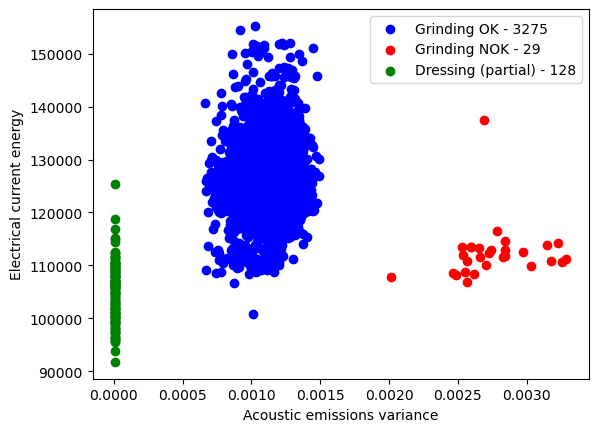

In [31]:
# Visualise NOK and OK data on a scatterplot based on their AE and electrical current variances
import matplotlib.pyplot as plt

# Separate the x and y coordinates
NOK_x, NOK_y = zip(*grinding_nok)
OK_x, OK_y = zip(*grinding_ok)
dressing_x, dressing_y = zip(*dressing_partial)

# Create a scatter plot
plt.scatter(OK_x, OK_y, color='blue', label=f'Grinding OK - {len(grinding_ok_full)}')
plt.scatter(NOK_x, NOK_y, color='red', label=f'Grinding NOK - {len(grinding_nok_full)}')
plt.scatter(dressing_x, dressing_y, color='green', label='Dressing (partial) - 128')

# Add labels and a legend
plt.xlabel('Acoustic emissions variance')
plt.ylabel('Electrical current energy')
plt.legend()

# Show the plot
plt.show()

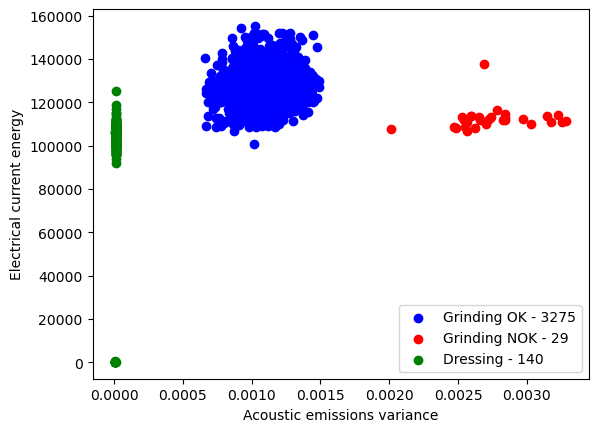

In [32]:
# Visualise NOK and OK data on a scatterplot based on their AE and electrical current variances
import matplotlib.pyplot as plt

# Separate the x and y coordinates
NOK_x, NOK_y = zip(*grinding_nok)
OK_x, OK_y = zip(*grinding_ok)
dressing_x, dressing_y = zip(*dressing)

# Create a scatter plot
plt.scatter(OK_x, OK_y, color='blue', label=f'Grinding OK - {len(grinding_ok_full)}')
plt.scatter(NOK_x, NOK_y, color='red', label=f'Grinding NOK - {len(grinding_nok_full)}')
plt.scatter(dressing_x, dressing_y, color='green', label=f'Dressing - {len(dressing_full)}')

# Add labels and a legend
plt.xlabel('Acoustic emissions variance')
plt.ylabel('Electrical current energy')
plt.legend()

# Show the plot
plt.show()

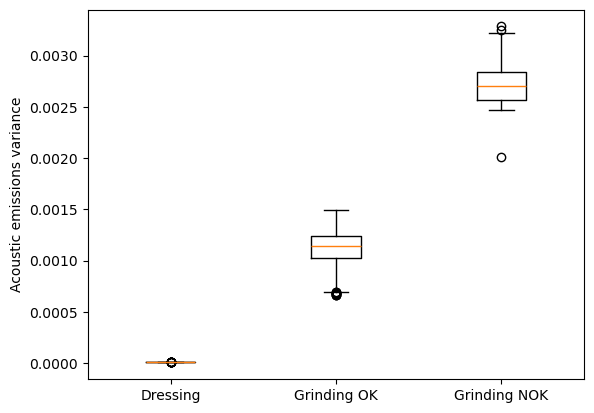

In [13]:
# Visualise dressing, OK and NOK data on a scatterplot based on their AE variances
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_var_ae = [var_ae for var_ae, energy_ae, var_cur, energy_cur in dressing_full]
grinding_ok_var_ae = [var_ae for var_ae, energy_ae, var_cur, energy_cur in grinding_ok_full]
grinding_nok_var_ae = [var_ae for var_ae, energy_ae, var_cur, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_var_ae, grinding_ok_var_ae, grinding_nok_var_ae], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Acoustic emissions variance')

# Show the plot
plt.show()


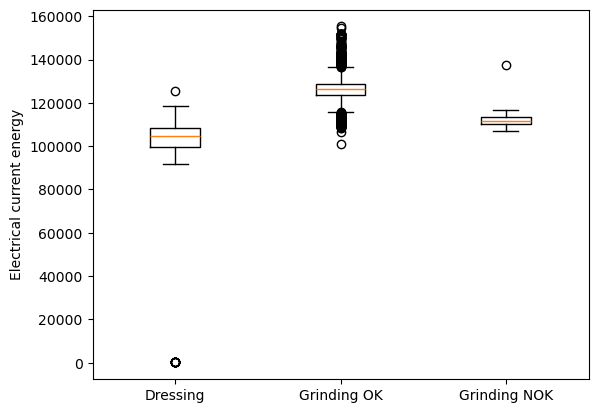

In [14]:
# Visualise dressing, OK and NOK data on a scatterplot based on their electrical current variances
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_var_ae = [energy_cur for var_ae, energy_ae, var_cur, energy_cur in dressing_full]
grinding_ok_var_ae = [energy_cur for var_ae, energy_ae, var_cur, energy_cur in grinding_ok_full]
grinding_nok_var_ae = [energy_cur for var_ae, energy_ae, var_cur, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_var_ae, grinding_ok_var_ae, grinding_nok_var_ae], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Electrical current energy')

# Show the plot
plt.show()


In [15]:
# Label data
# Data so far (29 OK, 29 NOK, 140 dressing, 700+ grinding (1/3 of Test_6)

grinding_nok_labelled = [(var_ae, energy_cur, 'anomalous', 'grinding') for var_ae, energy_cur in grinding_nok]

dressing_labelled = [(var_ae, energy_cur, 'normal', 'dressing') for var_ae, energy_cur in dressing]

grinding_ok_labelled = [(var_ae, energy_cur, 'normal', 'grinding') for var_ae, energy_cur in grinding_ok]

labelled_sample = grinding_nok_labelled + grinding_ok_labelled


In [36]:
# Logistic regression code to predict only status (i.e. 'normal' or 'anomalous') using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

grinding_nok_full_labelled = [(var_ae, energy_ae, var_cur, energy_cur, 'anomalous', 'grinding') for var_ae, energy_ae, var_cur, energy_cur in grinding_nok_full]
grinding_ok_full_labelled = [(var_ae, energy_ae, var_cur, energy_cur, 'normal', 'grinding') for var_ae, energy_ae, var_cur, energy_cur in grinding_ok_full]
full_labelled_sample = grinding_nok_full_labelled + grinding_ok_full_labelled

# Sample dataset
dataset = full_labelled_sample

# Extract features and labels
features = np.array([datapoint[:4] for datapoint in dataset])
labels_anomalous = np.array([datapoint[4] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")


Training time: 0.0208 seconds
Inference time: 0.0007 seconds
Precision for 'anomalous'/'normal': 1.0000
Recall for 'anomalous'/'normal': 1.0000


In [41]:
# Logistic regression code to predict only status (i.e. 'normal' or 'anomalous') using AE/ electrical current variance and AE/ electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
dataset = labelled_sample

# Extract features and labels
features = np.array([datapoint[:2] for datapoint in dataset])
labels_anomalous = np.array([datapoint[2] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")


Training time: 0.0264 seconds
Inference time: 0.0007 seconds
Precision for 'anomalous'/'normal': 0.9924
Recall for 'anomalous'/'normal': 1.0000


In [33]:
# Logistic regression code to predict only status (i.e. 'normal' or 'anomalous') using only AE variance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

grinding_nok_red = [(var_ae, 'anomalous', 'grinding') for var_ae, energy_cur in grinding_nok]
grinding_ok_red = [(var_ae, 'normal', 'grinding') for var_ae, energy_cur in grinding_ok]
red_labelled_sample = grinding_nok_red + grinding_ok_red

# Sample dataset
dataset = red_labelled_sample

# Extract features and labels
features = np.array([datapoint[:1] for datapoint in dataset])
labels_anomalous = np.array([datapoint[1] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")

Training time: 0.0048 seconds
Inference time: 0.0003 seconds
Precision for 'anomalous'/'normal': 0.9924
Recall for 'anomalous'/'normal': 1.0000


In [19]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
dataset = labelled_sample + dressing_labelled

# Extract features and labels
features = np.array([datapoint[:2] for datapoint in dataset])
labels_process = np.array([datapoint[3] for datapoint in dataset])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0247 seconds
Inference time: 0.0007 seconds
Precision for 'dressing'/'grinding': 0.9910
Recall for 'dressing'/'grinding': 1.0000


In [20]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE/ electrical current variance and AE/ electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

grinding_nok_full_labelled = [(var_ae, energy_ae, var_cur, energy_cur, 'anomalous', 'grinding') for var_ae, energy_ae, var_cur, energy_cur in grinding_nok_full]
grinding_ok_full_labelled = [(var_ae, energy_ae, var_cur, energy_cur, 'normal', 'grinding') for var_ae, energy_ae, var_cur, energy_cur in grinding_ok_full]
dressing_full_labelled = [(var_ae, energy_ae, var_cur, energy_cur, 'normal', 'dressing') for var_ae, energy_ae, var_cur, energy_cur in dressing_full]
full_labelled_sample = grinding_nok_full_labelled + grinding_ok_full_labelled + dressing_full_labelled

# Sample dataset
dataset = full_labelled_sample

# Extract features and labels
features = np.array([datapoint[:4] for datapoint in dataset])
labels_process = np.array([datapoint[5] for datapoint in dataset])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0241 seconds
Inference time: 0.0006 seconds
Precision for 'dressing'/'grinding': 1.0000
Recall for 'dressing'/'grinding': 1.0000


In [28]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

grinding_nok_red = [(var_ae, 'anomalous', 'grinding') for var_ae, energy_cur in grinding_nok]
grinding_ok_red = [(var_ae, 'normal', 'grinding') for var_ae, energy_cur in grinding_ok]
dressing_red = [(var_ae, 'normal', 'dressing') for var_ae, energy_cur in dressing]

# Sample dataset
red_labelled_sample = grinding_nok_red + grinding_ok_red + dressing_red

# Extract features and labels
features = np.array([datapoint[:1] for datapoint in red_labelled_sample])
labels_process = np.array([datapoint[2] for datapoint in red_labelled_sample])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0045 seconds
Inference time: 0.0004 seconds
Precision for 'dressing'/'grinding': 0.9608
Recall for 'dressing'/'grinding': 1.0000


In [8]:
# Extracted on 180624: 914 datapoints (test_5), 1543 datapoints (remaining 2/3 of test_6)

test_5 = [(0.0014310799014843189, 0.012187123488751549, 72686.24347706485, 128181.63114321494), (0.0010918071417543548, 0.01278699497183322, 49586.06797263635, 120198.1351159941), (0.0009016743866267548, 0.01209469426007603, 45716.6070922357, 126877.6609647119), (0.0014356707959325722, 0.013035225094218426, 65318.119844256646, 122738.92613045954), (0.0010403272258742268, 0.013145615633913782, 52864.93952308439, 137980.54763079074), (0.0011891138077550197, 0.012665300140254444, 53991.23860099667, 118965.27464881516), (0.0010699192958917348, 0.01240520605800182, 48369.66161701888, 116159.16360124826), (0.0013978795315620735, 0.01304880105802827, 63151.3873061777, 121873.32143698969), (0.0012810230967164743, 0.012802385545675924, 64571.29032031724, 133521.36751778531), (0.0010045266448277402, 0.014342776360822462, 50966.19768769014, 150368.9667932876), (0.0010199262684893859, 0.014098014295170035, 46480.7308761003, 132827.91462431193), (0.0010269996583112996, 0.01477913897063852, 52227.49010345026, 155254.7881619851), (0.0011141304286338524, 0.012938511316365598, 50930.35539010894, 122513.08235331876), (0.001284668369586443, 0.013520355885471793, 65295.84032949273, 142033.8342065389), (0.0013178944614619876, 0.012734687220286716, 66692.01299623468, 133159.5128426578), (0.0010295057961948193, 0.011946565879871035, 47374.723759136294, 113869.93228825417), (0.0008880901381421987, 0.011942557432909347, 40471.576672367984, 112584.33530888832), (0.001352737275147763, 0.012091898399944389, 68362.69602529595, 126545.66021389831), (0.0013355976806136921, 0.014845244424259524, 61264.49319113193, 140728.60662532342), (0.0010627787109429227, 0.012901171236968653, 52774.97221092678, 132471.5147497001), (0.000957682277776523, 0.01290480551607967, 43644.82765098292, 121873.84601857251), (0.0008449939722421933, 0.012688680196252192, 38783.53415815479, 120700.68277956382), (0.0011247463540452315, 0.013227422026997303, 51696.09065410148, 125944.5149532067), (0.0011080307624008437, 0.013315219461562174, 50561.5853699179, 125803.34244175679), (0.0007847228373150712, 0.01344667818281779, 39659.09120309283, 140136.95282722608), (0.001225652721047629, 0.012507238742121325, 61618.45664436101, 129989.60884132006), (0.0012094626691923909, 0.012321134073575287, 61018.592222512, 128534.58266035563), (0.0008846311144628156, 0.012716707897051614, 44767.10332671643, 132756.287734473), (0.001087617860816468, 0.012645568218933248, 55256.15955705106, 132882.07387817054), (0.0008752200284857018, 0.012326517297777121, 39840.66545952827, 116258.2363438477), (0.0012538833408335581, 0.01326492561169308, 63578.44213427544, 138759.64377896787), (0.001263575484832939, 0.012998257105575398, 57141.31867826308, 121670.1409090752), (0.0012553767850174325, 0.01310344075495996, 63425.75322389305, 136537.88224150531), (0.001356899659537842, 0.012938871001344214, 62234.92843646752, 122953.78534170143), (0.0010259174857510862, 0.012524481383284781, 47080.30006186664, 118811.53971744081), (0.0013864845069149533, 0.013304574108622739, 70447.47860036034, 139714.81159360346), (0.0011213795038945906, 0.013801421946509993, 50585.18490710547, 128957.79027324519), (0.0012211985020503574, 0.012742240543201486, 55513.576934244236, 120185.40303238604), (0.001281230898150318, 0.013273606006587457, 58421.30444528374, 125271.4202872829), (0.0009219895700858419, 0.013602416343568334, 41936.720015547646, 127485.01607172166), (0.0011282837022221783, 0.012943008773360605, 51543.39030823176, 122498.8176879262), (0.0011092716368653027, 0.012595125897452793, 50669.27259290374, 119300.4721545388), (0.0011066334325137632, 0.013202038611575399, 50646.39869335271, 124818.63029487195), (0.001115966713520865, 0.012034380097140194, 56794.05091637936, 126808.56891065295), (0.0012419082700317904, 0.012743092335956349, 56626.11336478237, 120110.16291736727), (0.0011876183179950804, 0.012649567573059595, 60579.89321314528, 133483.58464643924), (0.0012039528520177546, 0.012351160951439694, 55217.15766926935, 116996.06924580947), (0.0012775012420776209, 0.014183687694193267, 65120.89898697004, 149309.4646748963), (0.0012878025249883499, 0.013603764736733782, 58648.11519333373, 127954.64138287242), (0.001196561244368253, 0.01353526582489318, 54818.82116711235, 128209.26710644597), (0.0011320421377121542, 0.012683573062903417, 57429.19013707302, 132995.709722535), (0.001207267038280315, 0.012798265667691749, 55121.12166287893, 120952.83224318756), (0.0009426924718187368, 0.012825255929352488, 42445.19843778418, 119587.01601504856), (0.0009924959510906946, 0.012814746526889683, 45038.66732470923, 120269.09556298175), (0.0007942693004146898, 0.013684010052431434, 36359.14445659443, 129589.20867559001), (0.001236685283603713, 0.011995301361312768, 62644.38681179803, 125727.79655852464), (0.0011431248836481231, 0.01273032198364358, 57983.02350683592, 133468.26684053207), (0.001115480776713698, 0.01242852274278258, 56864.31776146402, 131079.20541678398), (0.0013743873596158604, 0.013126243774187297, 61741.09464009681, 122297.78230524836), (0.001041514784812631, 0.013525624542758916, 47700.47815950711, 128046.00204225809), (0.001258141758618122, 0.012497535364595318, 57381.96318767142, 118114.38667195018), (0.001223802531125326, 0.012952890581240252, 61014.524253466145, 133408.89253274744), (0.0011983426134478104, 0.013277955546860154, 55076.174096160576, 126095.63673566599), (0.0009755162567853579, 0.01222424095515064, 44473.75392730387, 115406.86147520342), (0.0012651391188626946, 0.012322114673538423, 64028.25493416464, 129119.53383356151), (0.001229881551408956, 0.012686076197143568, 62056.86553841543, 132303.64997222944), (0.0011429526220528077, 0.0147855577132541, 52078.92841499955, 139125.29498003292), (0.0010633790105991675, 0.01353814527853641, 48632.93313313185, 127994.08615053364), (0.0010004379732755874, 0.012668832069724585, 50800.26194624628, 132894.01430552945), (0.0011841788845833093, 0.012742432780506248, 54185.39962255335, 120326.48578776438), (0.0012898086482970416, 0.012711288212605858, 59338.43909421625, 120753.15212267959), (0.0012513232037222512, 0.012840825162169623, 62949.029007424244, 133563.27816438096), (0.0012170001843281454, 0.012896234347780927, 61895.31548078162, 135312.56511052971), (0.001301662522923382, 0.01251573143697462, 65767.29361536806, 130660.42694991594), (0.0011515507100786214, 0.013038494045239404, 52500.19151444293, 123199.51166753146), (0.0009572451277971765, 0.012966968483288408, 43954.33299367397, 123252.05628180361), (0.0013192816994403926, 0.01328693385067637, 66331.16208974246, 138006.7020813216), (0.0011640822571329084, 0.012341234660527228, 53130.90518745966, 116699.37408426573), (0.0012900988656239082, 0.012253001504791647, 65516.81693239064, 128816.87591403502), (0.0011691868888010115, 0.012937989229292783, 58875.14696848672, 134446.67483950194), (0.0013781148813627707, 0.012436182348413679, 62130.71821200608, 116010.35401863616), (0.0013880014990698426, 0.014479235778390115, 63080.09478400561, 135709.56245760925), (0.001324056904261548, 0.012791009083746583, 67009.14278973441, 133874.30878558342), (0.0012963793980681976, 0.01310035566879416, 65374.613960313305, 136478.92169152433), (0.0012166867644808922, 0.013753699074121033, 61654.85389022218, 144060.45898982175), (0.001232707809574506, 0.012819060989589072, 56708.52488281598, 121976.48690337237), (0.001025586805879358, 0.012834233629729555, 47137.964249089084, 122016.43397238225), (0.0010809070011578521, 0.012648163470405809, 55207.31623987692, 133618.35752169404), (0.0010434538963240703, 0.01197449039591904, 47679.98280286379, 113493.0137716081), (0.0011921277033658548, 0.012367873062548244, 54261.44181152984, 116568.42326385733), (0.0011979177860195198, 0.013741312826624386, 60811.10421348672, 144071.86196601202), (0.0011802293818317991, 0.014736061481107602, 53271.24798592146, 137499.38317172448), (0.0009141020714065603, 0.012109141340692778, 46296.724936166815, 126864.80807130464), (0.0011774389173808777, 0.013623695598883366, 59221.21319581665, 141528.60149062076), (0.0012008867735591913, 0.013684558950533615, 60717.696065335374, 142724.95997051778), (0.0009761147914392808, 0.012052698023707623, 48551.05116330831, 124156.24389788191), (0.001140137784692993, 0.012873745228845278, 57507.12990069607, 134036.10939902943), (0.001198871418801513, 0.012954859729944545, 60637.87667737242, 135266.72923148045), (0.0011878973004159287, 0.013062268305180591, 60457.38575780578, 137230.10755024245), (0.0013040540931476769, 0.012202805131593848, 65639.6384346156, 127151.73726819694), (0.0009165099615514493, 0.0133620151372621, 46486.89859389079, 140026.86265167882), (0.001224079326165885, 0.012133022482812455, 55486.32811489107, 113905.48911033043), (0.0010823351118832783, 0.01243212968742805, 49749.51304640376, 118335.58729436499), (0.0014107874306962798, 0.013051850160429595, 64887.34162736507, 124206.44656328845), (0.0011613760731044216, 0.012635183831570827, 58586.57941423555, 131715.94582277336), (0.0010388267755436047, 0.013013048389539206, 47378.025830068305, 122916.554459423), (0.0011134051146650134, 0.013394062657726495, 50859.72432245951, 126579.51231483679), (0.001255957853643989, 0.013266527958810564, 56501.59139955134, 123465.45551349699), (0.0011214636221284267, 0.013532345558533155, 50909.59915703645, 127014.77546490647), (0.0010425326388986014, 0.012269418850664566, 52249.53689244938, 127244.72411816353), (0.0009242131169331363, 0.011979873002684239, 46380.4516174934, 124348.46919551192), (0.0011182832285726956, 0.013026151935995814, 51371.14331793423, 123603.52093666125), (0.0012311929349902327, 0.011880320228465451, 62044.759052650974, 124040.508936275), (0.0011942804960874047, 0.013813546478101665, 53732.478026107216, 128768.12311727302), (0.0008322363304573275, 0.01203694176074293, 42323.20548324977, 126566.01301711891), (0.0013072723036301156, 0.012668875642545445, 66258.13131467567, 132748.50507042592), (0.0009467357116980551, 0.013846375871930782, 43281.14270005563, 130802.84685860963), (0.001185230439164975, 0.012961190986451552, 53407.846295242365, 120874.86812706047), (0.0010761943993132048, 0.012273167334337564, 54155.03965058162, 127870.37357972252), (0.0008814145389322909, 0.013614601961693448, 40209.503213424185, 128268.52954261306), (0.0011864651967985562, 0.012806132343053707, 59909.43950244551, 133452.28708764844), (0.0008438747647250104, 0.01436204124832717, 38273.82107909793, 134641.79654882493), (0.0013432153339977449, 0.012626305588421836, 61317.83292102707, 119194.756289571), (0.0010622705951440076, 0.013909816398387441, 47870.0009545388, 129780.8467155288), (0.0010602733536771926, 0.012105791804161554, 53930.678872988035, 127465.10026654963), (0.0013188168012384241, 0.012638431329572148, 65912.28443552306, 130661.78154731083), (0.0009141678184721355, 0.012601100407392088, 46101.6504047489, 131363.7289349746), (0.0011769699942681888, 0.012190308228099574, 53753.61854624884, 115179.25976234647), (0.0012365962025326761, 0.01420978456830423, 62063.589119195916, 147546.03429063974), (0.0009017199764485148, 0.013743086907160073, 41210.44928996559, 129719.24167401358), (0.0013076464676759353, 0.012871156036780327, 66554.14024471905, 135125.515907107), (0.001322998357228507, 0.013287764606636754, 60320.69675420293, 125427.65960388465), (0.0011956592894499705, 0.013232325888310841, 54696.70095792998, 125258.88676108743), (0.001342040124798568, 0.0132949823646325, 67521.18934082563, 138149.35489302492), (0.0008206817367462292, 0.013092554196223474, 37437.21803506636, 123210.45439043266), (0.0011281301391349845, 0.01337867674362157, 51471.81081504943, 126352.97984900873), (0.0012036377863627477, 0.01402803337372043, 61191.96966696948, 147335.43918109406), (0.0011913827596612323, 0.0138090548848338, 54289.16112509419, 130041.4260562438), (0.0011108389076596907, 0.013442056751521088, 50572.19470534708, 126423.82279254761), (0.0008718596276136556, 0.01358259870333045, 40167.15425558407, 129232.13105916689), (0.001117645873400129, 0.012135890263491232, 56877.20540654477, 127888.1719296712), (0.0012180663561013824, 0.01217018894236892, 55138.952312195084, 114018.94881049388), (0.0009615892476521933, 0.012683483944298583, 43472.05524261025, 118638.25207847037), (0.0010938037331246736, 0.013595059315302091, 49730.08725951616, 128042.6107749764), (0.0014130948630683752, 0.013095606244988036, 64302.34575143729, 123470.77836277512), (0.0011354547936193381, 0.012176202969796891, 57681.28277088965, 127998.79008036635), (0.0009109999615171861, 0.012711746455660044, 41504.541175119775, 120156.26202732559), (0.0012108883051393168, 0.012549536383952448, 54722.29525330071, 117491.2902918444), (0.0012686953242949251, 0.01441376522374026, 58033.06416453105, 136218.62678599253), (0.0013853521311821746, 0.01393971980405213, 63662.262676104525, 132305.32952103062), (0.0010528942142591887, 0.012363407918154526, 53373.72491146708, 129718.80425630022), (0.0010407221724113053, 0.013051799122598578, 47134.00590189669, 122427.59505590968), (0.0012121686342930777, 0.012984453286017664, 55328.53132205647, 122698.31579829368), (0.001061567749313836, 0.012370527653099364, 48785.216578168045, 117533.03315615279), (0.0009472296431682914, 0.012419392395124596, 48233.87008386497, 130759.26652020705), (0.0011607718368923472, 0.013898932609790622, 52915.57929143072, 131124.7250507272), (0.0008649753205498791, 0.011894407596586134, 39755.48274572247, 113234.2242788578), (0.0013978807988481766, 0.013053763762886412, 63321.00368379452, 122452.66245607911), (0.0012388469766587916, 0.011969207372443245, 62689.06090783749, 125486.52130805717), (0.0012757589636440635, 0.012644488045915876, 65203.7463481376, 133517.4951652997), (0.001029871310435595, 0.011950438116809816, 47447.720380274055, 113859.22747402273), (0.001032309470069796, 0.012516121384993051, 52282.57483177948, 131100.28396739552), (0.0013215266831305991, 0.01292771898585762, 66569.90883135435, 134496.0575455901), (0.0012252318098051609, 0.012109631264329434, 62365.08243508783, 127555.2007360131), (0.0011032665755847239, 0.012748358910762895, 55549.16133924583, 132787.12147938935), (0.0010750648282225384, 0.012954555005515076, 53657.29172047522, 133606.2811945481), (0.001149655610209483, 0.012984351572851336, 52395.77293748736, 122702.17696803466), (0.0008833852844708893, 0.012896137153671895, 40318.26794058671, 121868.99642466867), (0.0010541404061064563, 0.012744815883789824, 53159.91557329657, 132673.2715513373), (0.001406631213629639, 0.011710281203196357, 70794.41468889364, 122217.3035898403), (0.0012796197676593088, 0.014512418036001406, 64868.858002453046, 151980.05408109378), (0.000931318975183244, 0.012384469890386673, 47092.50580965564, 129495.5723123423), (0.0014326161220696693, 0.012379734567832805, 71733.45588380768, 128174.43270841926), (0.0012784685931018086, 0.012437986792353781, 64465.18423169383, 129695.08089671172), (0.0010778572019603154, 0.014457781520816318, 54549.54271640957, 151297.68153360556), (0.0012924874832869757, 0.01253759266463676, 65601.39111900394, 131655.71812780504), (0.0009875447334062536, 0.012878313716452759, 49876.48489396918, 133905.03135453627), (0.001271119408498589, 0.012211607732036252, 58252.97003715811, 115901.38997005389), (0.0009937107155266558, 0.012537839898344194, 45582.48936898767, 119065.44396208767), (0.000856654240335857, 0.012254185997065068, 44352.65941061071, 131079.93682202094), (0.0010786682490594938, 0.0135025620268103, 49660.505144654395, 128484.61213326197), (0.0013233929341667909, 0.013152198885436079, 60295.10248974739, 123935.94236168145), (0.0010717755002947018, 0.012999707397602265, 54519.70306727219, 136872.56438060896), (0.0011551191532119128, 0.012849518899401932, 58441.52158376414, 134182.79137311137), (0.0011728500093179642, 0.012543496437598183, 57882.35472654489, 128192.02698958745), (0.000900519352208273, 0.012498074334452504, 41081.14910281003, 118067.00161921099), (0.0011791703234001326, 0.012933460213343123, 54201.36187495501, 123250.72412936603), (0.001077116776551421, 0.012347909447870285, 53825.05606770457, 127674.24621826668), (0.0008669900507242394, 0.013095805544159065, 43741.76228585191, 136354.5331935784), (0.0011530733554361548, 0.012944003294820015, 52923.775729082525, 123177.7361172299), (0.0010482462481565013, 0.01250784231467787, 52741.212645164895, 130104.916582968), (0.0008990325262719505, 0.013761290902228619, 40814.65730305387, 128967.11015933304), (0.001297366595121321, 0.012299490899907959, 59706.18487652054, 117168.57581989023), (0.0010877186798252084, 0.012915049222710712, 54910.452852396265, 134583.28249407612), (0.0013987827911106524, 0.012990845585447561, 63789.30751880232, 122866.01129310699), (0.0010955916412852258, 0.012877486974956172, 50330.602958215175, 122446.8287592749), (0.0011141151412729373, 0.013098092541360348, 51163.76856825629, 124529.18116013633), (0.0013444594015175743, 0.013061287970565437, 61622.48826701235, 124468.40654367815), (0.0013550436616320068, 0.012737954876579666, 62309.51421440945, 134273.89157896084), (0.001242027655883745, 0.012443642948051371, 63376.74329875521, 117586.65632823885), (0.001001827676337863, 0.014407238287419532, 45837.66610492034, 150500.08403223776), (0.000958494607068537, 0.013971331279788621, 48426.13792010738, 145265.75539762565), (0.0010914658825342833, 0.012501837377335547, 55070.44116471775, 118887.96026614685), (0.0011987612022222567, 0.013602001098552505, 55013.4252974987, 128189.56422399092), (0.0010580817393945094, 0.01293370454645188, 48242.217790172435, 135475.24050277064), (0.0010172754097463206, 0.012638671908902274, 51601.70389834262, 117662.4325053631), (0.0009765170547147057, 0.01215064684469857, 43954.45123073558, 126286.31634659793), (0.0009637335580805707, 0.013609792286551337, 48435.975182131784, 128784.28949120377), (0.0011008750871926085, 0.012490758019392837, 50514.80120132571, 131761.7625338179), (0.0013039485153766364, 0.013916105193396016, 66483.1773929178, 130765.54974975305), (0.0012428722146341352, 0.012869298205922114, 56567.75707385446, 121988.96955615672), (0.0013078380089138054, 0.013627406442598933, 59892.934871039855, 141633.33082490682), (0.0013014698336335914, 0.012074363653763232, 65540.55037508188, 127309.7438277538), (0.0012995555656304752, 0.012345651177569123, 66146.94462174759, 129282.85113130002), (0.0011113539604218183, 0.012758592270120368, 56278.16129535179, 133033.82142503952), (0.0011108896643753073, 0.012298704549580338, 56148.95536576119, 129322.82957750706), (0.0011679511597040755, 0.013267967545117297, 59370.2432793155, 125694.82832646683), (0.0010551372740497612, 0.013033820229640827, 48230.13014797009, 122913.01432120048), (0.0012012668767930406, 0.013381748729508343, 54688.02921797823, 124750.96652522439), (0.001326976043788921, 0.013942692321778987, 59771.59741995922, 131316.46958444163), (0.0010238844038479961, 0.014582495927603585, 46650.04170326056, 136861.65387448302), (0.0010564898189249037, 0.013195424778658763, 47968.14832086496, 124576.19452485575), (0.0011658848037639602, 0.01302609025489619, 53240.8908760068, 123505.25699014393), (0.001318869054691008, 0.013796321040314445, 60376.7683585975, 145699.74229584984), (0.0009457690914324936, 0.012114185259435004, 48325.7024186605, 126422.78691624147), (0.000853836339428942, 0.013307351730544745, 43066.94708398981, 140445.4236993544), (0.0012326051399226784, 0.013711000219706497, 63094.310179055305, 129906.34143554408), (0.0009559553217296921, 0.013020599090450292, 43856.54663341709, 123898.1719424281), (0.0010661774403021435, 0.01268024364588016, 49009.86281012194, 132928.90472099753), (0.001206053394250669, 0.01286476754374153, 61110.49151693967, 122446.84304945993), (0.0012353381939965052, 0.01447607898150287, 56920.89723728918, 151591.21274199718), (0.0010610295110947648, 0.012318125866269403, 53725.857425792965, 116447.04960681342), (0.0009377463129044808, 0.012466937476093686, 42911.83301912512, 130703.3633083637), (0.0013143757872038121, 0.012653562423349708, 66596.96315032503, 132114.71279888006), (0.0013461780247069244, 0.012927825907832055, 68032.78345794213, 121136.3914159604), (0.0009201916198429421, 0.014705022350015593, 41593.64979689932, 154454.35947563895), (0.0009527171231125401, 0.013853933207900255, 48454.323347927, 144875.57050108153), (0.001259055229116603, 0.014679870652233626, 63722.84260116028, 138620.60830970388), (0.0013515319624935922, 0.01334141123627945, 61715.57176152479, 139640.03701998093), (0.0011747578653016877, 0.014539347984564374, 59481.82739899911, 136641.2648357077), (0.0010030921672263284, 0.013952633963108115, 45623.52243215315, 132526.8034356327), (0.0009331000652002393, 0.014365817974734204, 42839.05650321114, 134714.72287586652), (0.0008991628809027172, 0.01289810667827295, 40800.22165334287, 136230.38165301396), (0.0013159127013976848, 0.012575552284196408, 67216.93348791533, 132700.68705520566), (0.0012355747180002828, 0.012923161357313091, 63044.399992691055, 123097.48427734993), (0.001294695598619417, 0.012274734584092666, 59459.52462633836, 116852.67916789824), (0.0011711378527774756, 0.012473164031914128, 53822.42012504458, 116541.56454718896), (0.00130617412178552, 0.01252646158972894, 58976.68054317458, 130877.73026641422), (0.0012775623738514254, 0.012263668341974244, 64540.67295357617, 115461.32677624775), (0.0012563008311570684, 0.012321212409250205, 57010.55092325131, 116537.26619557026), (0.0011122373600489335, 0.01350843571109862, 50778.8700240961, 124053.9913904449), (0.0011726711913589915, 0.012265565440504866, 52148.96923143335, 127253.11840111758), (0.0012385354041446989, 0.012531146696658536, 62079.73131198239, 130346.83021647573), (0.0010631731479482421, 0.01359613165560494, 53537.89983585121, 128307.25507917347), (0.0010953355981333684, 0.013275280529158886, 50007.86168071497, 139410.3822022703), (0.0012211662753611246, 0.013670661323162806, 62148.406895810906, 127100.7820644238), (0.0011562713937264377, 0.012911143982436557, 51904.8038365601, 122544.27313369929), (0.001230262475883615, 0.013357842666833592, 56348.619222956724, 126859.04847931214), (0.0009235109112483956, 0.012324704435363263, 42500.54998908964, 117132.89103431368), (0.0009762710019223158, 0.01245013249006819, 44918.67668246107, 131207.3589927726), (0.0011550736604713815, 0.012841934564819942, 58783.61295423938, 134916.48959630964), (0.001437618164712091, 0.012738692265513394, 73058.20194531587, 132788.46328796115), (0.0009376286778005745, 0.012801158121082144, 47273.06115399064, 133970.1497021383), (0.0011362423530031, 0.012924736881282267, 57500.060601877485, 134820.40889066726), (0.0012729654993974984, 0.014863335248427556, 64290.95979076248, 140742.49989971286), (0.0012719685872123285, 0.012526368138881536, 58365.35056904261, 117220.32338401007), (0.0011415255378785204, 0.011858185847682102, 51624.54950423178, 111940.07426479197), (0.001288918503515422, 0.013715404111459334, 58736.202776830716, 125623.49033867942), (0.0010202568358054131, 0.012726241055040067, 45166.121158381386, 134093.65292986148), (0.0011060226377950309, 0.012467708775130315, 56359.3716964328, 130514.3722923407), (0.0011762380041387007, 0.013418532327765945, 59519.4496875592, 140759.04097141034), (0.0010954130112678345, 0.012198123799174669, 55573.72043940842, 127748.71683562758), (0.001109671322359985, 0.01309754946540988, 56128.652753020324, 137428.7446895319), (0.0007906925737201488, 0.012894467285259305, 40179.90355572391, 135534.01666471723), (0.0011290756159027839, 0.012164798667316023, 57405.760130901406, 128042.53743754253), (0.000954192716447467, 0.014341744112507231, 48553.82646949537, 150089.4876980527), (0.0014257880490825623, 0.012779680231089944, 72188.95993681137, 134091.94415752383), (0.0012415902028510698, 0.012534868095043944, 63169.24546557187, 131664.12487488298), (0.001007349228921971, 0.012524097147319049, 51265.718825606724, 132345.32181876927), (0.0013712213997933323, 0.012006806689086559, 70026.04898381875, 126729.82474850875), (0.001133495363509818, 0.012406676095605133, 57808.822717370516, 117092.43531030175), (0.0010711074899920443, 0.013649252921884356, 48846.99284537689, 128681.9327726458), (0.0009707180457470868, 0.012471935539018429, 44303.58257244489, 130190.81163899049), (0.0010340558919601844, 0.013253028149917589, 52209.15346945693, 124292.16376066799), (0.001010378901568527, 0.012856603576747323, 45740.91660318394, 121094.29152687432), (0.001054709740090314, 0.012440821290046391, 47937.707005926524, 130069.44259142126), (0.000838390456878605, 0.01256004081581631, 42502.78021052822, 131442.2538743552), (0.0010487289982454924, 0.012618950209947794, 53084.666826030436, 133266.5124998906), (0.001219280055435139, 0.014015204543478398, 62314.01057677646, 131207.69375366517), (0.0012335393995878752, 0.012166246111240297, 55836.68054547838, 127290.55310493671), (0.0011225509122916935, 0.012067461482698147, 56717.43781001865, 114256.22637804237), (0.0010214475702551465, 0.013332968264399595, 46722.641069097735, 139712.36371568078), (0.001290616504270242, 0.012832889410466937, 65464.86158810369, 121194.55976379625), (0.0011647710793137574, 0.014095713154847582, 53202.451824678144, 133729.44402010913), (0.0013145291306966712, 0.012607870038180207, 60329.10298012074, 132493.93192716903), (0.0008687251874056525, 0.012549324394610767, 44287.46414144579, 130753.17698006536), (0.0011322061191905968, 0.012377251526180893, 57020.28020374801, 129675.4837131145), (0.0012307233214611196, 0.013185291614707871, 62332.12064121389, 124457.33736449749), (0.0012513730548732714, 0.014138757965837835, 57018.15104994179, 146759.60438011255), (0.0010432726384529188, 0.012835464247531193, 52395.87256583349, 134995.29720774025), (0.0008975523134234145, 0.013601683963051905, 45763.91933137887, 126249.97765964831), (0.0010409067660728808, 0.013877428637752383, 46739.08268542949, 130051.96457627218), (0.0011376667707268273, 0.012678852979335919, 51618.85135561248, 132737.596622087), (0.0012089038706812516, 0.012431451835178475, 61295.826555467276, 129151.22122779902), (0.0008500263879918636, 0.012665478520715206, 42716.77295221701, 133145.26178415352), (0.001132072965492574, 0.01277872391210582, 57594.34731465778, 120026.98296938425), (0.001037571991704053, 0.013672506948561581, 47108.70655841584, 128985.93162847921), (0.0009248123828746696, 0.012634631466815167, 42240.15529489779, 131689.51712713554), (0.0012281498822518675, 0.01282757009681025, 61929.21256330594, 120943.41128532475), (0.0012203267894365104, 0.014405510606754504, 55618.28876208653, 151992.28169549096), (0.0012055508975531517, 0.013185030598834151, 61517.77985681557, 124783.90439071412), (0.0010573278878722846, 0.012526867769354052, 48302.80380631098, 130760.18110047372), (0.0012535789757350646, 0.012328119856437916, 63272.90731441651, 129246.08881889915), (0.0012331715364643826, 0.012982376337108182, 62456.63809138211, 136140.45166563534), (0.0009144822760386695, 0.01241369238915324, 46444.29548774224, 130915.01045028896), (0.0013656651299183945, 0.012763897439252587, 69568.10996018667, 132548.05214285717), (0.0011404200371469598, 0.01342525689993353, 57399.87347940975, 140612.60643322667), (0.0013019462363463873, 0.01330820385585602, 65953.78535106483, 125677.91348835551), (0.0012778855812483646, 0.012961300267768814, 58369.45190089755, 123112.75429057312), (0.0011526045480115678, 0.013686302325996606, 52854.67185996522, 128167.90679322362), (0.0008337732806788404, 0.012766178256521515, 37856.47659802639, 133732.4600021216), (0.0011095357410198527, 0.013452242504752531, 56192.72486405726, 140679.89524364338), (0.001040932649417655, 0.01285315789424862, 52705.6031983168, 120161.9122685447), (0.0014781560078285967, 0.013879320745040677, 66653.86198616309, 145714.09434590553), (0.0010620391855335793, 0.013722194425350446, 53795.000820158326, 128189.66722487051), (0.0008825383809763128, 0.014014996013540615, 39843.52034558717, 132097.95140224998), (0.0009333634882569908, 0.013009019706752984, 42527.8149100802, 122570.13490161848), (0.001143176012498699, 0.012251871995669466, 52071.520685350624, 115425.55536447212), (0.001278452026904795, 0.013621374562873732, 58147.49739630768, 127209.64060534278), (0.0012245022629998029, 0.011944135751470027, 55270.9703547669, 125249.44970278721), (0.0012310223510773595, 0.012909174202089587, 62304.095093863565, 122077.91666537987), (0.0010754857235906862, 0.013646502866284488, 49156.5430871181, 128995.82661017583), (0.0009476936704652764, 0.012596993913754923, 43287.532753113206, 131547.21008680545), (0.0009497467799725157, 0.01482016065250496, 47943.888565359346, 139908.12002544483), (0.001347528126838918, 0.011897901490092372, 61608.692872899606, 126086.27149421097), (0.0012069929185367838, 0.014021033025882092, 61825.32273715843, 131704.5176743807), (0.0012699159791137865, 0.013589769490653903, 57818.196588890576, 127893.19979386008), (0.001078342908905554, 0.013492896445008683, 49045.14534953269, 127233.34099623236), (0.0011190808294088857, 0.014043314804913165, 51037.47005605134, 131063.98865916362), (0.0009052210264466279, 0.014170896438698252, 40877.47958009055, 133348.4108517736), (0.000947151930379841, 0.012438843603431012, 43090.1000029149, 128950.19996572523), (0.001078106106249265, 0.013037666083207018, 53993.50395577117, 122539.10752153935), (0.0013580765332139259, 0.013147543945551827, 61576.46106541818, 124676.3894742252), (0.0011576134708861862, 0.012998672452427088, 52997.15511281274, 123388.17054897218), (0.0011457928320004883, 0.012945922120281343, 52540.1564630699, 135733.862884104), (0.0010523570539374503, 0.01305796901698944, 53508.80179190509, 124190.95811351163), (0.0009843724359933652, 0.01310577055344072, 45225.030755053325, 124115.97048438234), (0.0010532429235604694, 0.013159668956114595, 48199.69275832433, 124170.79907048476), (0.0012851998913294444, 0.01310733944154948, 58646.170295776625, 137312.55200889707), (0.0009620497287523743, 0.012681626272020786, 48904.64757803496, 131119.87898786558), (0.0010559116312097519, 0.01249749370416648, 52804.22816998387, 117317.39540308174), (0.0013107138533555406, 0.013891976113241538, 59466.753004228005, 145346.31984960256), (0.0009927256814777085, 0.014848362253707437, 50299.75415118661, 138869.13596511856), (0.001304967911032229, 0.012226178763637765, 59096.301679997596, 127353.61488447312), (0.001227378063742694, 0.013138640617291537, 61771.77539630101, 123972.28834463745), (0.0012653438506213803, 0.014086960681280828, 57589.04616837465, 147357.47211787337), (0.0008479116045096667, 0.012837843613597718, 42929.83542248614, 133367.3462162432), (0.0013356381095278342, 0.013807350367404679, 67141.30168110713, 130204.71268629734), (0.001130154620153217, 0.012035949588598273, 51454.32370436271, 125156.37715426998), (0.0013557495568276403, 0.01270966206951448, 68103.27032116734, 132944.06330632707), (0.0010801169105980365, 0.012911967023473511, 54659.53644735619, 123060.61432363384), (0.0011790790099247162, 0.013663909399756839, 54263.45729129959, 142729.49614829515), (0.0013119980539689428, 0.012459071075583547, 66394.15110347878, 129558.99279228669), (0.0012058357581275806, 0.013652989906484206, 60660.84771661983, 129468.05891348825), (0.0013213976337702919, 0.012816959538144415, 60735.35409108373, 133821.48084571614), (0.0009165575615159181, 0.01280393083747922, 46402.42070573545, 120065.07672094794), (0.0012060067072552584, 0.012681928177595784, 54861.3518393516, 131798.19356111807), (0.0011846501431527518, 0.01350748860312664, 59606.298974882164, 127836.59137587124), (0.0010569011203333414, 0.012968761050414156, 48431.32640302601, 135567.67710976416), (0.0009661769894272318, 0.012233673571413117, 48855.16949485954, 115644.7454771905), (0.0012751119672092125, 0.013637303818998322, 58170.668158847104, 139195.9295316648), (0.00101069653664969, 0.012492388215699557, 49974.1796930446, 130675.96910002426), (0.0008577525340695392, 0.012246677928763876, 43404.38579285383, 127917.55202932084), (0.001039905879847988, 0.012250283432775896, 52498.292308169075, 127585.2847867812), (0.0010330122642354547, 0.013524283960352951, 51974.358946301676, 127583.96821650131), (0.0011777929661113727, 0.013195223432008012, 53666.10023860984, 124980.3443458728), (0.0011801603217443995, 0.012699601142233553, 53972.08734321689, 132386.0029758323), (0.001185562262680034, 0.012945204057361685, 59811.59255349623, 122219.99872927512), (0.0012606529045052475, 0.012822194965910243, 57411.18624507039, 133354.40664408286), (0.001066489370199868, 0.014154805804694047, 53707.407037134166, 134131.85703065907), (0.0009875032720503686, 0.012972555979720376, 45265.38457479171, 134552.0352683236), (0.0010406623991218542, 0.012747619193199323, 52518.052289294705, 120479.93585064259), (0.0012415128497068276, 0.014554459188960436, 56678.07953746926, 138273.33165844998), (0.0008508136299318093, 0.012543517984965922, 39098.34696043808, 132543.53070148645), (0.0012817822704116852, 0.013651748322978496, 65502.74804231845, 141782.184648226), (0.0011994502548825037, 0.012438520243010136, 60232.82538691243, 130412.65758562203), (0.0011911484064102658, 0.012753293408428514, 60355.30569386808, 133053.48146461337), (0.0010977916226013354, 0.012347391121314553, 55500.91747901273, 116296.77743162628), (0.0010623589811062835, 0.0121862929982798, 48335.99220088409, 115940.96143967638), (0.0010850212687309188, 0.013103211537126689, 49905.2597456939, 123353.38613579662), (0.0011972397895299574, 0.014004283190989529, 54403.71334583978, 132919.06200522115), (0.0010612991514529994, 0.013369102010820685, 48823.012113606725, 139172.9027012841), (0.001406738639021831, 0.01221659765914223, 70878.61028604764, 115351.32666233537), (0.0012355018436656523, 0.01407569396153946, 56349.85502178908, 145695.83800315406), (0.0010532736106105686, 0.013964637782945512, 52717.02835057863, 130827.72603506398), (0.0012508524446347095, 0.012666413019094595, 56690.74461741991, 118921.78877418357), (0.0012747572918727378, 0.013370715381049593, 57821.8228025762, 124890.8015516888), (0.00121680425639711, 0.012386522616595376, 54997.826493330314, 127448.25058469285), (0.0008987621839825095, 0.013932627556672293, 44849.342410202284, 132385.0030286934), (0.001180188095722364, 0.012472608743019786, 54221.959631102785, 129809.18912276073), (0.0010997004198168598, 0.013057786240234702, 55308.64853230298, 136849.33415068372), (0.001271362858669235, 0.012780770987516375, 64496.364323732334, 133634.45732241584), (0.001106431111142729, 0.013498075241731286, 55983.0071479412, 126530.47709849998), (0.0012846068653706792, 0.014001926988747295, 58249.38294463061, 145664.85738635776), (0.0013231718806900094, 0.013815856586890812, 66675.46084762877, 131271.527023514), (0.0007114933849210885, 0.013816110589437797, 32713.13331504127, 130429.37715485004), (0.001182196500033083, 0.012452236151019083, 53867.01638913937, 130556.39646917713), (0.0009268595130234513, 0.013076760062684824, 47044.490600792546, 135031.20171718887), (0.0011622988235096873, 0.011842627805088142, 58170.3585298265, 124329.13527378647), (0.0012867376696474525, 0.012025282763295864, 65176.49136038145, 126325.25451450083), (0.0013034346012363064, 0.013023211550860678, 66073.42653606267, 123841.95362180543), (0.0011459410571286006, 0.012505006694581367, 52571.59620584105, 131458.0309511816), (0.0011999989966211982, 0.01305858838945934, 61035.23374572746, 137616.46396511619), (0.0009995914131066474, 0.012459799847236983, 51030.5512476619, 130236.0745398866), (0.0013086368768404188, 0.012679977027549619, 66146.63882342019, 119135.41615121087), (0.0012944281373890932, 0.012316816518804867, 58732.2808457527, 128784.20270995963), (0.0013178984675606556, 0.013530672108115782, 66581.24650345895, 141468.6800280052), (0.0010423432092912766, 0.013482167116440989, 52782.11969579699, 127680.16759297733), (0.001135746177575919, 0.012349595136208199, 52068.28738378984, 129171.46752867229), (0.001326510393018495, 0.011958725761134282, 67043.01169054267, 123804.49941659508), (0.0009916980205037901, 0.012484621551064215, 49626.82070614578, 131081.56393344654), (0.0011853051810732079, 0.01328119839198865, 60154.5571105896, 124081.85097494502), (0.0009556186150041701, 0.014910721832649024, 43115.459347131764, 140444.32477551978), (0.0011917560682932519, 0.014556144618432345, 54334.108591770404, 137209.34329921223), (0.0011550443866251605, 0.012535382552157819, 52664.22374607031, 130698.41038564612), (0.0013675930738797316, 0.013386172088287332, 68933.58400015437, 126498.24298223693), (0.0012719138899702721, 0.012948517785043811, 58189.125453592285, 134752.82854554476), (0.0012878210375651502, 0.012987648382390218, 64835.74842711464, 121974.75664726553), (0.0012792444743566535, 0.01289561066733991, 57953.476019061476, 135084.36530054294), (0.0012115202807234228, 0.013067826003997387, 61418.04082346194, 123324.88276802223), (0.0012115354455018539, 0.012947201430877511, 55170.613052573455, 120712.44483056915), (0.00112007948742347, 0.014215387531917303, 50420.29375533974, 149459.79586405176), (0.001145047408221076, 0.012919594940624255, 58184.0653458546, 135027.11630053385), (0.001148857745313349, 0.011801257812086567, 58243.78061438234, 110750.3238103158), (0.0011230894181960816, 0.013035385477677575, 50841.30647522616, 122515.03080724995), (0.0012957778602225524, 0.012449704736274896, 58762.1307596239, 116991.09412126639), (0.0013615800297270603, 0.012658884335265212, 61738.51304515408, 119996.27081858323), (0.0010111697121194727, 0.012967511298755771, 46212.13023868037, 134981.8566404449), (0.0011811510858758456, 0.014287892885040381, 59595.26531376456, 133668.42063931358), (0.0013063981947692262, 0.013769283164146738, 59130.06989146502, 143208.74992567068), (0.0012999522846505159, 0.01234563510056926, 65526.35108200833, 129161.55498736956), (0.0012428570760255658, 0.01312703360364724, 62850.993113241086, 124627.21735373353), (0.0011530382556652079, 0.01386888357521841, 52828.00992794349, 145734.25469500237), (0.0012659811189022691, 0.012914135596716276, 64391.83266330125, 122715.82808262494), (0.0011525424865363126, 0.012079221547888586, 53053.01986557711, 115146.99166792941), (0.0011975707120280888, 0.012880694366517025, 55052.534781927476, 120965.95897286745), (0.0010183628001252014, 0.013713051048045833, 46139.078896274375, 129593.58445413895), (0.001319857306048476, 0.01292986205949756, 60390.327612724475, 122090.51600298763), (0.001349090726644631, 0.014428440736342935, 61537.32029869459, 149964.8223473702), (0.0010897249945545347, 0.014491504040361652, 54847.0920839512, 151732.75684623414), (0.0010482685194469796, 0.014297564249834194, 53112.31434949233, 149544.57883082313), (0.0011640620216563375, 0.012908798330260415, 58852.88099858547, 122729.26126448145), (0.0009014615273989639, 0.013428401893824108, 41380.72996638639, 127139.5389141326), (0.001131208448648661, 0.014770773426026526, 51807.73242585957, 140111.3753118909), (0.0009622587453789927, 0.015048527682680482, 44209.542965997265, 141886.65627174193), (0.0013882483662505955, 0.012451939407050992, 63345.87736337017, 129958.03713797986), (0.0011368734547570992, 0.013673384864145462, 57332.351615755826, 141787.5885296584), (0.0011981891383058242, 0.012805216508522173, 60134.955290755366, 119624.86214175596), (0.0012576999816797036, 0.01410064011667401, 56762.51855935398, 132492.1880945891), (0.0009875280701095515, 0.012645877470205796, 44846.29330839523, 120213.00418553778), (0.001263596196670614, 0.012873445991720451, 58063.959748303554, 135388.6975954093), (0.001114775096448368, 0.012367366142788744, 56782.72112203122, 128869.79512618722), (0.0009224872532046307, 0.013326292968376459, 46496.63490437571, 126666.44634069628), (0.0013457456726594624, 0.013228006026737996, 61943.904578929905, 125054.79840337289), (0.0013503925904261864, 0.012576682858020808, 61651.6211742303, 131705.17349757635), (0.001223853156272168, 0.011990167648574855, 61990.887320010705, 127142.73552993045), (0.0010302473106610886, 0.013169865606182527, 52772.73493010324, 138346.18574030246), (0.0012476755840435958, 0.012500593800646744, 63374.5736671037, 130291.47382489723), (0.001038594021475584, 0.01210487164375531, 52336.953593569604, 114440.69117210577), (0.0010897403782546824, 0.014488111897278907, 49805.89190975386, 150999.37233436646), (0.0010849023590325014, 0.012972154904407004, 54694.96542784145, 122705.70398896432), (0.001283748247639713, 0.012764292158962472, 58638.38433088089, 121615.84185211288), (0.0011376724964580955, 0.012879859448330803, 52242.64425359245, 120496.49152136888), (0.001014083088575641, 0.012611536677911865, 45783.10213174352, 132220.6537275253), (0.0011110663782808448, 0.012949830440962422, 56332.975797392464, 122633.26827974625), (0.001214764062820023, 0.014074636553669816, 55481.68220837298, 132687.25667889134), (0.0012713687652272686, 0.013916211103078245, 58068.22735132937, 130144.20223941181), (0.0011986389436161855, 0.012542056988535805, 54161.40363221837, 118368.72945395888), (0.0009205944409281978, 0.01406365483577497, 42104.55269472069, 132352.34444897226), (0.000914750303666593, 0.012537864446859047, 41649.031628094366, 130704.66017413886), (0.0009828532235176977, 0.012530143500592526, 49614.7653770424, 131837.98878903157), (0.001168436815421385, 0.013686168528387693, 59458.104427964, 143232.6816655269), (0.0011830820760803103, 0.01242204522689535, 59963.99948655612, 129594.84843985942), (0.0009353274498201354, 0.013049854141399947, 47226.44811285611, 123527.80756597845), (0.0010748845925012246, 0.013761290419692013, 49173.636340979836, 129932.26477234859), (0.0009975771028866156, 0.012472817711094866, 45563.176057182725, 130157.68377765706), (0.0010683269298633479, 0.012117271826047708, 53947.47052279943, 125379.21648184728), (0.0013250429438812457, 0.012219487631910088, 66240.35550916895, 127693.54129706221), (0.001021935082574858, 0.01272064764133634, 51623.87673228812, 120186.23202828968), (0.0009691052035646405, 0.014341873403191627, 44132.42908636347, 148117.2672944975), (0.0014228278660944988, 0.01316193118689792, 71065.5974678444, 124412.13732455035), (0.001030308051971435, 0.012557811987797422, 47044.97243556081, 131504.06130357776), (0.001192383618003825, 0.01202285680692854, 60371.839518130066, 124204.33070641257), (0.0012907546883217588, 0.013445205306018055, 64375.32452299429, 141392.84553121205), (0.001057984828297232, 0.014017642884994956, 53850.321950603124, 131648.16692960417), (0.0012166798846475195, 0.012839467766169307, 55287.66105893674, 134173.46110018084), (0.001276791355641354, 0.012980711267705487, 64533.77852439479, 121876.84769699234), (0.001257741770445111, 0.013438771925108266, 57021.06456238776, 139649.75854252148), (0.001247210852482245, 0.012467334187607657, 62709.30756666621, 118913.4068046018), (0.00128064987580041, 0.013929076121252786, 58953.873119529, 146800.30365338427), (0.0012159555857462548, 0.012455545840779963, 62010.77556527533, 130924.82756838511), (0.001034158266706837, 0.01261664532595267, 52543.83750892298, 132829.95115676703), (0.0013644048031313594, 0.012009680910901434, 69448.830627251, 124756.93820180828), (0.0010403458806262768, 0.013063335551081407, 52173.8650991881, 123765.39145722112), (0.0011837994276626233, 0.01263364815186276, 54118.838020671355, 118582.92722707303), (0.001165661112251079, 0.012168843729459401, 52948.82647973668, 113790.0259908927), (0.0009894699070714628, 0.012521840385741827, 44712.924473454055, 131934.18170657087), (0.0012038690272528731, 0.012767868291738333, 61312.93302950972, 132746.0154337714), (0.001292828413361996, 0.013970324084001486, 65024.40863960332, 146865.75080696392), (0.0013383339082410344, 0.012827930739903761, 68119.91639451671, 135788.08315358864), (0.0012170818976478147, 0.01261944974272161, 62295.05557190926, 118429.44458268677), (0.001357625787341817, 0.012168207286706445, 61581.703049053256, 128357.04497505982), (0.0011616476181522447, 0.012089343866114106, 59271.925894006454, 125007.60168704712), (0.0012097059202478154, 0.012581624060845831, 60419.01300165743, 132142.48122968877), (0.0011472661014234986, 0.012127109635973746, 58281.81394161031, 125771.2009826401), (0.0009478309831474297, 0.012928905011066314, 47476.93521648283, 135415.19900168251), (0.0010674698447780836, 0.013285399022147927, 54204.50255301355, 125776.15343347235), (0.0012225850714074446, 0.013571100758372605, 55919.00185764951, 127248.94103062042), (0.0011158134121603289, 0.014125078530574273, 50601.74131885136, 133142.33187923155), (0.0011325861738442898, 0.01275218428114567, 51556.92003914729, 134461.9637790743), (0.001110682916698728, 0.013026118311401234, 56693.03799007028, 122970.44273779838), (0.0008494768718307103, 0.01319990243452517, 38748.978461911756, 123756.30604281779), (0.0010670063740654276, 0.014445110847052784, 48292.39713700242, 150386.94426133475), (0.0009942669704221588, 0.01237432299194893, 50219.58631400984, 129821.05604498049), (0.0012232422786183717, 0.012501487485133543, 62039.135448011504, 128801.71922545986), (0.001283812900628108, 0.01309734401215473, 63968.64242292982, 123456.32916652253), (0.0011970996455058214, 0.01450633473032019, 54527.56626560564, 151768.65608927532), (0.0013871750373649367, 0.01286071312583605, 70188.7880727471, 134389.35528975425), (0.0011742792459946442, 0.013402353761566047, 59364.69851495527, 127013.53829715253), (0.001064743991981449, 0.012352885109639208, 48825.60559427191, 129220.77222117537), (0.0009664650665372099, 0.013346813665784241, 48980.264590896564, 140328.01164917205), (0.0012686718470919507, 0.012366998997696974, 64648.81248072129, 129539.03088207048), (0.0011647930719453417, 0.012856825538855999, 58983.071990507626, 120117.51645629472), (0.0013320060255354903, 0.013171311218512545, 60140.0453606008, 137293.89251900103), (0.0011036106465982882, 0.012158547098236883, 55675.89620765095, 114553.85898122344), (0.0010006068579310353, 0.01261888423060351, 45511.17907040704, 118601.57639280925), (0.0012576661085213483, 0.012498067370935907, 57137.38165827897, 118634.57528529236), (0.001256568985758833, 0.012441419490502348, 57639.162813546776, 130406.13129364136), (0.0013513141949784348, 0.012937308941171953, 68469.78162850384, 135223.82247228106), (0.0013147966799346529, 0.012456309487011529, 66474.03187567506, 131434.53992175477), (0.0012056294876009472, 0.012992479256202153, 61490.762016274406, 136313.08937578133), (0.0012726447622269852, 0.012966813248192849, 64644.79634506011, 122268.60485836401), (0.0012798779233421864, 0.012871542905290008, 58265.473097884314, 134385.50720080404), (0.0011004279811187884, 0.012412456800891902, 55613.34575960308, 129423.36044531461), (0.0010203835100512368, 0.0121413332888992, 51441.71740639666, 126699.06258739046), (0.0009245715002119918, 0.013316252398117156, 46601.29750736144, 139411.28963686226), (0.0010561452720238497, 0.012470453506763233, 53563.60817435559, 116590.94152532205), (0.0013561426929557738, 0.012357191956803747, 61268.920942288845, 129367.64351543422), (0.000976194568274078, 0.013509780543267718, 49500.48598121654, 141472.52417836938), (0.0008928622913673558, 0.01238984278625662, 45367.79610080275, 129203.2624535168), (0.0012229469261156218, 0.012771735107113921, 61621.70466055782, 133342.8389430139), (0.0013016574061492164, 0.012370894340836375, 65702.17661934369, 129237.9071761301), (0.0009344439895207093, 0.013269508411807377, 47285.21089481905, 138930.21468379907), (0.001268878540468027, 0.012399886293164257, 64351.65547260833, 117845.14761198124), (0.0012766551470780642, 0.01298482413211431, 58613.966409571105, 123650.92331252754), (0.0010802409143368021, 0.012828225669053844, 49658.31797532692, 122265.44504875214), (0.0009739100912279604, 0.013661366738607975, 44817.54781514942, 128919.26754722466), (0.0009778997594747942, 0.014525087568281686, 44628.24296364114, 136456.2081940933), (0.0010794080248939853, 0.014637203564818131, 49086.02500532339, 138745.9026119075), (0.0009803716208847825, 0.013493682522285382, 44975.621983039935, 126446.18825063747), (0.0011072773820434052, 0.012867150152768235, 50169.768061748226, 121190.00984889269), (0.0012551974173191326, 0.012887536648125388, 57171.424761974995, 121992.96823548937), (0.0013298750422546521, 0.012762481291890322, 60917.326320169064, 131881.14113225974), (0.001137023620946073, 0.013158605308241342, 56848.226095868165, 124285.27000146147), (0.0010952290940539366, 0.012968724187366876, 49937.93837669329, 123171.78240851339), (0.0009904197152332981, 0.013064229373623172, 45400.72292056542, 123024.24365999557), (0.0010989201428548046, 0.013357816620411146, 49928.8517289253, 125318.3486586416), (0.0009852768179664908, 0.012511857184513078, 44739.136273440876, 131101.04085963833), (0.0010469085340605573, 0.014883880603126067, 53086.93131879829, 141370.5941545261), (0.001372095020855518, 0.012116307865698405, 63043.50040321042, 126118.43288432945), (0.0011981322767985504, 0.012304463312899468, 60289.13944294529, 130019.02873881963), (0.0013279430074482075, 0.0124280746768429, 67779.54034465656, 117583.54337497553), (0.0013175123446184877, 0.012652240985434006, 60188.43500870745, 128713.8506189966), (0.0012008731650111919, 0.014408155907520391, 59080.77282966235, 135590.20406199625), (0.0010910030282491165, 0.014948211129630837, 49681.24098659562, 139605.1209742805), (0.0009656029290249274, 0.012861999072809788, 43694.123641497084, 133847.87135213506), (0.0009835606775635854, 0.012465708143068315, 49596.67627915857, 130133.15984813072), (0.0013434922529422088, 0.012219025822345924, 67826.2269958683, 127881.1809475917), (0.0010656996310025185, 0.012760886665125377, 53915.73411525828, 119833.45511920935), (0.0013399000336547237, 0.013254648786915114, 60840.16083717144, 124114.34350174345), (0.001299523780825919, 0.01174489178615149, 58707.99713361135, 111285.9943907846), (0.0010866709593466575, 0.01263310452183975, 49834.77816705116, 132075.98175407844), (0.0012559728448454269, 0.012096220841040861, 63480.77752234731, 126603.35857699256), (0.0012144524564812683, 0.01248677107122515, 61485.942860204144, 131318.21267641775), (0.00101602579093465, 0.014381934236541272, 51720.610607553186, 135910.24953093633), (0.001338953955924003, 0.012497707885652505, 61203.25567669707, 117316.4371712272), (0.0010959769727463863, 0.013364512995279085, 49783.17971128937, 125046.23231158742), (0.0012642690700484808, 0.013672360689664093, 57209.531211931964, 129058.5997637313), (0.0013444911839670208, 0.012430988388936354, 61418.63357738236, 129717.73607642873), (0.001150566493572835, 0.012914150183816732, 58045.05035364052, 121755.2669912567), (0.0011376076807832977, 0.013808123603030718, 51768.88998947572, 130931.50361219171), (0.0013034682041722643, 0.012964150001664971, 59854.28974175722, 123441.73731780691), (0.0011489805974715809, 0.014143611696076789, 52848.1821268352, 133675.10816490639), (0.0012513899529869952, 0.013235133370379005, 57256.20049385287, 125695.92440692513), (0.0013534821633068952, 0.012685754438559498, 62150.98493174854, 131981.0423733907), (0.0013677585984192974, 0.014131687371564536, 68843.03162960663, 148574.85362228582), (0.0013073710671130823, 0.013308880588384602, 66556.4439436003, 124959.07054794104), (0.0013081972061814457, 0.012837406854301616, 59293.85230207298, 119838.8019971245), (0.0013489431855614699, 0.013432366737989025, 60775.799834591766, 126471.40148530556), (0.0010828872645656537, 0.01340564254856045, 49268.42794031076, 125840.57076343727), (0.0011624086941322118, 0.012442763335022613, 52742.34417680126, 129408.62392559373), (0.0011028739928923815, 0.013442570046550197, 55428.08143594613, 140763.19908243293), (0.0010156869823206881, 0.011954488904463698, 51551.5558837716, 125552.4971891599), (0.0011870803642094426, 0.012470597945841636, 60197.0873188065, 117903.84896133826), (0.0010081466477316556, 0.014071338693627701, 46061.36952131792, 146455.93285392987), (0.0011423251555779514, 0.013988470949561986, 57535.288997446325, 145866.68859154746), (0.0008648180670846192, 0.013848110938187134, 43652.99149872578, 130838.63379659622), (0.0009668018358860447, 0.01292622640227138, 44268.868684999245, 122027.16989942626), (0.001339848145282725, 0.013134428953458243, 61043.255781357366, 123354.79558782268), (0.0011827372855828374, 0.013014185202444935, 53692.5221211365, 122761.84493558733), (0.000902504639444729, 0.013807657491065654, 41065.300169777904, 143963.76158900833), (0.0009530685640757178, 0.012716932164054185, 48151.76512261534, 133201.74438403972), (0.001329912841647008, 0.013508997655948601, 67384.919796998, 128423.91758627543), (0.00089825467435418, 0.012077300505773079, 41246.891613583044, 125812.4418927877), (0.0010419973499210214, 0.014399820688706466, 52456.26933545179, 151397.80485928638), (0.0009130826615836696, 0.01359620360462964, 46433.122080282206, 128899.79613213017), (0.0009688416172055429, 0.012565541818167198, 44437.65565161124, 118709.39360918432), (0.0009367418645817205, 0.013777179783453001, 42831.52678262719, 130030.61727018995), (0.0010255160020334504, 0.012877725793120947, 46752.82832142213, 121230.2413440795), (0.001306633880549405, 0.013538884546357216, 59505.20859959697, 127513.19425543124), (0.0014694948953413603, 0.013925837442004678, 67083.12034242628, 130729.70633340604), (0.00115537385585449, 0.012825002864378118, 52364.23565102322, 134971.58347000927), (0.0011828986685263596, 0.013662497277618712, 60285.74448540053, 128646.85022991317), (0.0012460103251707019, 0.012169527338581482, 56766.19252651477, 127406.30997806402), (0.0013016523800760092, 0.013185117999011033, 65872.38066157658, 122138.2659481568), (0.0011353413627141029, 0.013000262243143232, 50828.296007716846, 136604.52581366725), (0.0009381900791662388, 0.012814702076204184, 47790.21072472643, 134558.30462406934), (0.000993025414505059, 0.013219026732092062, 50470.17778263909, 124684.97991642098), (0.0011039750090023827, 0.01295362995010755, 50285.86516096062, 120855.04413266601), (0.0011747104690751858, 0.013077496156620868, 52908.835132398344, 138583.47018397524), (0.0010791589908422231, 0.01263338268876564, 55338.33170226865, 132110.50654848973), (0.0013728650877732416, 0.01255041773704475, 69438.13278107734, 131687.57273950157), (0.0012988878959464259, 0.014704985610965374, 65852.46596242627, 138359.52404533667), (0.0010204328092188845, 0.013225461282363151, 46453.397153937854, 138571.34970142585), (0.0013292582786796632, 0.013378473103547247, 67419.86515582274, 139236.89384660553), (0.001186903585810984, 0.012902911121170755, 59750.76720606865, 121532.10827364239), (0.0011766297174956972, 0.013230199763852885, 53492.49986756857, 124356.13751540384), (0.0013544327599546632, 0.012631136698347051, 61475.73279319153, 118499.09461643272), (0.0010759868917740514, 0.012915330195844716, 48772.672990298335, 135585.1522023732), (0.0009414782155913561, 0.012627148381272468, 47838.48218990848, 118803.72615475632), (0.0009196050219537757, 0.012828705497312892, 41829.26288600704, 134982.5071720591), (0.0013690329391076463, 0.013778500264090906, 69694.64675696225, 129489.57318000522), (0.001247516075355025, 0.012921666134259581, 56722.53188315034, 134666.6586913212), (0.0010389187840180235, 0.01231917361374923, 52444.42316309103, 129180.73779529537), (0.0011949712241267085, 0.013308318619893789, 60642.61063300978, 139429.8787496346), (0.0012965637184358123, 0.013698709562488916, 65778.17751535581, 130251.74929586197), (0.0007808199943628142, 0.013587163053880583, 35905.90476974849, 142624.14614659167), (0.001249151851897456, 0.012117387849472378, 63412.452436851476, 115349.71331185929), (0.001140369374584365, 0.012324467637818469, 52358.2697831157, 129651.9428294316), (0.0010815810842809033, 0.013248339974700808, 55018.16124692622, 123894.21444788942), (0.0010734490979395818, 0.012327621723646246, 48518.38368406801, 129643.76372880659), (0.00122412070925448, 0.012987616844768414, 62217.21816681024, 136770.8417449372), (0.001159659307715765, 0.012335934391225555, 59095.6964203123, 117344.8248821232), (0.0009887643701066947, 0.012176222308470859, 45520.39031947256, 127079.82260566522), (0.0013234060695635492, 0.012458105777748491, 66705.89435434429, 129024.0142941208), (0.0010587397562389625, 0.012970326203689011, 53029.793865673906, 123478.58705006212), (0.001161637398493988, 0.013237164635536395, 53340.654732120514, 125605.74520540575), (0.0012849262622923712, 0.012854061764741083, 58846.84517411338, 122039.43708553485), (0.001271564719824144, 0.01322065045730249, 58251.45513493526, 137209.45187255598), (0.0012560488289972108, 0.012703285363698668, 63118.4390289641, 131307.993732874), (0.001364370681475984, 0.012528755520144182, 68210.10292390292, 131212.06437514842), (0.0011636830867386603, 0.013844532506679792, 58962.69748026541, 131064.66686368712), (0.0011769007834228468, 0.012120119911572524, 53835.4046768814, 126190.5694728433), (0.0013349218661796861, 0.01337719957516488, 67142.90622510028, 140568.07634941593), (0.001002606184591052, 0.01291842692486727, 50998.984236760145, 121856.75678533102), (0.0010890169389929567, 0.01287783402857963, 49649.02906746647, 121242.78153324063), (0.001119968605831593, 0.01295553451953452, 50892.71902489197, 122214.81492633026), (0.0011675196849163902, 0.013513837346670802, 53146.477891239985, 127291.0083477901), (0.0010353587497474257, 0.012225440844564036, 47146.31009585748, 127589.98841303869), (0.0012790695607085031, 0.013382571494635336, 64562.44637001271, 140729.5493663553), (0.001212170955049599, 0.012373045779052325, 61776.888665692124, 116854.3709442658), (0.0010597327694559693, 0.012380657922958851, 48385.67769271197, 129103.20471225091), (0.0010677552758098134, 0.01223775672638559, 53796.90418267357, 128545.44926936195), (0.0009152189451071694, 0.012052505209368231, 46489.74624547828, 125666.55642738496), (0.0013287475354118775, 0.01267730484559166, 66902.88668491751, 130424.99503788182), (0.00112719043333692, 0.0124255326616693, 56058.81272499177, 130548.04859345144), (0.0010658453266373107, 0.012764586726191567, 54202.57532885553, 131372.98590381868), (0.0011645011170695087, 0.013620049287377695, 58077.44465027306, 128138.73121394282), (0.0011674326898653093, 0.012299810101152693, 53110.987842686875, 127931.96449850206), (0.0011765105764753832, 0.013797384968003784, 59104.754393294264, 129601.97397496991), (0.0013035720162388302, 0.012183539795646845, 59270.5626286689, 128166.98393863977), (0.0010790445689260679, 0.012120675225627405, 54848.145799940714, 115341.66632517673), (0.0012552444072514457, 0.01212407288721125, 57663.76674725744, 127098.03834255299), (0.001172874827814874, 0.012693362244446005, 59410.602824896494, 133144.80405562866), (0.001138202148270955, 0.013219662576432464, 57710.23107352146, 138742.17934437722), (0.0009478550209468142, 0.013886544312156211, 48249.10588716661, 130313.66481902408), (0.001189395677854113, 0.014782487395574754, 53908.75436873025, 139002.24103183718), (0.0012232368710178958, 0.01463745630958493, 55661.41730755113, 137736.3542508971), (0.001263321608182686, 0.012229392946639911, 57507.368473469265, 115256.7615600978), (0.001199315986238154, 0.013976713568797048, 54550.75818677527, 132012.0143032404), (0.0011645035640322184, 0.013720519497564474, 53322.980661672314, 129751.86037745101), (0.0011762182093016742, 0.01385017650937991, 53803.176113795016, 131049.60533005673), (0.0010208989416556154, 0.01230981826777617, 46709.22562305015, 115848.90252578599), (0.0009531038330929917, 0.012433698871388444, 43347.69762999955, 117885.01286178024), (0.001192666818211825, 0.012619115577358897, 54557.025941434025, 131607.12230083186), (0.0013012802333693856, 0.013263980497430551, 65600.61734883928, 124604.8740641687), (0.0008361755995820361, 0.012212351462807365, 38083.53136648237, 115246.20472324317), (0.0011609445920560788, 0.01207063447001692, 52869.385269279155, 114400.8776615724), (0.001150666294575388, 0.013965245730349993, 52691.58723668813, 146309.71368354498), (0.0010566298136130247, 0.013523472007018119, 53558.01781275787, 126589.24081570929), (0.0011114551981463272, 0.012350524539192675, 50364.037142409004, 115293.16546592563), (0.0012673843382877445, 0.012328708748394897, 57110.01920815598, 128746.69845394112), (0.0010865807791299402, 0.012748585393533438, 54831.965775972, 133556.91788753713), (0.0012036219351501528, 0.014200481272667672, 61084.50261525851, 133893.66866818446), (0.0010411077975692247, 0.013037461805805079, 47491.2283718851, 122990.10874888912), (0.000905921424726964, 0.011937399538267621, 41378.643886980266, 112588.12202901235), (0.0008593222802917411, 0.014227217995616763, 39212.37875106918, 149883.8048875007), (0.0010700559872861366, 0.012313310511839556, 54603.57505405478, 116817.58177096622), (0.0012563022193925815, 0.01292678438845373, 57580.25242509799, 121951.4007269973), (0.0012112719465368232, 0.01313799989228911, 55158.08644457348, 125032.37851458616), (0.0012280302750054023, 0.012924153466231401, 56464.831010064394, 122153.23783817336), (0.0011232697992223488, 0.012930147983617697, 51248.095910550655, 122708.90005629465), (0.0012540351577803488, 0.01238316417725504, 57623.80260710583, 116800.68116155443), (0.0008639791499886786, 0.014020690351271011, 39587.346899526456, 146081.2511598922), (0.0012375002753672957, 0.01216847331484041, 62479.473862460676, 127797.22651493977), (0.0010443618924451063, 0.012508927165431588, 53027.48049934431, 131274.2015508051), (0.0010932645869585146, 0.012947680186854396, 55466.37947219046, 121032.3623068049), (0.0011373031811013413, 0.01284324446918328, 51356.97746751168, 120814.7895981566), (0.0010265532206544835, 0.012422265795014863, 46627.54167268164, 128546.72677589138), (0.0010471714509554713, 0.01491926711353546, 52415.34184507728, 140613.9624795185), (0.0013755837495366466, 0.014524272830440563, 62750.189665489925, 136098.6893940986), (0.0009517198668980018, 0.012394123817950681, 43157.08387078111, 113806.52940289697), (0.0009403004502005866, 0.013784482378830804, 41697.70872467932, 130053.28396343932), (0.0011777585852715256, 0.012943897050959984, 53713.97707458638, 135160.45520136823), (0.0010148644381035576, 0.01442649708170598, 51354.85056076959, 151889.54246787124), (0.0013919007984946048, 0.012927994023333026, 70940.73982574446, 134525.46507450935), (0.001134816131187183, 0.012541775184784512, 57087.00176137139, 130073.84446771561), (0.0010446126469468371, 0.012571905608651996, 52362.3538512532, 117571.09462006857), (0.0009016579948783721, 0.013200681685840085, 40781.880378550166, 125197.85846093518), (0.0011171566795874883, 0.012268781025841469, 51165.1244298147, 128036.8544989306), (0.0010028575133647596, 0.01368585036860615, 50556.85330624528, 142319.22414407035), (0.0011813491398332792, 0.01301408716969362, 59498.15603139459, 122542.53917314668), (0.001129353191113623, 0.013654934135457517, 51365.77903126978, 143040.215551453), (0.0012102291562383189, 0.012107076874436972, 61399.638035803604, 126515.30766560076), (0.0012222361220916903, 0.014879168050485121, 61810.79826141115, 140730.53812342984), (0.0013651337627671734, 0.013446804834931192, 62490.19977447478, 126646.2631201467), (0.0011733873307712061, 0.01317502343147726, 53440.027884974494, 124413.48912471916), (0.0012433341657257782, 0.013731622138430167, 56729.019873689685, 128766.76665724604), (0.0012062345772883966, 0.012126218346003347, 54727.038503643096, 115122.02646654479), (0.0009398635687362317, 0.013504060565405667, 43135.852065110834, 127185.47981105623), (0.000912535444496437, 0.012124448534368237, 41551.61538048924, 114213.95643823378), (0.0011199586195177007, 0.012432486364848025, 50926.582718902435, 117406.35679884607), (0.0013148781144285305, 0.01212829198588766, 59995.398982789426, 127969.46821820302), (0.0009658108518095152, 0.012312777406333691, 49255.92657075147, 129010.34659439612), (0.001283922587798536, 0.012670956920723226, 64975.336220099874, 131915.97673680095), (0.0009112455733949567, 0.011940758539385171, 45971.257341709344, 123518.2609049732), (0.000983103343199552, 0.013372579639259466, 49104.18157493026, 138758.06155634412), (0.0008969723770790605, 0.011780235505121138, 45030.73639808993, 122080.7860734755), (0.0009617042011849352, 0.012959587929130795, 48184.21505044952, 123167.50704654251), (0.001229833391323683, 0.013083514468629355, 56485.48956007727, 123024.5486873319), (0.0011436983920158866, 0.012946865477483797, 51944.019176845715, 135801.51921432244), (0.0010040550744395034, 0.012233923126165683, 51053.08584461596, 128957.17180976305), (0.0011731134175854705, 0.01216555033083199, 59750.84398492419, 128388.82527267585), (0.001241811193807002, 0.013244170651639676, 63327.49519787365, 125437.31169765192), (0.0009735862191549154, 0.012410555107967465, 44510.5096951139, 129850.95983010603), (0.001123170918055726, 0.012707975307777552, 56785.08343811055, 120877.58163607898), (0.0010170345676118744, 0.013291462190461938, 46744.131553781706, 138464.90931679562), (0.0012140173719800882, 0.012883326000686491, 61288.514336046144, 135325.7548494445), (0.0011831917551569223, 0.01293704293606036, 60160.383561704504, 134884.06490848365), (0.0010833197244989002, 0.012813924425091607, 54693.44891067232, 121759.40594854443), (0.001301935871628204, 0.012373333002204442, 59989.447347903835, 129304.38096202562), (0.0011565994827345137, 0.012604146287273138, 58384.44909399627, 133134.61803347536), (0.0010542179078737357, 0.013194787823679959, 53837.25064508667, 125691.66737292967), (0.0011276067001668067, 0.012092246615474546, 51874.00190419867, 126341.12249399854), (0.0009584489040558729, 0.013744992855288681, 48443.218511593666, 128058.27239207266), (0.0009071506356387134, 0.012005289642805094, 40858.348040770776, 113497.24638862564), (0.0010214930668219352, 0.012761464236495754, 46649.825400057765, 133273.06005249912), (0.0013419452963248635, 0.0117075077058441, 67761.98953278386, 124279.57850279963), (0.000992630328487225, 0.012793319952793715, 50920.75505843327, 134182.43960092307), (0.0010407034360869537, 0.012714057846651612, 53016.63659488305, 132587.31666032717), (0.0012702771494883442, 0.01318590754935375, 64086.94268198791, 124131.49662283654), (0.001155921250095471, 0.013912045788700459, 52580.40982739494, 130652.67465848112), (0.0013592268658793845, 0.013066459130579088, 61751.91427861832, 123678.57963333237), (0.0011126469863578798, 0.013720694695638478, 50820.66696550994, 128936.78854796552), (0.001267927000080949, 0.01348066098993565, 57737.25478491981, 128163.21456708928), (0.0012237360305889405, 0.012232038603523655, 56249.94094443316, 129007.15197398834), (0.0010407049960888862, 0.013082251130617296, 53093.00295713252, 124785.60906534315), (0.0010878440251057885, 0.01211119559250852, 50088.872584533674, 126060.40969946503), (0.0014466593889302527, 0.014044469102459224, 72802.626594252, 132357.4040179624), (0.0012351662597686601, 0.01218110072724643, 56307.930610775504, 126597.22384652903), (0.001280693400591974, 0.012786298882488984, 64419.76372007857, 133309.0688268725), (0.0010150757297996019, 0.013599681856425709, 51208.68170907882, 128199.4317728296), (0.001100935522760748, 0.013630784099777315, 50208.014788042914, 142572.39897280643), (0.0010699235238527142, 0.012273630271745418, 54216.619433697604, 115750.45304725546), (0.0009983879445269075, 0.013014628416965419, 45447.55953736529, 137039.02920019682), (0.0012612389631929551, 0.011730246944827955, 64385.72563158046, 123146.94764177715), (0.0011650351878655305, 0.013088257019554694, 59062.54019790791, 136579.78465576237), (0.0011749559825540337, 0.013039527916844772, 59470.682701938946, 123325.98246078349), (0.0012161113326625797, 0.012287810947670702, 55541.780551471755, 114619.81855418533), (0.0012435227294253263, 0.014133251434322565, 55995.49493200758, 133601.07538215097), (0.0010245912169778199, 0.011970956251443777, 46854.73348846428, 125516.15063106202), (0.0012440810374139202, 0.013766301163685294, 62958.382356120186, 129803.958945772), (0.0011916743710707115, 0.012786457020287106, 54317.17566313428, 120165.84924233147), (0.0012374549646590397, 0.012284128780435243, 56184.14271621889, 115841.81795048174), (0.001306317739592185, 0.014124214350862543, 59506.870569533654, 133842.2244156834), (0.0012984623155784525, 0.01215451891941119, 59493.45658463259, 126745.74296681193), (0.0011953397957599637, 0.012454045347903507, 60215.05352852035, 129870.46540745135), (0.0014205354968387079, 0.012102717896937757, 71638.93925908786, 126566.32862568133), (0.001061779304469753, 0.013226360870016893, 53646.88654900348, 124779.87649900223), (0.001220351803312232, 0.012918388279370622, 55633.493276523826, 135458.88153048622), (0.0008963630650496824, 0.012810028096147025, 45514.00768286656, 134774.43585943663), (0.0012830102998962621, 0.01267868968735897, 65324.40579769336, 132844.6766165587), (0.0012433796456772772, 0.013137577417002135, 63011.70748942812, 124004.614185953), (0.0014060867309652844, 0.01317811152678803, 64072.50291353885, 124211.93356660467), (0.0011010794965791116, 0.012825367080582108, 50158.72003539359, 134098.70960800155), (0.00135467877470423, 0.013118184431942384, 68564.6215877298, 136808.39111860382), (0.0008920159989869005, 0.01235893546382415, 45205.90500650586, 116898.50931680179), (0.0012135203858639108, 0.012332369977519977, 55464.677720741434, 116608.44027222149), (0.0010658653952288729, 0.014243180931849278, 48667.53567761723, 134394.9918577982), (0.0011511870058441166, 0.01283659977029648, 52558.90287982965, 120972.84132539677), (0.0010477130592188245, 0.012378895362869107, 47820.22661938131, 130064.79442898293), (0.0008103466107502637, 0.012393661758545711, 41221.61262980098, 129589.04564536893), (0.0011286362025460797, 0.012437546506731886, 57101.3872928732, 131348.84037206657), (0.0009376448144550866, 0.012149944838979349, 47882.909953925046, 126781.08327942264), (0.001096845847224511, 0.014532203806185135, 55272.73712920852, 137498.72884500455), (0.001007908697672966, 0.012819866823565767, 46160.37838958068, 120846.69686905046), (0.00133979228072343, 0.013154471865700339, 60979.18932137, 124074.5426330371), (0.0010699838364357304, 0.014247222721228426, 48778.30310642373, 135266.83419591826), (0.0008566671103522996, 0.012863780131594027, 39306.903748903635, 133757.4514888511), (0.0009408436894905912, 0.01291844403871819, 47379.419906066585, 121437.5785486271), (0.001195163429252308, 0.013553722861506749, 54154.38260938736, 140703.55067696125), (0.0012607006227749757, 0.012948866342178959, 63328.49410798108, 123418.17339550021), (0.001193186214146252, 0.013621168110717988, 54931.292407743735, 129601.49740549759), (0.001189865359624541, 0.01319826189287161, 54694.12218170336, 138293.56634477034), (0.0009147417007134696, 0.013926290774716571, 46441.56843966163, 132328.54602487615), (0.0012145830632407956, 0.013200258789420756, 55801.16304183894, 137168.60923213928), (0.000988352841892401, 0.012070764379591824, 49682.53321768776, 126069.46448756398), (0.001307312120068241, 0.012722633795013571, 65915.58848948035, 132688.186265084), (0.0011617805800389137, 0.012921369125238396, 58675.89200642329, 136156.84918322795), (0.001178344213324173, 0.012637187412064956, 60222.1781129326, 119149.23630684565), (0.0010427797844396133, 0.013867001820837811, 47399.37003158032, 131036.37529172232), (0.0010306606716160584, 0.012268146800723646, 47052.1736250005, 129758.8477988792), (0.0012488116513017095, 0.013780816596742365, 63841.56903102717, 130296.720215699), (0.0008907065623188911, 0.01273047336225035, 40713.22939793393, 133234.7428114154), (0.0008461717208119172, 0.012322042005751006, 42900.75121208927, 116692.59268458113), (0.0012989617951286536, 0.0130421377322761, 59482.762171487935, 135241.8798919193), (0.0011552636790136844, 0.013033626037781616, 57969.71768751194, 122613.92196690435), (0.001373701348794017, 0.01224432259603188, 62315.580537903785, 114022.4635228101), (0.0012197689603036144, 0.013451197942447179, 54894.322758961694, 141331.8256766073), (0.0009456513423034024, 0.01513045080782357, 48152.49265712708, 141908.1234430072), (0.001299032889897773, 0.012611765137180852, 59005.28902494695, 128232.5700217295), (0.0011999347506898568, 0.012203582112366062, 58937.99502626359, 128469.78459584615), (0.0012983392607180868, 0.012421874492736068, 66075.45342491189, 130523.57617225336), (0.0011289827993332842, 0.012163570498823597, 57444.60653807127, 113432.05788607374), (0.0011268339600509, 0.014003103251481852, 50838.64756700729, 145816.96557978305), (0.0012651970603110793, 0.013148978282145335, 63761.2011967276, 137776.00727496255), (0.0008933254704245318, 0.013346745805015128, 45413.34638568274, 126733.14402540158), (0.0010930574336994138, 0.013331730575486337, 50197.975044981984, 125434.15131426191), (0.0010294939068341928, 0.014143703625029543, 46871.36933654963, 131422.4610579413), (0.0010107140976407271, 0.01379586216005598, 45404.812132916326, 128985.19991978645), (0.0008069941385916788, 0.013391118789801478, 36526.26680291601, 125581.96970620897), (0.000989729028084171, 0.013229449243841396, 44874.61947624816, 125582.5120011759), (0.0013765416202304495, 0.012685395455302888, 63022.24750541401, 132888.8776431059), (0.0011388532935593854, 0.013051146057462798, 57729.88681130794, 124010.07860318765), (0.001122322895799342, 0.012915944449300094, 51562.52470161655, 122290.23345266517), (0.0010960119155956946, 0.013313249994301115, 50093.727557549675, 126450.84567329055), (0.001271990435197357, 0.013016289616698203, 58381.35298249256, 123927.96526508767), (0.0011779415306293214, 0.012772282469295033, 54151.7579008168, 133617.7473974472), (0.0009559823965118952, 0.013375560618752998, 48485.41487279183, 126002.85104611517), (0.0013257218027623134, 0.012810200269430739, 60413.88219602329, 121941.72662810597), (0.0013271738299518168, 0.012123471512241859, 61015.38590149068, 127237.15575943346), (0.000996572102247259, 0.012912813726908102, 50531.34305870089, 121198.31705433216), (0.001011426255391452, 0.013759025038629944, 45848.95582952897, 143362.08265074744), (0.000947960081816593, 0.014757658263042319, 47860.71919960496, 139045.86969711285), (0.0009599571482642339, 0.012226116490933758, 43821.96026392315, 115685.10967988508), (0.0009652938995069879, 0.013659137777140468, 44108.10713617022, 129330.55821230484), (0.0011567747150222428, 0.013639586034063018, 53005.92532911187, 127719.91864834825), (0.0011886867669269868, 0.01361068942055988, 53790.3623900655, 129011.99062081178), (0.0012806796462791975, 0.01289641098402133, 58646.91000742361, 134839.45584259278), (0.001207733464872268, 0.012654499581088753, 61165.81282353819, 132342.9541227078), (0.0013225551565648247, 0.012216533750871821, 66870.20985168818, 127636.15840125043), (0.0012910619112382201, 0.013949334492358769, 65146.247173680335, 143329.40862006653), (0.0009281778733411265, 0.0127642825750241, 46140.015419696036, 134677.73303890953), (0.0011864105217252367, 0.012948335704229381, 60727.615419719354, 135725.2048375899), (0.0010401980497381314, 0.012494099756701732, 52842.07218121844, 130358.78168042641), (0.0009290522410220565, 0.012946441814984755, 46884.70190595297, 122350.82693263088), (0.0010666450445946387, 0.011860607924005444, 48687.44996233296, 123922.49547843136), (0.0007807770738365473, 0.01327987750101833, 39482.94491908159, 138429.17730859076), (0.0008315315100187341, 0.013093240472282316, 41981.22773307671, 122956.2833326999), (0.0012051845347861784, 0.012562849655072766, 54691.92133966299, 132178.22651059175), (0.0011923996690447135, 0.012614345349185456, 60733.704335630224, 119239.5196379501), (0.000759924917889463, 0.01370381262640522, 34721.02721075039, 128996.30044496887), (0.0012268318975866787, 0.012558638535763313, 55880.63876386893, 130306.39520474365), (0.0012925089429374683, 0.01279196151169477, 64813.067954334554, 133564.8763713898), (0.0014457678863042682, 0.014398223852464547, 73097.1679867245, 150992.49464102322), (0.0013330250713277155, 0.013259597052447674, 67701.92952142918, 124371.55211097324), (0.0012511819833020293, 0.01324555343541791, 56710.78492585131, 123019.65396306104), (0.000981626730667877, 0.012911424602940496, 44037.662745776695, 135420.40244691866), (0.0010338659105849138, 0.012542871772153302, 52468.1407197289, 132357.1332528694), (0.0009068627693205307, 0.01198682473488381, 46308.2812775052, 113412.12611688448), (0.0010673644498659111, 0.01288394307185411, 48789.45786979656, 121614.18410696117), (0.001284437537976808, 0.013107792283479542, 58430.93998242866, 137218.6203751226), (0.0010068948518547095, 0.01230867747374993, 51130.75619553083, 116638.7925743879), (0.0011990508686144587, 0.012824404700772929, 54888.95513135158, 134878.38759797107), (0.0007893850504723863, 0.01357121306050686, 40224.83721600771, 128192.02357446837), (0.0008746833530305344, 0.014569421838680138, 39940.458552036755, 137445.53751885847), (0.0011128318208007395, 0.014858627558213667, 50798.84522459903, 140833.89422017089), (0.0012352162481700695, 0.013047123545465333, 56662.03804387617, 124054.98604088012), (0.0010531020963283435, 0.013340846723728313, 48305.644440917175, 123900.23478191964), (0.00139882405512319, 0.012695153315245344, 62825.93161967263, 133269.8193861118), (0.001219579991823882, 0.014225288961254589, 61912.49981713544, 134258.61610396206), (0.0011411572359285647, 0.01371273267318868, 52157.61535857805, 127077.23111838341), (0.0010188242410775672, 0.012684158865196983, 45610.09370111192, 119294.1196618434), (0.001349436346495692, 0.012427148605244534, 61337.37227282207, 116303.90679283958), (0.0012622258773621916, 0.012961445877089466, 57016.51071774243, 134804.6031614669), (0.0009499657479369568, 0.012508759720710675, 47877.74586618008, 117553.21042347408), (0.0008438337643798259, 0.012616190491187533, 38316.998792635364, 118367.47509060112), (0.0010327474092673334, 0.013519206992938161, 46826.94295435649, 128525.38094971927), (0.0011469110652323393, 0.012711200746481736, 52749.90796973309, 132175.56343648897), (0.0008827760480876366, 0.012025090952820726, 44402.54870039468, 127755.2418552036), (0.001132701562487522, 0.013074817834430166, 58111.760724442494, 123809.87945298542), (0.0011988717723287524, 0.01249640557430577, 54812.35003067448, 117856.8777173438), (0.0009624881167769329, 0.013722812268927619, 43963.92650560191, 129574.85332283712), (0.0011670170620313198, 0.01362267780172958, 53349.621609386646, 128994.30043625849)]
test_6 = [(0.001085326806301732, 0.013605168406050609, 49150.864713926065, 127380.41783323372), (0.0013397481725143578, 0.013328443095718545, 60342.082254676214, 124379.65090037293), (0.000723525017939444, 0.013297210723164187, 32706.642965419378, 124194.69530919557), (0.0011073093943900591, 0.013658254810523447, 50020.97112359359, 127544.36344949383), (0.0011940879175477937, 0.013480914041423382, 52538.709157990605, 122826.82276441873), (0.0012198894089717285, 0.01387576622634185, 55071.7728730905, 129650.89676540472), (0.0012716436159921855, 0.013517858688491325, 57676.12662926536, 126825.58365643551), (0.0006996190901238296, 0.013280804705151021, 32057.865692018662, 125887.32783689535), (0.0011344645274839083, 0.013812356023819167, 51015.3315269671, 128252.76416093722), (0.001144587473617243, 0.01359660838357289, 52402.17272679677, 128797.0883562211), (0.0010516427205391392, 0.013500887628243396, 47900.92497241121, 127234.14610708914), (0.0007811687749747473, 0.012953392936164779, 35141.44246097226, 120708.2316884463), (0.0008595529328825315, 0.01357515171273241, 38515.03599958595, 125810.12749541775), (0.0010597216875992143, 0.01341473504892481, 47752.515711941276, 125157.92665997868), (0.0009191997579831943, 0.013281842552555791, 40625.73471023104, 121034.99892012702), (0.0008253121949474019, 0.013658067285076035, 37225.236183866735, 127415.11626631391), (0.0012189331377197596, 0.013288166147134513, 55377.55718945952, 124995.86872211586), (0.001192683847699151, 0.013401802832413776, 54064.473192006604, 125800.43450873582), (0.0011865200860827708, 0.013428315182368677, 53874.27592538883, 125844.10648452103), (0.0009510565181723949, 0.013049854744006814, 42951.305887502036, 122037.34235093388), (0.0012732339620373507, 0.013653320310786287, 56957.44444233909, 126467.42559762944), (0.0011267574569779166, 0.013316453569750725, 50911.5760516338, 124547.10495042616), (0.0011842575060624788, 0.014521330078444425, 53830.25236942725, 136425.74940362564), (0.0010299425617312293, 0.013560301583131045, 46755.17513089525, 127383.421347884), (0.0012367128017318552, 0.013538941519743258, 56540.53306269246, 128156.31608242789), (0.0008029720044878824, 0.013043881791124413, 36336.393315120375, 122263.1161200449), (0.0012199890528583348, 0.013916901119486307, 54872.13918943898, 129397.77460405893), (0.001035358310688512, 0.013506643993706546, 46968.9629146468, 126821.91954453306), (0.0011044919408261676, 0.013865790970533764, 49859.034772278304, 129675.45311579319), (0.0010661273220768583, 0.013558216581932299, 48413.00646025569, 127430.24501746612), (0.0011785249144603493, 0.013435850075673704, 52918.27300315697, 124949.89094881856), (0.001096617713736225, 0.01359455501871721, 49908.00224898808, 127628.99582310059), (0.0011382881171730793, 0.013462735758594076, 51297.42492472899, 125665.33240163806), (0.0007460820906267077, 0.013472634342280467, 33780.279085471855, 126162.9303199647), (0.001139643149370991, 0.013695693431847221, 51936.33953874, 128924.95307111675), (0.0009830267328373708, 0.014109401809919172, 44556.74758211104, 132261.37244135854), (0.0012200312425180763, 0.013658408171792676, 54623.31992186876, 126497.24512977044), (0.0012174499355155873, 0.013566414438931073, 53885.13953495016, 124310.5124039768), (0.0009573593096434717, 0.013279361999759712, 43627.719782226406, 125239.42084587105), (0.001284944345017365, 0.01367561817373164, 58030.78645384247, 127781.29488731676), (0.0011175779458661849, 0.01364649279567712, 50242.25298811416, 127016.36919107985), (0.0008647596250469868, 0.013677312194825072, 38544.65755802942, 125946.8346798452), (0.001007613213990974, 0.013484909304833748, 44179.73710188489, 122438.09633634673), (0.0010612335258122555, 0.013834821812325128, 46979.11043894686, 126711.29233594712), (0.0012277766639041436, 0.013315555432549529, 55213.43199040833, 124133.79561361585), (0.0013871941819801842, 0.013761260443219257, 63133.659394603084, 129662.06281849465), (0.0010776641569488728, 0.013342432512332334, 47756.7348762505, 122429.09130194022), (0.001374572645030643, 0.013531276436924339, 62315.26623592544, 127023.67792856449), (0.00119455714893523, 0.013796165402401535, 54035.34683704961, 129197.3368261476), (0.0010218699271088286, 0.01380540436872729, 46597.74836307184, 130148.04260371439), (0.0010933704842919847, 0.013326107743566122, 49007.40504345616, 123641.00049361386), (0.0012258541717294705, 0.013193568244371524, 55073.79720883708, 122790.73548563212), (0.001122002072202504, 0.013251735805813682, 48390.2424053401, 118369.72819616941), (0.0012718315279280784, 0.013268777374163957, 58014.42220411457, 125333.10315574179), (0.0011316007497883468, 0.013559110036455133, 51795.67398886632, 128249.87100576928), (0.0009835729770541208, 0.013715955294688617, 44613.53950265467, 128760.24144475402), (0.0010167984785231562, 0.01338975207882843, 46390.11401554671, 126483.18830372268), (0.0006807497851449749, 0.013270468431031968, 31349.768414109418, 126510.9617613173), (0.0011163310525474912, 0.013557667390919872, 49266.26596520866, 123780.31244402283), (0.0012220176525389265, 0.013188709193694201, 55121.898839524394, 123137.34480259244), (0.0009199632242114862, 0.013351794976806296, 40250.70542241409, 120786.28632939734), (0.0009230914766828949, 0.013580532920996704, 41930.98961143335, 127749.0888856331), (0.0011645028759542536, 0.013564471053736073, 52730.72563744159, 127083.85656810566), (0.0011274982740235985, 0.013658414574128256, 49266.63899247261, 123139.11007968476), (0.0009542454982212744, 0.013304702539424812, 43280.562027615335, 124609.54672662566), (0.001096026934453037, 0.013284357394075238, 49948.01420030235, 125309.74373474086), (0.0009867047068828484, 0.013470896529329729, 44601.55152862294, 125892.63910434167), (0.0009726316118530895, 0.014039071503714803, 44261.08811958546, 132237.69933686504), (0.00124894773045873, 0.013828640874483733, 56168.66078479764, 128570.79718563467), (0.001071157446290159, 0.013808835195539455, 48700.08410178834, 130030.3292847806), (0.0009343156117445818, 0.013400292217109169, 42214.59943063209, 125145.96832736215), (0.001142412980025027, 0.013584968655279214, 51993.961185332664, 127912.96247534556), (0.0010806760029969857, 0.013774620139626945, 48678.24346884325, 128504.21925341827), (0.000910191008804959, 0.0130328188292347, 40042.45668791168, 118784.08624938567), (0.0012139638672609622, 0.013730308734388663, 55284.13053183227, 129258.98694093253), (0.0011707454158850763, 0.013737948873550085, 52397.55177768105, 127225.00758823188), (0.0010373782445088982, 0.013435593345810104, 47490.667084865294, 127254.30736466357), (0.0011913057539141932, 0.013500658770290412, 54090.023291751364, 126817.79172299641), (0.0009283994242211995, 0.012878887212886962, 42064.39136295524, 120526.9591278791), (0.001247970682534434, 0.013574205583987602, 56474.30216835656, 127108.47483233389), (0.0010603209169867981, 0.013573483106839285, 48464.001415911815, 128345.85838509361), (0.001185599020281327, 0.013508746701862607, 53896.405206953335, 127140.08959698674), (0.0008863152631065299, 0.013195804931992927, 39670.62052897853, 122110.27690560566), (0.0009943694586128217, 0.013693470157816084, 45242.80476901059, 129007.81357792886), (0.001280310567693432, 0.01341695890463741, 57221.05781503785, 124287.33937162826), (0.0010860464018054908, 0.013770864774470766, 49501.52584351633, 129955.77602680643), (0.0011858476627632105, 0.0133954560983289, 52596.74168730947, 123028.60298242164), (0.0010999036978236625, 0.013558892676016973, 50080.015454416556, 127581.79985493472), (0.0009793080156212616, 0.013579093473026065, 44191.48911029914, 126659.16861681647), (0.0012862932113681795, 0.013560200845927947, 57551.50884401114, 125392.0210807043), (0.0008772909517064494, 0.013409929485259379, 37155.95798490613, 117182.13079227661), (0.001065831207633522, 0.013443910057991547, 48080.40406852963, 125569.22884681833), (0.0012275415650278437, 0.013595917127566222, 55066.02714124146, 126182.46854421176), (0.000987564510746575, 0.013430475650182952, 44894.44075507723, 126355.95967078378), (0.0011656189889843167, 0.013102325338107684, 52706.76059785952, 122742.01815898764), (0.0011708741679911385, 0.01394989066088932, 52736.074095634394, 129898.39029598952), (0.0011825573110547955, 0.013765945906105567, 53730.945732246466, 129353.66565974773), (0.0012054239712659216, 0.013733415785944171, 55221.53413990779, 130137.43890037159), (0.0010291256268712562, 0.013694420228633215, 46909.69887913129, 129041.39409774689), (0.0011276325033478915, 0.013770323634533076, 51308.011220484004, 129722.91573801311), (0.0010214149243755503, 0.013886496054649741, 46470.36433468132, 130756.42324370197), (0.001261256555114698, 0.013764586393172002, 57361.44638565375, 129448.44921442932), (0.0009301391289502155, 0.013705084313059553, 42272.50785445852, 128846.56450739416), (0.000990416806425598, 0.013748691223479501, 44525.28249858814, 127883.7820993538), (0.0011476380792245333, 0.013338914327900818, 52425.71995814311, 126127.48906744743), (0.0011644688595143368, 0.013472529556830235, 53099.150482576064, 127130.30100787562), (0.0007912112995930837, 0.01336938500006509, 35979.321104910196, 125703.50222864273), (0.0009983428705301798, 0.01380148170027436, 45158.85435203843, 128839.6560470668), (0.0011897473125999818, 0.013568398333909173, 53778.40497997561, 126838.31355853111), (0.0009601285058041159, 0.01361488584293448, 43335.15531339422, 127455.10085225957), (0.0010230419110916441, 0.01362435954571644, 46141.30312600532, 127280.95518976594), (0.0012927224565554684, 0.013668624380922067, 57902.870622284376, 126709.82765527132), (0.0010410396347011312, 0.013794319473937501, 46957.444271346954, 128699.27696466583), (0.0013660703633355915, 0.013469234791973917, 61440.68634269348, 125471.43627240395), (0.0012042326465516021, 0.013713198077697945, 54483.702931412845, 128328.55278377875), (0.0008327284754220235, 0.013774036055201227, 37935.34021764516, 130011.26975007991), (0.001134228015985742, 0.014039152278027883, 50528.36206881935, 129495.14000110583), (0.0007546641883354254, 0.013656681563730946, 33925.30782412722, 127156.89318836892), (0.0013159700730861667, 0.013703841522469649, 56184.23440072998, 120899.61965168174), (0.001163373153727401, 0.013534839552345823, 53042.648874453655, 127744.74173124011), (0.0007397165115614775, 0.01371477894893671, 33870.21516294489, 129905.18687849463), (0.0007554732136041658, 0.013166827765908929, 34331.450616952825, 123758.6638711104), (0.0012540046764622662, 0.013837103658559887, 56187.94412823258, 128051.51380043614), (0.0011238757866761718, 0.013321421915779072, 50555.53862429349, 124102.0960357177), (0.0011112806013668893, 0.01350153392017978, 50414.43491481327, 126475.1842584152), (0.0007625401570996061, 0.013286486150313796, 34701.2261538004, 125035.1877676313), (0.0008316424939370812, 0.013670471167598019, 36344.66483190898, 123467.48732909794), (0.0011231932675057632, 0.01358928801514403, 51029.39591606816, 127752.51943820521), (0.0012008102996036059, 0.013686869076928966, 54067.1809242309, 127334.40675088018), (0.0010857581059218965, 0.013893236799534211, 49369.27533269776, 130782.23388814223), (0.0012217211340544369, 0.013930443924438565, 55369.25780058591, 130854.16946399667), (0.00110983847618773, 0.013405791944236264, 50327.99397337411, 125932.87212018065), (0.001344450224604245, 0.014857581925197982, 60280.63345511059, 137533.75689014076), (0.001171546994645401, 0.013378222309263995, 53583.8402033681, 126687.90514857559), (0.0008088556796161655, 0.013667119160634185, 35502.50366723031, 124016.69702022885), (0.0009357020985573431, 0.015604911239863928, 40131.18257112814, 138168.75033201484), (0.0013571685077603747, 0.013733398893088132, 61077.31819079502, 127778.05733154328), (0.0010914327563688513, 0.013497962149717763, 49362.263557179685, 126362.08248568089), (0.001291482358871497, 0.013569231909047356, 56673.26965869956, 123154.10757055778), (0.0011814389919254829, 0.013165503808019507, 53824.65842050352, 124292.24450817914), (0.0013309397564994494, 0.01358905695662168, 59777.477643119186, 126219.87404066625), (0.0007729687418017137, 0.013043177598004585, 35633.32311489383, 124128.14633673694), (0.0010442279143593738, 0.014141491787695415, 45008.32051189301, 126179.05819443255), (0.000713302522907556, 0.012870259487783465, 32658.02857541488, 122015.20889566233), (0.001131458087360339, 0.013618291402444794, 51055.487116433855, 126993.82014948138), (0.0011758444362316134, 0.01401331026484817, 53481.64738957511, 131771.01677810802), (0.0011626371069262992, 0.012114422042254467, 52960.05282219986, 114217.60654833623), (0.0011053645446659325, 0.011920632126080013, 49962.28105118229, 111697.7505531858), (0.0009072197546462448, 0.013274465399227975, 41171.5042332978, 124336.54431196292), (0.001260723160838352, 0.013672779404788912, 57285.175923097784, 128540.0507146356), (0.0008753442166671677, 0.012357617667458992, 39145.90497643938, 114536.0030234863), (0.0010167801123140215, 0.012716451692108893, 46270.50944518176, 119869.66905699312), (0.0010833975831770505, 0.013228192876438501, 48678.8917045957, 123142.5274582719), (0.0010139150801163031, 0.013621824566064112, 45728.95883211497, 127028.41709293578), (0.001074292769337446, 0.01321878206644636, 49310.72983071185, 125529.13420474011), (0.0009689750137854171, 0.013394509837711956, 44318.78334662816, 126799.01660292197), (0.0010766528502826808, 0.01345227176037651, 48795.683553673705, 126121.98194633171), (0.0011299521984206476, 0.013444291119605854, 51908.622768485184, 127553.25307223623), (0.0009118427922167943, 0.013561076323957935, 40469.43327687704, 124687.94494060625), (0.0011470896311138355, 0.013291981860161799, 51646.255611768895, 123710.86417543411), (0.0011247729523614666, 0.013612156795616843, 50601.74652651001, 126611.37883398295), (0.0012976650448419625, 0.013449787804835559, 56251.32482479118, 120754.27640997346), (0.0009681451302170081, 0.013659242510888356, 43696.56046067443, 127751.4469535835), (0.001057139753694786, 0.01333695557054782, 46908.3428508291, 122548.441495073), (0.001339340242731442, 0.013971835637789372, 59927.28397781669, 129276.45972994802), (0.0009632225580579395, 0.014835733249331384, 43498.09461498333, 138190.34951293044), (0.0010506098565572315, 0.014519005206933576, 47053.87542995348, 134289.16612159187), (0.0010405848880156233, 0.014000161061405126, 46528.83413137432, 129448.25236137738), (0.0011878539209206995, 0.013650813561959215, 53820.81256548881, 127992.30305034293), (0.0011955665524614177, 0.013773284052618616, 54178.55591871066, 129109.61734771648), (0.0011308825703870585, 0.014609829410195624, 50337.05527461993, 134265.2570818474), (0.001132266366727251, 0.013474586866274074, 48792.5396292788, 119894.80040813074), (0.001166261187762316, 0.01324455013418614, 52577.43094329629, 123180.72126529965), (0.0010328622684381858, 0.012472940458877656, 46869.67212387043, 117267.5441092025), (0.0013233822053669692, 0.013216356164644595, 59479.55268125309, 122838.26171361127), (0.0012369836059342775, 0.01220335238648856, 56381.10689045543, 115265.49955369605), (0.0010198622029027843, 0.014144518404374567, 46506.45066254552, 133295.66000808068), (0.001108761278870328, 0.013427439440621277, 47875.6782380994, 119760.17774204949), (0.0011129091154044527, 0.01351558552744088, 48613.872892042484, 122179.1605441117), (0.0011889648796539537, 0.013872525164938563, 54091.549201054135, 130798.269075881), (0.0013440851895358751, 0.013629477399705575, 60718.10988601945, 127291.17712167487), (0.0012315983866511629, 0.013843224377740028, 54927.23685919225, 127991.66126911645), (0.00104878692774436, 0.013582488725947006, 46530.43625250406, 124665.77106730413), (0.0011958083131878069, 0.01359680691602155, 53414.009817968246, 125635.5849441855), (0.0013004287349004757, 0.013464796661642625, 58921.120846135156, 126206.72023931157), (0.001232158838386636, 0.013610551888412842, 55554.94955157917, 126848.16918962928), (0.0011754190861667042, 0.013645640758946028, 53433.02415417154, 128251.22735252573), (0.001105166632278557, 0.013593244066296613, 50106.48783282164, 127414.69006410732), (0.0012275791325927468, 0.013644659296378554, 55432.15220915272, 127589.40144098646), (0.001235286302821675, 0.01319423621774462, 56120.628373718646, 124057.6440283936), (0.0010488656345548316, 0.015013561689774942, 47208.50612744571, 139500.8473887684), (0.0011774807570309573, 0.013505244975299412, 52893.51972319154, 125578.47820442368), (0.0009088872688811703, 0.013670015939463282, 41186.33073404931, 128107.95777555382), (0.0011382776318138107, 0.013409479372697163, 50320.82052289301, 122751.27319985267), (0.0014411284346082765, 0.01369506375798905, 64571.37002621646, 126883.02656380794), (0.0010682585528158826, 0.013563597961191427, 48385.48298043513, 127294.37178845832), (0.001018572816664034, 0.014412144541107844, 45982.60658550192, 134457.9205399605), (0.0009806459685154012, 0.013065075010054902, 44104.399050632586, 121718.8950101896), (0.0009128906149355164, 0.013478567756489567, 41055.468252026556, 125308.89873236929), (0.0011576154655727972, 0.013284309153190645, 52712.25688326569, 125098.37656280454), (0.0010571888153941642, 0.013687492002247796, 46543.86288650063, 124728.43880177801), (0.001344506124038919, 0.013645522144259544, 61229.228080559886, 128564.91650051661), (0.0007826054871100089, 0.013521242158725896, 35476.080552303145, 126968.80534755641), (0.0008803559541092295, 0.013485840578336206, 40444.34845595877, 128215.72459650144), (0.0013418373563562679, 0.013529476369840298, 60369.49191170187, 126001.03250426469), (0.0009513734898071751, 0.013565619190732231, 42589.28307585993, 125451.77384294223), (0.0007695084936252616, 0.013437656084795711, 34979.33343944617, 126445.2813577085), (0.0012333265739312713, 0.013727368546608835, 54197.52186479513, 124745.98510125006), (0.0009865357720084899, 0.013486156423426238, 44763.91327393724, 126658.27496658328), (0.0012394424911627265, 0.013899515017257296, 56047.27041133603, 130105.0341199201), (0.001142379928920769, 0.013597592103133478, 50391.97832860943, 124047.34127884064), (0.0009076788437047494, 0.013040918216584893, 41219.88114272422, 122601.0721611553), (0.001011070137367374, 0.013588344299473608, 44864.65675890087, 124813.93500028351), (0.0013209992830208695, 0.013918366954891665, 60123.72987645279, 130924.18055619598), (0.0010025753141202592, 0.013587238723604006, 45462.319938732115, 127530.71486112555), (0.001304858691500296, 0.013173224193302543, 58877.309195960646, 123146.87903666827), (0.0007930599035667527, 0.013254214860963655, 35584.980739328996, 123161.48496715022), (0.001274338888568367, 0.01375146619312659, 57881.22174824221, 129255.95575982762), (0.001161172632712956, 0.013803091509627623, 52428.173700023915, 128928.95172919665), (0.0010554012159494479, 0.013182801602841703, 47239.6384448064, 122084.53851776115), (0.0010751901606971207, 0.013417598126723562, 48584.73097554855, 125525.59544387381), (0.0006689419687305099, 0.013141972576220006, 30548.29143412372, 124137.24779757771), (0.0009898232578873596, 0.013533441746555247, 44515.42821219375, 125731.45088632569), (0.0010919867852347558, 0.013403417925789324, 49750.43142139057, 126458.75285924395), (0.0010464838827918108, 0.013989905089032407, 47566.82474076871, 131545.7545601319), (0.0011661587273656955, 0.013686442016924287, 52209.62357387872, 126747.30455125473), (0.0010269864096331815, 0.013656268397861415, 46418.918754236074, 127850.38612429574), (0.0011518131044234625, 0.01347696617072344, 51942.96448001004, 125642.62745382251), (0.000798589513283684, 0.01350605830350843, 36171.51055665047, 126409.94215827258), (0.0008330651826328491, 0.013521868968365892, 37748.59422196513, 126729.78631414077), (0.001273622884149956, 0.013648495000133128, 58145.12867678387, 128997.8355596034), (0.001038529009941895, 0.013520711157193686, 45633.53617625037, 122998.86043514156), (0.0013297252825248984, 0.013901175788426699, 58335.22663012668, 126224.91070075537), (0.0012101344023867865, 0.0134309961309447, 52298.59611106957, 120201.09439848796), (0.0008002558869001478, 0.013000793150917404, 36188.305657749945, 121755.75191365824), (0.0009194836169116764, 0.013491077003419746, 41469.29497364664, 125964.11123603412), (0.0012135496322722575, 0.013662675033027986, 55028.10751193818, 128086.4777076431), (0.0009283835509359321, 0.013298019174994449, 40771.380301801175, 120925.09139125314), (0.001300802640162792, 0.013486479265446737, 58929.366860226626, 126681.19313827432), (0.0007739658639289557, 0.013595069452895804, 34903.1422272779, 126999.50824382911), (0.0009625170720443004, 0.013217459418404513, 43596.972400005645, 123830.45550713477), (0.0010162109430757182, 0.013699178379779962, 46574.7835558243, 129827.95399996189), (0.0008833112536532619, 0.013481246663360605, 39844.51107351048, 125878.53525913638), (0.0008496578720345748, 0.013683119501409009, 38800.977121487595, 129390.80619533172), (0.0013071362402906827, 0.013544021653413023, 58822.571399997076, 126114.95284730862), (0.0009585881228797542, 0.013076336373522002, 43680.800915924934, 123242.9181258971), (0.0008907232981071589, 0.013170724301178736, 40162.78432308173, 122908.16724693937), (0.0007543889254675427, 0.013494246169136978, 34440.4925169594, 127289.16179353111), (0.001199701920047238, 0.013933553089283044, 54339.38860787886, 130527.68216649855), (0.0012737382752791282, 0.013655600311623111, 53684.37584159665, 119196.42213701269), (0.0009491687890296948, 0.013427354883125991, 42834.51036841662, 125352.80995756386), (0.0011562013308647238, 0.013718241960562084, 52338.00198376205, 128465.23937140733), (0.001116085037072857, 0.013428937168889162, 50462.94331233671, 125741.49504431411), (0.001228440849233327, 0.01337365183309627, 55154.02498656595, 124312.7744466138), (0.0012146587809691827, 0.01459130540299981, 54130.007159549554, 134245.25306131042), (0.0012201948765653162, 0.013556038181904045, 55213.28258254895, 126802.70512552351), (0.0011455060647308866, 0.013491899039082596, 51030.66467827906, 124135.69436462744), (0.0012514926730771445, 0.013840226059655623, 50773.38765184308, 116199.95556082357), (0.0014446160741732846, 0.013951777038946915, 60243.929152781006, 120235.2588551275), (0.000866830483063587, 0.014297852506210504, 39659.05303317525, 135102.70653368384), (0.0012181356062463886, 0.013803100716016635, 55237.57457313837, 129428.35917269034), (0.001058073368352793, 0.013194708552365606, 47922.26330477324, 123680.87967249214), (0.0014357355328230468, 0.013692841376693028, 61338.75652523251, 120981.21899342313), (0.0010928851523453566, 0.013217356223090032, 48921.756874995845, 122558.80134172675), (0.0009648536159988078, 0.013639661090082307, 43635.33844569626, 127508.12295333474), (0.0009999582404043768, 0.013705785039337205, 44868.20349330845, 127276.47097373978), (0.0011419611702748905, 0.013856704803637166, 51539.05141031489, 129271.69841708372), (0.0011333541734738506, 0.013852094684293747, 51065.14042215721, 129199.91548819409), (0.0012594190829749148, 0.013281510171014956, 56686.96912964078, 123798.89824701514), (0.0010154832635249147, 0.013764481208258992, 46210.10349242942, 129628.73390065756), (0.00117699886656652, 0.01378728913778649, 53636.84285002983, 129875.80830904662), (0.0011374700329906768, 0.013841867700096707, 51607.21539442564, 129825.35148962346), (0.0012961574152408623, 0.013446468589557208, 58595.65534436935, 125749.75159860305), (0.0012698116600762621, 0.013676279746351352, 56519.12779807825, 125720.77476150685), (0.0011508565085484768, 0.013354529977850556, 52379.17824849279, 125736.72349067975), (0.0010332734513682064, 0.01341258158098789, 46396.1074772577, 124746.11302008781), (0.0006676601098067181, 0.013349627730367969, 30433.49619379162, 126016.01347546316), (0.0011871129911715053, 0.01392793820716849, 53547.76603634199, 130066.19586023514), (0.00109601899780837, 0.013689283725942816, 49528.36880452252, 128125.56797054305), (0.001243943450911307, 0.013232971260296322, 56579.944603059856, 124696.89540433927), (0.0011988763276088027, 0.013689502615509556, 54706.47388089024, 129219.01928570488), (0.0009157374644703964, 0.013469015509947908, 41492.10436563449, 126115.3224262535), (0.0011114547368060205, 0.013573838530592231, 49499.01342765867, 125082.9260639201), (0.0011240463156035698, 0.013660675619912199, 48349.61567512074, 121451.0703415391), (0.0008248230244229987, 0.013418345560902326, 37574.82883345496, 126378.51179115954), (0.0009225844479978725, 0.013473846669803089, 42050.45198867189, 127170.95940389708), (0.0011074401363232369, 0.013570071967320062, 50177.393967965756, 127133.61455668318), (0.001102171936441009, 0.013296260225188006, 48873.834205310966, 122194.2531047996), (0.0012123830832020171, 0.013529693242265453, 55001.55467592791, 126888.2226236795), (0.001124262135718455, 0.013690857742432363, 49020.814584639214, 123264.90520513811), (0.0011347261212339452, 0.013544135486693868, 46313.92977557184, 114292.70000790808), (0.001150419165781767, 0.013254583969370487, 52356.069420068176, 124963.23010541046), (0.0013886007363819615, 0.013823341816519428, 58473.3053309839, 120186.52037413114), (0.0010771469411724238, 0.013735955850386417, 48613.80177800111, 128622.80158010701), (0.0009285221187650154, 0.013173022043089525, 41931.76009781973, 123093.627720046), (0.0008992708378114843, 0.01308332755914118, 40892.19356859409, 123253.21107677813), (0.0010899179124974738, 0.013621382179154496, 49451.64239591456, 127550.90597456973), (0.0007695702492675098, 0.013034035920131443, 34531.883678825456, 120949.1491656186), (0.0013034271098810038, 0.013491494908217251, 58749.32371560427, 125938.02293111535), (0.0012342786569950975, 0.013487076450607035, 55586.26427295849, 125382.01809394723), (0.0013303979007671166, 0.013130201465261206, 60099.37962543392, 122907.6436651897), (0.0012050443891602426, 0.012105591710684918, 54327.12766944201, 113150.99033119665), (0.0011273350406812948, 0.013537561546827859, 49970.036413179085, 124078.40346186978), (0.0013163208714195205, 0.01398733977368844, 59049.17135175592, 129793.60818056745), (0.0010355358911291119, 0.013446901663265376, 46452.41651830714, 124791.702393204), (0.0011413417746598295, 0.013574877023436831, 51591.01920295735, 127008.49437976906), (0.0011555138407538072, 0.013679894655272517, 52210.70760978217, 128000.67081439965), (0.0011238235845170562, 0.013495253380332056, 50574.53913019608, 125381.8050741), (0.0008731606555555308, 0.012926394981147702, 39596.741903257054, 121239.36341668232), (0.0011649286149247745, 0.013678430851066407, 52845.60294688718, 128302.52252979243), (0.0010243806582788814, 0.01362398021442749, 44775.83529839761, 123078.55748945798), (0.0008827611087124561, 0.013452034698997884, 40211.705917452826, 126703.83063270169), (0.0012110737225041485, 0.01346002225015096, 55052.48843575054, 126614.85948324644), (0.0012458610068475015, 0.01364859619582497, 56066.61352556484, 127121.50262688307), (0.0008398679439915649, 0.013555855412098689, 38287.9182963321, 127688.537101453), (0.0009570858103975447, 0.013574222839151202, 42968.702019524346, 126182.43503636541), (0.0006611448862092948, 0.015079805402674265, 29883.66558137923, 140597.5623971744), (0.0011934902768035458, 0.013474772084265016, 51812.54209251272, 120919.4729459835), (0.0010866225920821055, 0.013824754740716655, 48920.856024604174, 128731.0365710782), (0.0011984379667666868, 0.013799566740093293, 54291.22922476685, 129415.42293487146), (0.00128278331896712, 0.013582358926978769, 58113.89077432512, 127313.87445275766), (0.0011468651307061256, 0.013316508412765634, 51232.57175155386, 123259.24174374675), (0.0012493148313657933, 0.013318739228212202, 56807.827254319665, 125439.43875068301), (0.0011429241864117448, 0.013598939585514903, 51827.252590171505, 127602.35141730889), (0.0012355520911531527, 0.013814547845476054, 56390.87496541028, 130484.01155761635), (0.001162711162363869, 0.012021466450938769, 52701.58432733332, 112981.79755122725), (0.0013441192500910804, 0.013215654449359215, 60647.4595107508, 123286.89991174292), (0.0010897634497958972, 0.011898455854592413, 49874.64041380959, 112882.66251808144), (0.00136684269342656, 0.013625667558737582, 61280.23690464475, 126310.90014403277), (0.0007874575430359008, 0.012960943404717831, 36098.30733067334, 123069.4689085876), (0.0013358683498669445, 0.013611679740817785, 60287.13875405022, 127184.39535734261), (0.0011449764137423637, 0.01378038687841131, 51691.07638774715, 128909.54210826589), (0.0012454483015098474, 0.013784068986484928, 55309.39359137284, 126684.78321176305), (0.0011672594371064425, 0.013688293738310991, 52778.96481177409, 128125.02651843397), (0.0009616149919823901, 0.013454924156893268, 43000.68356275708, 124483.25375797642), (0.0008648457969209148, 0.013309205354496709, 38745.80974231852, 123201.15555211966), (0.0013531502246423837, 0.01377669161658429, 60699.69003087902, 127715.25958002718), (0.0011730726556371037, 0.013682492496375938, 53280.71109080286, 128529.83620492963), (0.0011902768054333477, 0.013565124485366568, 54175.76209619268, 127791.41998667191), (0.0011138499410962115, 0.013966189240682185, 50566.30368137483, 131130.50008832366), (0.0009715201913729483, 0.013239523160459536, 43670.71787770215, 123284.74926943703), (0.0012865890190695201, 0.013680941875726434, 57886.09841562901, 127363.37210885575), (0.0009440171137986517, 0.013542586027391548, 42921.01450515958, 127432.9556148601), (0.0009463341435472058, 0.013479303328969001, 40653.10182504658, 119756.34166673518), (0.001367327382173853, 0.01369424971690235, 62149.345826894154, 128837.54896711581), (0.0012629821072763496, 0.013696947898367094, 57741.30941132303, 129569.6302273594), (0.001097850869457358, 0.013649980520002644, 49303.51819835388, 126705.15831547628), (0.0009239358968107059, 0.013469575427542136, 40930.460085185594, 123169.00435930362), (0.0011080735466798284, 0.013555649442382292, 48862.85713067147, 123646.59401587224), (0.0011186483382350874, 0.01355312097251163, 50495.75780037079, 126509.5512785115), (0.001023024941755833, 0.013597323469283303, 46713.02802085481, 128400.30601563017), (0.0008982011355863352, 0.011917843893276967, 40689.72457300359, 111936.05056333495), (0.001358227378085359, 0.013466539111379629, 60746.456570265924, 124607.34696593085), (0.0010342441289565116, 0.013674606015199802, 46561.397755909245, 127564.2812779722), (0.0010296823491708165, 0.012948686102573655, 46390.67547747469, 120845.83802079725), (0.0010306235945627732, 0.013642027649482401, 46794.29707780593, 128093.14949531562), (0.0009191609672390016, 0.014672869104488673, 41359.20417809038, 136242.83348269123), (0.001277537473338411, 0.014943592888489789, 56470.50927098966, 136230.3695660297), (0.0012904213583937623, 0.013490619377725043, 57980.949499981194, 125399.89396027637), (0.0009539521744625618, 0.013529225556494762, 43169.754750409586, 126651.26100769475), (0.0009358604147870326, 0.013235880527794272, 42194.12005306469, 123590.03734375765), (0.001096940823827764, 0.013389490768302122, 49950.08634775919, 126156.33371322566), (0.0011589467853778278, 0.013457594482023627, 52700.26307455676, 126668.71567005277), (0.0013175374988269337, 0.013822344113333166, 59864.366293707186, 129987.22594518741), (0.0011117805579614064, 0.013507548158089213, 50231.707022011, 126332.83757960163), (0.001411687877180937, 0.013582133793403898, 61561.943546418384, 122351.03774285382), (0.0008633953758611679, 0.013625694358545506, 38625.2047924265, 125886.35339250663), (0.0010283848506470292, 0.013350001929665248, 46368.192219259596, 124667.74389267243), (0.0011990891875653209, 0.01352980609608159, 53670.79510736857, 125286.57762222465), (0.0008243119524255692, 0.013277826769946599, 37103.39024770504, 123644.06572662311), (0.0011711574149593667, 0.013630058465961659, 53470.161053258555, 128703.41477348309), (0.0011298679324536817, 0.013431606800280412, 51519.69652538002, 126790.01769018944), (0.0012062390758244162, 0.013551473842236312, 54795.42139449187, 127132.79039344203), (0.0009806331836142862, 0.013576091247267245, 44290.423209798115, 127002.48478529094), (0.0012142026211876484, 0.013059827612489092, 55300.128875190756, 123157.94310303705), (0.0010270255517182978, 0.013682208410548156, 46303.67443216925, 127592.1105087701), (0.0011611710844472024, 0.013618454961072153, 51904.13501674282, 125998.13681381478), (0.001111290818818412, 0.013665112404992593, 50167.29901153275, 127408.27272150153), (0.0013268843669361657, 0.013569081282832554, 60531.57260705709, 127962.37414205691), (0.0009696114918851818, 0.013495994990905803, 44304.285051310864, 127575.96195030322), (0.0009960417751747486, 0.01355337221930271, 45614.43350778403, 128391.02422708098), (0.0012409458727596372, 0.013685685972347521, 56701.71116018428, 129425.86193817707), (0.0007132369117760466, 0.013560783857572813, 31675.91676851624, 124513.56872135827), (0.0011638359588561722, 0.013647404297686445, 49280.02671092901, 119551.130331845), (0.001105251109568467, 0.013402011375095625, 49855.22804712669, 125165.36217409876), (0.0010596589656893633, 0.01527713611063569, 48684.35358328436, 144739.73292313382), (0.0011541624603794254, 0.013520981709358183, 52431.06616277158, 127112.80393214985), (0.0011983143171644427, 0.013622306020946984, 54638.614956994716, 128586.55856997402), (0.0012637707430943573, 0.013729217270967462, 56730.68632389709, 127233.63240216851), (0.0012175150417091348, 0.013746751281310978, 53657.22270409879, 125297.89244445706), (0.000967166167343123, 0.011946906482024741, 43474.63808705619, 111296.16484364706), (0.001309117976414216, 0.013279669245639874, 59138.949617971666, 123961.39941338677), (0.0011937601296614932, 0.013561890283081838, 53281.15339542244, 125185.30484732657), (0.0009269567294099413, 0.01366314856785278, 42031.62232847661, 128314.66873498974), (0.0011478113177486673, 0.012265334197459392, 51901.65892183166, 114908.005699745), (0.0011653564188820764, 0.013365604427071368, 51994.58429684776, 123376.90725272587), (0.0011830303382474228, 0.013492004129617576, 53790.27519460196, 126874.17771040298), (0.0011952579710143487, 0.013608887983825434, 52635.66274493094, 123908.26400149861), (0.0008510030970199314, 0.013725023818234896, 38867.493799553835, 129573.22661116913), (0.0007353109624851922, 0.013278870998340698, 33516.92694246092, 125127.79448020631), (0.0010404600667207789, 0.013551389756483293, 47772.81564299602, 128691.08217081282), (0.0009532163067148766, 0.014397475677560112, 42718.3960396813, 133290.295186995), (0.0012603060705308085, 0.013322276008183243, 57526.168262469466, 125940.41346717646), (0.0009014840646451219, 0.013363542815495674, 40770.72193588535, 125030.61364892934), (0.001252913210090549, 0.01390271774583542, 56512.674650589914, 129754.87840165188), (0.0012352107697012876, 0.013458680982069085, 56494.74317533186, 127360.39659149633), (0.0008761614225818729, 0.013182552880551078, 38820.28713700042, 120648.99573323558), (0.0012314013836503706, 0.013361319719649042, 55830.019071371535, 125382.19069655637), (0.0012273888581635826, 0.013766154595948007, 55871.64795205129, 129621.70182998374), (0.0008604551325433841, 0.013431238946130597, 38822.58530628517, 125258.05367112829), (0.001025688102847949, 0.013499419199407822, 45187.350233253455, 123035.14382075677), (0.0011395038002245846, 0.013590121167448888, 51466.250592919125, 126992.37449560704), (0.0011137293455297965, 0.013588235920869, 49845.79375478744, 125562.07424356995), (0.001069244230450253, 0.013863184571599343, 48532.687619011755, 130320.95568309582), (0.0011654948488799034, 0.012175243491898658, 52248.85720758174, 113103.18042029995), (0.0011137328483885357, 0.013919892854613272, 50283.16276832008, 130030.18506168252), (0.00122740821339749, 0.013391398512467722, 55057.81434871759, 124190.27493125712), (0.0011845331825924726, 0.013535475159817617, 53998.4931423322, 127716.45077267392), (0.001204972138735554, 0.014756456981747261, 54497.59923040251, 137874.79434637795), (0.00088208319480585, 0.013556347927753778, 39873.003820686245, 126886.67938054336), (0.0012894240233879025, 0.013545746425238307, 58037.22666886778, 126280.99454992033), (0.0011065352735263993, 0.012143074053407529, 50777.86798524081, 115484.29233546986), (0.0012833414716636067, 0.013488011222519051, 58966.05251153066, 128327.20849393494), (0.001120939426424727, 0.013598659277172898, 51354.34242191113, 128588.00415769152), (0.0008621531262103661, 0.013220932403872995, 39268.30384082916, 124770.05823003402), (0.0008208803443650739, 0.013688191057482767, 36959.49238785673, 127636.74517790564), (0.0010468781453993924, 0.013648089730154, 47194.125506040305, 127255.44775548214), (0.0012020595980711043, 0.013757539339264858, 53201.52858540204, 125935.18390396022), (0.001181835013726319, 0.013541862512996907, 52663.85808951041, 124828.92710113295), (0.00113657915523812, 0.013823864675641475, 51156.173884861004, 128692.04989418275), (0.0012150686365373616, 0.013477886335743754, 55162.98694105233, 126531.37895634938), (0.0010121359234950497, 0.012489481739339444, 45489.69257698678, 116290.18354827912), (0.0013431819480652647, 0.013573884371108158, 61087.44963863537, 127737.09074973168), (0.0010909248561164688, 0.013539576840105944, 49614.916998214765, 127479.91735706397), (0.0010231064447884795, 0.013113087876005262, 46943.10695342293, 124547.24236420509), (0.0010557453161139537, 0.01344553421390617, 48115.134296141885, 126817.8303598266), (0.00119550766306853, 0.013733385402050345, 53683.32810140276, 127754.10099027689), (0.000938915867027475, 0.013042377925413325, 42481.811031173136, 122129.84136193721), (0.0010415117027904527, 0.013128042982748474, 47153.37746161823, 123049.17297888266), (0.000894244006580115, 0.013462470887841783, 40570.12301065784, 126350.95580312132), (0.001178454205249537, 0.013753114764149595, 52714.21319702112, 127292.55941367192), (0.0009913031602002465, 0.01377669638094872, 44941.68764716996, 129074.09443695976), (0.0011582781329084802, 0.013554426227008113, 52095.734263409926, 126212.68474001407), (0.0012087689742004732, 0.013524484239785165, 55091.05113340272, 127533.84563266268), (0.0010227885505806643, 0.013477879331039732, 46339.304169153394, 126340.78249614022), (0.0007957048667074332, 0.013410412215396846, 36321.2554411731, 126708.92119651013), (0.0009949962991159535, 0.013591968905356563, 45171.71355126127, 127680.42150265134), (0.0011040317006895243, 0.01396223410758442, 48633.410312564876, 127357.44383898262), (0.0013343691919614695, 0.013631329669764613, 58444.43257700444, 123408.9360605076), (0.0011977793108408398, 0.013411717754963175, 54826.62725713353, 127026.50136790043), (0.0009066837814399015, 0.013222148609735054, 40692.48828097016, 122827.70305809594), (0.0007546615227485903, 0.013577244097195025, 33823.652151862494, 126029.99123991122), (0.0013576062321239862, 0.01354491446304431, 59770.86299959675, 123298.17187207763), (0.0013566477069054531, 0.013514925510287646, 61723.5695038472, 127036.31157644921), (0.0011395722894555528, 0.013398962134234407, 51655.39605474509, 125610.45138848672), (0.0009780381950705496, 0.013642958658782251, 44614.48502464983, 128702.53492835333), (0.0009399090804230573, 0.013095485701111695, 42340.35138263977, 122187.64772574967), (0.0009924434419832096, 0.012077143003742049, 44752.80216826934, 112885.28730625153), (0.0007440685974593881, 0.01276652193309204, 34102.01315311831, 121103.26685273918), (0.0010163757989069988, 0.01316298627880972, 46269.61713186526, 124166.11112290007), (0.001174495064862614, 0.013774097634895777, 52409.39767972801, 127195.59668282754), (0.001307139710667611, 0.013939857921403544, 59173.13209780497, 130370.54971184724), (0.0009724539473613741, 0.01357290370125877, 43106.56273295875, 124529.92751994594), (0.0008975758723541853, 0.013689130063309522, 39354.10524537756, 124255.68062222561), (0.0009966741637296363, 0.01353590683342267, 45291.330334198974, 127068.41843046638), (0.0013064885421430479, 0.013587541125502473, 60070.02570488985, 129204.3053394446), (0.0010881529102463887, 0.013823619706858182, 49347.42905660061, 129649.35590827545), (0.0009236643165396295, 0.013556959729208642, 41536.04717343248, 126044.51278748094), (0.0011965944398399113, 0.013293875177671347, 52172.78592787831, 120079.12104124826), (0.0009289494713747917, 0.013453677156486744, 42114.37394069118, 126113.83120963055), (0.0013250184011279437, 0.013646568096513838, 58640.80907820828, 124885.96873151754), (0.0013613859579934377, 0.013690879424013543, 62066.97917247253, 129164.24023739691), (0.0012666200399421928, 0.013888203098075265, 56980.78290969171, 129209.46132142415), (0.0011837620480359445, 0.013746449503919777, 53052.1192678281, 127461.08768087828), (0.0013477602130662453, 0.01395340947109949, 59695.501813888186, 127748.70103902354), (0.0011153008486517553, 0.013406547455715496, 50589.83741654781, 125833.60738048531), (0.0013752929959911144, 0.013408036059957561, 62679.48957660883, 126447.3598123382), (0.0011898215607511328, 0.013651642692149628, 53358.417420641614, 126445.875482895), (0.0013061443319748122, 0.013286085963067898, 58073.263346024985, 122181.90386234861), (0.0011969896319822507, 0.013852493781949665, 54628.684058229104, 130554.4440921941), (0.0012107458678593211, 0.013529079906896672, 53947.838358619156, 124689.02270748973), (0.0007133328997163097, 0.013431889157783646, 32390.063070824814, 126182.96187782117), (0.0011632462151988853, 0.013369511743701958, 52919.07390699021, 125986.49716286229), (0.0010001444916133027, 0.013368450952231348, 45636.98887699844, 126176.78214078252), (0.0009240494662804258, 0.01384036982379809, 41572.080721622406, 128773.13960754978), (0.0012273807774713936, 0.01447943220696421, 55367.25640119883, 134772.50283168507), (0.000934086336332174, 0.013506702228258343, 42311.952330207416, 126705.90858268023), (0.0011395460623190388, 0.013715554189663427, 51745.436615175066, 128826.63227643492), (0.0008744698847670089, 0.013103795209668055, 39482.788956618, 122457.35195701897), (0.0011230524252065078, 0.014739222123700522, 50089.668399782895, 135621.65673652888), (0.000906407826032354, 0.013623965988846883, 41216.352209987286, 128360.32710097916), (0.0011106352239513984, 0.01363717312505488, 50721.964490438244, 129014.24032208216), (0.0011208657350354407, 0.013968425889106734, 50520.16064617941, 130238.7372631724), (0.0009821514699029914, 0.013238185892411665, 43888.48830757222, 122331.06698540812), (0.0011036552681454692, 0.013243584490131527, 50578.10135383286, 125711.85172321949), (0.0007464911236813208, 0.013151736114013478, 34150.49072558228, 124312.57052624038), (0.00127222715102893, 0.013712517525454134, 57591.30644337064, 128431.37652021882), (0.0011960964106659114, 0.013577961016642907, 53654.36749730466, 126067.27592982496), (0.0010514057445307182, 0.013353574853620398, 47431.34491139712, 124720.23327501534), (0.0011610596229381107, 0.013570190639628835, 51756.01228104913, 125104.97345033554), (0.001116727558750448, 0.013529348547460606, 47978.50850585145, 120334.01708566192), (0.0011324058259685667, 0.013207356244618855, 52123.56381611766, 126067.09884872053), (0.0010473324032619087, 0.013458053189203522, 47175.31701504235, 125536.37097444964), (0.0010311962743560796, 0.01391278800791038, 47008.3690751037, 131076.24546530753), (0.0010575797242807702, 0.013199880137662936, 48059.04855899022, 124138.06639877024), (0.0007835376385268961, 0.013352800246758757, 36017.964453728964, 127068.96844019518), (0.0007908402878348005, 0.011925002763038144, 35569.498059145815, 111188.07709377975), (0.0013562766315019944, 0.013740771575661165, 61356.37193546705, 128636.2163699414), (0.0008626638211640387, 0.013505412167701783, 39538.321843547645, 128203.51567112318), (0.001221656162797017, 0.013538668553228756, 55448.053001569395, 127122.06832329418), (0.0012245201499638649, 0.013337030450224456, 55439.347190107546, 124861.89943444554), (0.0010553677371107897, 0.013458454430915756, 47502.55447466999, 125218.48532549992), (0.001173804444408681, 0.014577982149975204, 53827.52506330658, 138077.1533881865), (0.00121378703143505, 0.013277477589937156, 53590.01261636181, 121348.6141270509), (0.000978979602571832, 0.011982132034276404, 44075.68684716614, 111847.47690007098), (0.0011892531772636843, 0.013712802889300392, 53687.965284670965, 128083.127832888), (0.0011570241426818427, 0.013432543950690535, 51678.52106104285, 124119.64472417755), (0.0012990562309761725, 0.01369354055656787, 58580.90602440333, 127824.28002039921), (0.0009550225049257997, 0.01325235561154791, 43477.6164468465, 124890.05348380131), (0.0011582327080308203, 0.01375426610254088, 52639.82598426543, 129229.64599768088), (0.0011668962725524842, 0.013399969067118695, 52746.92989096423, 125458.40531908144), (0.0010309139323212719, 0.013180340278739301, 46407.07765484074, 122896.66338456834), (0.0008181068890486298, 0.013354058038052079, 37009.52814455882, 124904.69614888258), (0.0007281235707577399, 0.013140302756343005, 33291.177848752755, 124247.12585498474), (0.0012142228127559839, 0.013280478582668025, 54257.14845160398, 122811.22496083536), (0.0012489868261700149, 0.01317052135457233, 56957.4780559668, 124288.77006094725), (0.0012341023346480137, 0.013963630221558646, 55215.89905886792, 129103.70531007675), (0.0012609272812703545, 0.013167407012255038, 57118.27197162526, 123317.45981608533), (0.0011696891910484436, 0.013138372295834533, 53623.52562436307, 124540.55146704045), (0.0007794692409380845, 0.013226250669914405, 35430.583731360515, 124439.80682354364), (0.001144489839480172, 0.013131430380459913, 52286.194204682775, 124119.98238312628), (0.0010627132628566291, 0.013200545760169336, 48222.32462595762, 123980.56934535889), (0.0008418948862750269, 0.013270645503267888, 38180.7621531328, 124399.41975983337), (0.0013527155295599393, 0.013409273834630121, 60875.98865662782, 124896.52593177691), (0.0010932928677135335, 0.013697399232621135, 49663.80079437254, 128824.21441520039), (0.0010018570643307745, 0.013289623086347745, 45304.06000231361, 124266.796070756), (0.0012390922995493693, 0.013520122376790317, 55563.289022256766, 125503.08286393373), (0.0012271710728166336, 0.013055621402714964, 55299.122727075395, 121767.0136725567), (0.0008023436276195044, 0.013152009320401519, 36217.1243926645, 122951.86716613307), (0.000930396883958216, 0.0136145462454493, 42697.65044374085, 129225.95771538647), (0.0012687538340311142, 0.013741896069454133, 56892.070518422486, 127643.58962834129), (0.0011073411693664323, 0.015168413109109073, 49797.77664525404, 140841.22477636585), (0.0008453626798955162, 0.013788946438078972, 38387.962886818335, 129677.67580361769), (0.0012901331111215845, 0.013795970350752352, 59099.579845519525, 130659.20641372286), (0.0013617318102149075, 0.013748658041730217, 61487.962039273356, 128363.67267672779), (0.0010814312346193655, 0.013605976466433207, 49041.971425798474, 127806.47394305824), (0.0011487685562200957, 0.013823892010295682, 51814.02991755703, 129031.42905280118), (0.001279728857357682, 0.014824212613307288, 57339.240835858356, 136894.53531848322), (0.0011963882702964283, 0.01376668955746103, 54067.52469894023, 128686.80170177616), (0.0010290458212087342, 0.01194229749328225, 47182.37333596032, 113498.76179043719), (0.0011615953623532996, 0.013766179132065706, 51810.15606262114, 127115.33648771697), (0.0009388888734786103, 0.013395935815132798, 42793.484407454154, 126159.0258244532), (0.0013844247123059158, 0.013653531764850263, 62612.05066567784, 127709.85061655914), (0.0010588307416062204, 0.01338376731264235, 46454.47516888547, 121601.543476667), (0.001026401393996682, 0.013292136445894685, 46899.18437432613, 125718.65159687553), (0.0010947915986842093, 0.013651355669609441, 49162.111044564655, 127001.32410303282), (0.0008182820642260715, 0.01357053895775191, 37057.90489487992, 127134.33260079507), (0.0011641600337051873, 0.013599679945652208, 52854.51547593583, 127835.23350156985), (0.0012728390352772195, 0.01288316076019766, 56878.40542811294, 119202.03357196634), (0.0010572641556729364, 0.013533336224586722, 48440.56194721131, 128173.27042961941), (0.00121808349619852, 0.013702559956631537, 55377.758494197486, 128843.00925993563), (0.001174924491832421, 0.013561687425335847, 53851.23476486038, 128677.6095574421), (0.0012585575800688731, 0.013616730867381433, 55916.65951139956, 125107.36858840616), (0.0009345992868989534, 0.013149019620607156, 42019.823133575264, 122467.23416125194), (0.0009426317998861791, 0.013184692743910842, 42566.77359272831, 123261.19941260804), (0.0008539537310245932, 0.013395681617337042, 38320.524010405956, 124434.9261518452), (0.0010917038174945751, 0.01317087952587186, 49699.587205292475, 124215.64164758232), (0.0009454979207404901, 0.013284298123014597, 42514.31675079731, 123610.95933653662), (0.0011179831456226965, 0.013768252642761158, 50285.08970214547, 128121.21099703271), (0.0011125453503414834, 0.013841344876081301, 50248.010811715074, 129524.50958926127), (0.0010886018131567956, 0.014431629777884073, 47513.68523287177, 130143.94174309963), (0.0010300766703941905, 0.013643199620809007, 46487.8418331389, 127345.07139096614), (0.0012310655643833599, 0.013326223257358237, 55710.65286639334, 124921.4425782691), (0.0008813576877276552, 0.013932236634570465, 38805.20309223888, 127107.62339033897), (0.0008427291894371065, 0.013556795448809495, 38328.31466312491, 127548.69123479721), (0.0012105368739066097, 0.014635364411120039, 54965.38723668532, 137292.64423429008), (0.0009290946274365302, 0.013588058370970059, 41849.48721637888, 126671.43883990328), (0.0011246685634100893, 0.013912694897680381, 51250.91872839694, 131353.05691745778), (0.0010074190573633888, 0.013226401665327339, 45588.589580398, 123932.9757133692), (0.0008995141637430737, 0.01305627849051909, 40953.27588016427, 123005.33270969313), (0.0008432452567908233, 0.013497540602210744, 37610.82159551459, 124365.9707376428), (0.001177256270659485, 0.013752516157921916, 50390.33648234451, 121599.76731595116), (0.0009220186944593182, 0.013439282073346067, 41765.1871100837, 125855.18013396315), (0.0011347288576560957, 0.013273734004010334, 51535.75317548847, 124905.86717041464), (0.0011824119604508675, 0.013586719915146777, 54001.98501786237, 128343.75596229943), (0.001065456622218069, 0.013423772040537298, 48693.137641446134, 126863.75874345384), (0.001099254843913358, 0.01365422480693792, 49802.1019534726, 128150.07754709924), (0.0011832522667997178, 0.013713540685087136, 53424.298226929895, 128004.64891846936), (0.0012295480698192934, 0.013743948243393065, 56354.36755353725, 130356.92778446298), (0.0008579382487465911, 0.014518650919463917, 38931.39174615322, 135842.48889636624), (0.0012002024769635577, 0.013785928666031974, 54289.62629486976, 129048.31971866432), (0.001137866082365835, 0.0135750018940803, 51744.91982007978, 127599.95778248271), (0.0013113784346029558, 0.013749771242207333, 58381.81728562087, 126737.93354883006), (0.0009963579980718695, 0.013582494747978815, 45043.790828617675, 127105.01394754472), (0.00125365002944714, 0.013675813305568696, 55646.15768586365, 125390.35196365863), (0.0013106196050194805, 0.013595454451736317, 57117.54124054546, 122545.96420413589), (0.0011195115074932873, 0.013516181773039137, 51040.51830337365, 127537.03168821396), (0.000911883794742154, 0.013100249145993994, 41365.27496327065, 122964.51149080232), (0.000801143960629885, 0.012994076298382106, 36410.517498386514, 122198.39715695001), (0.0010145866143186156, 0.013274444764477006, 45628.88381028973, 123614.98332399003), (0.0011289382071299637, 0.014008541604160856, 49312.69367736824, 126661.81529858762), (0.0009014477171801552, 0.01360304906550047, 41371.98801606715, 129151.67765352533), (0.0008047754320529795, 0.01364798979384551, 36826.88084158023, 129261.93230690798), (0.0011410020438827955, 0.013740237328039894, 51872.993127042624, 129451.21325197704), (0.001176921758295515, 0.013406966533721162, 53119.84734172239, 125140.0889253719), (0.0009507758041318879, 0.015523405811647005, 41567.98988881164, 139984.20502209463), (0.0009282138940840277, 0.01360161888319586, 39685.8193858203, 120303.0484476271), (0.0012931074940689122, 0.013509961023734644, 57372.93609167076, 123797.05522432891), (0.0011511398718990757, 0.013726679859173042, 52104.91223279765, 128751.1740432), (0.0013692276541838152, 0.013393313061587414, 62118.65183804921, 125841.5824965264), (0.0011264040318484324, 0.013627294539250365, 51267.358666582804, 128548.3768371704), (0.0009518386173897727, 0.013566475209612261, 42681.39064806961, 125758.76705519449), (0.0011631375392483325, 0.011952177162047035, 52748.84971583517, 112169.67392816333), (0.0009054896515624636, 0.013641048432574491, 40680.29777465988, 126625.82387050873), (0.0012059582037480807, 0.01312532981885391, 54304.96479389397, 122297.21848230451), (0.0013121719357896179, 0.013794381835474554, 58304.13307848584, 126606.72642453203), (0.0012375165458994224, 0.013449271517171001, 54537.58876510768, 122457.95776450651), (0.0010638612271617017, 0.01312128670400917, 48191.31823006237, 122903.11727811059), (0.0012866774888426514, 0.013189316650551073, 57962.51139997486, 122944.76507064501), (0.0012853069217673245, 0.013388832346975557, 57954.39019683512, 124535.51681724197), (0.0011675150101886933, 0.013605257318771389, 53322.77703045054, 128554.07399213055), (0.001340267196782724, 0.013408842418116124, 60776.124509577574, 125784.37955035051), (0.0010471567551820129, 0.013302641349010385, 46811.92261686542, 123102.00469592097), (0.001241879669513911, 0.013804896466567624, 56398.73334178096, 129724.6098530233), (0.0012782326121965747, 0.013878790898050478, 56273.50494030716, 126336.56740202675), (0.0011586634881853, 0.013747070056829893, 52620.7554128705, 129246.31313237154), (0.0007079120881723115, 0.013507766833485741, 32307.031898917263, 127659.76600798007), (0.0013274549446629098, 0.013485681983273625, 59952.60989937335, 125899.31887582703), (0.0008513692890446502, 0.012266989848723129, 38614.311585427524, 115283.5110466322), (0.0010077202391378793, 0.013423471252798752, 45566.94359385611, 125662.32228838786), (0.0010237052162740223, 0.01350802310548829, 45078.44375470202, 123207.37991134533), (0.0010432220742256433, 0.013469073309465169, 47486.72924627042, 126828.40090036497), (0.0012367208366215563, 0.013849366845925038, 56570.33374913231, 131160.44209973695), (0.0012867479924658844, 0.013268882134891151, 58965.09122360375, 125901.26407959424), (0.0011362390667030806, 0.013772846604359096, 51396.30335602914, 128853.92279952981), (0.001021530694141662, 0.013640918967365962, 45787.10980396439, 126286.72084518867), (0.0011772238597456991, 0.013622534952658047, 53793.08859221064, 128672.71694923258), (0.0012883736477937373, 0.012470450248596986, 58347.03260237699, 116951.4914467099), (0.0013417782093946011, 0.013394113844182232, 60516.7335506818, 124931.01120402355), (0.0012376456920740553, 0.01375191809014362, 55641.87447095987, 127957.65752251464), (0.0013991699278563547, 0.013754231810918536, 62914.93024065586, 128014.41544623477), (0.0013184573774316362, 0.013470515843021107, 59285.911589641175, 125452.22585451206), (0.0008808266638453404, 0.013817651907145859, 39622.777256193716, 128552.58820884337), (0.0007557176188700564, 0.013247842154921856, 34785.31363103973, 126009.35347803736), (0.001487621103301282, 0.013765602953534087, 66237.84134166948, 126843.8983586657), (0.001181661360571917, 0.0138509598128833, 53589.73466070023, 129939.54436784345), (0.0013244197788319315, 0.013280007603682769, 59517.43194483151, 123614.47698185375), (0.0012299830201457592, 0.013275943966951129, 54892.76444080936, 122525.32982645369), (0.0011884455001549762, 0.013542389136538144, 53535.005833523544, 126362.97759581736), (0.001210844328658865, 0.013201682052955853, 54157.4420349272, 122314.33921683436), (0.0010401607376528974, 0.013482655077897598, 47517.49181765577, 127534.81617021159), (0.0011822004899160305, 0.013576143773866088, 53084.940986909896, 126204.71776974626), (0.001053906913734382, 0.014148000310702558, 47464.97292781253, 131748.07335704647), (0.0008146259193814068, 0.013323761240750706, 36412.88197396912, 123281.15935444782), (0.0008566289143790534, 0.013529027894060665, 39067.695982397454, 127783.46780765304), (0.0009855801188322316, 0.013552172985741788, 44311.264335644235, 126103.49530220256), (0.0008172998645754988, 0.013467984040361832, 36802.35075204632, 125700.88996905938), (0.001121029660396839, 0.013925525580382405, 50632.12888148914, 130067.49573008604), (0.0007107999377618526, 0.01365607561728507, 32074.197819247376, 127452.05285073895), (0.0007961639468359615, 0.013058755085499021, 36569.554511655435, 124177.77151752438), (0.0011879500063912709, 0.013910157409906853, 53695.08435720646, 130332.85279727388), (0.0007761679760933923, 0.013367868632912845, 33686.92847380142, 119977.06239788941), (0.001046295222447031, 0.013680274898719631, 45578.38535433719, 123337.0824062414), (0.0010504450998477081, 0.013522230626800804, 47935.66054764672, 127746.22108847593), (0.0013377335494533333, 0.013500417286055447, 60523.72839323366, 126417.09218870176), (0.0011439889635315593, 0.013284330296206575, 51944.3646058962, 124851.32306308945), (0.001161505853412926, 0.013239959386177065, 51983.80078922591, 122673.88937042223), (0.001175752300173922, 0.013492657822717611, 53597.011461742906, 127302.7719934371), (0.0009014728842853038, 0.013326936523981767, 41041.68494992771, 125584.74635727), (0.0011492619182175525, 0.01337890798238611, 52022.589364552485, 125338.7525604138), (0.0011360900178659448, 0.012329684476686937, 50514.054234643336, 113445.54311031266), (0.0007702540055358268, 0.013897192021952085, 35365.0173587773, 132059.83698741999), (0.000909239128855202, 0.013579097802698784, 40586.37209513379, 125303.01898518064), (0.0010219931811823637, 0.01351067632846412, 45593.684183600075, 124689.91674702796), (0.0012341101373671533, 0.014329755902537078, 56206.66052642034, 134890.87658314125), (0.0009113698314596517, 0.013630957827553124, 41287.598716321176, 127949.62778379924), (0.0012567046499292554, 0.014275813833267625, 56798.537592549954, 133544.7330897094), (0.0013570585260064324, 0.013363616250300447, 58590.66649570331, 119419.08094465968), (0.0010176123513247256, 0.013402888706699645, 45260.15707028091, 123230.33715346565), (0.0013441790400690727, 0.013852734668224224, 59139.00947788, 126128.75794177747), (0.0011612052217379416, 0.013686922838293543, 52661.29196710235, 128453.08295198005), (0.0012232321811657273, 0.01365855013973023, 55158.284381527585, 127169.98071725479), (0.001156632472376733, 0.013507677085461741, 51877.89556325303, 125269.0582991648), (0.0010517347223680416, 0.013764802163369469, 47254.19575047887, 128027.76315594088), (0.0011377810640764664, 0.01221265816253762, 50964.099308927565, 113386.18571606801), (0.0008887494615541957, 0.013513801389720524, 40622.7151388179, 127742.4886185817), (0.0011693240542433934, 0.013275723955297374, 52444.995635428495, 123158.5408577288), (0.0011177964009997053, 0.013364729256351035, 51166.51365979113, 126513.23803419006), (0.0012115395284428266, 0.013849977676905824, 54310.00354081124, 128658.8374788671), (0.0011025731161082607, 0.013743381044652302, 49096.99935407631, 126675.05181852732), (0.0012062640559555118, 0.013889269903486984, 54031.77176165517, 128726.96210090371), (0.001339856367847188, 0.014290257211198655, 60126.026120478724, 132371.7138325725), (0.0011782219169323622, 0.014876044548216862, 53296.87705976683, 138907.50246655737), (0.0009721387761943465, 0.013533286247125, 44014.06813829906, 126982.1528767086), (0.0011958316585107894, 0.014792864353719182, 54111.17205258074, 138249.17472524443), (0.0008951809008020435, 0.013088444593745228, 40313.05118785927, 122074.3320722697), (0.0007594485828875181, 0.013787704084763508, 34358.26953761286, 129027.46250071016), (0.0012394485254864464, 0.013838281383123588, 56123.51029027405, 129757.72036821581), (0.0011987245226303715, 0.013903691978360786, 54202.975043693645, 130165.73734511352), (0.0010667947807703785, 0.01360992194813934, 47958.87043063622, 126471.45348399905), (0.001017510829404155, 0.013475749219559383, 43219.39963031889, 118372.18039291106), (0.0011943279893967412, 0.014065499853156596, 54009.280951122375, 131555.31359086544), (0.001199389798106181, 0.013517500630666174, 54628.344073140535, 127431.11293082798), (0.0008640092831250936, 0.01345520498339852, 38710.168694174645, 124645.94787797322), (0.0012894423719390928, 0.01381638429375095, 58104.859136623585, 128637.7674819216), (0.0009035011737011924, 0.013324461644237083, 40478.698889545456, 123622.96469199617), (0.0012411006268900732, 0.013396222543110979, 56523.57603622682, 126214.25225559126), (0.001289428831371844, 0.013579411282354428, 57587.139494427145, 125396.27040644777), (0.0008426092174294753, 0.013502118928125171, 38278.92449013447, 126944.20943052735), (0.001095428950397477, 0.01445630451669303, 49942.07135290507, 135931.48290149908), (0.0012516432425530644, 0.013056209551630117, 57290.865811431984, 123665.54574447169), (0.00099188724088393, 0.013038808475037217, 45217.089677197866, 123045.72749238963), (0.0008163271192666111, 0.013368867072942029, 36941.62005421549, 124969.07138283641), (0.0012364137259087624, 0.013353992092393529, 56322.66624487525, 125973.80910673148), (0.0011757669010963251, 0.013489398733778427, 52776.73976658853, 125408.15960103137), (0.0010561026896891423, 0.013586454471452148, 47961.0785657437, 127826.32089788721), (0.0013197896752556067, 0.013855684848517971, 60182.19966057055, 130689.29724678602), (0.0012724655569803034, 0.013431839566683992, 56850.60875814095, 124052.30213699209), (0.0009279954496588381, 0.011876870430846898, 42337.462783949486, 112266.5026344513), (0.0012300521330209902, 0.013702438530144962, 55303.348696854824, 127467.52757150577), (0.0011872547487830158, 0.013758061357769802, 53728.38595315801, 128869.19197097732), (0.0008878997070597768, 0.013524379916604124, 40048.89044467463, 126256.32006831837), (0.0012750893330011714, 0.013441715621855808, 57437.52063097972, 125206.04634954037), (0.0011675111376436664, 0.013481291944744993, 53536.34057585094, 127897.57602334364), (0.0013313386858091656, 0.013032637654836593, 59628.3794641562, 120824.71056541007), (0.0011151296410326823, 0.013528956769988242, 49735.16260586511, 124934.40951369003), (0.0011066176974518843, 0.015256601619193658, 49384.2283921116, 140680.0726769882), (0.0013263743344613227, 0.013706105909665771, 60087.16060236066, 128576.37997679065), (0.0010329376707523224, 0.013071900578995096, 46731.96916702327, 122414.13591874657), (0.0007679371527550894, 0.013015514013766757, 34221.04165965579, 120178.4758361977), (0.001172354867551104, 0.015576489058884075, 53164.87714880053, 145822.26938588847), (0.0011851657603501884, 0.013251404858106244, 53548.13029921893, 124047.74398672026), (0.0009592118022468262, 0.013425559846337398, 42448.23330647712, 122812.36532226691), (0.001206956483340633, 0.013440524691973398, 54605.23296728567, 125929.04761729322), (0.0011913698483421004, 0.013654763435571036, 53998.73518174715, 128092.1344554559), (0.0013252805157081997, 0.013676466330459025, 59901.122703244684, 127812.16240297386), (0.0008851160282723404, 0.013259397934687481, 40223.655611450704, 124816.23218524676), (0.0009551987363707795, 0.013490042593787, 43200.46686007623, 126328.21139523173), (0.0009626566922376864, 0.013322126028536148, 43943.854061483355, 125946.3675893443), (0.0010066282111324942, 0.013415111591067848, 45726.95718849968, 126091.9205271066), (0.0010897327117492073, 0.013354458409474612, 49295.27317413625, 125044.7413957153), (0.001280777991775306, 0.013442735806862807, 56134.8811526255, 121992.80143424802), (0.0013374604624920836, 0.013743229875081813, 60334.29369090583, 128035.23538223602), (0.0011510241744300096, 0.013679208268266284, 52216.960886224486, 128420.00546155596), (0.0012764689799547126, 0.01481860482416635, 57713.11262484445, 138138.40903101533), (0.0012330386220418593, 0.013341056205394332, 54769.24964605208, 122704.18951359548), (0.0013249819998719886, 0.013540299424851635, 58650.02485275512, 124155.10947986817), (0.0012566613619595388, 0.013887111726401218, 57337.244993195694, 131073.1754128736), (0.0010219828894601705, 0.01377566631427392, 46340.151297657954, 129266.32154051552), (0.001093576745203685, 0.013449050519781632, 48854.27835013866, 124254.92092611436), (0.0011315761305007047, 0.01383323068032958, 51402.714989949636, 129974.40488251824), (0.0012797654794854453, 0.013694896065136498, 57056.828496762115, 126385.53284308492), (0.0013599828578420283, 0.013741627000803698, 61700.4463015841, 129017.28552031302), (0.0008913431580832021, 0.013920662124512694, 40622.87849299781, 131175.6222516722), (0.0009272003260806187, 0.013274255865604961, 41697.70563354915, 123294.40733515151), (0.0010862306603753313, 0.013636188475139836, 49732.284626153116, 129323.66536344463), (0.0010433037009590798, 0.013487934453799396, 45974.096158865905, 122812.24833336698), (0.0009020678236450308, 0.013281067555655219, 40640.34002562961, 123930.94612248543), (0.0011192211242156628, 0.013432729727072839, 50879.797341934434, 126407.99100893587), (0.0010803924660275936, 0.013822591840384648, 49556.521039428306, 131281.85109603152), (0.0012834030401643666, 0.01378876320469012, 58075.01367948513, 129127.52882212348), (0.0012653720786110101, 0.01353901680998563, 56055.241464964405, 124027.97441743716), (0.0008612725534851794, 0.013957476027629992, 38366.50914338911, 128591.18959873126), (0.0012314925540226277, 0.013622673475538642, 55712.716604037756, 127572.21040284501), (0.001208090837822683, 0.01364400312113948, 54768.78449726431, 128039.10737017995), (0.0011243445186651872, 0.013804113225528917, 47413.572700201126, 120341.62367602807), (0.001105621752400399, 0.0138149762343946, 50051.30102559409, 129317.78129595298), (0.0008766311863785746, 0.013388747057056873, 39363.71383161266, 124395.93037711665), (0.0012342263555182793, 0.01345322263223784, 54729.5896132808, 123487.83912546614), (0.0010697792261754764, 0.013449434613397282, 48704.917452190275, 126685.95961906464), (0.0010481249112936591, 0.013640144679453384, 47113.944963728136, 126809.87269654982), (0.0008768799966514815, 0.0134522846444556, 39739.346522513624, 126232.83416519203), (0.0012591989426928118, 0.013819778653822012, 57063.64971108584, 129604.41148777997), (0.001216139392348897, 0.013907177994692481, 52549.278004227235, 124292.11954507713), (0.0007970149978897429, 0.013409389329984523, 36416.560642366305, 126618.06981738984), (0.001049607281426262, 0.013361542245175308, 47704.68497336924, 125789.70386964991), (0.0010092535977081697, 0.01350484878772044, 45459.271832345075, 125765.08876107418), (0.0007620117409481322, 0.013417649562167643, 35026.08134290215, 127630.40445627425), (0.0007452906227787475, 0.014580291634297807, 33946.48249722717, 137362.81323765175), (0.0009524972891529018, 0.013368972968153802, 43194.9861534218, 125344.36580524569), (0.001304731902722519, 0.013811529138753723, 58901.58824857107, 128762.47301023656), (0.0012498189822950233, 0.013693361561998168, 55679.63672755913, 126306.57016789507), (0.001131062125522825, 0.013734351125117039, 50922.63538666738, 127908.71668801727), (0.0012299626810367526, 0.01371469769016745, 55678.0000283469, 128292.91913238745), (0.0011897011512738765, 0.013750363585472375, 53328.512780920224, 127498.08444639994), (0.001193996221673898, 0.013482671210194754, 53838.542268893485, 125936.5059841507), (0.0011077522538215161, 0.013818178917837836, 49364.44007464775, 127315.63096350017), (0.001048887867918925, 0.013575466010454335, 47278.86758928205, 126760.50855849347), (0.001288364191436176, 0.0132912012647631, 58346.45599178766, 124583.24678424375), (0.0013021751594502367, 0.013371405376906615, 58030.777251752974, 123340.82250472544), (0.0011185980961645543, 0.013443902973989941, 51228.47329460831, 127493.34482232344), (0.0012858293117612779, 0.013538231696756416, 58289.35286694663, 126993.72657661472), (0.0012081040358959579, 0.012023044434434112, 54497.36746062694, 112410.61428127656), (0.0008512561884241649, 0.01372457784670462, 38446.80932478363, 128143.83641184878), (0.0009995465093079687, 0.013653927931367483, 44458.98519394567, 125530.3799554165), (0.001069116461661298, 0.01367472301163521, 48310.85347828775, 127845.34365956628), (0.001288303003242527, 0.013765972901886355, 57976.15188757402, 128200.37706433477), (0.0011283662651419668, 0.013617121334334358, 49039.18740426249, 122534.59323520899), (0.0011274133807548695, 0.013738947338475582, 49912.85150106896, 125916.16085948353), (0.001268608805414708, 0.013136554393346978, 57098.38429229375, 122254.30857877986), (0.000879895633766889, 0.015576927745264615, 39354.87471075408, 143645.59320392538), (0.001002051343064368, 0.014072833881280677, 44449.78575209996, 129186.02656153213), (0.0012603986324338928, 0.013662998573174144, 56508.082985996334, 126491.87673545876), (0.0010805967119479304, 0.013707251414853282, 49438.553773856846, 129735.75102205212), (0.0010231742824632344, 0.013738759981390966, 46083.106087341366, 128075.95231217098), (0.0009691765318053178, 0.01325406085121924, 43909.13352946619, 124325.54220909128), (0.0010847877806303137, 0.013150978990905043, 48868.947228471014, 122709.41301687456), (0.0010709042382060596, 0.013457168298226603, 48756.95284958639, 126730.01468538935), (0.0010524572327617946, 0.013242193027775647, 47212.05879345606, 123019.58737516092), (0.0009365581885408913, 0.01351956012951793, 42471.23290998374, 126663.33603191587), (0.0011763316417904342, 0.01314747077192429, 52060.17818563309, 120442.03825775837), (0.0012279963139084091, 0.013426182456325125, 55667.1827537983, 126056.15430473057), (0.0012342507635549386, 0.013595015959306985, 56648.83768502458, 129390.2837544684), (0.001281794854291354, 0.013897993421420953, 58647.31859537185, 131553.95546390914), (0.000969534327640702, 0.013572439883287374, 44135.38474005641, 127751.95174696254), (0.0011372395186441061, 0.013408771657257339, 50990.60280872652, 124450.3542002902), (0.00123529928341682, 0.013684725271786696, 55921.82273198374, 128169.12395276847), (0.00105796113117125, 0.013311919671987445, 47052.68287297442, 122623.29654681394), (0.000892905215320669, 0.013350713660257184, 38578.676464588076, 119024.55670305179), (0.0011796295515193347, 0.01306383597477733, 53811.804319406765, 123335.83246920288), (0.001015195782965051, 0.01372798345812579, 44787.08412419698, 125341.8726817675), (0.0009726167277225276, 0.013569240505832678, 44394.41639576071, 128256.09630465349), (0.0008439728305014081, 0.013508584131756544, 37061.247644904724, 122812.59599238077), (0.001285820137771505, 0.013375353634702948, 56173.07413828312, 121047.95970356409), (0.0013246357736122212, 0.013454555239905156, 58532.65860860259, 123129.51321406288), (0.0013777816407594082, 0.013621316381780876, 61753.279884439646, 126473.14136998997), (0.0012241078634211164, 0.013729506216900743, 55732.68280197175, 129382.24461269387), (0.0010763526326841965, 0.013231235187976049, 48628.59074413406, 123781.0739534204), (0.0009796740177475138, 0.013640595194914408, 44030.25760282666, 126923.50812123898), (0.0010755681878449408, 0.01388176754204078, 48105.31178648151, 128617.4001019673), (0.0011401372431068028, 0.01345578133092739, 51939.50244401604, 126957.94943533126), (0.0008466242370285343, 0.013545517994617052, 38499.712091670044, 127333.23596769024), (0.0010256438859269149, 0.01365373964976824, 46237.0325951727, 127377.0894115546), (0.0012374068479569177, 0.013615686071142325, 56128.191734364795, 127720.88347520687), (0.00109679616777392, 0.013700914193912913, 49967.468613328834, 128858.50102048328), (0.0009271954633434999, 0.01342096097857656, 42197.58801286085, 126331.82908844935), (0.0012839883541444987, 0.013829439796028216, 58252.606175911365, 129810.32398594575), (0.0013243431814662183, 0.013935826570417925, 59478.292732774295, 129478.42205598828), (0.001212400449748222, 0.013802628309614949, 54939.18818706543, 129438.68938093456), (0.0011795078504191051, 0.013340884546952324, 52713.765275958714, 123355.01774366194), (0.0008902015009549078, 0.013163729145821533, 40355.96682512704, 123423.57967182714), (0.0011402770473827688, 0.013622895488638155, 49474.525250523184, 122321.9283908891), (0.001030401989819133, 0.013728962191998624, 45882.76910629963, 126298.49078640799), (0.0010805681041285017, 0.013763578843802245, 49290.108451612236, 130058.90983456283), (0.0011976258367883397, 0.013736016373111103, 54232.8418809705, 128674.69645497498), (0.0007571475126225471, 0.012820967995013671, 34399.91657076765, 120556.47612893512), (0.001114226895353086, 0.011935774433245616, 51186.12440900036, 113606.52198500003), (0.001146621635852755, 0.013657623521780847, 52223.65168330281, 128643.28236201227), (0.0008494962086181154, 0.013650875548195425, 37992.95944851679, 126314.96432097572), (0.0014418518254743862, 0.013588644319126085, 64755.69529904044, 126181.13173038), (0.001074186965841428, 0.013483322164242166, 48240.331671810025, 125327.1151493309), (0.0010810793197474733, 0.013768363658902737, 48923.64752589174, 128740.77807294928), (0.0013584530139426083, 0.013331909715598483, 60970.45423866515, 123797.84353691601), (0.0011946607573610209, 0.013352656858573533, 53729.99624918023, 124389.3487457339), (0.001003670020815438, 0.013494216949738963, 45691.151159444904, 127166.91267806252), (0.001261638856535231, 0.01368257915824718, 56664.52898936926, 127270.19486191371), (0.0008644130021821302, 0.01312181303690549, 39278.43590452993, 123174.4853670677), (0.0009132797128163685, 0.013655762035491865, 41088.22077572591, 127237.99153720237), (0.0008653453008107985, 0.01455873696257413, 38461.2899495335, 133421.79874745017), (0.0010758288816642037, 0.0134147332300785, 48809.21128651461, 125893.97778077768), (0.0009741807145585333, 0.013416805447584506, 42656.96925804312, 121634.7331329258), (0.0009388458174823826, 0.013508172945779072, 42319.394028446244, 125849.51429292072), (0.0011382051215850346, 0.013403909423636812, 50019.67026801383, 122013.79070078675), (0.0008258094591867442, 0.013260438256920111, 36214.644283012974, 120366.18633052868), (0.0011948130353906948, 0.013660850178823084, 54281.797033617106, 128383.38070987765), (0.0010498774451484902, 0.013721375664103514, 47624.098798400875, 128930.5192408366), (0.0011287719660383615, 0.013794397963555537, 51072.666998343884, 128934.86065299892), (0.0009472950624776678, 0.013969901450846197, 42384.70689566189, 129371.20883035795), (0.0012641515438481272, 0.014922870047719439, 57198.835348086366, 139145.13437973862), (0.0009763619437595729, 0.013450875927787808, 44550.39232110358, 127082.11163163123), (0.0012528054725409832, 0.013627066773699369, 56971.30531034803, 128177.3036789852), (0.0008703126041855333, 0.013201041935475775, 38740.327932784254, 121751.16293920433), (0.001303299330635032, 0.013723481953561184, 56940.76041547475, 124082.33154466223), (0.000943878523778539, 0.013469229386807226, 42920.543772782745, 126649.0726009163), (0.001090251172333127, 0.013504911766322125, 47609.30691518325, 121681.82223987287), (0.0012400308824403671, 0.013700684159008058, 53462.30947173149, 122135.76068129124), (0.001148563498408934, 0.013490026086231663, 50104.84524245617, 121504.57066922644), (0.0010293259143748122, 0.011970382578442842, 46068.58591798718, 110951.50046290374), (0.0012100871529605684, 0.013899126076119026, 54757.57076024115, 130235.7044178338), (0.0009823181067081784, 0.013452861786651579, 44563.5941303882, 126176.46583608468), (0.0012561771152597226, 0.013852390694594052, 55256.63548529656, 126035.91458079673), (0.001082858532320355, 0.013248597269028375, 48926.451081760715, 124021.29893208326), (0.001109352365681205, 0.01358945301781025, 49982.04706445694, 126575.55693173184), (0.0010182970974873758, 0.01359636325510136, 46402.76527450464, 128385.53420579931), (0.0010003787518419334, 0.01311430750625767, 44935.37517507121, 121778.25655225995), (0.0010535062296165754, 0.012132687255954839, 47484.97634708421, 113378.06850672864), (0.0011390902814699727, 0.013837665354726646, 51784.70296651132, 130222.71721886571), (0.0008530689648724451, 0.013435644778201097, 38710.90302141902, 125969.45481379217), (0.0007466852453000411, 0.013151759245629058, 34319.61023173681, 125050.42343461739), (0.0011889810447915827, 0.013445883188920978, 53630.48780002871, 125464.00157793147), (0.00109035795096416, 0.013350086203224771, 49154.824639825325, 124613.44335290905), (0.0013164829390007796, 0.013956365510600394, 59357.90127325294, 130167.8184789754), (0.0011606041998648334, 0.013371323824094564, 49370.84258665207, 117678.16817285187), (0.0010203586928225798, 0.013754631972362536, 46212.58256187148, 128738.65981926983), (0.0013178057022987574, 0.013925842373448011, 59349.67022563586, 129772.44708029408), (0.0010616365359164797, 0.013512221665049852, 48002.96684010801, 126391.76778134411), (0.00121708462015058, 0.01405915146978713, 55181.02836551836, 132023.9416048243), (0.00122620319991747, 0.01326727490946623, 55066.59515161854, 123173.40405671856), (0.0008448619723925923, 0.012372887397086588, 38819.76678257049, 117728.60787482935), (0.0011887605087862014, 0.01343919326505353, 53869.14836150912, 125817.10486906081), (0.0008210236051040659, 0.013700144600372836, 37080.13078951779, 128125.129081767), (0.0011883109560417485, 0.012318724200704064, 53915.40222431852, 115706.13366849719), (0.0012266031935279761, 0.013634722726483068, 55204.569054323416, 126822.55041863174), (0.0011155315060768823, 0.013614513179880319, 50607.60940663036, 127983.24400385682), (0.0013381766065837344, 0.0132741218202952, 59873.86869512978, 122620.98090004083), (0.0011080836588802142, 0.011862294393910042, 50494.11953262251, 112017.02659689118), (0.0010178028812258245, 0.013199315444872019, 45700.82197567088, 122576.55914981735), (0.001136025775976553, 0.01196486115052518, 51466.499948526085, 112331.5390321026), (0.001001041696107006, 0.013511238796451046, 45550.55608875343, 127278.80656023617), (0.0009839351411574477, 0.013097471454439758, 44690.92760447497, 123137.8883928435), (0.0008302521232998303, 0.012372669817941936, 37794.9213177048, 116721.13460808306), (0.0010616652928101761, 0.012914080885974124, 48122.65924465246, 121276.51460958763), (0.0010835792398294114, 0.013245574964587326, 48954.00543614736, 123941.75540873985), (0.0013324506054027644, 0.013967546969546836, 60804.84214915984, 131655.75568775437), (0.001266441649413885, 0.01367866913430032, 57401.72122502756, 128338.95774043625), (0.0010083164058643885, 0.01353764254386433, 45684.34307735947, 126872.61103847338), (0.0014205114919772545, 0.013660817090171161, 62363.755373928434, 124176.13424796268), (0.0013434397991288717, 0.013580945302992637, 61183.74206621216, 127804.41657972359), (0.0008443604214032599, 0.013832405012850801, 36993.50725227448, 125473.03065558623), (0.0010371758807952022, 0.013637827542436734, 45586.22838776531, 123937.98631239965), (0.000882186379694852, 0.013593387783552005, 39709.07237005222, 126515.6925027074), (0.0013961945280175434, 0.013475696527557849, 63039.248353719755, 126020.04810780619), (0.0012989199170531146, 0.013748288344123153, 57610.942271478496, 126001.43512202057), (0.001002401957947254, 0.01347710698505202, 45271.14792918142, 125753.2079844516), (0.0012106806488862132, 0.014600577306115217, 54709.701610069125, 136318.71903408747), (0.0011089579263842868, 0.013470189957235729, 50145.72602317019, 126061.55806890027), (0.001070519681932798, 0.013275335169526397, 48725.287223714855, 124974.25419303853), (0.0011338220321155691, 0.013644998953916108, 51642.86300656336, 128587.29462295536), (0.001139610539272914, 0.013513596128907044, 51743.114266276025, 126838.23841631497), (0.0010364076433141624, 0.013459424390003409, 46902.222925044734, 126152.61487630528), (0.0012413488010312216, 0.01410518672928515, 56325.46191348301, 132582.2685206588), (0.0009897795151227276, 0.013630778858847808, 44746.49937150875, 127368.75962606106), (0.0012559237938090954, 0.013679441175772805, 56899.44000025514, 128214.61334819657), (0.000841296316139132, 0.01370846433674333, 37823.22670326029, 127514.78042091132), (0.00111158312841316, 0.013806919167814945, 50233.17098007002, 129232.31151293611), (0.0007501518214172544, 0.013901695899242639, 33778.11738275382, 129589.21598248821), (0.001120456180875714, 0.013620392246200048, 50030.76070519849, 125908.55651104922), (0.0012941024765428801, 0.01332028235701408, 58652.50795837081, 124922.15364279531), (0.0007732039898186697, 0.013047782046345675, 34732.35688558759, 121362.76633883771), (0.0007055755954442707, 0.013679292625268551, 32404.091049601415, 129947.43176619704), (0.0010460178476235308, 0.013527067393853356, 47428.88002021403, 126902.22025627595), (0.0013658973230716337, 0.014087209156014378, 59314.27015274351, 126250.87898588923), (0.0011909565448284041, 0.013478704647499137, 54686.55402906818, 128128.13855702065), (0.0013002507479559792, 0.01342638478844063, 59751.7785610637, 127817.77843126176), (0.0009746102552795117, 0.013504112459247437, 44171.50082662682, 126461.36934376208), (0.0009724927849398364, 0.013242339944211728, 44473.39827913462, 125305.38906625332), (0.0012116119588658886, 0.013748744671202686, 55312.95061255657, 129777.37919810833), (0.0011358826359935494, 0.013773193091286785, 51100.66488757946, 128368.05922447181), (0.0008848464396355702, 0.013697650784579686, 39986.9181874396, 128378.76389578193), (0.0010964899699347564, 0.013259800772429966, 50227.03529268627, 125758.5573652174), (0.0012441693924344984, 0.013358591549876737, 56760.44199164781, 126116.05739279914), (0.0013312154418562666, 0.013496187639721206, 59677.240057548435, 125167.34701703103), (0.0012481912546725056, 0.013744601329464473, 56278.34250261996, 128238.23263464803), (0.0012672997196145458, 0.013556269574886915, 56844.24212678277, 125875.08757085825), (0.0012338221233807113, 0.013286116682496745, 54975.913981647755, 122553.01077680546), (0.0014018637387366144, 0.013499990328112117, 63433.38112513034, 126491.56078156589), (0.0012945976035940625, 0.01583074343654203, 56160.573405894924, 141756.97312495724), (0.001069061541819597, 0.013294797601553884, 48383.214206912126, 124602.43041429468), (0.0007612649880686774, 0.01339216761354198, 34098.14897105496, 124124.34956749501), (0.000922019396237468, 0.013491874277531835, 41557.55099698864, 125828.18122199693), (0.0012127194154893163, 0.013544091112417386, 55353.141394796876, 127882.68420238825), (0.00120466837578068, 0.01368847424780808, 55159.97750525026, 129545.38818446777), (0.0011544121730299578, 0.013692417276794133, 52691.51757302552, 129339.06051149813), (0.0011264635439774179, 0.013654820949279839, 51277.24378909754, 128445.89141833619), (0.001317450804750583, 0.01371291697484031, 59567.02220652865, 128326.63977508488), (0.0010664717587160338, 0.013737933956092296, 48650.7284273677, 129799.4270371822), (0.0011626633991905992, 0.013805756777911687, 52352.40445872399, 128801.63358074342), (0.001097856693502317, 0.013841062743473749, 50081.72371948103, 130587.92277600362), (0.0008592563322493571, 0.013762375240822054, 39055.89845663385, 129324.41448888421), (0.0009287321782804753, 0.013191957777730938, 42373.9481448881, 124595.25829556827), (0.0011861478251553542, 0.013647568896278389, 53209.785056465225, 126647.05022068771), (0.0013787716713964727, 0.013451657536039226, 61419.201621537424, 124073.17907606899), (0.001149850672696718, 0.01380824493021173, 51904.44530324052, 129094.60117161433), (0.0009716270090822891, 0.013511658826014551, 44036.509089668725, 126802.41447525586), (0.0011931848250946173, 0.01363945579171003, 54094.65486395836, 128044.17410085666), (0.0012796143891918822, 0.013837122974857624, 57950.58725350874, 129837.86443741394), (0.0012508864842723504, 0.013797228821730085, 56552.55001446943, 129091.45799826305), (0.0007847908629881491, 0.013413717562264862, 35716.37851894721, 126426.3449245404), (0.0008089794152008942, 0.013478710415065672, 37186.369898403624, 128304.73600147566), (0.0009381526232508565, 0.013616548089065669, 42415.1586856332, 127288.64360647948), (0.0010053966484873291, 0.01365066308499388, 43346.67846742734, 121710.88781079998), (0.0009040491410352373, 0.0134020829307996, 40689.340803018305, 124601.7541822531), (0.0010177545712052255, 0.013690088306929303, 46077.92606993907, 128171.02663316725), (0.0012227219733227793, 0.01336712271420387, 55856.13124048843, 126438.78853537893), (0.0012113512128669808, 0.013813508559615405, 55321.92465644848, 130412.331436305), (0.0010209089215377552, 0.013613721985400411, 46153.64462248982, 127199.06824757636), (0.0012113638316887069, 0.013412120530267599, 55491.58471842071, 127098.88639950647), (0.0009485055505387496, 0.01504351738023253, 42782.8659494995, 139933.40427003254), (0.0010301110862078959, 0.013441309602366542, 46303.21377121429, 124987.01392151797), (0.001410067150760927, 0.01369799360007286, 59859.378045762525, 120334.26062020344), (0.0011101529916792917, 0.013459209971031725, 50296.183969623984, 126256.18640928136), (0.0009400324586420993, 0.01407682625228314, 42817.319029590224, 132321.6593194037), (0.0007502728831652966, 0.013578554085921787, 33535.20157621965, 125602.24732214803), (0.0010362541336481155, 0.013004654040828297, 47093.407241413326, 122346.75686868957), (0.0011794681345513307, 0.01513060304223687, 53493.57704691149, 141841.09800993488), (0.001000186814174748, 0.013074097101817927, 44512.02810748505, 120508.66401410016), (0.0010679630281916408, 0.013425703457934974, 48591.57406963893, 126287.43653731023), (0.001253679965735015, 0.01344642007241658, 57501.871481701426, 127696.59360736115), (0.0013486099573818409, 0.013481836586232896, 60549.54552051775, 125370.16145775787), (0.0010722255063347467, 0.013817173019465431, 48669.8804371114, 129653.26357112075), (0.0013779167460634424, 0.01361313017208044, 62628.67090221041, 128133.96507580538), (0.0012219625177119055, 0.01388241618956363, 55074.77522188658, 129258.13357262046), (0.001207582261049482, 0.013732408268062964, 54936.335231549354, 129240.7226846963), (0.0009897992468307396, 0.013831383025803941, 44942.32359413167, 130004.51344200158), (0.0010924932515886082, 0.013666163426320219, 49364.104281090935, 127965.69231975666), (0.0012030877003571707, 0.01337645777306514, 54352.69534565753, 125020.03932446927), (0.001324673639150925, 0.013793917141159885, 60872.38510547651, 130979.87877703257), (0.001131837736814359, 0.013729486280942019, 51265.387250392705, 128543.44310738884), (0.0009310710472573342, 0.013491717471556284, 42300.9530622636, 126894.93338164432), (0.0011259201718406124, 0.013562315284088227, 51583.48219459772, 128434.66378486437), (0.0007351770768681743, 0.013245793196882065, 33305.0815208736, 124224.14874036668), (0.0007873649605636353, 0.013536488516571462, 35415.63676923306, 126008.94431364724), (0.0011153896515244748, 0.013559551364594075, 50861.48120634757, 127988.26293441825), (0.001211340608157395, 0.015207346800911388, 54135.4116549377, 140142.60393769067), (0.0010988663422315066, 0.013484638405621967, 49732.11992575096, 126378.4909932105), (0.0011843142271143403, 0.013465589476802665, 53375.3622908664, 125542.61400396512), (0.0012385748514666503, 0.01355091472913254, 56147.95561402148, 127206.72163502005), (0.0008379814780615115, 0.013498003199440362, 37836.471155733954, 126205.38761384242), (0.001285347264441174, 0.013807580303549139, 58174.7676890504, 129286.005433608), (0.0011507019203828163, 0.01383340976566736, 51559.87354611152, 128381.651854394), (0.0008404675042244728, 0.013327203642611469, 38059.36837586877, 124889.352261457), (0.0011270931339210618, 0.014059414547382588, 51002.95363937781, 131688.44217383716), (0.0009550755232909646, 0.013675272615220408, 43247.326636879974, 127774.95216318023), (0.0010643215299509284, 0.013725688676288485, 48970.075694363244, 130380.89459762785), (0.0010181096127652842, 0.014515696033792007, 46203.5682537904, 135998.28938817178), (0.0008239590402796608, 0.01311014391309722, 37264.31841378553, 122664.14843456361), (0.0009139933783863925, 0.013491594143471715, 41254.687554510274, 125962.92704855152), (0.000765479025244768, 0.013165588891497697, 34004.99764618438, 121103.24954917665), (0.001123861943542029, 0.013690871858387669, 50636.46047425107, 127655.18902639112), (0.0011796274862413765, 0.01357370355311292, 54169.52319524101, 129052.43991448547), (0.0006976198229964446, 0.013166904755164481, 31810.619329117653, 124352.26759380203), (0.0007196185052626246, 0.01353753941882545, 32664.699160274253, 127009.69583263979), (0.0010054143145201474, 0.013105543299795101, 45586.711054469844, 123088.94435808485), (0.0012382576261669917, 0.013501409114694088, 54489.187121266375, 123022.10675839828), (0.000979814579775063, 0.013538742518907496, 44700.6546635279, 127810.68261153015), (0.0013481168167165708, 0.01367183657508529, 58877.55325487302, 123280.19753476976), (0.0010218184671896998, 0.013149559231392646, 45882.275915622435, 122226.47212462981), (0.0012930384726551156, 0.013925738291863318, 56138.238202400826, 125171.71581720599), (0.0008336182830543235, 0.013365351553915184, 38029.59929737016, 125905.34706967116), (0.0008743765072324341, 0.013494963732805572, 38965.50777493351, 124333.85657693625), (0.0007198705427819085, 0.013519674974623329, 32480.75245037557, 126273.99594507585), (0.0009820840332146138, 0.013661465003860486, 43939.0761954764, 126390.18913849427), (0.0012037007123225144, 0.013956221561491811, 54373.59046603637, 130392.09544382103), (0.0008837986562498598, 0.013893980706562387, 39194.00056273503, 127633.48244192541), (0.0013029323548145024, 0.01312043092765401, 59147.864988744666, 123286.54715814929), (0.0009960659841902137, 0.013309261056907462, 45408.58035819866, 125554.64562257496), (0.0009626251234973315, 0.013365672544396776, 42913.63384881078, 123339.90883479122), (0.0013340358417301352, 0.013276615980491627, 60111.83248549273, 123921.200769366), (0.0009012733881365792, 0.013454682537219088, 40527.394204348246, 125102.97507379077), (0.0010410626686604724, 0.013263518194248425, 46676.725736741086, 123164.66734062662), (0.0012572763762904366, 0.013609953339740386, 56980.93349781607, 127664.443005759), (0.0012268942216143374, 0.013897205280332484, 55565.461443739696, 130202.15681189056), (0.000975606131676505, 0.013389194484558374, 43280.29564431907, 123026.27652987873), (0.0010647147617311881, 0.01367535113114707, 48577.807050752206, 129048.15972926565), (0.001257058969314446, 0.01364746205163594, 56797.30584529685, 127538.76119718634), (0.001183247813793012, 0.01343056154046273, 53853.82441292622, 126588.45166814547), (0.0012692901286625489, 0.01382310021680456, 56667.880795182675, 127610.64107436697), (0.0010086267668798603, 0.013444017784195482, 45759.16880741955, 126236.24148695655), (0.0007454139642046189, 0.013443554559144472, 34014.075580462566, 126923.61902342802), (0.001196146869257419, 0.013674377557003963, 53356.24828703338, 126288.66698737131), (0.0011684535275315944, 0.01357767825224561, 53271.86611142313, 128150.39478998355), (0.00110473218539314, 0.013382554657296746, 49226.5949785886, 123469.75179325254), (0.0012199219662839408, 0.013604701345820317, 55092.36650171832, 127119.80437937392), (0.0008896455837042444, 0.013689209347847583, 39445.02841813846, 125639.45360586824), (0.0011602557894172226, 0.013466066682552283, 52724.07229553029, 126559.88016431702), (0.001064619085965031, 0.013833275011491475, 47991.87011653771, 128970.26896846174), (0.0012107614759531166, 0.01339627940711988, 54729.28906482793, 125159.24718076481), (0.0009720737371103172, 0.014551195957831272, 44282.9915415685, 136597.87658234008), (0.0011179460747904276, 0.01444099759855472, 50493.076717288655, 134755.24116724072), (0.0008350863672036323, 0.013360622558258076, 37042.04592608224, 122331.78285150093), (0.001273663070212234, 0.01380284441899955, 57064.94311316647, 127673.76458999838), (0.0009096090262593011, 0.011939493049921998, 41290.838436685764, 112349.586819545), (0.0007771215929720843, 0.013573999613478268, 34974.30580825527, 126523.13781838618), (0.0013901221147948897, 0.013703588497277475, 61602.051924758074, 125684.33576008963), (0.001072690272873094, 0.013507256593024349, 49011.09230454348, 127785.56339454246), (0.0011419428285920244, 0.013508154021871435, 50136.74710809399, 122649.09754466466), (0.0011228148084681101, 0.013484308472762715, 50560.39363184004, 125557.51289602493), (0.0012229992481484198, 0.013534620657860553, 55532.236636964815, 127052.07903062737), (0.0010796061612579576, 0.013101043708324942, 48883.276666412996, 122868.09773363685), (0.001348758999905332, 0.013574211104684581, 60384.11228039387, 125824.62063323255), (0.0012991241483797755, 0.01371799906649223, 59300.07963681123, 129503.85844493449), (0.0009994501328175216, 0.01364274063956647, 44829.00403679273, 126555.8219120508), (0.0011760419463342164, 0.013577443694378043, 51817.09116312414, 123851.48205337723), (0.0012081310706240332, 0.013674815722306622, 54407.08241009608, 127443.71179672952), (0.0008750423781370253, 0.01327564808256992, 39811.194512831404, 125009.81204634394), (0.0010902779238360792, 0.013603548187063243, 48872.04475568738, 126062.47871839438), (0.0011994227319005498, 0.01353017221467052, 54469.329509840456, 127166.8455994488), (0.0009351477758266822, 0.014142014154863408, 42190.566862253414, 131845.96425208732), (0.0010497008743796839, 0.014231279734552155, 46774.06700325205, 131026.80163220459), (0.0009399419212101346, 0.01398777987022581, 42757.48131569198, 131481.9587546111), (0.0008982061686920248, 0.013554542329098748, 40017.46459496648, 124969.87364445103), (0.0009052838807606377, 0.01319053785942251, 40808.49355417188, 123201.84869164626), (0.0011936118474597795, 0.013535317304540233, 54302.00290871625, 127449.56870570133), (0.0011258009938905629, 0.013581440502826685, 51269.384752504135, 127959.56839534707), (0.0012723188173409832, 0.013657469200294363, 57860.45590010314, 128570.78379550792), (0.0012396359602261417, 0.01378275099288512, 56016.62417863821, 128839.65933683423), (0.0012585629830807045, 0.014822995834246703, 56643.578549580656, 137695.60248278955), (0.0010077230115143798, 0.013647889402921151, 45528.58593279774, 127585.77068412711), (0.0009212150515968846, 0.013607496627831735, 41952.36017496228, 128193.09636005883), (0.0008976082052288849, 0.01185129323775855, 40728.76796793525, 111464.75866614506), (0.0010459658844828895, 0.013624737470362459, 47260.69553129323, 127385.15680083683), (0.0011474435708872693, 0.01371932565366617, 52322.17585751862, 129335.13321256614), (0.001254506826507905, 0.013648688563188, 56400.312126979974, 126997.00277225995), (0.0012335170541240743, 0.01368133933933545, 56051.13930659947, 128591.23225666232), (0.0011192573576593633, 0.013755882979144794, 51184.87305714485, 130102.0047606805), (0.0009783612205479387, 0.01370416219167956, 44348.93762600293, 128286.85161353988), (0.0008057087631942331, 0.013459076910925525, 36636.484199068575, 126533.85227679937), (0.0011879517401210773, 0.01349468817985204, 54118.43176981224, 127213.95472689769), (0.000787899268027215, 0.014524392362613962, 35452.69542009343, 134728.0713021056), (0.0011608502076040097, 0.013670052811015933, 52460.777620339555, 127831.21495395029), (0.0009213019182739091, 0.013680992309569259, 38492.10803326794, 118160.57610379145), (0.0012421125916519087, 0.013801985880222922, 56225.63726718943, 129332.53638727167), (0.001300681755423401, 0.013565713561912022, 58806.83218160589, 127008.34369296623), (0.0006921063334545219, 0.013374466741628573, 31298.534007078888, 124859.72053803966), (0.0012677567443827233, 0.013770635898137078, 57182.74676860217, 128555.06060036251), (0.0008904848416313726, 0.013600116837150938, 40392.92329870592, 127820.19590724738), (0.0010342962571601394, 0.013620095866993486, 47162.17844094013, 128473.25461348688), (0.0009057855394060332, 0.013226743420849401, 41094.79808722099, 124183.47054729977), (0.0008337470195142825, 0.013419540968644124, 37686.262584616, 125544.95358622646), (0.0009400558665213288, 0.013342297172674725, 42400.29691079826, 124357.65824703194), (0.0011967506796876045, 0.013970039732019386, 54130.880503504275, 130774.8669438807), (0.0009256092719195997, 0.013706853207718856, 41583.127733776644, 127434.91372335047), (0.001039320249060202, 0.01350945979451698, 45816.12851574097, 123015.07972458431), (0.001346106906001975, 0.013604701220885687, 59401.87605720747, 124315.70657253476), (0.0007382504187015011, 0.011982004245324767, 33481.32524708507, 112600.69172812467), (0.0010822724461025295, 0.013663783441173733, 49639.51944983445, 129866.48515801501), (0.0010718967754460736, 0.013479315383150987, 48552.29014316542, 126210.99549182397), (0.0010937381017724593, 0.013133045323484588, 49581.36111275597, 123298.70078442252), (0.000950109446382384, 0.013667832315331271, 40623.362545894866, 120738.887560385), (0.0011680589698859077, 0.013353025571565423, 52527.17766183342, 124365.09770168224), (0.0011937138008881456, 0.01343267314473339, 53872.686380917075, 125248.30616495457), (0.0012004928308086812, 0.01345971462220139, 54151.56338346715, 125519.73346467996), (0.001112442330333038, 0.013408538628832942, 50260.4299946796, 125492.63109776836), (0.000910606052032782, 0.013613943766195348, 40938.23399789065, 126601.45216880174), (0.0011011631424037065, 0.013236302686760272, 50065.44463958222, 124600.77498874732), (0.0013316752603473939, 0.013680049343768345, 60203.30074448592, 128132.12068941264), (0.0012290434826778811, 0.013266033516543662, 54489.785212317765, 121866.67973522213), (0.0012307347761115355, 0.013760898308692582, 55370.997655844, 128151.20035636154), (0.001145161595066391, 0.013634570195796534, 48787.267640195525, 120234.24147659351), (0.001027419607920708, 0.013583316764388977, 44941.83901979585, 122957.34057308384), (0.0011339887825189087, 0.011879919133899748, 51606.218365072964, 112106.3488044477), (0.0010446677514802658, 0.013265082752800968, 47657.70079054702, 125144.21109738959), (0.001356896958738732, 0.013150782571229418, 60690.99871716547, 121643.63060752657), (0.0011330899347964855, 0.011951303633338019, 51647.38794492386, 112905.63999190375), (0.001098308148343017, 0.013209991271290923, 49722.53851493766, 123938.88674829321), (0.0013132588340924538, 0.013912658870012314, 58034.118036115986, 127106.18596916767), (0.0011454241790300954, 0.013630675706121658, 52049.98245555053, 128359.53039114083), (0.0012017541621993698, 0.013350877433267334, 53759.41629849291, 123631.82649426938), (0.001288479128629333, 0.013819640106858842, 59079.835457776506, 131201.02228719436), (0.0007862218238637995, 0.013372641502689272, 35419.17246769558, 124547.67855238148), (0.00097289375543671, 0.013612334623302372, 43586.063664449895, 126028.47978673522), (0.000892690321947387, 0.01353228444265522, 40346.297049708475, 126371.08728887708), (0.0013260587839586692, 0.013818220446934166, 60371.103620257694, 130159.67772627219), (0.000980793550696513, 0.013458244784895391, 44634.064360024386, 126700.50047216738), (0.001241584733028723, 0.013517510908706714, 56086.98167236881, 126421.9727881896), (0.0009853596731087461, 0.013240378864436114, 43774.881535811015, 121698.04779762145), (0.0013239455476289647, 0.013191297681186319, 59838.670475927946, 123365.06319132971), (0.0011653276275299855, 0.013278819281393035, 52277.67412027082, 123234.94878568011), (0.001195633540376305, 0.012165455731374872, 54213.90995165121, 114300.53877633072), (0.0010742273960289734, 0.013211168834849053, 48652.90002526689, 123762.95476993041), (0.0012710146848045312, 0.013771775614050116, 57519.73950056228, 128971.68816911498), (0.0012087276280922873, 0.01373691587620639, 54196.73391140853, 127468.02199390183), (0.0012172264894681297, 0.013810072900251583, 54130.421824805155, 126859.56927257185), (0.0012024740566445727, 0.013747674934048363, 54659.76397532454, 129301.79323501144), (0.000839071232536227, 0.013450445702280498, 37979.05672130174, 125895.03651001742), (0.0010910621836517115, 0.013336982349948226, 49876.4645609453, 126197.334152351), (0.001214825975219293, 0.013199654457412462, 54973.22377292215, 123783.70593781592), (0.0010461137951627711, 0.013490503277217248, 45556.904164923246, 121502.91804084732), (0.001072730909679459, 0.013733109789848137, 46981.677497880926, 124437.55590301106), (0.0008832719627311426, 0.013664235740696553, 37845.84856679005, 121006.20276162338), (0.001166740548291457, 0.013549716987438737, 49691.73067695633, 119315.98219773894), (0.0010435127576428852, 0.013288191054993376, 47582.4228443854, 125510.24061613926), (0.001006344655030552, 0.013311714578243965, 45682.96867693851, 124582.14261986174), (0.0009760935570755387, 0.013138878009421477, 43812.032215954, 122111.30872830034), (0.0013430630522506925, 0.013975715707603125, 60853.27417112333, 130951.62042212998), (0.0012217520938736421, 0.013738741421475466, 55586.58829697812, 129446.58221707304), (0.0009582011358173306, 0.014403263074972006, 42947.92778232098, 133359.90398850458), (0.0011607954197221041, 0.013817799052109406, 52385.26624575303, 128973.6096201604), (0.0012996101078779155, 0.013702426249656096, 54092.81839245983, 117986.65811154088), (0.0007180574956694754, 0.013354629733758122, 32793.84531303618, 125910.87287891703), (0.0008512616600360074, 0.013240204583337642, 38496.66665343335, 123646.06478996831), (0.0009585043608406048, 0.013395036019925973, 43527.40507965, 125672.11764089373), (0.001249967030813569, 0.013604885527022777, 56370.404753740484, 126877.89266720254), (0.0011167502980696474, 0.01335917921148634, 50782.78912182309, 125734.30963615963), (0.0010136771647308936, 0.01335881413678929, 45830.248288158524, 125075.59434997702), (0.001112818503444782, 0.013362148657283262, 50537.67503344983, 125690.50884918692), (0.0011843801649926164, 0.013772799015213909, 53026.447482829266, 127413.02616490303), (0.0012506520077149282, 0.013609436465722453, 56511.529255892645, 127124.41452009328), (0.0012734837553672522, 0.013943411663884926, 58033.61645734731, 131448.63371019516), (0.0012665540343924735, 0.013693304253219745, 57344.49615969241, 128165.81225193814), (0.00112442840897382, 0.013713765107282448, 50566.49145343391, 127652.99150948676), (0.0007716518541680727, 0.013506417949577142, 35515.77278710455, 128451.13081293585), (0.0012128721678309308, 0.013261170795981624, 54460.25148593392, 123123.87008286642), (0.0011189367980384362, 0.013428916455514686, 50516.68646911943, 125204.75079344024), (0.0013075971492788358, 0.013533732659742875, 59258.318486565804, 126993.79065741599), (0.0012666020150150236, 0.01362791474209538, 57520.00520546119, 128080.26315165378), (0.0013058904617793896, 0.013310121247420259, 59615.592679639936, 125792.45326213175), (0.0011745101882645794, 0.01327013226016404, 53545.71962116069, 125264.2109508092), (0.0008600690767584695, 0.01363077029140449, 37762.39809392529, 123865.08366655414), (0.000844256290259413, 0.013509724863656262, 38320.2612376462, 126889.65106133174), (0.0009691214822648831, 0.013641674570061999, 43497.38533470759, 126632.60710244949), (0.0013016726299653234, 0.013868708150616069, 58550.53263619096, 129009.46940727235), (0.001017454143900323, 0.013318688116517981, 46333.0850016631, 125417.83350195331), (0.0011913645310150241, 0.013345304666032056, 53643.63784478435, 124278.80789054668), (0.0007494565261686624, 0.013503986589247155, 34301.96962998905, 127839.92226341412), (0.001148903759074989, 0.013549524274792312, 52497.99679021355, 128036.16156036576), (0.0011461625950077378, 0.013145514015593098, 52034.435949149105, 123687.04166301196), (0.0012102730101757153, 0.01349441150115444, 53564.713302432516, 123436.76270700798), (0.001384524950042254, 0.013601006919429755, 60691.35003204462, 123425.40893409369), (0.0012301432447229027, 0.013703416224478609, 55665.724789269334, 128333.4903104284), (0.0011737255957175695, 0.012377002914857209, 53669.09810471272, 117299.18689467481), (0.0010032425758726181, 0.012395092470254632, 45573.67548040492, 116693.4388635003), (0.001222414964862341, 0.013785948452978133, 51823.44222882928, 120944.68324871988), (0.0012349810337518444, 0.013678331327665355, 54493.07830167901, 124805.60718568262), (0.0007544091718724732, 0.01278286717443243, 34588.99276439264, 120942.47352511843), (0.0009841200639816318, 0.013007888868200838, 43785.75482193044, 119525.63283814087), (0.00105458751250473, 0.013528543118411378, 47594.89533328323, 126377.37865301096), (0.0012698951514764111, 0.01370849691000943, 57720.15253514914, 128853.5095931412), (0.00108797817376536, 0.013655399197965244, 49691.40970116662, 128955.71551966571), (0.0011524136151656863, 0.013281453552379271, 52076.4531830224, 124127.3582695407), (0.0010149360087735398, 0.013348941527163753, 45740.14295342297, 124585.5350445566), (0.0011430783847991286, 0.013706164727974523, 52366.99735550851, 129633.28789795624), (0.0008585783181746268, 0.013495730671086071, 38807.01375494516, 126285.00742328733), (0.0007362882927770515, 0.012450353279651214, 33608.58231349484, 117764.2882126208), (0.0013570738692154371, 0.013938289928939439, 60796.898315566796, 129287.49414105492), (0.0008313953633793636, 0.013685304108656409, 37218.5150046242, 126854.75049120176), (0.0012906824520963441, 0.013565073307884994, 57992.193244291, 126219.80159765268), (0.0012073531947481848, 0.013523044859683185, 55428.427631310056, 128506.98736366407), (0.0012816591986179033, 0.013666284799749111, 56955.94661867208, 125569.877455376), (0.0010810411056099746, 0.012104642553342343, 48602.652777974894, 112720.50468216893), (0.0011720578635115164, 0.013711283202267345, 51356.65458208543, 124185.55839218931), (0.0007844059258110764, 0.013417194304235358, 34766.40396479517, 123141.11408071894), (0.0011748244935971723, 0.013806392869490031, 53292.63431906543, 129601.98339792492), (0.0008679866326614437, 0.012880372990856035, 39492.408465837325, 121298.87180626502), (0.0014063897172713208, 0.013860813256711454, 63790.43225334662, 130062.9399184241), (0.0010191514767365097, 0.013616601791701561, 46527.65718128177, 128716.1380502734), (0.0012485424803642274, 0.0136555713567175, 56268.558939069335, 127301.66252596889), (0.000984832151546548, 0.013724741375422123, 44239.729817813255, 127389.27515775309), (0.0013465072402925678, 0.013729565963760291, 59526.08404092809, 125612.75689406619), (0.0011812430076212092, 0.013684120483546362, 53340.45150060471, 128074.83620746249), (0.0011062014834828853, 0.013612183468531956, 49608.35624561714, 126310.06663134407), (0.0012274147704093201, 0.01393809547359697, 55951.88391438005, 131685.24948311242), (0.0012040398310351837, 0.01340692949799097, 54039.83423786247, 124477.24179832952), (0.001066896826618838, 0.013509317569438453, 47875.608336136465, 125430.07650036796), (0.001163621028997659, 0.013499175287288152, 51747.020074484826, 124039.63643263698), (0.0010068169729551693, 0.013408121354072433, 46013.86160022528, 126698.84528530939), (0.0009755679299564433, 0.013323521086202834, 42756.65200982924, 120627.68243397307), (0.000782756442307111, 0.013650750934721626, 35376.9420334026, 127774.5289010442), (0.0009815369505099712, 0.013327897197799449, 44013.79538858212, 123665.94570705871), (0.001043529876584302, 0.013652228569235219, 47477.11733385786, 128382.24155182866), (0.0008081822508404812, 0.014204189555967365, 36810.73030615169, 133593.3083015611), (0.0009903795114719076, 0.013599958279559787, 44779.02468568907, 127090.49546231203), (0.0011864615415810983, 0.014200280317885691, 53735.8422221815, 132809.09622177473), (0.0013837063541378824, 0.013667061357786819, 58872.500343636566, 119881.03041549172), (0.0010104033767906477, 0.013667768769140621, 46169.529583113406, 129214.26648598038), (0.0013844032861930814, 0.013650576039174016, 59239.76905891673, 120656.11639182185), (0.0011268328681051547, 0.013586319301241571, 50376.63369112707, 125707.50742066046), (0.0013048689580067558, 0.013548479362148478, 58272.603430947165, 125252.24781857336), (0.0012619974674492934, 0.013750828588124835, 56432.1232317931, 127244.29865403139), (0.0010045175952582612, 0.011986684273155496, 45363.04247365831, 112186.94726723651), (0.000819767905275197, 0.012887061881463806, 37009.02974195228, 120465.35461297518), (0.0007275040438866222, 0.013039387306919817, 33080.35397406261, 122714.63510795395), (0.0011190042953454946, 0.013478979399465458, 50113.94654511529, 125006.18859872657), (0.0010652184876382594, 0.01325287745069816, 48195.76490326922, 124218.56705650727), (0.0010925334943394048, 0.013725049042580015, 47736.762945927614, 123809.7817389046), (0.001070319980012197, 0.013509241417996889, 48352.47441426552, 126425.54035803679), (0.0010893404490144338, 0.013906941267529527, 49370.33572704877, 130364.06906963784), (0.0010398981649074334, 0.013711653771073567, 47853.115367642255, 130619.33800337072), (0.0009540965065952939, 0.01351168952254851, 43214.01632558299, 126632.159934014), (0.001001236512710504, 0.013678654145668597, 45159.290489400526, 127685.47378328914), (0.0012027551919418995, 0.01343337862234942, 54528.24022373268, 126143.2842397287), (0.0009139042050593269, 0.013489591116006021, 41295.919872223625, 126181.87657757022), (0.0010471262054108437, 0.013483461646350597, 47460.88540011175, 126543.06682247865), (0.0011887444273361732, 0.013787154901959756, 54082.744541754415, 129812.49881730243), (0.0010829232700809, 0.013675400727036324, 48601.41072458855, 126951.37993871805), (0.001084738828449316, 0.013223202715806912, 49740.65830445083, 125485.37141955334), (0.0010345308568012704, 0.013686056652446413, 46085.345900632004, 126126.31635161194), (0.0008852327868248514, 0.013809109118763723, 39448.84977229779, 127248.59963595943), (0.0011565274625615957, 0.01363788952902108, 52520.70743246203, 128046.58733864545), (0.0009950409826852621, 0.013477468816340404, 44593.56888895848, 125052.01500286536), (0.001160745949465022, 0.01377220889932382, 52232.37055003279, 128207.6513763415), (0.0012208133997180597, 0.013725419278803878, 54984.922871295814, 127836.96541600024), (0.001120183492736823, 0.013741899159331014, 50410.78761303528, 128140.31846281333), (0.0012599156271164522, 0.01360453102822783, 56595.30241718349, 126499.019972925), (0.0010684737322097224, 0.013605875507736365, 47798.104004241286, 126010.45404648723), (0.001062286941107455, 0.013610995938786029, 48175.073529176894, 127638.22884913303), (0.0012034834006025414, 0.013765967891861462, 54880.55917371722, 129994.87149551473), (0.0013599891612439711, 0.01359614117324227, 61314.04278784923, 126721.8519567518), (0.0009865551087631793, 0.013820155901490423, 44504.18452750289, 128865.00881989153), (0.001179527190959774, 0.013793676037197878, 53729.3002749389, 129838.8718956328), (0.0008591505316486659, 0.013806011680319741, 39014.07906856785, 129620.93868335622), (0.0009287413009218432, 0.013638281376732021, 42695.30073600267, 129761.15447936667), (0.0008549643800709857, 0.01366889106704203, 38725.03305610516, 128159.29325115807), (0.0013794053300557505, 0.013800922173086408, 62810.244366635474, 129975.57939184616), (0.0012291648524025958, 0.013380499533657629, 55951.61203055911, 126159.98608845816), (0.001050857070277961, 0.013437032210607783, 46820.818621784994, 123920.8180643313), (0.001325869279001162, 0.013182555469717427, 59743.28902685193, 122890.01503207735), (0.0011673541444047312, 0.01410681337767681, 52247.142045016044, 130548.28869776323), (0.0011670182758672385, 0.01339586653929608, 53051.51959909992, 126110.96658085396), (0.0009255308550992915, 0.013323883404451316, 42509.467014636044, 126703.91856110297), (0.000882074413347394, 0.013759843439523044, 39981.91979029631, 128794.96680904215), (0.0013338237582337146, 0.013254525205456764, 59668.58352901719, 122741.44745225784), (0.0011795536478211319, 0.013174654579312692, 53612.32581451253, 123938.1888434563), (0.001028064521149205, 0.013103257747364745, 46891.572546736934, 123533.26340981173), (0.0010392226899105397, 0.013104910711663987, 47748.92796757131, 124398.11040513506), (0.0013401144029029446, 0.013285400617742877, 61172.805860688786, 125530.5645202424), (0.0008443913513832216, 0.013618574939777596, 38168.45592977554, 127495.88168343026), (0.0008677531689388249, 0.012910604247365556, 39227.39985917265, 120737.7118725972), (0.0012028426022250565, 0.01367138055577999, 54329.4742408426, 127634.65909952026), (0.001105785422059613, 0.013354722362060485, 50164.055879540094, 125261.80013175648), (0.0013568149753079581, 0.013506625889804556, 60478.10809065168, 124625.33652760803), (0.0007930992315893127, 0.01363583968649114, 35967.90206120454, 127780.87801015968), (0.0007039973835991772, 0.014449818760995941, 31502.39829873944, 133490.78404445734), (0.000926533138157105, 0.013587193114664622, 42141.7268509445, 128020.81691146086), (0.001083196620450754, 0.013282879906458489, 49352.17781969544, 125247.88035003905), (0.0011087328514638008, 0.01354153270306657, 49975.4786819625, 126379.00983182376), (0.0009145032918576783, 0.013752803160664642, 41441.33823892326, 128964.08637542788), (0.001324866589203318, 0.013733338575548358, 60184.98854761025, 128973.81537981097), (0.0012225333377385743, 0.01392347159907994, 55148.39879539244, 129965.22828828459), (0.0012205711912716, 0.013413569143052808, 54282.49279745647, 123551.5493801186), (0.0011555469720556327, 0.013655611522174413, 51699.37135161515, 126599.67205899379), (0.0011163943583110776, 0.013291544617097641, 51272.01776028969, 126445.38905610846), (0.0012015174947962667, 0.012855547810875842, 54305.51795410912, 120255.91143041397), (0.0013132223020303905, 0.013579963246932992, 60320.67093118218, 129059.73711542778), (0.0010919971525280763, 0.013716801302276472, 48604.85359554191, 126364.56323715976), (0.0007554485584414861, 0.013337154324264286, 34720.281583416545, 126727.08722247905), (0.0012168777827348052, 0.013460014481892432, 54518.51415676352, 124816.01521663148), (0.001160651904885334, 0.013505671286899815, 51961.7623398069, 125177.554540845), (0.001054938920796624, 0.013055120724340783, 47551.16922946679, 121989.80625980618), (0.0009911905261848855, 0.01343389740485053, 45155.05179742099, 126665.76989932173), (0.0006877463731511171, 0.013298211900402939, 31623.81491037277, 126411.0865617981), (0.001155891317999456, 0.01382019416493717, 52026.94769393881, 128760.3394765643), (0.0012374312059098467, 0.01374668244334388, 55883.12139156774, 128405.34807998518), (0.0007996061128296055, 0.013505042266359093, 35897.80496549188, 125467.14661279441), (0.0011069124391551608, 0.013747312058202432, 49937.15355689202, 128249.47168896307), (0.001177629729581606, 0.013294380531943987, 53197.61240153083, 124370.97087248239), (0.0012274001814951683, 0.013583539568682123, 54938.62813178412, 125736.73033884412), (0.0009940591364445872, 0.013518342204049072, 44769.46870130374, 125955.97594841552), (0.0010285618119982305, 0.013860735865789285, 47253.91594863796, 131859.19805260224), (0.0011757540823110508, 0.013517324411188263, 53280.95053335018, 126826.75104977556), (0.0012958759127722705, 0.013489375574217704, 58846.67028005783, 126731.63996191195), (0.001043023511102291, 0.013732698970158507, 46858.92939578804, 127695.33507373322), (0.0011618119711161287, 0.013696975899669088, 52120.811440399484, 127299.4339808489), (0.0012697901067950858, 0.013405936040937342, 55704.41570187996, 121777.52989331781), (0.0012935271350794856, 0.013679770580167885, 58574.24203495524, 128276.87217428524), (0.0008011349515053528, 0.01351884469821133, 36267.49466009956, 126550.62880009554), (0.001334457290107447, 0.013806012856831444, 60889.31130079498, 130247.98910548989), (0.0011652419432362563, 0.014112314660220338, 52201.33597593264, 130574.97831744522), (0.0009733236767945635, 0.013276508223225012, 44341.879401726495, 125152.52513702157), (0.0009919334523121113, 0.013359690502728849, 43920.38584925792, 122323.0183523179), (0.001036224586899489, 0.013818082187730348, 46797.13076231379, 129017.46059974126), (0.0009666724977149247, 0.01362130070170158, 44415.904711414754, 129565.98500541985), (0.0012814609791474332, 0.013665293626574043, 57312.16860185778, 126306.40008536637), (0.0013833482451439398, 0.013418235108048824, 62360.8445864849, 125147.85523897041), (0.001359700800542669, 0.013654525722358325, 59440.69015210595, 123240.86344396728), (0.0013776268919655024, 0.013740400621354155, 61911.775969593255, 127882.34150246087), (0.0013108988450562943, 0.013752018639280704, 58974.481872888275, 128043.20361685878), (0.0010505449056171666, 0.013468939567998047, 47138.82200874697, 125104.90506232713), (0.0009465249833956142, 0.01373424984727738, 43142.796328673474, 129634.84207106798), (0.0012779864119522666, 0.014803272611093385, 57362.613881005054, 137093.8328758872), (0.0009586847384166138, 0.01319197893463055, 43361.42361980187, 123448.61325105139), (0.0011342203349322376, 0.013854663863726255, 51123.91133292679, 129331.15830533099), (0.0007428113903335401, 0.013414905660562713, 33970.795359109, 127201.39924333403), (0.0010294745250290628, 0.01358592380257702, 46758.24442680108, 127713.40222224467), (0.0008852576805348786, 0.013476533320220134, 39733.342738347244, 125164.06559319716), (0.0010430996355488631, 0.013696662967925124, 47612.10255299654, 129288.07094268134), (0.0010777287665712423, 0.01332535465389049, 48779.92716361715, 124660.8061774429), (0.0012075917351388658, 0.013718717342357545, 54028.70713229426, 126922.44431230988), (0.0010625570645678788, 0.013542801093162901, 48392.125194073255, 127710.23944094025), (0.0012125680755815996, 0.013456914100727203, 55269.752198314214, 126798.59403286874), (0.0013070724146760355, 0.013898138183766784, 58150.57016677682, 127498.73150129864), (0.0010474100558178071, 0.013869779333505895, 47390.64838254272, 129961.60441324589), (0.0010354057602650671, 0.013524668341256483, 46969.228255978654, 126997.4307411881), (0.001293885110398306, 0.01380919732760305, 57481.36431052789, 126851.61362167659), (0.0009148802777326158, 0.013362998249973309, 40656.20342269083, 122985.76102779608), (0.0011663494213040402, 0.013343260460796948, 52637.47289297575, 124695.69230062707), (0.0007349720839728699, 0.013281278846534008, 33736.27339026278, 126406.44842833573), (0.0009370755954172036, 0.013632479748541601, 42287.793650330736, 127380.06696362309), (0.0010298818805126195, 0.013685253494901633, 46361.68970503791, 127470.90936084391), (0.0009292947221880329, 0.013631598190687655, 42046.45189314201, 127719.36265651422), (0.001192154054842196, 0.013911767319231785, 52560.80682741821, 126982.66311063853), (0.0007846135992172333, 0.013055410496332725, 35187.38985254501, 121192.37862920084), (0.0013416117798953843, 0.013225842390862401, 60319.14093247895, 123074.58730284186), (0.0012556104525581174, 0.013616399779339929, 56762.95978816157, 127322.44526298025), (0.001098050345416732, 0.013498929730969967, 48657.25114145865, 123857.24815148565), (0.0013084892253386457, 0.01381364829814817, 58081.82843930676, 126678.92198765808), (0.0009399414253616329, 0.013426407230968489, 42347.05503108325, 125116.46314936785), (0.0008855526426990829, 0.013300325250423623, 39876.51717565225, 123949.09635110428), (0.0012840583402466026, 0.013428958150542906, 57709.28401158641, 124770.62603876641), (0.0012649695396768953, 0.013592416004631798, 57597.37820112976, 127933.26862205061), (0.00122650108634575, 0.013525604155026395, 55426.039817040284, 126204.86719854885), (0.001070013879735595, 0.01317598614190107, 48471.10104311408, 123556.91922800988), (0.0009712121598711191, 0.013445217904228238, 42029.96833574434, 119853.12231995292), (0.0011488040808708593, 0.013599519691320798, 51484.47169079424, 125899.30378386761), (0.0012437673289781945, 0.013548533781089743, 56446.71804121965, 127003.13434200578), (0.0012412242924163509, 0.013566934274486133, 55983.28980818466, 126370.58751366181), (0.0011231973883147595, 0.012128595281497186, 51152.4620255942, 114510.06157498738), (0.0010054218871629085, 0.013644207466369015, 45657.60931202562, 128105.73864603863), (0.0012710141071996248, 0.013308944694754382, 57607.901725699805, 124972.40948400891), (0.001136096870497692, 0.013522034485404536, 51403.60472633099, 126602.46963510294), (0.000838183694739352, 0.013399994902861137, 37929.53344757904, 125283.36042668505), (0.001261219976709266, 0.01430638446794155, 57552.83827645012, 135017.19039309453), (0.0010580976586148047, 0.01358338222053617, 48158.750268299904, 127957.2003961299), (0.0011710687960265597, 0.013401907500535893, 53833.93805054761, 127452.34519754192), (0.0010433610611849191, 0.01356489258254771, 47090.534680958604, 126604.87929028727), (0.0010270670538910273, 0.013447446423039527, 46505.93669080211, 126108.95765112952), (0.0012985116796549547, 0.013569524525187919, 55562.023675820186, 119883.71116011152), (0.0011863918629481322, 0.013673904611877119, 53568.36845152258, 127606.43438948567), (0.0013150183803128717, 0.013725765343766289, 58293.52277523542, 125719.60917471732), (0.0011983551530247542, 0.013811286914339554, 53972.011403565004, 128774.20106122064), (0.001185332915088855, 0.013711459010174017, 53852.3232401487, 129056.94855720506), (0.0010351419838178215, 0.013537817691992015, 46645.5532783655, 126246.94197023068), (0.0010089842827242246, 0.012680128289867934, 45636.39077698518, 118840.24809969275), (0.001274755783457987, 0.01237947536425754, 57729.477699666815, 116070.25048621604), (0.0008166071024596917, 0.012982178920569082, 37240.148449387314, 122540.81361291622), (0.0009638928401888025, 0.012533942368492677, 43332.77757408504, 116620.88734632838), (0.0008047591222826565, 0.013535414527149861, 36656.59492437655, 127253.6476951007), (0.0012322998790628465, 0.013644412288264489, 56183.8234004267, 128689.20102217681), (0.0013114533542598306, 0.013755989297195206, 59212.2834590936, 128390.4060429757), (0.0011263715054482158, 0.013844829272086915, 51474.79831214709, 131038.1822032756), (0.0013079587179120893, 0.013409737372775118, 59914.127443054145, 127178.01181790278), (0.0010543523327518555, 0.013594828725348767, 47881.254918709834, 127931.42806493946), (0.0011009761971788202, 0.013557425331466156, 49531.82851009161, 126229.86264732092), (0.0013431043469421908, 0.013132580006805023, 61571.36219155334, 124596.49048702169), (0.0006914103813116696, 0.013588268889285833, 31763.52057533231, 129298.53781539125), (0.0010977188301328337, 0.013153549103822706, 49098.445901566294, 121733.62229242492), (0.001458820189082332, 0.013673563797007855, 65914.1139282044, 127703.77924812619), (0.0011094208375932487, 0.01310248878625331, 50265.13158501751, 122580.95604884831), (0.001119920108079164, 0.01350906409228764, 50181.04747910757, 124966.16297763908), (0.0013509881213429554, 0.013132307112903958, 61341.545098484465, 123435.89028962897), (0.0012776786682500648, 0.013610715440081793, 56691.78428720112, 125033.80695953601), (0.0011596201558661701, 0.013089703238422342, 52823.033563484285, 123345.01213367957), (0.0007355010951971577, 0.013131790537961586, 33088.12167509375, 122253.90006988317), (0.0009548072943967406, 0.013342373849668217, 43609.80529620569, 126099.48054484942), (0.0011133362003108904, 0.013505570134489418, 50527.75447239768, 126879.19163148504), (0.001122371378612178, 0.013748471827395775, 49079.21821052807, 124242.55536755931), (0.0010260692427677808, 0.013600497976416616, 45889.79028349366, 125644.55716335886), (0.0011567347675321303, 0.013378862659005388, 50454.24352829828, 120591.61899867641), (0.0013151740578374253, 0.013452672480612327, 59941.87951322725, 126941.01200570095), (0.00103286904477903, 0.01405920481083651, 44792.71119287285, 126177.15443605068), (0.0012736243980415035, 0.01373503854525714, 57222.0314534452, 127481.05728651227), (0.001213232974279155, 0.013337048702586387, 54726.16464193886, 124591.34596537308), (0.0009613250053011257, 0.013437487511245032, 43372.26909781357, 125263.21142656059), (0.001275534415159646, 0.013930856162609492, 57729.54760356555, 130426.21702503967), (0.0011802233377900802, 0.013886826767436288, 53358.18017710841, 129984.54690813222), (0.001111154793111661, 0.013409474204241018, 50573.308724089184, 126397.4318768757), (0.001230733009837348, 0.013610991272694141, 55739.57968662155, 127435.20187698021), (0.0011903349558123955, 0.013661121909851713, 53619.32285674799, 127474.52816624852), (0.0008643528177044677, 0.012987103043309068, 38384.15077272892, 119424.21200360144), (0.001359327146635077, 0.013564274843058523, 60672.96491126242, 125242.76741924712), (0.001125957516794128, 0.01371880147888337, 50943.02215680674, 128418.01528887599), (0.0012448992847694693, 0.013737516448991216, 56002.8242327941, 127795.78071304847), (0.0010766466549435596, 0.013791194431110545, 46044.03998143339, 121726.77068953965), (0.0011078836208700852, 0.01343644416316154, 50205.158688158524, 126087.02411175043), (0.0009415401448728861, 0.013664363215025704, 42884.107067803474, 128394.08030166829), (0.001167907588366382, 0.013786428479815007, 52666.50370613229, 128602.03617488749), (0.0009753438221712861, 0.013864692356277648, 43976.84785947918, 129236.1465781707), (0.001221282570908793, 0.013830321385038659, 55029.627670094116, 128875.5612006357), (0.001141757411414375, 0.01198412665234766, 51467.58607256426, 111861.21112489719), (0.0009173159156152522, 0.01389275816156728, 41383.73972983173, 129517.83774815654), (0.0011686241712880864, 0.01354526697714643, 52681.89076268129, 126447.64977266782), (0.0013163625138264948, 0.013861750841265346, 58828.45269414256, 129383.68137329302), (0.0011245434400988159, 0.013339579654409095, 51257.87857785048, 123442.51326343138), (0.0013700263334172188, 0.013412927652156795, 59176.49320714913, 126502.81465077614), (0.0012776298487281175, 0.013698284183212684, 58073.015808479875, 122480.82661286942), (0.00121623552872238, 0.013622296595484596, 55193.23264048497, 128178.89312240918), (0.0011676378114310892, 0.013608784432675256, 50002.269535499974, 127828.7312424409), (0.0009677604257953282, 0.013435772639686549, 44112.791309174856, 118984.57569578713), (0.0012581112840510313, 0.013238848232764715, 56881.18227984888, 124597.12942615965), (0.0011415536325896116, 0.013413898862388543, 52281.161052837866, 125527.08810297638), (0.00092879858942991, 0.013526804095486551, 42409.75426799565, 128122.53379973456), (0.0012951883117912554, 0.01346282066652031, 58184.24076042435, 127317.26448950861), (0.0007596167126436278, 0.013668042768825897, 34490.2028601654, 127010.73312569955), (0.0010905624984884012, 0.01342889545019722, 49240.43420545862, 125917.81681506244), (0.0008867774858699023, 0.013695284841708311, 40273.410648049365, 127779.22462153871), (0.0010293092703649435, 0.01361130742001843, 46889.442024811346, 127994.83940281594), (0.001309115574082462, 0.013472325014176209, 59108.55003221227, 126994.19289693025), (0.0012138426901584522, 0.01375537796680842, 54219.7455345478, 128690.57213953414), (0.0011515745093381112, 0.013646667446599448, 52206.3115986845, 126161.41481649072), (0.001129894234348822, 0.013905911897667085, 51349.653161510716, 129936.8228623935), (0.0011005970407719121, 0.014870101561241779, 50104.30405584996, 139419.41784463916), (0.001026406170908788, 0.014539479472309642, 47159.08606833303, 136918.73981191774), (0.001364038586775675, 0.013337697612454322, 61739.28192634123, 126843.13864372186), (0.0012667529400116073, 0.013314426307407612, 56689.579992716484, 124866.7547047717), (0.0008094259229035406, 0.013830283461694112, 36715.30806637235, 127959.04199268363), (0.001085272961843494, 0.013783680329699906, 49314.39689510857, 129485.62820388952), (0.0013533490384362967, 0.013369532897818821, 59169.753673710315, 125643.56651969181), (0.0007810657596859264, 0.013894863058799091, 34881.75871429196, 125497.82343418938), (0.0012346129588269165, 0.013618787880729948, 55587.36918292253, 125959.69509490627), (0.0013353582694865666, 0.013654497258169777, 59699.43339932681, 127247.82108016493), (0.0013305206614436056, 0.013697913120764028, 56487.68464075873, 126693.82966802629), (0.0009690892677059593, 0.01364930087870216, 43908.000638189966, 120001.87277447163), (0.0012111132820499713, 0.013715301816664244, 55200.147176384475, 128595.68595289631), (0.001204885107339862, 0.013906775114815213, 53938.79175209918, 131056.96789035322), (0.0009131027348035244, 0.013551113104435266, 41089.298308031175, 125425.15432511075), (0.0008417004185619223, 0.013362619682543283, 37814.41470611636, 124140.12641553872), (0.0012249296919178165, 0.013636085786315874, 55323.48937142339, 126182.94257243311), (0.0009378326629239903, 0.013285770824240137, 42405.13327380447, 124333.1855348184), (0.001342243600569778, 0.01361406060754281, 61226.89657423793, 127388.99033563318), (0.0011224642424575197, 0.013834685501207804, 50955.372115919505, 130593.09875032946), (0.0011842483381268598, 0.013145824964304898, 54038.02204917058, 123455.87332693381), (0.0010514496281177857, 0.014509063332502906, 47816.35916512829, 136747.78861971977), (0.001154031170775606, 0.013583978077637983, 52540.46798236592, 127799.64990784269), (0.0007645467610789345, 0.01353246862903212, 34525.40122507169, 127569.6555031128), (0.0009771653169569983, 0.01335952824709853, 44440.330858258705, 124921.91765477607), (0.0009909618923567888, 0.013264779199848495, 44701.71897601183, 124986.53233908858), (0.0010611297189378533, 0.013299159100509642, 48012.35747884137, 124257.70437795977), (0.0013166496233718026, 0.013255617463666654, 58633.58926758131, 124263.21307601417), (0.0010300621725501747, 0.013646825096534783, 46386.30268086945, 125756.19568566016), (0.0013002434838816012, 0.013809550073974428, 59081.18698296386, 128653.91748496999), (0.001142249535547324, 0.013500670988674014, 51391.095587090196, 127004.78494685824), (0.0013485133463148958, 0.013524584998496939, 61275.892269770666, 125804.3793279178), (0.0012017973692182394, 0.013685067303741482, 52480.581320343816, 128529.66552091428), (0.0010453421839522194, 0.013482533783861968, 46068.2568854491, 121833.0495544532), (0.0012011809830404026, 0.013570883042813429, 54502.14584515085, 123780.89572175022), (0.001315226717561869, 0.013646532357129346, 59864.53767764027, 128000.65668437709), (0.0010177409061903758, 0.013162550094138189, 45597.69663343297, 124007.06133244609), (0.0008590646848106586, 0.015155605637088485, 38903.788123697566, 140204.08588772622), (0.0011826330759085188, 0.012691808235376781, 52879.995054904895, 118883.57889834726), (0.0010820124892125572, 0.013544721991251299, 48450.43872542708, 125317.46769667623), (0.001219404376540441, 0.013537311813494959, 54420.32172991973, 125589.93974659179), (0.0008666771057961755, 0.01366931684266308, 39404.217329301304, 126105.8776214306), (0.0009959989885233189, 0.013509735735933889, 45440.095333459285, 126826.29639154182), (0.0010614124198469563, 0.01364564621683397, 47877.238755047045, 128804.70690765869), (0.0010315906210046925, 0.01512914393228746, 45662.05560785442, 140866.14353854235), (0.0011873870133599293, 0.013758532528604518, 53420.84341278079, 126224.93019659138), (0.001154835608104957, 0.013615327828522312, 52571.14636868579, 126732.26247636364), (0.0009234728893322985, 0.013685835780751377, 41983.20497840044, 129033.39792151094), (0.0010655476354005826, 0.013543574053383595, 47741.25297869475, 127426.38506118146), (0.0008627245927860951, 0.01359430210925231, 38846.0075675956, 126039.96275294971), (0.001140025807456428, 0.013083824265939068, 51625.390307876936, 122005.66837123885), (0.0007742086602142204, 0.013802912908093776, 35097.89238191792, 129391.9668529836), (0.0006837349117251606, 0.012809337138855495, 31130.49904632756, 120177.19409613726), (0.0008851137822232373, 0.013111329923932888, 39721.97165725229, 123607.60099130422), (0.0010335050215509933, 0.013651342131779015, 47050.57916939814, 126710.77963522966), (0.0010467883148704503, 0.01373446836966209, 44025.343115386575, 129464.54942048853), (0.0013177835042970654, 0.013331557533392931, 59888.22014997918, 115778.12149999155), (0.0008942610532321094, 0.013789391085011997, 40806.93238119506, 129519.23697612953), (0.0010764334143986247, 0.013008489452935082, 48054.333173710154, 122971.05782475702), (0.0011294061543950821, 0.013336471880873148, 51493.47724898276, 123423.39071199035), (0.0011836944348939259, 0.01318950584711705, 53650.25370416634, 124505.97017572886), (0.0013127628611034146, 0.013414549049715199, 58989.48585387368, 125732.34360406139), (0.0011928642534325485, 0.013478051877003228, 53710.12667918553, 125431.51162739078)]


In [9]:
len(test_5)

914